In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from itertools import chain
import glob
import seaborn as sns

In [15]:
df_merged = pd.read_excel('list_all_em_GTO.xlsx')
# df_merged = pd.read_csv('list_all_em_GTO.csv')

In [16]:
df_merged.head()

Unnamed: 0 Register Date     HS Code  \
0           0    2011-01-29  8407349908   
1           1    2011-01-29  8407349908   
2           2    2011-01-17  8407343009   
3           3    2011-01-17  8407343009   
4           4    2011-01-20  8407343009   

                                 Product Description  \
0  СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...   
1  СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...   
2  ДВИГАТЕЛЬ ЗИЛ ,Б/У,БЕНЗИНОВЫЙ,ОБЪЕМ 6000СМ.КУБ...   
3  ДВИГАТЕЛЬ ЗИЛ ,Б/У,НЕКОМПЛЕКТНЫЙ,БЕНЗИНОВЫЙ,ОБ...   
4  ДВИГАТЕЛИ БЕНЗИНОВЫЕ В СБОРЕ С КОРОБКОЙ ПЕРЕДА...   

                    Producer            Brand Place of Receipt  \
0  TOYOTA TSUSHO CORPORATION      ОТСУТСТВУЕТ            КОТКА   
1  TOYOTA TSUSHO CORPORATION      ОТСУТСТВУЕТ            КОТКА   
2                   АМО ЗИЛ              ЗИЛ      ЕКАТЕРИНБУРГ   
3                   АМО ЗИЛ              ЗИЛ      ЕКАТЕРИНБУРГ   
4            MERCEDES - BENZ  MERCEDES - BENZ   ТОЯМА НЬЮ ПОРТ   

  Country of Origin  Country of Sales                      Shipper   \
0    JP, JPN, Japan    JP, JPN, Japan     TOYOTA TSUSHO CORPORATION   
1    JP, JPN, Japan    JP, JPN, Japan     TOYOTA TSUSHO CORPORATION   
2   RU, RUS, Russia  UA, UKR, Ukraine                   ООО ПЕТРУС    
3   RU, RUS, Russia  UA, UKR, Ukraine                   ООО ПЕТРУС    
4    JP, JPN, Japan    JP, JPN, Japan  METAL AUTO HOKURIKU CO., LTD   

                                  Shipper Address  \
0  450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
1  450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
2                  Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1   
3                  Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1   
4    ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62   

                         Consignee  \
0             ООО ТЕХНОСЕРВИСПРОМ    
1             ООО ТЕХНОСЕРВИСПРОМ    
2   ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА    
3   ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА    
4  ИП КОЧЕТКОВ ВЯЧЕСЛАВ ВИКТОРОВИЧ   

                                   Consignee Address  Quantity  \
0  603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...        15   
1  603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...         5   
2  624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...        30   
3  624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...        15   
4         664019, , Г ИРКУТСК, ПЕР. МИНУСИНСКИЙ Д 10        38   

  Unit of Measure Incoterms  Gross Weight in KG  Net Weight in KG  \
0              ШТ       CIF              3604.0            3017.0   
1              ШТ       CIF              1765.0            1465.0   
2              ШТ       CPT             14400.0           14400.0   
3              ШТ       CPT              3000.0            3000.0   
4              ШТ       FOB              6460.0            6460.0   

   Cargo Value USD  
0         73063.36  
1         37014.64  
2         27000.00  
3          6894.50  
4          6536.45

In [17]:
df_merged.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
for col in list(df_merged.columns):
 (df_merged[col].dtype ==  'object') and (df_merged[col].fillna(value='unknown',inplace = True)) or (df_merged[col].fillna(value=0, inplace = True))

In [8]:
df_merged.to_csv('list_all_em_GTO.csv')

In [19]:
df_merged.isnull().sum()

Register Date          0
HS Code                0
Product Description    0
Producer               0
Brand                  0
Place of Receipt       0
Country of Origin      0
Country of Sales       0
Shipper                0
Shipper Address        0
Consignee              0
Consignee Address      0
Quantity               0
Unit of Measure        0
Incoterms              0
Gross Weight in KG     0
Net Weight in KG       0
Cargo Value USD        0
dtype: int64

In [37]:
def extract_engine_model (description, list_em):
    engine_model = []
    for e in list_em:
        em_reg1 = re.findall(r'\b{}-\w+-?\w*\b'.format(e), description)
#         em_reg2 = re.findall(r"(\b{}-\w+-\w+\b)".format(e), description)
        if len(em_reg1) != 0 :
          em_reg1 = list(set(em_reg1)) 
          engine_model.append(em_reg1)
#         if len(em_reg2) != 0 :
#           em_reg2 = list(set(em_reg2))
#           engine_model.append(em_reg2)
    
    return list(chain(*engine_model))

In [27]:
s  = 'dadadas 2TR-FE dfdfdfdf 2TR-FE-463'
s1  = re.findall(r'\b{}-\w+-?\w*\b'.format('2TR-FE'),s)
s1

['2TR-FE-463']

In [3]:
df_list_engine = pd.read_excel('C:\\Users\\Admin\\Github\\Kaiho\\Engine Model _1025.xlsx')
df_list_engine.head()

Unnamed: 0    メーカー   燃料 買付受付   型式 駆動1 駆動2  駆動3   詳細 車輌型式 KRA売単価   車名  仕入値  \
0         2.0    FIAT    0    ×    4  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   
1         3.0  PORCHE  NaN    ×   64  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
2         4.0  PORCHE  NaN    ×   66  RR  MT  2WD  NaN  NaN    NaN  NaN  NaN   
3         5.0  PORCHE  NaN    ×   70  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
4         6.0    BENZ  NaN    ○  102  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   

  EG売価\n（マニ触付）\nW EG売価\n（マニ触抜/無）\nWO  
0            売価確認               売価確認  
1            売価確認                  0  
2            売価確認                  0  
3            売価確認                  0  
4           40000                  0

In [35]:
df_merged.columns

Index(['Register Date', 'HS Code', 'Product Description', 'Producer', 'Brand',
       'Place of Receipt', 'Country of Origin', 'Country of Sales', 'Shipper ',
       'Shipper Address', 'Consignee', 'Consignee Address', 'Quantity',
       'Unit of Measure', 'Incoterms', 'Gross Weight in KG',
       'Net Weight in KG', 'Cargo Value USD'],
      dtype='object')

In [52]:
df_merged['shipper_extract']  = df_merged['Shipper '].map(lambda x : 'KAIHO' if 'KAIHO' in x else ('Others' if x  else 'None'))

In [70]:
df_merged['country_extract']  = df_merged['Country of Sales'].map(lambda x : 'Japan' if ('japan' in x.lower() or 'jp' in x.lower() or 'jpn' in x.lower()) else ('Others' if x  else 'None'))

In [71]:
df_kaiho_extract = df_merged[(df_merged['shipper_extract'] == 'KAIHO') & (df_merged['country_extract'] == 'Japan')]

In [72]:
df_kaiho_extract

Register Date     HS Code  \
27        2011-01-12  8407343009   
37        2011-01-12  8407343009   
47        2011-01-13  8407343009   
68        2011-01-17  8407343009   
69        2011-01-17  8407343009   
...              ...         ...   
258986    2019-12-01  8407343009   
258987    2019-12-01  8407343009   
258988    2019-12-01  8407343009   
258989    2019-12-01  8407343009   
258990    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
37      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
47      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
68      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
69      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
...                                                   ...   
258986  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258987  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258988  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258989  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258990  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
37                                         TOYOTA, NISSAN   
47                                             MITSUBISHI   
68                                                 TOYOTA   
69                                                 TOYOTA   
...                                                   ...   
258986                                               FORD   
258987                                             NISSAN   
258988                           MITSUBISHI SUBARU SUZUKI   
258989                                             TOYOTA   
258990                                         VOLKSWAGEN   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
37                                         TOYOTA, NISSAN      ВЛАДИВОСТОК   
47                                             MITSUBISHI      ВЛАДИВОСТОК   
68                                                 TOYOTA      ВЛАДИВОСТОК   
69                                                 TOYOTA      ВЛАДИВОСТОК   
...                                                   ...              ...   
258986                                               FORD     TOYAMASHINKO   
258987                                             NISSAN     TOYAMASHINKO   
258988                           MITSUBISHI SUBARU SUZUKI     TOYAMASHINKO   
258989                                             TOYOTA     TOYAMASHINKO   
258990                                         VOLKSWAGEN     TOYAMASHINKO   

       Country of Origin Country of Sales  \
27        JP, JPN, Japan   JP, JPN, Japan   
37        JP, JPN, Japan   JP, JPN, Japan   
47        JP, JPN, Japan   JP, JPN, Japan   
68        JP, JPN, Japan   JP, JPN, Japan   
69        JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258986    JP, JPN, Japan   JP, JPN, Japan   
258987    JP, JPN, Japan   JP, JPN, Japan   
258988    JP, JPN, Japan   JP, JPN, Japan   
258989    JP, JPN, Japan   JP, JPN, Japan   
258990    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
27                                  KAIHO SANGYO CO., LTD   
37                                  KAIHO SANGYO CO., LTD   
47                                  KAIHO SANGYO CO., LTD   
68                                  KAIHO SANGYO CO.,LTD.   
69                                  KAIHO SANGYO CO.,LTD.   
...                                                   ...   
258986  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
258987  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
258988  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
258989  FESCO INTEGR

In [73]:
list_engine_GTO  = pd.read_csv('C:\\Users\\Admin\\Github\\Kaiho\\GTO_JAPAN_engine.csv')

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
list_engine_GTO

Register Date     HS Code  \
0         2018-01-01  8407343009   
1         2018-01-01  8407349908   
2         2018-01-01  8407343009   
3         2018-01-01  8407343009   
4         2018-01-01  8407343009   
...              ...         ...   
100539    2016-12-01  8407343009   
100540    2016-12-01  8407343009   
100541    2016-12-01  8407343009   
100542    2016-12-01  8407343009   
100543    2016-12-01  8407343009   

                                      Product Description  \
0       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
2       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
3       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
4       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100539  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100540  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100541  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100542  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100543  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                Producer                   Brand  \
0                                 SUZUKI                  SUZUKI   
1                MAZDA MOTOR CORPORATION                   MAZDA   
2                 DAIHATSU,SUBARU,SUZUKI  DAIHATSU,SUBARU,SUZUKI   
3                    TOYOTA MOTOR CORP.                   TOYOTA   
4                                 TOYOTA                  TOYOTA   
...                                  ...                     ...   
100539               HONDA MOTOR CO. LTD                   HONDA   
100540           HONDA MOTOR CORPORATION                   HONDA   
100541  SUBARU-FUJI HEAVY INDUSTRIES LTD                  SUBARU   
100542                   HONDA MOTOR CO.                   HONDA   
100543          TOYOTA MOTOR CORPORATION                  TOYOTA   

       Place of Receipt Country of Origin Country of Sales  \
0           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
1                ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
2           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
3           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
4           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
...                 ...               ...              ...   
100539        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100540        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100541        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100542        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100543        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
0                                        EARLYBIRD CO.LTD   
1       PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
2                                         ASTRADE CO.,LTD   
3                                    YAMAGIN CORPORATION    
4                                           ARAI CO., LTD   
...                                                   ...   
100539                                      SHIJO TRADING   
100540  EAST-JAPAN RECYCLING RESOURCES CO.,LTD 21-1 SH...   
100541                                      SCP-TRANS LLC   
100542                               KAIHO SANGYO CO.,LTD   
100543                                  O.M.AUTO CO.,LTD.   

                                          Shipper Address  ...  \
0                  JAPAN, TOYAMA-SHI, IWASE, SUWAMACHI 52  ...   
1       , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
2                  , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
3       , JAPAN, TOKYO, DAIICHI SEIMEI BLDG,8F,2-19-3 ...  ...   
4       671-1132, HYOGO, HIMEJI CITY, KANBEI CHO OHTSU...  ...   
...                                                   ...  ...   
100539        SHIZUOKA 418-0022 2150-2 KOIZUMI FUJINOMIYA  ...   
100540            

In [26]:
df_list_engine = pd.read_excel('Engine Model _1025.xlsx')
df_list_engine.head()

Unnamed: 0    メーカー   燃料 買付受付   型式 駆動1 駆動2  駆動3   詳細 車輌型式 KRA売単価   車名  仕入値  \
0         2.0    FIAT    0    ×    4  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   
1         3.0  PORCHE  NaN    ×   64  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
2         4.0  PORCHE  NaN    ×   66  RR  MT  2WD  NaN  NaN    NaN  NaN  NaN   
3         5.0  PORCHE  NaN    ×   70  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
4         6.0    BENZ  NaN    ○  102  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   

  EG売価\n（マニ触付）\nW EG売価\n（マニ触抜/無）\nWO  
0            売価確認               売価確認  
1            売価確認                  0  
2            売価確認                  0  
3            売価確認                  0  
4           40000                  0

In [27]:
df_brand_toyota =  df_list_engine[df_list_engine['メーカー']  == 'TOYOTA']
list_toyota = list(df_brand_toyota['型式'].unique())
# list_toyota  = list(map(lambda x: split_str(x),list_toyota))
# list_toyota  = list(set(list_toyota))

In [28]:
len(list_toyota)

163

In [29]:
df_brand_mazda =  df_list_engine[df_list_engine['メーカー']  == 'MAZDA']
list_mazda = list(df_brand_mazda['型式'].unique())

In [30]:
df_brand_mitsubishi =  df_list_engine[df_list_engine['メーカー']  == 'MITSUBISHI']
list_mitsubishi = list(df_brand_mitsubishi['型式'].unique())

In [31]:
df_brand_honda =  df_list_engine[df_list_engine['メーカー']  == 'HONDA']
list_honda = list(df_brand_honda['型式'].unique())

In [32]:
df_brand_nissan =  df_list_engine[df_list_engine['メーカー']  == 'NISSAN']
list_nissan = list(df_brand_nissan['型式'].unique())

In [33]:
df_brand_subaru =  df_list_engine[df_list_engine['メーカー']  == 'SUBARU']
list_subaru = list(df_brand_subaru['型式'].unique())

In [34]:
len(list_mitsubishi)

66

In [31]:
list_all_engine_model_toyota_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO.append(list_em)
    
list_all_engine_model_toyota_GTO

[['2TR-FE-261'],
 ['2TR-FE-A343E-111'],
 ['5K-1298931'],
 ['5K-1298931'],
 ['3F-0309291'],
 ['3Y-1087320'],
 ['1ZZ-FE-1075334'],
 ['1N-0164680'],
 ['2L-4744731'],
 ['7K-0535452'],
 ['3Y-1131701'],
 ['7K-0305900'],
 ['3Y-0960114'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['7K-0384461'],
 ['3Y-1087320'],
 ['1RZ-2972261'],
 ['3Y-2025152'],
 ['13B-472259'],
 ['T2-007921'],
 ['B-3130483'],
 ['7K-0441751'],
 ['3Y-1104798', '3Y-0852568', '7K-0'],
 ['3F-0342176'],
 ['7K-НОМЕР'],
 ['T2-702740'],
 ['1RZ-3074053'],
 ['7K-074', '7K-0317006'],
 ['7K-0388811'],
 ['2Y-0878492'],
 ['3Y-0982805'],
 ['3Y-0809881'],
 ['2Y-0733933'],
 ['3F-0330119'],
 ['3Y-2006752'],
 ['3Y-0908831'],
 ['3Y-1188703'],
 ['T2-008564'],
 ['3Y-1092534'],
 ['7K-0699656'],
 ['2Y-0877867'],
 ['3Y-1048986'],
 ['3Y-1193297'],
 ['7K-0262939'],
 ['T2-702411'],
 ['7K-0217074'],
 ['7K-0484243'],
 ['3Y-1255955'],
 ['1RZ-3053319'],
 ['7K-0530481'],
 ['T2-702775'],
 ['3F-0296216'],
 ['2Y-0858389'],
 ['3Y-2097285'],
 [

In [33]:
len(list_all_engine_model_toyota_GTO)

966

In [26]:
pd.Series(list(chain(*list_all_engine_model_toyota_GTO))).to_excel('test.xlsx')

In [35]:
list_all_engine_model_mazda_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_mazda_GTO.append(list_em)
    
list_all_engine_model_mazda_GTO

[['FE-261'],
 ['FE-A343E-111'],
 ['FE-943620'],
 ['G5-206157'],
 ['F8-363344'],
 ['FE-1075334'],
 ['YF-210212'],
 ['B5-217046'],
 ['F8-999542'],
 ['F8-362129'],
 ['F8-258832'],
 ['FE-4479404'],
 ['FE-4479404'],
 ['FE-4479404'],
 ['GY-320358'],
 ['FE-970151'],
 ['F8-255572'],
 ['F8-269004'],
 ['G5-209150'],
 ['F8-228199', 'F8-316878'],
 ['F8-59019', 'FE-31034'],
 ['F8-260588'],
 ['F8-281007'],
 ['B5-236648'],
 ['B6-448404'],
 ['F8-571742'],
 ['G6-080010'],
 ['B6-273607'],
 ['F8-368036'],
 ['G6-188815'],
 ['F8-237927'],
 ['GY-221473'],
 ['GY-222882'],
 ['F8-250596', 'F8-582823'],
 ['B5-219484'],
 ['13B-472259'],
 ['F8-368036'],
 ['GY-269884', 'GY-405355'],
 ['FE-986908'],
 ['E5-732530', 'F8-512289'],
 ['B5-219125', 'J5-144188'],
 ['FE-450181'],
 ['FE-980888'],
 ['YF-210894'],
 ['F8-585676', 'R2-868441'],
 ['GY-282628', 'GY-252489'],
 ['B5-522120', 'B5-521658', 'GY-280607'],
 ['F8-279859'],
 ['YF-21525'],
 ['B5-366020',
  'F8-527714',
  'F8-574587',
  'F8-260857',
  'F8-577743',
  'F8-525

In [36]:
len(list_all_engine_model_mazda_GTO)

2069

In [67]:
list_all_engine_model_mitsubishi_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_mitsubishi_GTO.append(list_em)
    
list_all_engine_model_mitsubishi_GTO

[['4G93-JB1495'],
 ['6G73-G85025', '6G73-RH9264'],
 ['4G93-QC6102'],
 ['4G93-KN0232'],
 ['4G93-KL5721'],
 ['4G15-AD0839'],
 ['6G74-CP5608'],
 ['6G74-CY0151'],
 ['4G63-XR3743'],
 ['6G74-HD5005', '6G74-CY2183'],
 ['4G15-YR5535', '6G74-JO9326'],
 ['4G63-BP3922', '4G64-AL5107', '4G93-GR2937', '6A12-BH7706', '6G73-KS5873'],
 ['6G73-G50108'],
 ['4G93-ML7161'],
 ['4G93-MM5009'],
 ['6G74-RP9301'],
 ['4G64-YD7787L', '4G93-PC5175'],
 ['6G74-CA0650'],
 ['4G93-GQ8731'],
 ['4G93-MT8119'],
 ['4G69-LS0465',
  '6A13-BG2644',
  '6G72-T67319',
  '6G72-BX0253',
  '6G74-BL4166',
  '6G74-T50316'],
 ['6G72-H46190', '6G74-CJ1184'],
 ['6G74-HM6242'],
 ['6G74-GY6717'],
 ['4G63-TS0340', '4G64-XD3878'],
 ['4G13-QT1162', '4G15-XR2101', '6A13-CC0408', '6A13-BC4369'],
 ['4G69-L', '4G69-L-H5'],
 ['4G63-L', '4G63-L-H8'],
 ['6G74-DC6704'],
 ['6G72-R14262'],
 ['6G72-K55163', '6G72-AH9993'],
 ['4G63-TE08'],
 ['4G63-SK0281', '4G63-UA4807'],
 ['6G72-TG7879'],
 ['4G15-TP5036', '4G67-LR7768'],
 ['6G73-L49808',
  '6G74-TX480

In [36]:
len(list_all_engine_model_mitsubishi_GTO)

7262

In [38]:
list_all_engine_model_honda_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_honda_GTO.append(list_em)
    
list_all_engine_model_honda_GTO

[['J30A-6000582'],
 ['F23A-2416885'],
 ['K20A-2080249'],
 ['B20B-1161655', 'ZC-6212744'],
 ['B20B-1023753', 'G20A-2005286', 'L13A-1001826'],
 ['L13A-1602007'],
 ['J30A-3004572'],
 ['K24A-2508078'],
 ['C32A-2050916',
  'K20A-6005371',
  'K20A-6012831',
  'L15A-1309831',
  'L15A-1154134',
  'L15A-1100687'],
 ['B20B-3448376'],
 ['D16A-8007284', 'F23A-1203845'],
 ['D15B-800047'],
 ['D16A-9003388', 'F20B-2053760', 'F23A-1004524'],
 ['G20A-1562290'],
 ['D13B-6205175',
  'F18B-2002167',
  'F20B-2704211',
  'F20B-2054948',
  'G25A-2012486',
  'L15A-3135099'],
 ['B20B-1152191'],
 ['F23A-2222976'],
 ['D16A-1706362', 'F23A-2231649'],
 ['F20B-2744821', 'F20B-2060623', 'F20B-2709284', 'K20A-2054363'],
 ['B20B-1001104',
  'D16A-8006285',
  'K20A-2012324',
  'L13A-1103797',
  'L15A-4006250'],
 ['B20B-9206163',
  'D15B-9006471',
  'F20B-2013288',
  'K24A-8000564',
  'ZC-6509616'],
 ['B20B-1102146', 'D13B-6305733'],
 ['K20A-2521945'],
 ['B20B-1014875',
  'D16A-1713866',
  'F20B-2709112',
  'F20B-201124

In [329]:
pd.Series(list(chain(*list_all_engine_model_honda_GTO))).to_excel('test.xlsx')

In [40]:
list_all_engine_model_nissan_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_nissan_GTO.append(list_em)
    
list_all_engine_model_nissan_GTO

[['RB20-253129B'],
 ['Z16-725689X'],
 ['TD27-066556T'],
 ['RB20-195991B9'],
 ['Z16-25366'],
 ['Z16-704420X'],
 ['NA16-70'],
 ['RB20-156199B'],
 ['RB20-254530B'],
 ['RB20-130563B'],
 ['A15-376848A'],
 ['RB20-267001B'],
 ['RB20-215648B'],
 ['NA20-003150W'],
 ['SR20DET-535083A'],
 ['RB20-8630567'],
 ['RB20-090620B'],
 ['NA16-707715X', 'RB20-136033B'],
 ['NA20-833933'],
 ['RB20-956110A'],
 ['RB20-972604A'],
 ['D5-098090'],
 ['RB20-118135B'],
 ['RB20-752453'],
 ['TD27-076491A'],
 ['RB20-206552B', 'RB20-030290B'],
 ['TD27-076491A'],
 ['RB20-048617A'],
 ['RB20-25712'],
 ['RB20-173595B'],
 ['RB20-244526B'],
 ['Z16-298877'],
 ['RB20-109482B'],
 ['RB20-871653A'],
 ['NA20-907268X'],
 ['RB20-003793B'],
 ['RB20-144982B'],
 ['A15-409264A',
  'RB20-185773B',
  'RB20-218293B',
  'RB20-258526B',
  'RB20-669979A'],
 ['NA20-853886'],
 ['RB20-709488X'],
 ['RB20-226582B'],
 ['RB20-233621B', 'RB20-223556B'],
 ['NA20-763699X'],
 ['RB20-212166B', 'RB20-863056A'],
 ['RB20-269031B'],
 ['Z20-605136'],
 ['PF-8813

In [41]:
len(list_all_engine_model_nissan_GTO)

1115

In [42]:
list_all_engine_model_subaru_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_subaru_GTO.append(list_em)
    
list_all_engine_model_subaru_GTO

[['EJ20-660933', 'EJ20-B490533'],
 ['EJ25-701920'],
 ['EJ20-A893668'],
 ['EJ20-612187'],
 ['EJ20-740260'],
 ['EJ20-974764'],
 ['EJ25-B03464'],
 ['EJ20-A888010', 'EJ20-B13916'],
 ['EJ15-155212', 'EJ20-79428', 'EJ20-B006386', 'EJ25-A819597'],
 ['EJ20-A955836'],
 ['EJ20-687452'],
 ['EJ25-034578'],
 ['EJ25-630173'],
 ['EL15-C961912'],
 ['EJ18-201500'],
 ['EJ20-B947799'],
 ['EJ20-B906541'],
 ['EJ20-561972', 'EJ20-724904', 'EJ20-B235179'],
 ['EJ20-209586'],
 ['EJ18-719996', 'EJ20-719960', 'EJ20-327893', 'EJ20-921387'],
 ['EJ20-B464790'],
 ['EJ20-B135886'],
 ['EJ20-B624055'],
 ['EJ20-C191787',
  'EJ20-B548102',
  'EJ20-B565136',
  'EJ20-B181420',
  'EJ20-B091827'],
 ['EJ20-B329901'],
 ['EJ25-D579128', 'EJ25-D998634'],
 ['EJ20-B264599', 'EJ20-A656603'],
 ['EJ20-630655'],
 ['EJ20-B551637'],
 ['EJ20-862172'],
 ['EJ15-C591109', 'EJ20-C167498', 'EJ25-620615'],
 ['EJ20-B891486', 'EJ20-B057765'],
 ['EJ20-829201', 'EJ25-B207921', 'EJ25-B004074'],
 ['EJ20-C394405', 'EJ20-C605887', 'EJ20-B962504'],
 ['

In [43]:
len(list_all_engine_model_subaru_GTO)

5684

In [71]:
len(list_all_engine_model_subaru_GTO_filter)

3746

In [ ]:
toyota : 966, filter : 830
mazda : 2069, filter : 1155
mitsubishi : 7262, filter : 6157
honda: 9687, filter : 8875
nissan: 1115, filter: 982
subaru: 5684, filter: 3746

In [74]:
list(set(list_toyota).intersection(list_mazda))

['13B']

In [75]:
list(set(list_toyota).intersection(list_mitsubishi))

[]

In [76]:
list(set(list_toyota).intersection(list_honda))

[]

In [77]:
list(set(list_toyota).intersection(list_nissan))

[]

In [78]:
list(set(list_toyota).intersection(list_subaru))

[]

In [42]:
def split_str (x):
    join_str = ''
    if '-' in x:
        str_splitted = x.split('-')
        str_splitted.pop()
        delimiter = '-'
        join_str = delimiter.join(str_splitted)
        return join_str
    else:
         return x

# Visualiztion Toyota

In [247]:
df_toyota = df_merged[df_merged.Producer.str.contains('TOYOTA')]
df_toyota

Register Date     HS Code  \
0         2011-01-29  8407349908   
1         2011-01-29  8407349908   
6         2011-01-06  8407343009   
8         2011-01-13  8407343009   
9         2011-01-13  8407343009   
...              ...         ...   
259166    2019-12-01  8407343009   
259167    2019-12-01  8407343009   
259176    2019-12-01  8407343009   
259180    2019-12-01  8407343009   
259183    2019-12-01  8407343009   

                                      Product Description  \
0       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...   
1       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...   
6       ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,1JZ-0...   
8       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...   
9       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...   
...                                                   ...   
259166  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259167  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259176  ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...   
259180  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259183  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                         Producer                     Brand Place of Receipt  \
0       TOYOTA TSUSHO CORPORATION               ОТСУТСТВУЕТ            КОТКА   
1       TOYOTA TSUSHO CORPORATION               ОТСУТСТВУЕТ            КОТКА   
6                          TOYOTA                    TOYOTA      ВЛАДИВОСТОК   
8        TOYOTA,MITSUBISHI,NISSAN  TOYOTA,MITSUBISHI,NISSAN      ВЛАДИВОСТОК   
9        TOYOTA,MITSUBISHI,SUZUKI  TOYOTA,MITSUBISHI,SUZUKI      ВЛАДИВОСТОК   
...                           ...                       ...              ...   
259166           TOYOTA MOTOR CO.                    TOYOTA      ВЛАДИВОСТОК   
259167           TOYOTA MOTOR CO.                    TOYOTA      ВЛАДИВОСТОК   
259176      TOYOTA MOTOR CO. LTD.                    TOYOTA      ВЛАДИВОСТОК   
259180          TOYOTA MOTOR CORP                    TOYOTA        ВОСТОЧНЫЙ   
259183        TOYOTA MOTOR CORP..                   TOYOTA.             КОБЭ   

       Country of Origin Country of Sales                           Shipper   \
0         JP, JPN, Japan   JP, JPN, Japan          TOYOTA TSUSHO CORPORATION   
1         JP, JPN, Japan   JP, JPN, Japan          TOYOTA TSUSHO CORPORATION   
6         JP, JPN, Japan   JP, JPN, Japan             МИХАИЛ КАМПАНИ КО.,ЛТД   
8         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
9         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
...                  ...              ...                                ...   
259166    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259167    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259176    JP, JPN, Japan   JP, JPN, Japan                       UNICO CO LTD   
259180    JP, JPN, Japan   JP, JPN, Japan                        EK3 CO. LTD   
259183    JP, JPN, Japan   JP, JPN, Japan  SUZUKI CHUGOKU HANBAI CORPORATION   

                                          Shipper Address  \
0          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
1          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
6          910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3   
8       950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...   
9       950-3102 ДЖАПАН ТОЯМА НИИГАТА КЕН,НИГАШИКОУ,СЕ...   
...                                                   ...   
259166                  OSAKA, HIGASHI-OSAKA-CITY, 5-1-20   
259167                  OSAKA, HIGASHI-OSAKA-CITY, 5-1-20   
259176               ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3   
259180   933-0209, TOYAMA PREF, IMIZU SHI, SURIDEIJI 82-1   
259183  HIROSHIMA-PREF., ONOMICHI-CITY, TAK ASU-CHO, 8...   

                              Consignee  \
0                  ООО ТЕХНОСЕРВИСПРОМ    
1                  ООО ТЕХНОСЕРВИСПРОМ    
6                          НИКА ВЭД ООО   
8            И

In [248]:
list_all_engine_model_toyota_GTO_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_filter

[['2TR-FE-261'],
 ['2TR-FE-A343E-111'],
 ['5K-1298931'],
 ['5K-1298931'],
 ['3F-0309291'],
 ['3Y-1087320'],
 ['1ZZ-FE-1075334'],
 ['1N-0164680'],
 ['2L-4744731'],
 ['7K-0535452'],
 ['3Y-1131701'],
 ['7K-0305900'],
 ['3Y-0960114'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['7K-0384461'],
 ['3Y-1087320'],
 ['1RZ-2972261'],
 ['3Y-2025152'],
 ['T2-007921'],
 ['B-3130483'],
 ['7K-0441751'],
 ['3Y-1104798', '3Y-0852568', '7K-0'],
 ['3F-0342176'],
 ['7K-НОМЕР'],
 ['1RZ-3074053'],
 ['7K-074', '7K-0317006'],
 ['7K-0388811'],
 ['2Y-0878492'],
 ['3Y-0982805'],
 ['3Y-0809881'],
 ['2Y-0733933'],
 ['3F-0330119'],
 ['3Y-2006752'],
 ['3Y-0908831'],
 ['3Y-1188703'],
 ['T2-008564'],
 ['3Y-1092534'],
 ['7K-0699656'],
 ['2Y-0877867'],
 ['3Y-1048986'],
 ['3Y-1193297'],
 ['7K-0262939'],
 ['T2-702411'],
 ['7K-0217074'],
 ['7K-0484243'],
 ['3Y-1255955'],
 ['1RZ-3053319'],
 ['7K-0530481'],
 ['T2-702775'],
 ['3F-0296216'],
 ['2Y-0858389'],
 ['3Y-2097285'],
 ['7K-0249379'],
 ['3Y-1205671'],
 

In [249]:
len(list_all_engine_model_toyota_GTO_filter)

830

In [250]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))
df_list_toyota = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota

Engine Model
0           2TR-FE
1     2TR-FE-A343E
2               5K
3               5K
4               3F
...            ...
1038        2SZ-FE
1039        2SZ-FE
1040            7K
1041            7K
1042            3F

[1043 rows x 1 columns]

In [31]:
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [55]:
len(set(list_toyota_remove_tail))

64

In [251]:
df_freq_toyota = df_list_toyota.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0           13B     14           1.34
1        1AZ-FE      2           0.19
2       1AZ-FSE      7           0.67
3         1G-FE     38           3.64
4           1HZ      3           0.29
..          ...    ...            ...
59   7K-0539464      1           0.10
60   7K-0795062      1           0.10
61   7K-0862699      1           0.10
62            B      6           0.58
63           T2     25           2.40

[64 rows x 3 columns]

In [252]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
57           7K    230          22.05
41           3Y    170          16.30
30           2Y    101           9.68
51           5K     49           4.70
11       1NZ-FE     44           4.22

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

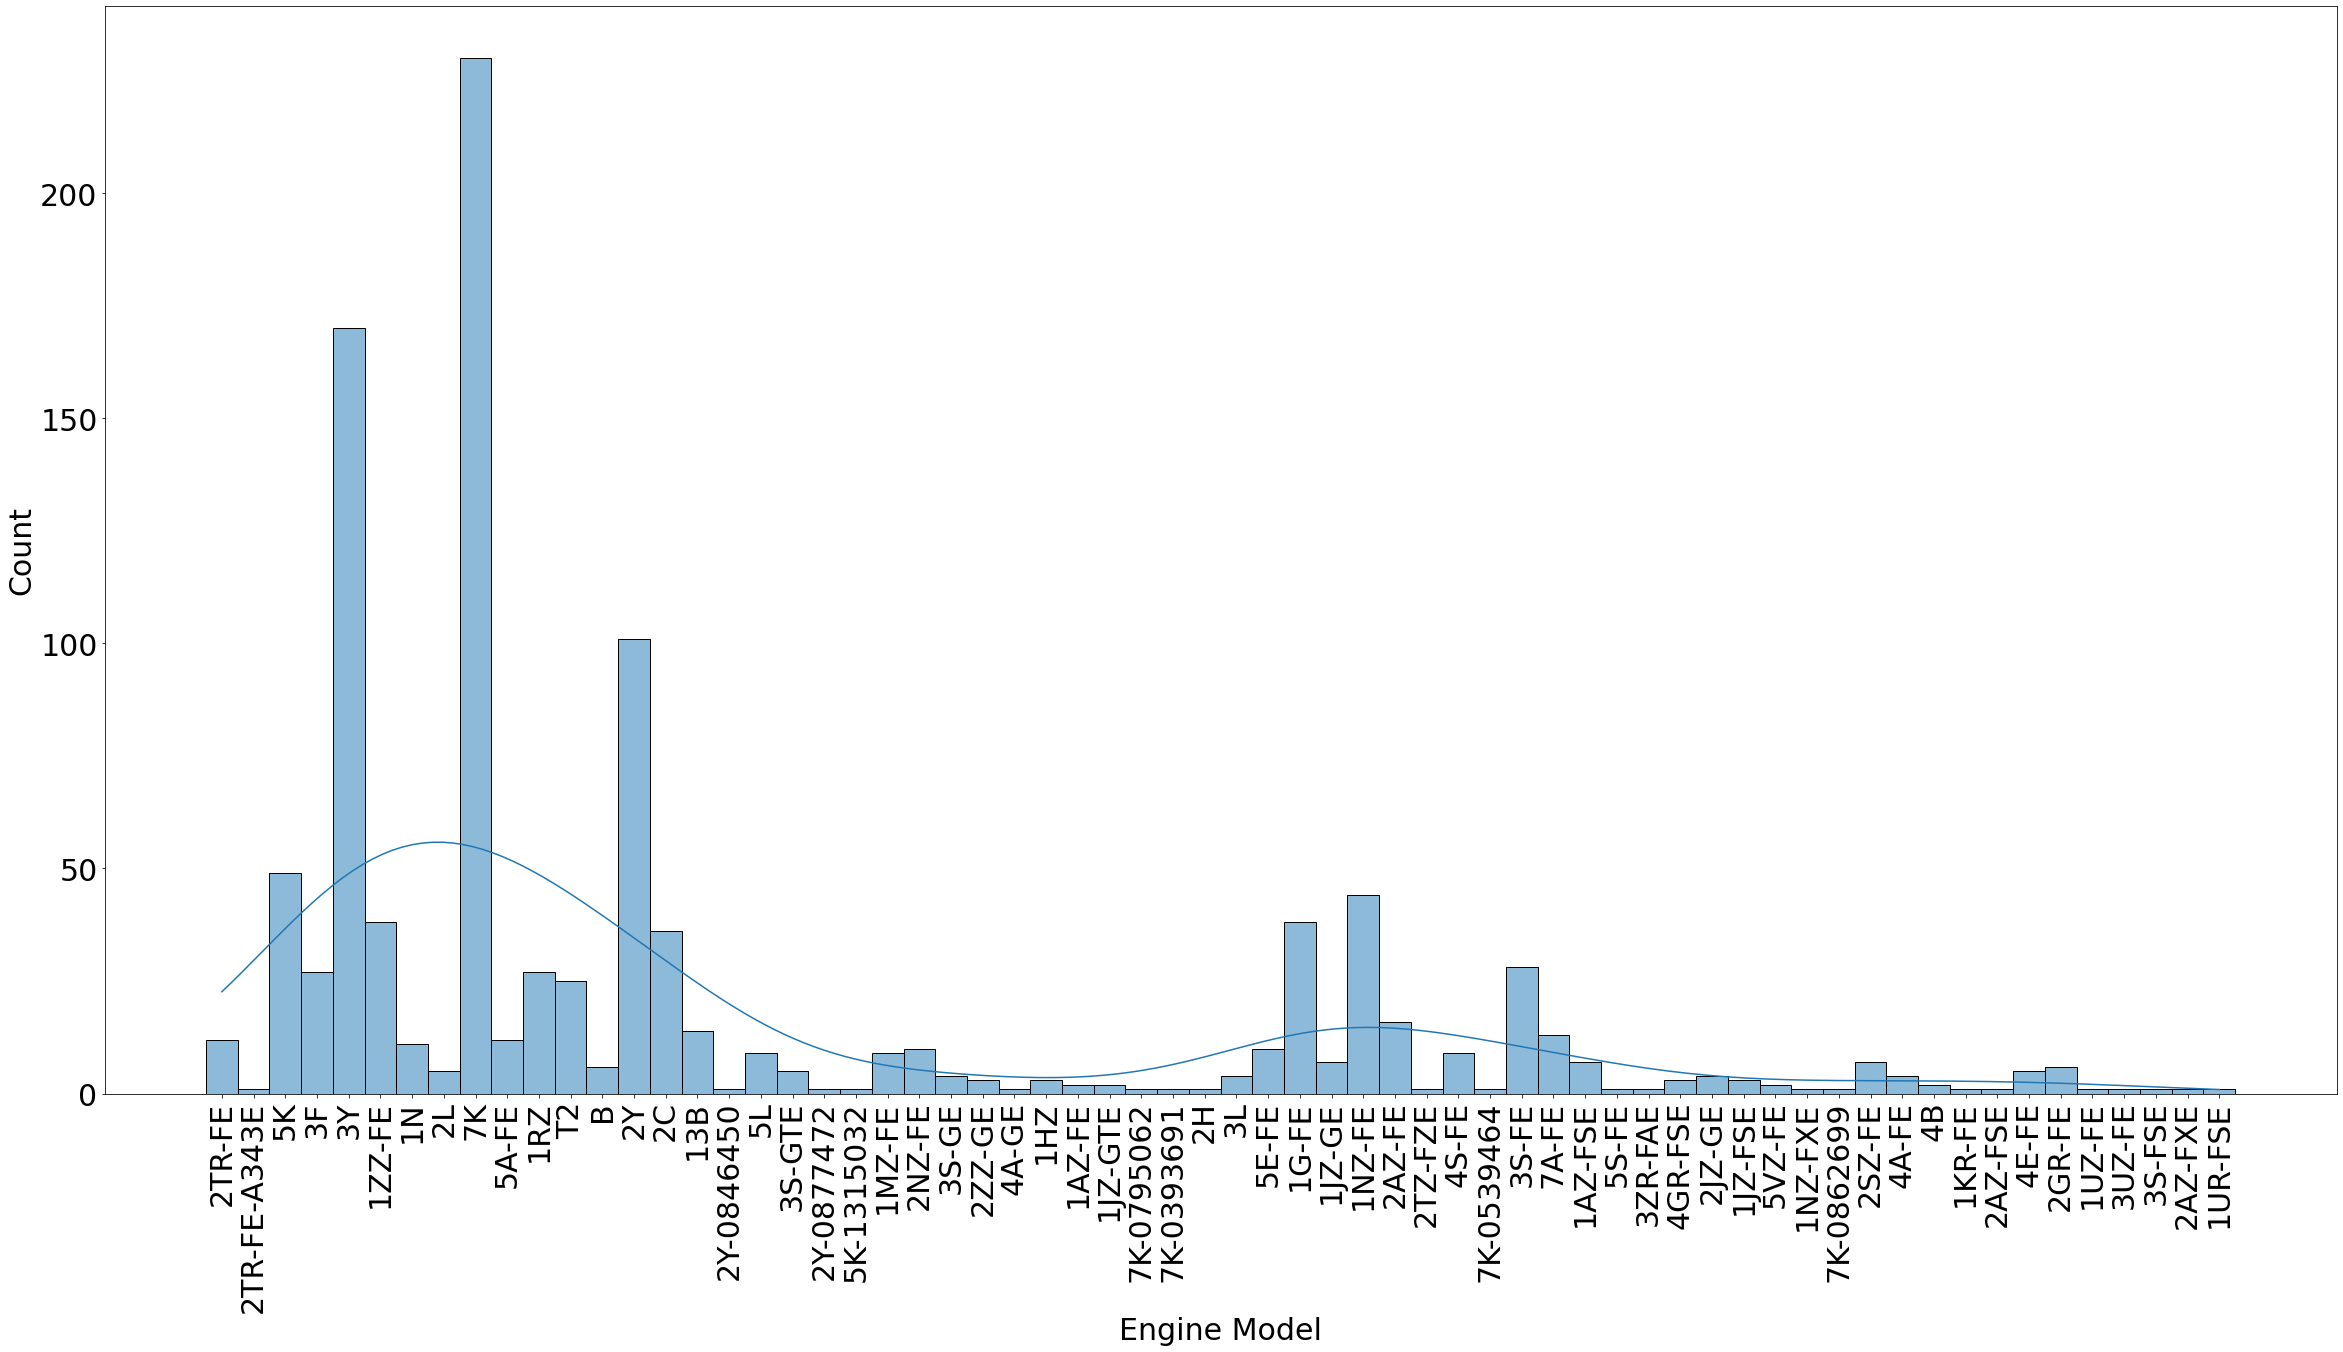

In [57]:
# plt.figure(figsize=(40,30))
# plt.xticks(fontsize = 30,rotation=90)
# plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
# plt.yticks(fontsize = 30,rotation=90)
# plt.ylabel(ylabel = 'Count',fontsize = 30)
# sns.histplot(data=list_toyota_remove_tail,kde=True)

plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

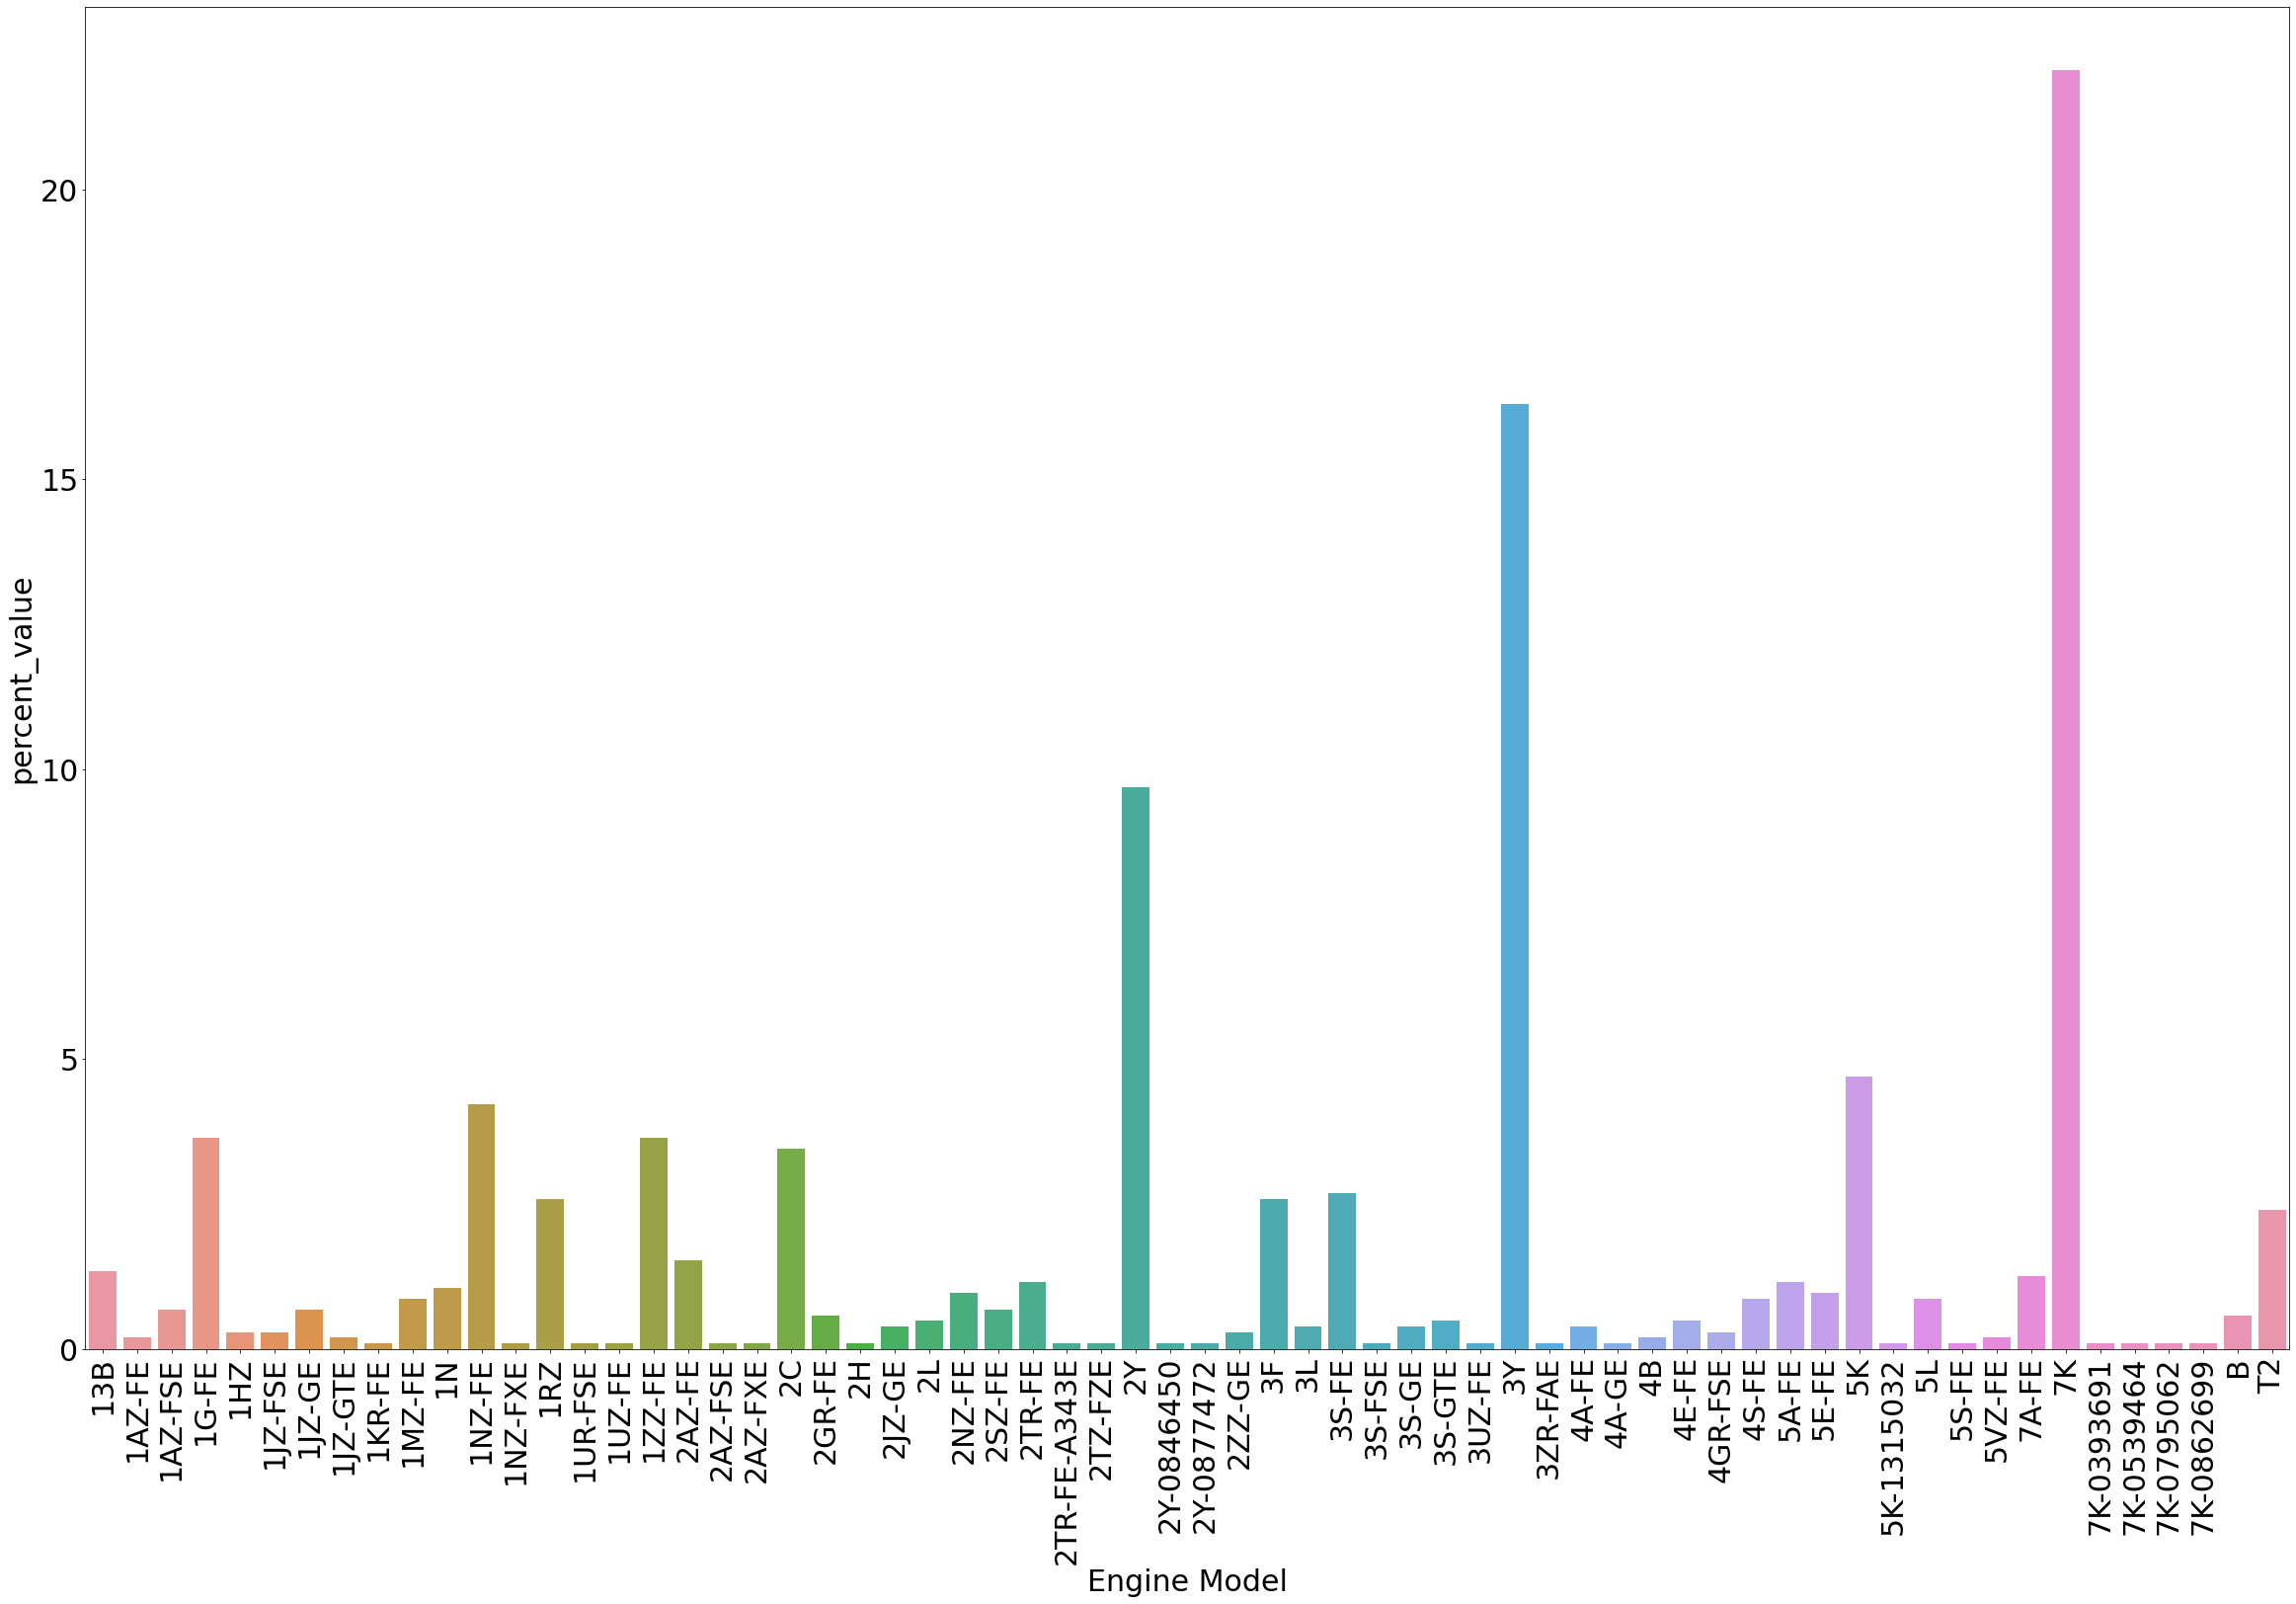

In [58]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

<ipython-input-59-d95f13a9a8e9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-59-d95f13a9a8e9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)


Text(0.5, 0, 'Engine Model')

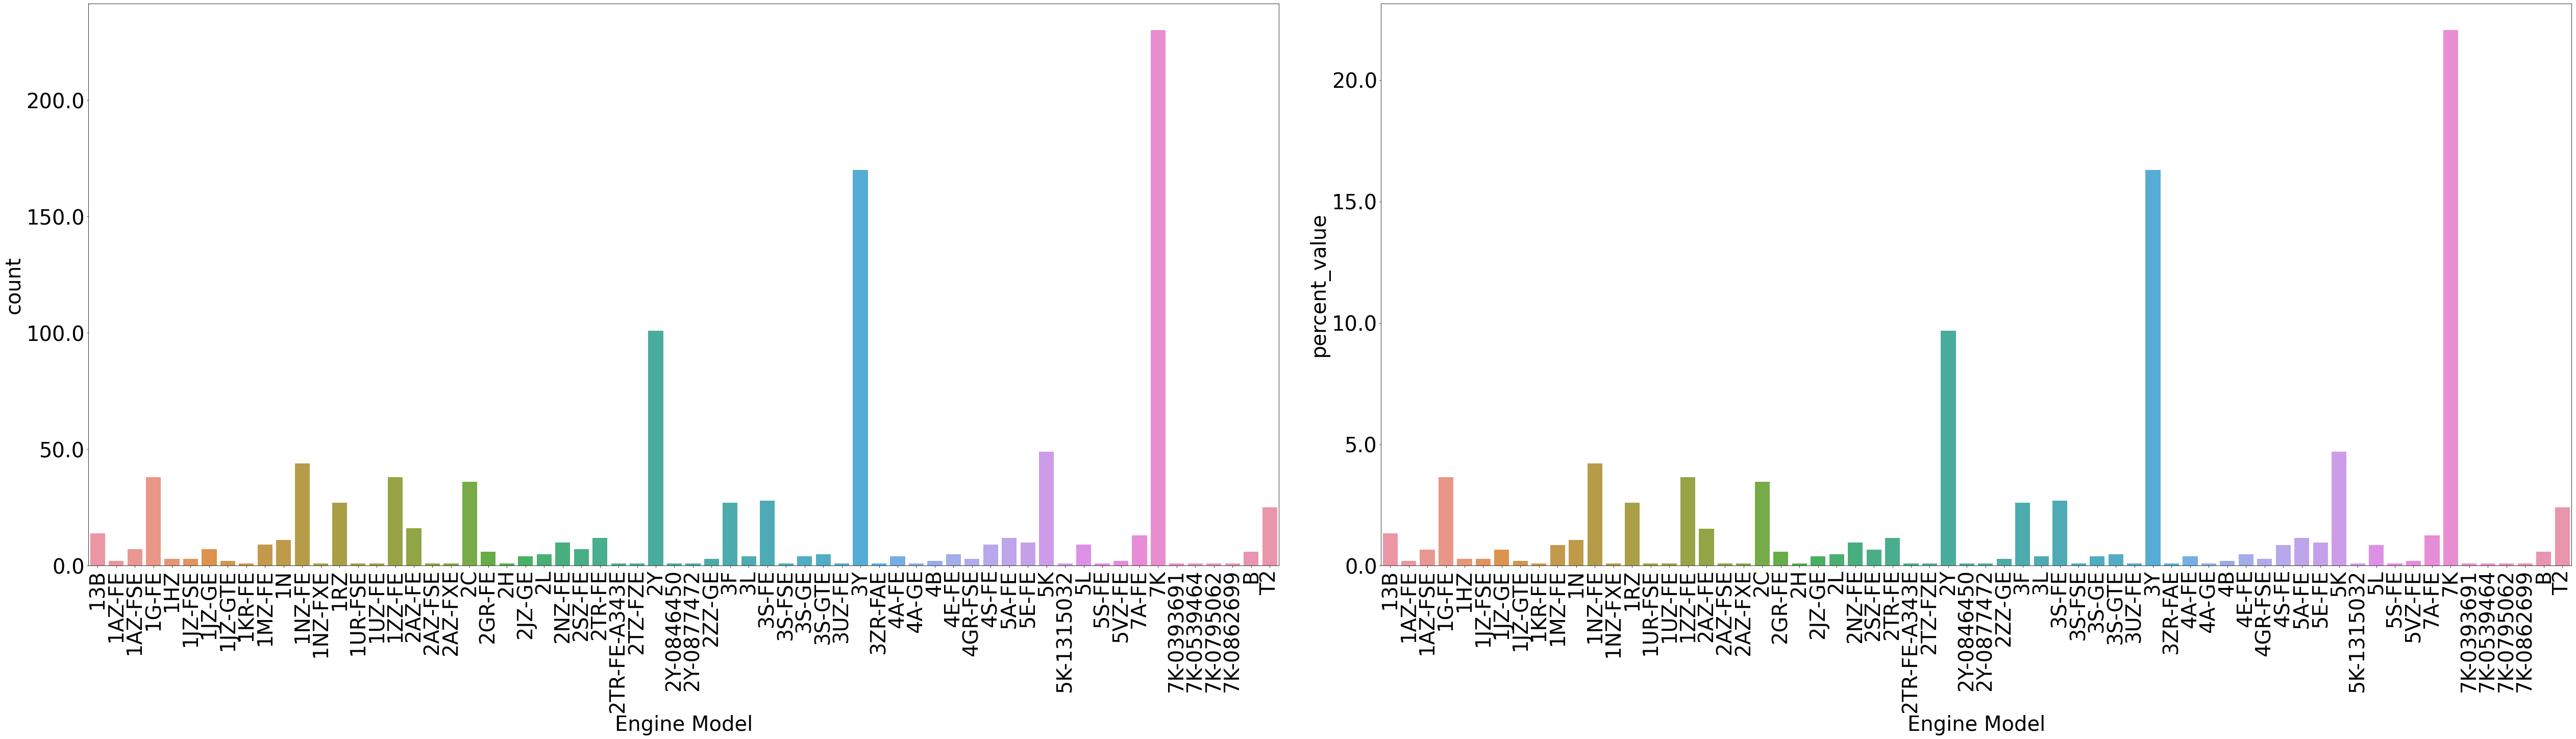

In [59]:
fig, axs = plt.subplots(1, 2, sharex=False, figsize=(70, 20),constrained_layout=True)
p = sns.barplot(x = 'Engine Model',y = 'count',data=df_freq_toyota,ax=axs[0])
q = sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota,ax=axs[1])
p.set_xticklabels(p.get_xticklabels(),size =40,rotation = 90)
q.set_xticklabels(q.get_xticklabels(),size =40,rotation = 90)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
p.set_ylabel("count",fontsize = 40)
q.set_ylabel("percent_value",fontsize = 40)
p.set_xlabel("Engine Model",fontsize = 40)
q.set_xlabel("Engine Model",fontsize = 40)

# Visualization Mazda

In [325]:
df_mazda = df_merged[df_merged.Producer.str.contains('MAZDA')]
df_mazda

Register Date     HS Code  \
12        2011-01-18  8407343009   
22        2011-01-27  8407343009   
27        2011-01-12  8407343009   
28        2011-01-12  8407343009   
38        2011-01-12  8407343009   
...              ...         ...   
257607    2019-12-01  8407343009   
257760    2019-12-01  8407343009   
257761    2019-12-01  8407343009   
259182    2019-12-01  8407343009   
259186    2019-12-01  8407343009   

                                      Product Description  \
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
22      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
28      ДВИГАТЕЛЬ А/М Б/У БЕНЗИН С ОБЪЕМОМ БОЛЕЕ 1000С...   
38      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ВОЗВРАТНО-ПОС...   
...                                                   ...   
257607  БЕНЗИНОВЫЕ ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИС...   
257760  ДВИГАТЕЛЬ БЕНЗ.БЫВ,В УП.В СБОРЕ С НАВЕСНЫМ ОБО...   
257761  ДВИГАТЕЛЬ БЕНЗ.БЫВ,В УП.В СБОРЕ С НАВЕСНЫМ ОБО...   
259182  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259186  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
28          HONDA,MAZDA,MITSUBISHI,NISSAN,TOYOTA,DAIHATSU   
38       TOYOTA, NISSAN, MITSUBISHI, MAZDA, HONDA, SUBARU   
...                                                   ...   
257607                            MAZDA MOTOR CORPORATION   
257760                            MAZDA MOTOR CORPORATION   
257761                            MAZDA MOTOR CORPORATION   
259182                                  MAZDA MOTOR CORP.   
259186                           MAZDA MOTOR CORPORATION.   

                                                    Brand Place of Receipt  \
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA             КОБЕ   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
28          HONDA,MAZDA,MITSUBISHI,NISSAN,TOYOTA,DAIHATSU           ХАКАТА   
38       TOYOTA, NISSAN, MITSUBISHI, MAZDA, HONDA, SUBARU      ВЛАДИВОСТОК   
...                                                   ...              ...   
257607                                              MAZDA           NAGOYA   
257760                                              MAZDA        ВОСТОЧНЫЙ   
257761                                              MAZDA        ВОСТОЧНЫЙ   
259182                                              MAZDA        ВОСТОЧНЫЙ   
259186                                             MAZDA.             КОБЭ   

       Country of Origin               Country of Sales  \
12        JP, JPN, Japan                 JP, JPN, Japan   
22        JP, JPN, Japan                 JP, JPN, Japan   
27        JP, JPN, Japan                 JP, JPN, Japan   
28        JP, JPN, Japan                 JP, JPN, Japan   
38        JP, JPN, Japan                 JP, JPN, Japan   
...                  ...                            ...   
257607    JP, JPN, Japan  AE, ARE, United Arab Emirates   
257760    JP, JPN, Japan                 JP, JPN, Japan   
257761    JP, JPN, Japan                 JP, JPN, Japan   
259182    JP, JPN, Japan                 JP, JPN, Japan   
259186    JP, JPN, Japan                 JP, JPN, Japan   

                                 Shipper   \
12                       J-TRADE CO., LTD   
22                       J-TRADE CO., LTD   
27                  KAIHO SANGYO CO., LTD   
28                  МАРУКО ШОДЖИ КО., ЛТД   
38                     SEAPARTS CO., LTD.   
...                                   ...   
257607                  FRIEND SHOJI INC.   
257760                     3R CORPORATION   
257761                     3R CORPORATION   
259182      

In [326]:
list_all_engine_model_mazda_GTO_filter = []

for des in df_mazda['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_mazda_GTO_filter.append(list_em)
    
list_all_engine_model_mazda_GTO_filter

[['FE-943620'],
 ['G5-206157'],
 ['YF-210212'],
 ['B5-217046'],
 ['F8-258832'],
 ['GY-320358'],
 ['FE-970151'],
 ['F8-255572'],
 ['F8-269004'],
 ['G5-209150'],
 ['F8-228199', 'F8-316878'],
 ['F8-59019', 'FE-31034'],
 ['F8-260588'],
 ['B5-236648'],
 ['B6-448404'],
 ['F8-571742'],
 ['G6-080010'],
 ['B6-273607'],
 ['G6-188815'],
 ['GY-221473'],
 ['GY-222882'],
 ['B5-219484'],
 ['13B-472259'],
 ['GY-269884', 'GY-405355'],
 ['FE-986908'],
 ['E5-732530', 'F8-512289'],
 ['B5-219125', 'J5-144188'],
 ['FE-450181'],
 ['FE-980888'],
 ['F8-585676', 'R2-868441'],
 ['GY-282628', 'GY-252489'],
 ['B5-522120', 'B5-521658', 'GY-280607'],
 ['YF-21525'],
 ['B5-366020',
  'F8-527714',
  'F8-574587',
  'F8-260857',
  'F8-577743',
  'F8-525880'],
 ['G6-216230'],
 ['J5-147995'],
 ['B5-223791'],
 ['GY-257339'],
 ['XA-41848'],
 ['GY-241165', 'GY-226525', 'GY-207166'],
 ['FE-980393'],
 ['B6-545379', 'FE-260799'],
 ['F8-294572'],
 ['B5-363885', 'E5-755234', 'FE-984439'],
 ['F8-323149'],
 ['GY-278282'],
 ['F8-5315

In [327]:
len(list_all_engine_model_mazda_GTO_filter)

1155

In [328]:
chain_list_em_mazda = list(chain(*list_all_engine_model_mazda_GTO_filter))
len(chain_list_em_mazda)

1541

In [329]:
list_mazda_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_mazda))
# list_mazda_remove_tail = list(map(lambda x :split_str(x) ,list_mazda_remove_tail))

In [330]:
df_list_mazda_remove_tail = pd.DataFrame({'Engine Model':list_mazda_remove_tail})
df_list_mazda_remove_tail

Engine Model
0              FE
1              G5
2              YF
3              B5
4              F8
...           ...
1536           F8
1537           L8
1538           GY
1539           B5
1540           B5

[1541 rows x 1 columns]

In [331]:
df_freq_mazda = df_list_mazda_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mazda ['percent_value']  = round(df_freq_mazda ['count']/df_freq_mazda ['count'].sum()*100,2)
df_freq_mazda

Engine Model  count  percent_value
0           13B     64           4.15
1           B3E      2           0.13
2            B5    218          14.15
3     B5-219734      1           0.06
4            B6     44           2.86
5            BP     15           0.97
6     BP-292428      1           0.06
7            E5      4           0.26
8            F8    462          29.98
9      F8-60915      2           0.13
10    F8-727785      1           0.06
11         F8-E      4           0.26
12           FE    177          11.49
13        FP-DE      1           0.06
14        FS-DE      1           0.06
15           G5     28           1.82
16           G6     39           2.53
17           GY    269          17.46
18        GY-DE      1           0.06
19           HA      8           0.52
20           J5     38           2.47
21        L3-DE      1           0.06
22       L3-VDT      2           0.13
23        L5-VE      3           0.19
24           L8     21           1.36
25        LF-DE      1           0.06
26           R2     19           1.23
27           RF     13           0.84
28           SL      5           0.32
29           VS      4           0.26
30           WL     13           0.84
31           XA      1           0.06
32           YF     76           4.93
33        ZJ-VE      1           0.06
34        ZL-VE      1           0.06

In [332]:
df_freq_mazda.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
8            F8    462          29.98
17           GY    269          17.46
2            B5    218          14.15
12           FE    177          11.49
32           YF     76           4.93

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

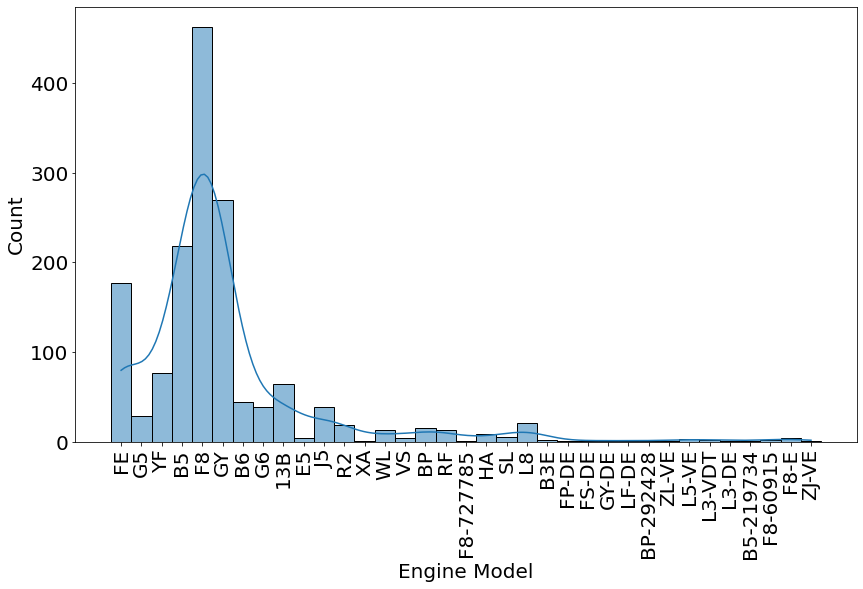

In [333]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.histplot(data=list_mazda_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

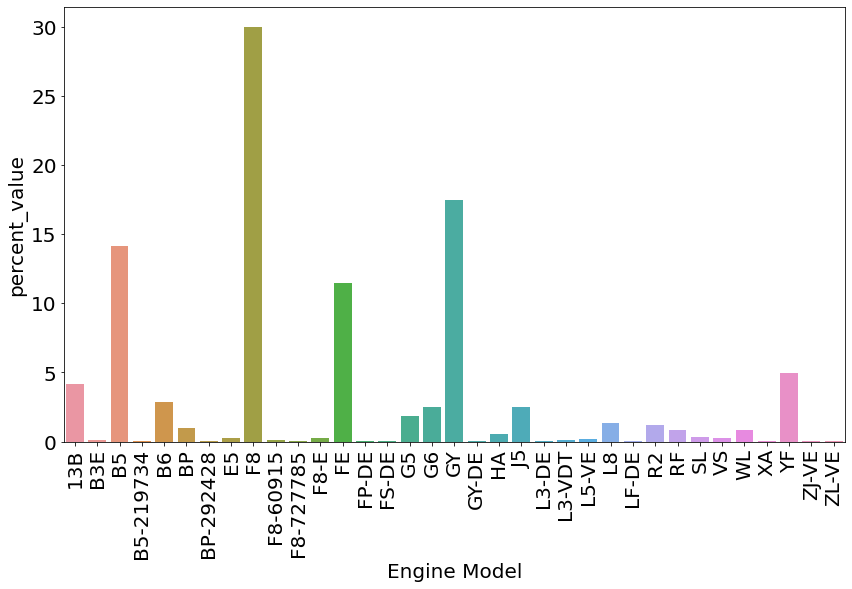

In [335]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mazda)

# Visualization Mitsubishi

In [270]:
df_mitsubishi = df_merged[df_merged.Producer.str.contains('MITSUBISHI')]
df_mitsubishi

Register Date     HS Code  \
8         2011-01-13  8407343009   
9         2011-01-13  8407343009   
12        2011-01-18  8407343009   
16        2011-01-21  8407343009   
17        2011-01-24  8407343009   
...              ...         ...   
259138    2019-12-01  8407343009   
259140    2019-12-01  8407343009   
259158    2019-12-01  8407343009   
259177    2019-12-01  8407343009   
259185    2019-12-01  8407343009   

                                      Product Description  \
8       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...   
9       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
16      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
17      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
...                                                   ...   
259138  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
259140  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259158  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259177  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259185  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
8                                TOYOTA,MITSUBISHI,NISSAN   
9                                TOYOTA,MITSUBISHI,SUZUKI   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
...                                                   ...   
259138  FUJI HEAVY INDUSTRIES CO.LTDMITSUBISHI MOTORS ...   
259140                                         MITSUBISHI   
259158  SUZUKI MOTOR CORP. FUJI HEAVY INDUSTRIES LTDMI...   
259177                                         MITSUBISHI   
259185                           MITSUBISHI MOTORS CORP..   

                                                    Brand Place of Receipt  \
8                                TOYOTA,MITSUBISHI,NISSAN      ВЛАДИВОСТОК   
9                                TOYOTA,MITSUBISHI,SUZUKI      ВЛАДИВОСТОК   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
...                                                   ...              ...   
259138                                   SUBARUMITSUBISHI        ВОСТОЧНЫЙ   
259140                                         MITSUBISHI      ВЛАДИВОСТОК   
259158                                    SUZUKIMMCSUBARU        ВОСТОЧНЫЙ   
259177                                         MITSUBISHI      ВЛАДИВОСТОК   
259185                                               MMC.             КОБЭ   

       Country of Origin Country of Sales  \
8         JP, JPN, Japan   JP, JPN, Japan   
9         JP, JPN, Japan   JP, JPN, Japan   
12        JP, JPN, Japan   JP, JPN, Japan   
16        JP, JPN, Japan   JP, JPN, Japan   
17        JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
259138    JP, JPN, Japan   JP, JPN, Japan   
259140    JP, JPN, Japan   CN, CHN, China   
259158    JP, JPN, Japan   JP, JPN, Japan   
259177    JP, JPN, Japan   JP, JPN, Japan   
259185    JP, JPN, Japan   JP, JPN, Japan   

                                     Shipper   \
8                             ЖАПРОС КО., ЛТД   
9                             ЖАПРОС КО., ЛТД   
12                           J-TRADE CO., LTD   
16                        YAMAGIN CORPORATION   
17                        YAMAGIN CORPORATION   
...                                       ...   
259138  WEST-JAPAN AUTO RECYCLE CO.LTD (WARC)   
259140                           POPLA CO.LTD   
259158                            EK3 CO. LTD   
259177                           UNICO CO LTD   
259185      SUZUKI CHUGOKU HANBAI CORPORATION   

                                         

In [272]:
list_all_engine_model_mitsubishi_GTO_filter = []

for des in df_mitsubishi['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_mitsubishi_GTO_filter.append(list_em)
    
list_all_engine_model_mitsubishi_GTO_filter

[['4G93-JB1495'],
 ['6G73-RH9264', '6G73-G85025'],
 ['4G93-QC6102'],
 ['4G93-KN0232'],
 ['4G15-AD0839'],
 ['6G74-CP5608'],
 ['4G63-XR3743'],
 ['6G74-CY2183', '6G74-HD5005'],
 ['4G15-YR5535', '6G74-JO9326'],
 ['6G73-G50108'],
 ['4G93-MM5009'],
 ['6G74-RP9301'],
 ['4G64-YD7787L', '4G93-PC5175'],
 ['6G74-CA0650'],
 ['4G93-GQ8731'],
 ['4G93-MT8119'],
 ['4G69-LS0465',
  '6A13-BG2644',
  '6G72-T67319',
  '6G72-BX0253',
  '6G74-BL4166',
  '6G74-T50316'],
 ['6G72-H46190', '6G74-CJ1184'],
 ['6G74-HM6242'],
 ['6G74-GY6717'],
 ['4G63-TS0340', '4G64-XD3878'],
 ['4G13-QT1162', '4G15-XR2101', '6A13-BC4369', '6A13-CC0408'],
 ['6G74-DC6704'],
 ['6G72-R14262'],
 ['6G72-AH9993', '6G72-K55163'],
 ['4G63-TE08'],
 ['4G63-SK0281', '4G63-UA4807'],
 ['6G73-L49808',
  '6G74-QG1670',
  '6G74-RJ6443',
  '6G74-TX4807',
  '6G74-RC1532',
  '6G74-LM2114'],
 ['6G74-R84421'],
 ['6G72-X24147'],
 ['6G72-XD02'],
 ['6G73-P77011'],
 ['4G15-CK7101'],
 ['6G74-CN0941'],
 ['6G74-DB8909'],
 ['4G63-YY1876'],
 ['4G63-SQ0323'],
 [

In [273]:
len(list_all_engine_model_mitsubishi_GTO_filter)

6157

In [274]:
chain_list_em_mitsubishi = list(chain(*list_all_engine_model_mitsubishi_GTO_filter))
len(chain_list_em_mitsubishi)

11281

In [275]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_mitsubishi))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

Engine Model
0             4G93
1             6G73
2             6G73
3             4G93
4             4G93
...            ...
11276         4G93
11277         4G63
11278         4G93
11279         6G73
11280         4G93

[11281 rows x 1 columns]

In [276]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

Engine Model  count  percent_value
0          3A90      2           0.02
1          3G83     34           0.30
2          4A30     84           0.74
3          4A31    174           1.54
4          4A90    131           1.16
5          4A91    311           2.76
6          4B10     74           0.66
7          4B11    249           2.21
8          4B12    358           3.17
9          4D32      2           0.02
10         4D36      1           0.01
11         4D56     22           0.20
12         4D68      8           0.07
13         4DR5      1           0.01
14         4G13    261           2.31
15         4G15   1405          12.45
16         4G63   1447          12.83
17         4G64   1169          10.36
18         4G67      9           0.08
19         4G69    274           2.43
20         4G91     43           0.38
21         4G92     23           0.20
22         4G93   1972          17.48
23         4G94    469           4.16
24         4J10      7           0.06
25         4J11      1           0.01
26         4M40     19           0.17
27         4M41      3           0.03
28         4M51      1           0.01
29         6A10      1           0.01
30         6A11     16           0.14
31         6A12     91           0.81
32         6A13    271           2.40
33         6B31     22           0.20
34         6G72   1090           9.66
35         6G73    255           2.26
36         6G74    979           8.68
37           L8      2           0.02

In [277]:
df_freq_mitsubishi.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
22         4G93   1972          17.48
16         4G63   1447          12.83
15         4G15   1405          12.45
17         4G64   1169          10.36
34         6G72   1090           9.66

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

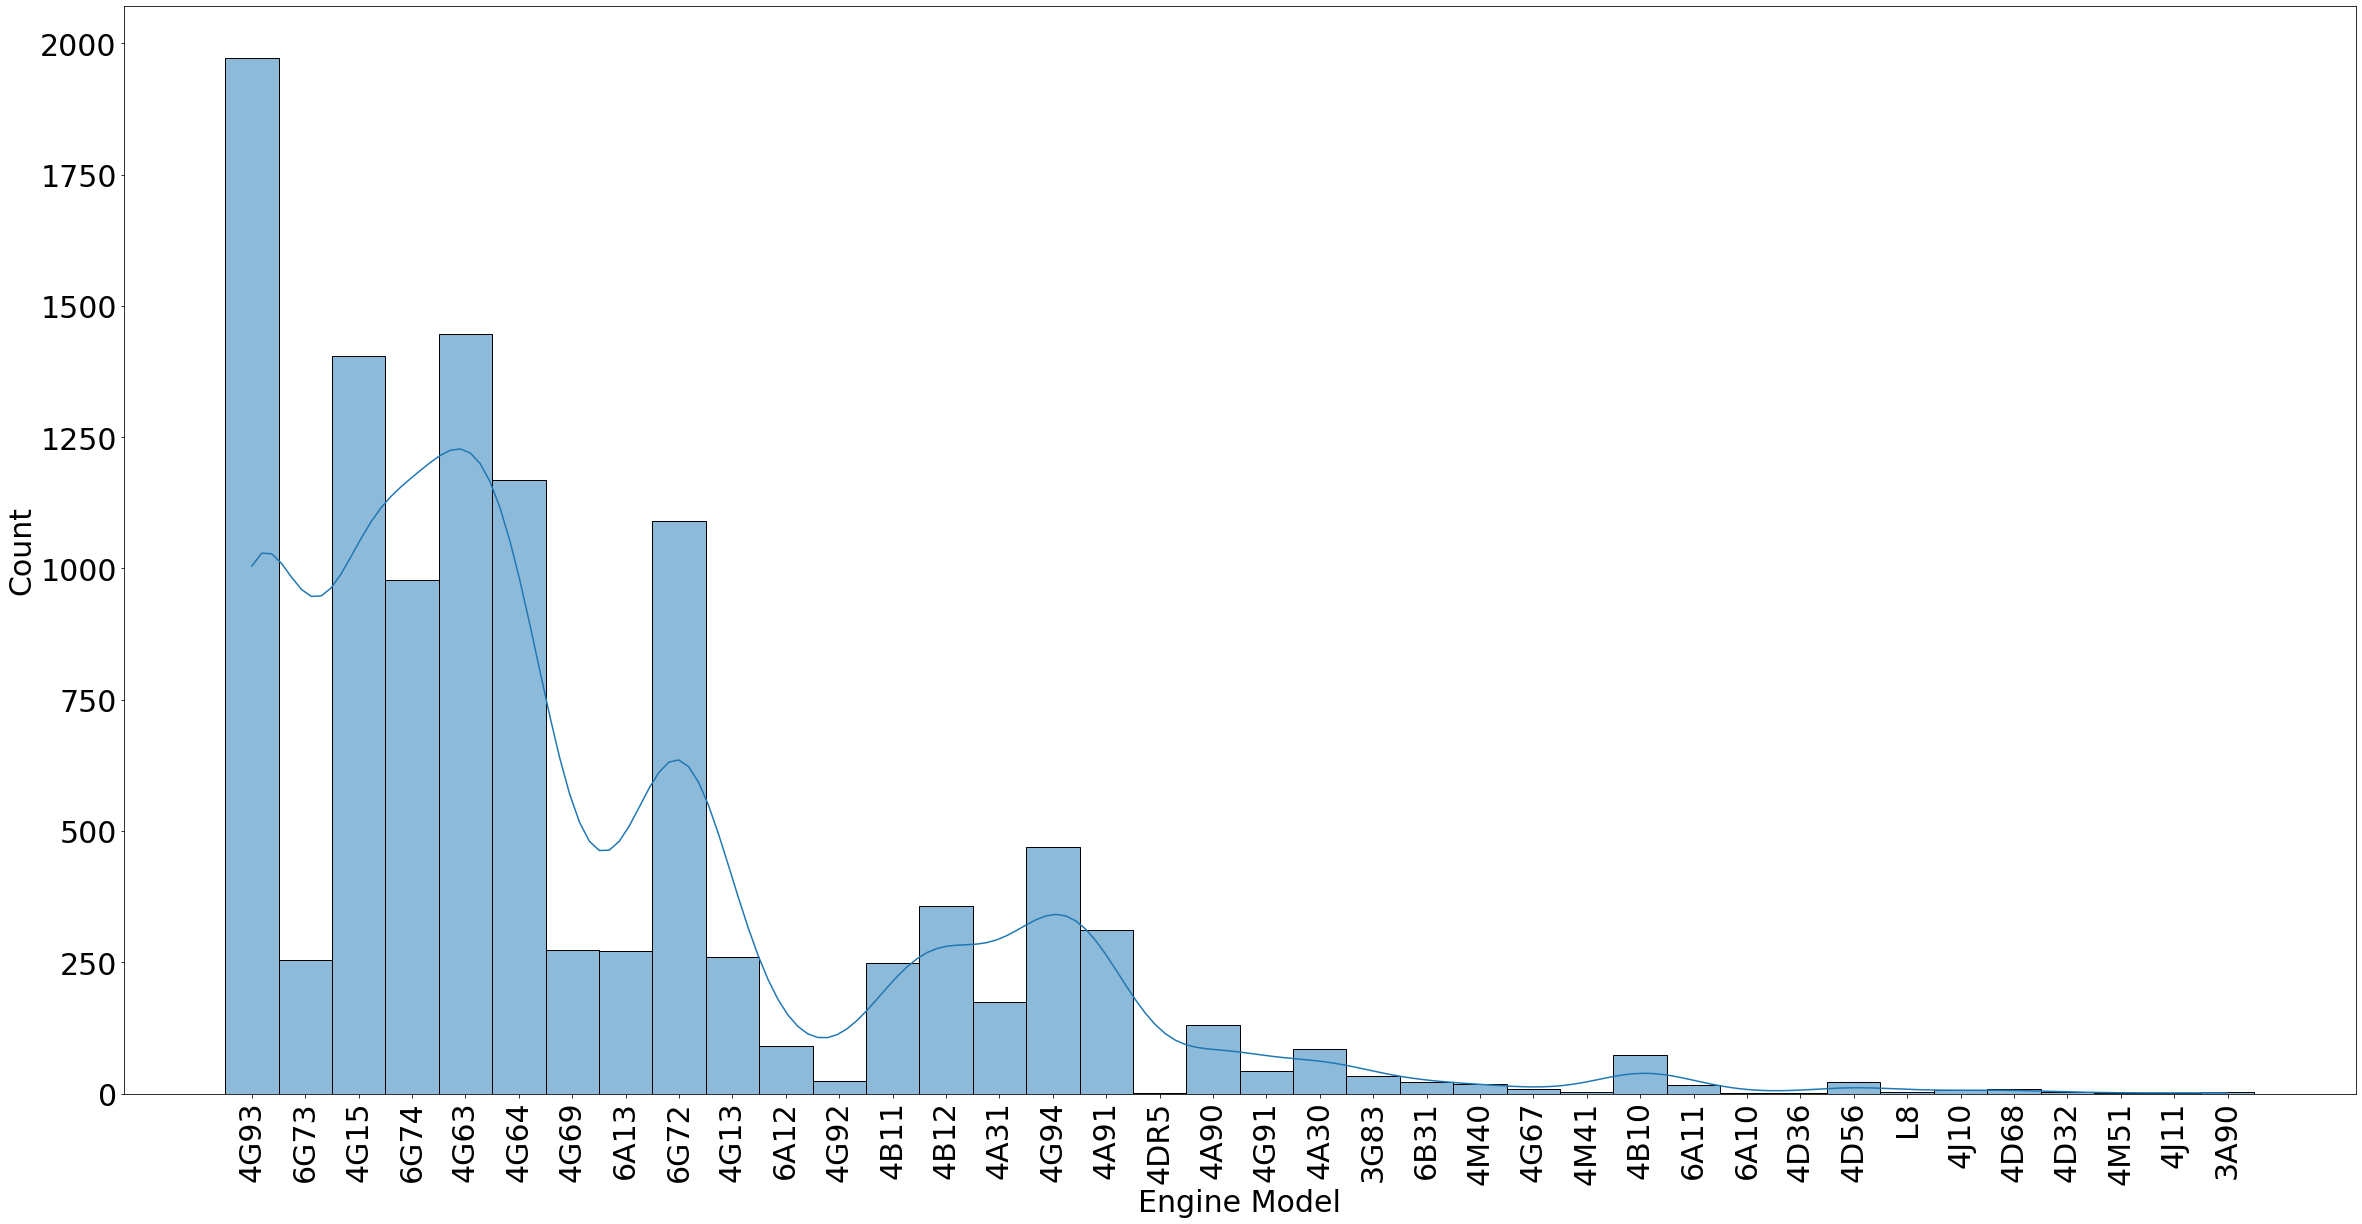

In [82]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

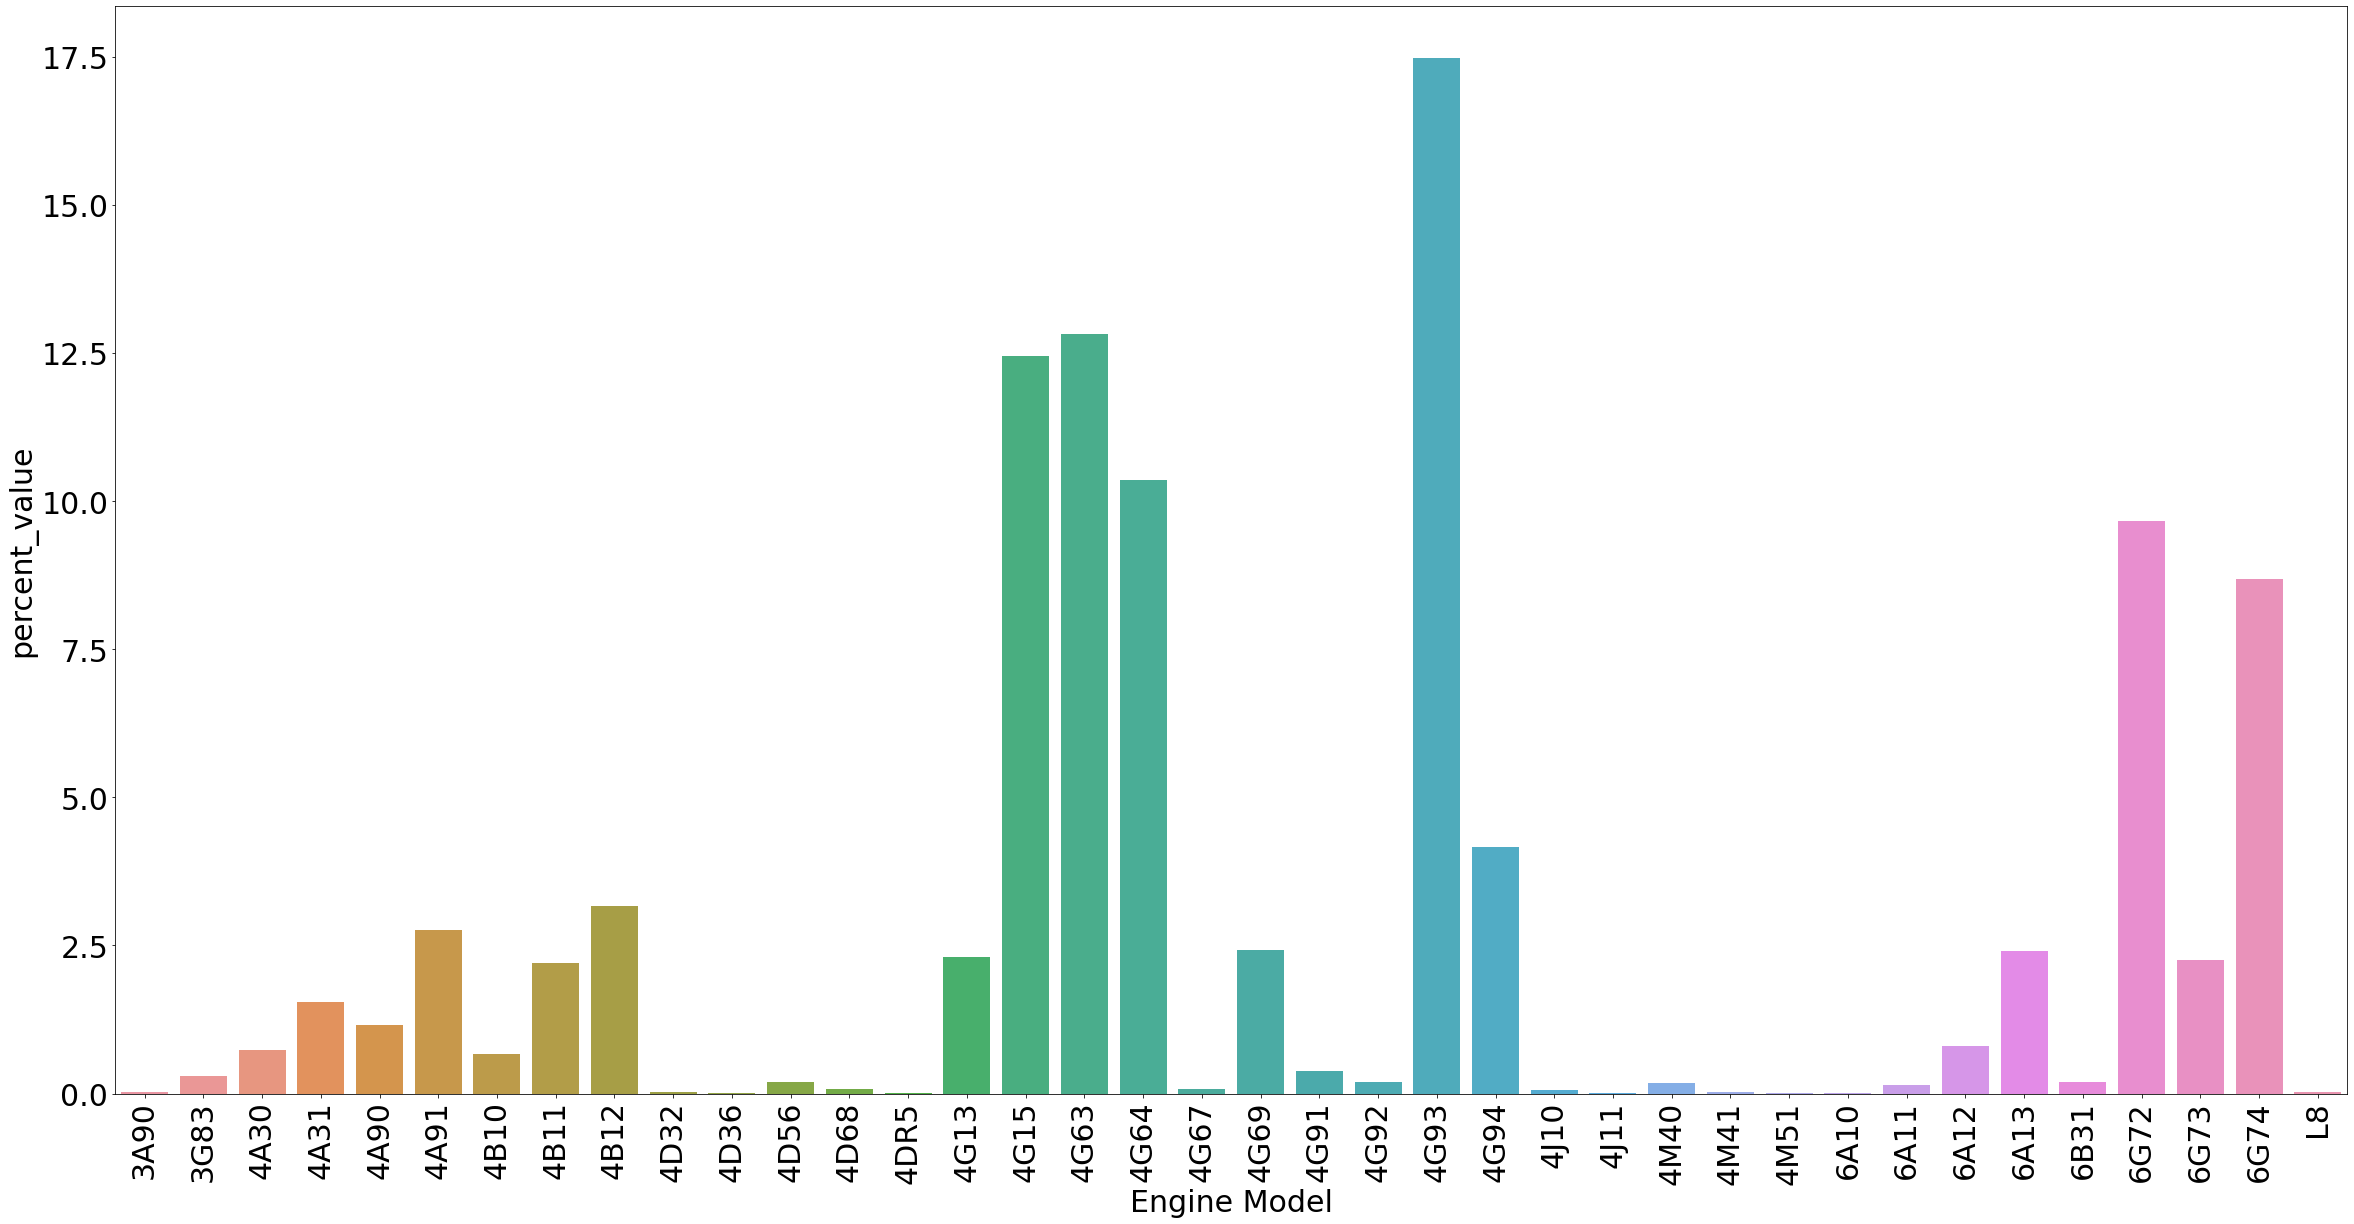

In [83]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Visualization Honda

In [278]:
df_honda = df_merged[df_merged.Producer.str.contains('HONDA')]
df_honda

Register Date     HS Code  \
7         2011-01-12  8407343009   
12        2011-01-18  8407343009   
16        2011-01-21  8407343009   
17        2011-01-24  8407343009   
20        2011-01-25  8407343009   
...              ...         ...   
259171    2019-12-01  8407343009   
259172    2019-12-01  8407343009   
259173    2019-12-01  8407343009   
259179    2019-12-01  8407343009   
259187    2019-12-01  8407343009   

                                      Product Description  \
7       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЬ С АКП ЯПОНСКО...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
16      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
17      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
...                                                   ...   
259171  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259172  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259173  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259179  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259187  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
7                                                   HONDA   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
20                          SUBARU, NISSAN, TOYOTA, HONDA   
...                                                   ...   
259171                                    HONDA MOTOR CO.   
259172                                    HONDA MOTOR CO.   
259173                                    HONDA MOTOR CO.   
259179                               HONDA MOTOR CO. LTD.   
259187                               HONDA MOTOR CO.LTD..   

                                                    Brand Place of Receipt  \
7                                                   HONDA      ВЛАДИВОСТОК   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
...                                                   ...              ...   
259171                                              HONDA      ВЛАДИВОСТОК   
259172                                              HONDA      ВЛАДИВОСТОК   
259173                                              HONDA      ВЛАДИВОСТОК   
259179                                              HONDA      ВЛАДИВОСТОК   
259187                                             HONDA.             КОБЭ   

       Country of Origin Country of Sales                           Shipper   \
7         JP, JPN, Japan   JP, JPN, Japan                      JAPROS CO.LTD   
12        JP, JPN, Japan   JP, JPN, Japan                   J-TRADE CO., LTD   
16        JP, JPN, Japan   JP, JPN, Japan                YAMAGIN CORPORATION   
17        JP, JPN, Japan   JP, JPN, Japan                YAMAGIN CORPORATION   
20        JP, JPN, Japan   JP, JPN, Japan              G.E. TRADING CO., LTD   
...                  ...              ...                                ...   
259171    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259172    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259173    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259179    JP, JPN, Japan   JP, JPN, Japan                       UNICO CO LTD   
259187    JP, JPN, Japan   JP, JPN, Japan  SUZUKI CHUGOKU HANBAI CORPORATION   

                                          Shipper Address  \
7       950-3102 JAPAN TOYAMA NIIGATA KEN,HIGASHIKOU,S...   
12            614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3   
16      141-0031 SHINAGA-KU

In [279]:
list_all_engine_model_honda_GTO_filter = []

for des in df_honda['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_honda_GTO_filter.append(list_em)
    
list_all_engine_model_honda_GTO_filter

[['J30A-6000582'],
 ['F23A-2416885'],
 ['K20A-2080249'],
 ['B20B-1161655', 'ZC-6212744'],
 ['B20B-1023753', 'G20A-2005286', 'L13A-1001826'],
 ['K24A-2508078'],
 ['C32A-2050916',
  'K20A-6012831',
  'K20A-6005371',
  'L15A-1309831',
  'L15A-1154134',
  'L15A-1100687'],
 ['B20B-3448376'],
 ['D16A-8007284', 'F23A-1203845'],
 ['D15B-800047'],
 ['D16A-9003388', 'F20B-2053760', 'F23A-1004524'],
 ['G20A-1562290'],
 ['D13B-6205175',
  'F18B-2002167',
  'F20B-2054948',
  'F20B-2704211',
  'G25A-2012486',
  'L15A-3135099'],
 ['F23A-2222976'],
 ['D16A-1706362', 'F23A-2231649'],
 ['F20B-2060623', 'F20B-2709284', 'F20B-2744821', 'K20A-2054363'],
 ['B20B-1001104',
  'D16A-8006285',
  'K20A-2012324',
  'L13A-1103797',
  'L15A-4006250'],
 ['B20B-9206163',
  'D15B-9006471',
  'F20B-2013288',
  'K24A-8000564',
  'ZC-6509616'],
 ['B20B-1102146', 'D13B-6305733'],
 ['K20A-2521945'],
 ['B20B-1014875',
  'D16A-1713866',
  'F20B-2011241',
  'F20B-2709112',
  'L13A-1132594'],
 ['D17A-2120629', 'K20A-2225083', 

In [280]:
len(list_all_engine_model_honda_GTO_filter)

8875

In [281]:
chain_list_em_honda = list(chain(*list_all_engine_model_honda_GTO_filter))
len(chain_list_em_honda)

26709

In [282]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_honda))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

Engine Model
0             J30A
1             F23A
2             K20A
3             B20B
4               ZC
...            ...
26704         D16A
26705         D15B
26706         D15B
26707         D15B
26708         D15B

[26709 rows x 1 columns]

In [283]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

Engine Model  count  percent_value
0          A18A      2           0.01
1          A20A      1           0.00
2          B16A     29           0.11
3          B16B      8           0.03
4          B18B     71           0.27
5          B18C     18           0.07
6          B20B   4431          16.59
7          C32A     21           0.08
8          C35A     44           0.16
9          D13B    719           2.69
10         D15B   2577           9.65
11         D16A   2025           7.58
12         D17A   1903           7.12
13         E07A      1           0.00
14         E07Z      4           0.01
15         F18A     19           0.07
16         F18B    631           2.36
17         F20A     39           0.15
18         F20B   1326           4.96
19         F22A      9           0.03
20         F22B    587           2.20
21         F23A   2681          10.04
22         G20A    336           1.26
23         G25A    326           1.22
24         H22A    135           0.51
25         H23A    341           1.28
26         J25A    314           1.18
27         J30A    374           1.40
28         J32A    125           0.47
29         J35A    127           0.48
30         K20A   1724           6.45
31         K20B     24           0.09
32         K24A   1005           3.76
33         L13A   2443           9.15
34         L15A   1277           4.78
35          LDA    147           0.55
36          LEA     18           0.07
37          LEB     19           0.07
38          LFA      1           0.00
39         R18A    182           0.68
40         R20A    128           0.48
41         S07A      1           0.00
42           ZC    516           1.93

In [284]:
df_freq_mitsubishi.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
6          B20B   4431          16.59
21         F23A   2681          10.04
10         D15B   2577           9.65
33         L13A   2443           9.15
11         D16A   2025           7.58

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

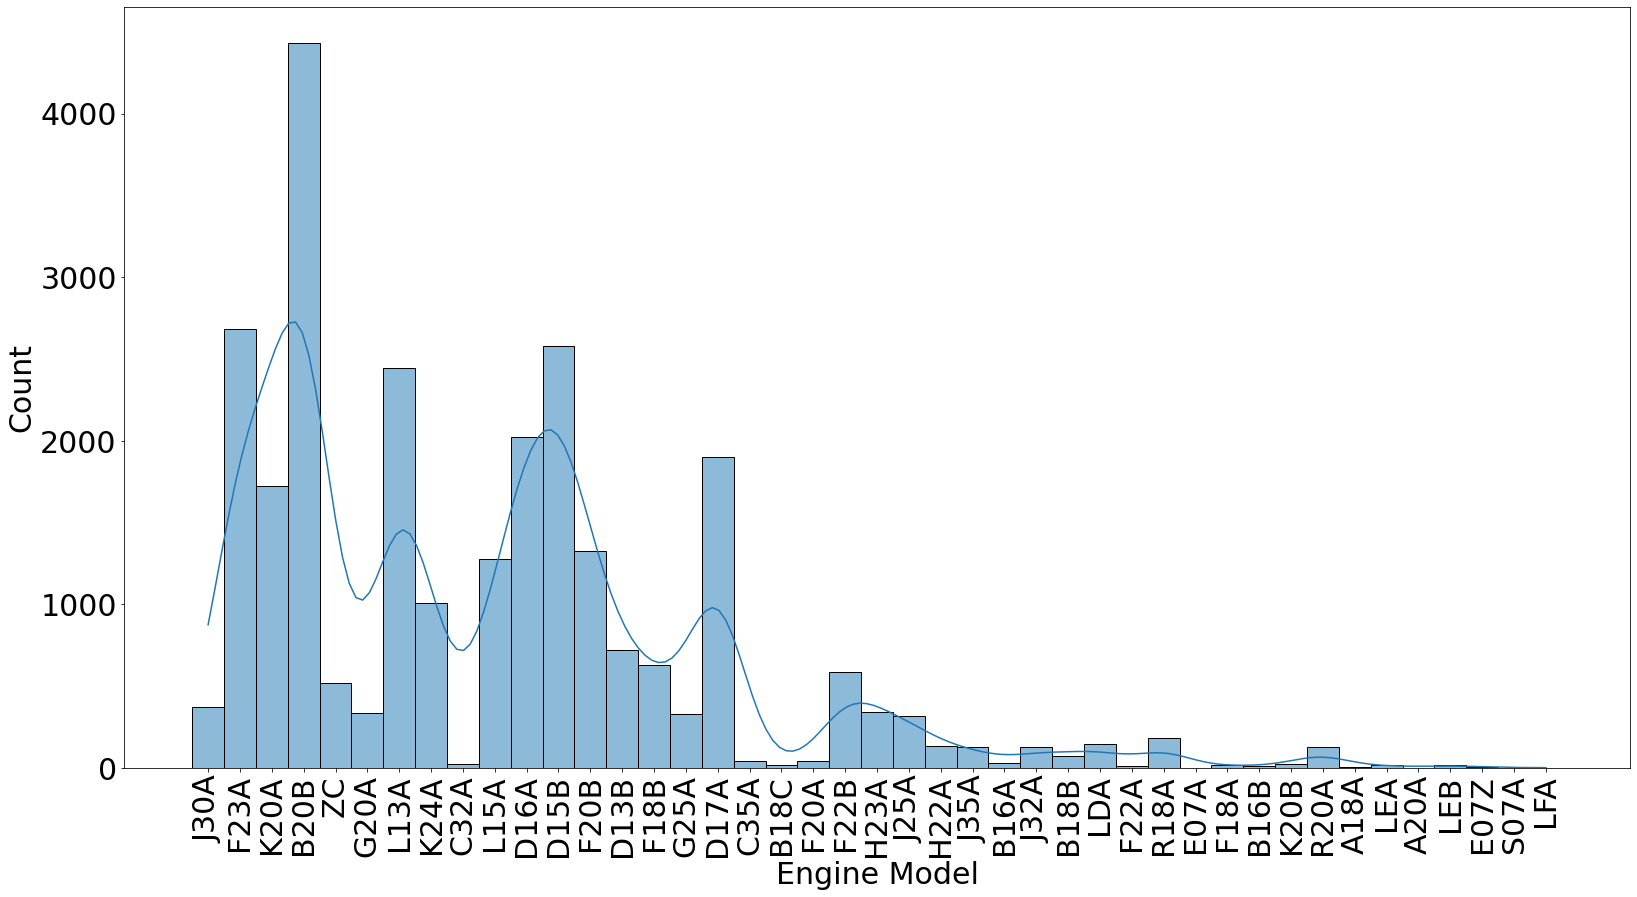

In [89]:
plt.figure(figsize=(27,14))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

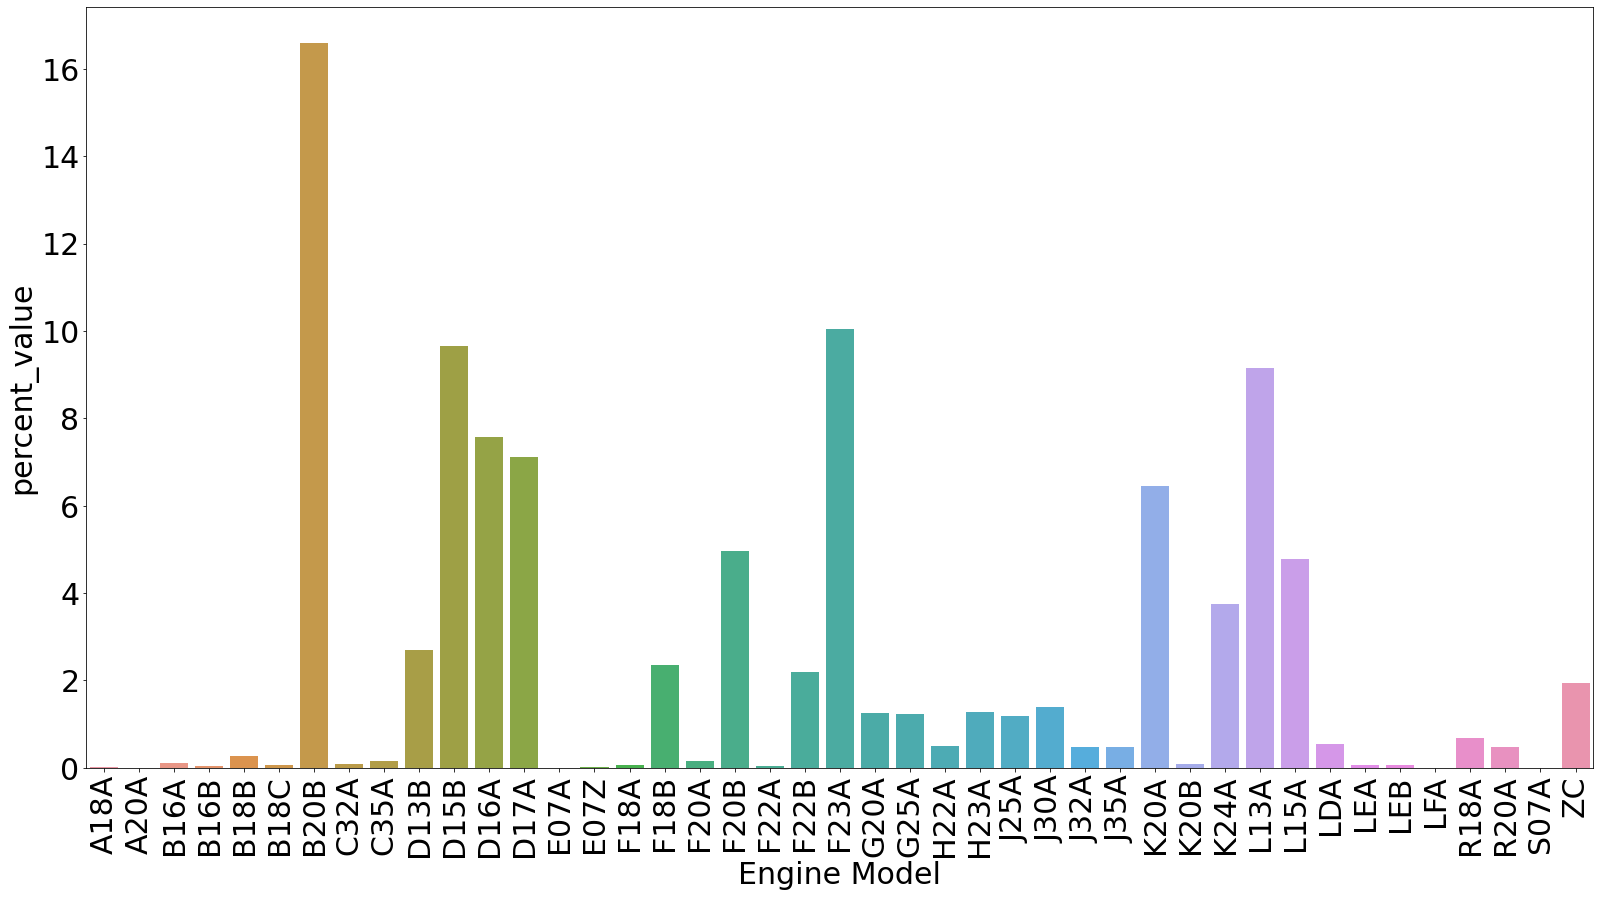

In [90]:
plt.figure(figsize=(27,14))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Visualization Nissan

In [292]:
df_nissan = df_merged[df_merged.Producer.str.contains('NISSAN')]
df_nissan

Register Date     HS Code  \
8         2011-01-13  8407343009   
12        2011-01-18  8407343009   
20        2011-01-25  8407343009   
21        2011-01-26  8407343009   
22        2011-01-27  8407343009   
...              ...         ...   
259146    2019-12-01  8407343009   
259147    2019-12-01  8407343009   
259178    2019-12-01  8407343009   
259181    2019-12-01  8407343009   
259184    2019-12-01  8407343009   

                                      Product Description  \
8       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
21      БЫВШИЕ В УПОТРЕБЛЕНИИ ЗАПАСНЫЕ ЧАСТИ ДЛЯ АВТОМ...   
22      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
...                                                   ...   
259146  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259147  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259178  ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...   
259181  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259184  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
8                                TOYOTA,MITSUBISHI,NISSAN   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
20                          SUBARU, NISSAN, TOYOTA, HONDA   
21       TOYOTA , NISSAN , SUZUKI , HONDA , MITSUBISHI...   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA   
...                                                   ...   
259146                                             NISSAN   
259147                                             NISSAN   
259178                           NISSAN MOTOR CORPORATION   
259181                                 NISSAN MOTOR CORP.   
259184                              NISSAN MOTOR CO.LTD..   

                                                    Brand Place of Receipt  \
8                                TOYOTA,MITSUBISHI,NISSAN      ВЛАДИВОСТОК   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
21       TOYOTA , NISSAN , SUZUKI , HONDA , MITSUBISHI...      ВЛАДИВОСТОК   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA             КОБЕ   
...                                                   ...              ...   
259146                                             NISSAN      ВЛАДИВОСТОК   
259147                                             NISSAN      ВЛАДИВОСТОК   
259178                                             NISSAN      ВЛАДИВОСТОК   
259181                                            NISSAN.        ВОСТОЧНЫЙ   
259184                                            NISSAN.             КОБЭ   

       Country of Origin Country of Sales                           Shipper   \
8         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
12        JP, JPN, Japan   JP, JPN, Japan                   J-TRADE CO., LTD   
20        JP, JPN, Japan   JP, JPN, Japan              G.E. TRADING CO., LTD   
21        JP, JPN, Japan   JP, JPN, Japan              TATSUMI SHOKAI CO.LTD   
22        JP, JPN, Japan   JP, JPN, Japan                   J-TRADE CO., LTD   
...                  ...              ...                                ...   
259146    JP, JPN, Japan   CN, CHN, China                       POPLA CO.LTD   
259147    JP, JPN, Japan   CN, CHN, China                       POPLA CO.LTD   
259178    JP, JPN, Japan   JP, JPN, Japan                       UNICO CO LTD   
259181    JP, JPN, Japan   JP, JPN, Japan                        EK3 CO. LTD   
259184    JP, JPN, Japan   JP, JPN, Japan  SUZUKI CHUGOKU HANBAI CORPORATION   

                                          Shipper Address  \
8       950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...   
12            614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3   
20      476-0003 АИЧИ ТОАКА

In [293]:
list_all_engine_model_nissan_GTO_filter = []

for des in df_nissan['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_nissan_GTO_filter.append(list_em)
    
list_all_engine_model_nissan_GTO_filter

[['RB20-253129B'],
 ['Z16-725689X'],
 ['TD27-066556T'],
 ['Z16-25366'],
 ['Z16-704420X'],
 ['NA16-70'],
 ['RB20-156199B'],
 ['RB20-254530B'],
 ['RB20-130563B'],
 ['A15-376848A'],
 ['RB20-267001B'],
 ['RB20-215648B'],
 ['NA20-003150W'],
 ['SR20DET-535083A'],
 ['RB20-8630567'],
 ['NA16-707715X', 'RB20-136033B'],
 ['NA20-833933'],
 ['RB20-956110A'],
 ['RB20-972604A'],
 ['RB20-118135B'],
 ['RB20-752453'],
 ['TD27-076491A'],
 ['RB20-030290B', 'RB20-206552B'],
 ['TD27-076491A'],
 ['RB20-048617A'],
 ['RB20-25712'],
 ['RB20-173595B'],
 ['RB20-244526B'],
 ['Z16-298877'],
 ['RB20-109482B'],
 ['NA20-907268X'],
 ['RB20-003793B'],
 ['RB20-144982B'],
 ['A15-409264A',
  'RB20-218293B',
  'RB20-258526B',
  'RB20-669979A',
  'RB20-185773B'],
 ['NA20-853886'],
 ['RB20-709488X'],
 ['RB20-226582B'],
 ['RB20-233621B', 'RB20-223556B'],
 ['NA20-763699X'],
 ['RB20-212166B', 'RB20-863056A'],
 ['RB20-269031B'],
 ['Z20-605136'],
 ['RB20-220816B'],
 ['RB20-2448551B'],
 ['CD20-389196X'],
 ['RB20-948166A'],
 ['NA20

In [294]:
len(list_all_engine_model_nissan_GTO_filter)

982

In [295]:
chain_list_em_nissan = list(chain(*list_all_engine_model_nissan_GTO_filter))
len(chain_list_em_nissan)

1224

In [296]:
list_nissan_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_nissan))
list_nissan_remove_tail = list(map(lambda x :split_str(x) ,list_nissan_remove_tail))
df_list_nissan_remove_tail = pd.DataFrame({'Engine Model':list_nissan_remove_tail})
df_list_nissan_remove_tail

Engine Model
0            RB20
1             Z16
2            TD27
3             Z16
4             Z16
...           ...
1219       VQ20DE
1220       QG15DE
1221       QG15DE
1222       QG15DE
1223       VQ20DE

[1224 rows x 1 columns]

In [301]:
df_freq_nissan = df_list_nissan_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_nissan ['percent_value']  = round(df_freq_nissan ['count']/df_freq_nissan ['count'].sum()*100,2)
df_freq_nissan

Engine Model  count  percent_value
0           A14      1           0.08
1           A15     48           3.92
2          BD30      1           0.08
3          CD17      2           0.16
4          CD20     27           2.21
..          ...    ...            ...
60      VQ37VHR      1           0.08
61          Z16     28           2.29
62          Z18      5           0.41
63          Z20     37           3.02
64          Z24      1           0.08

[65 rows x 3 columns]

In [302]:
df_freq_nissan.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
39         RB20    515          42.08
28         NA20    146          11.93
1           A15     48           3.92
33       QG15DE     42           3.43
63          Z20     37           3.02

In [303]:
df_freq_nissan.nlargest(5,['percent_value'])

Engine Model  count  percent_value
39         RB20    515          42.08
28         NA20    146          11.93
1           A15     48           3.92
33       QG15DE     42           3.43
63          Z20     37           3.02

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

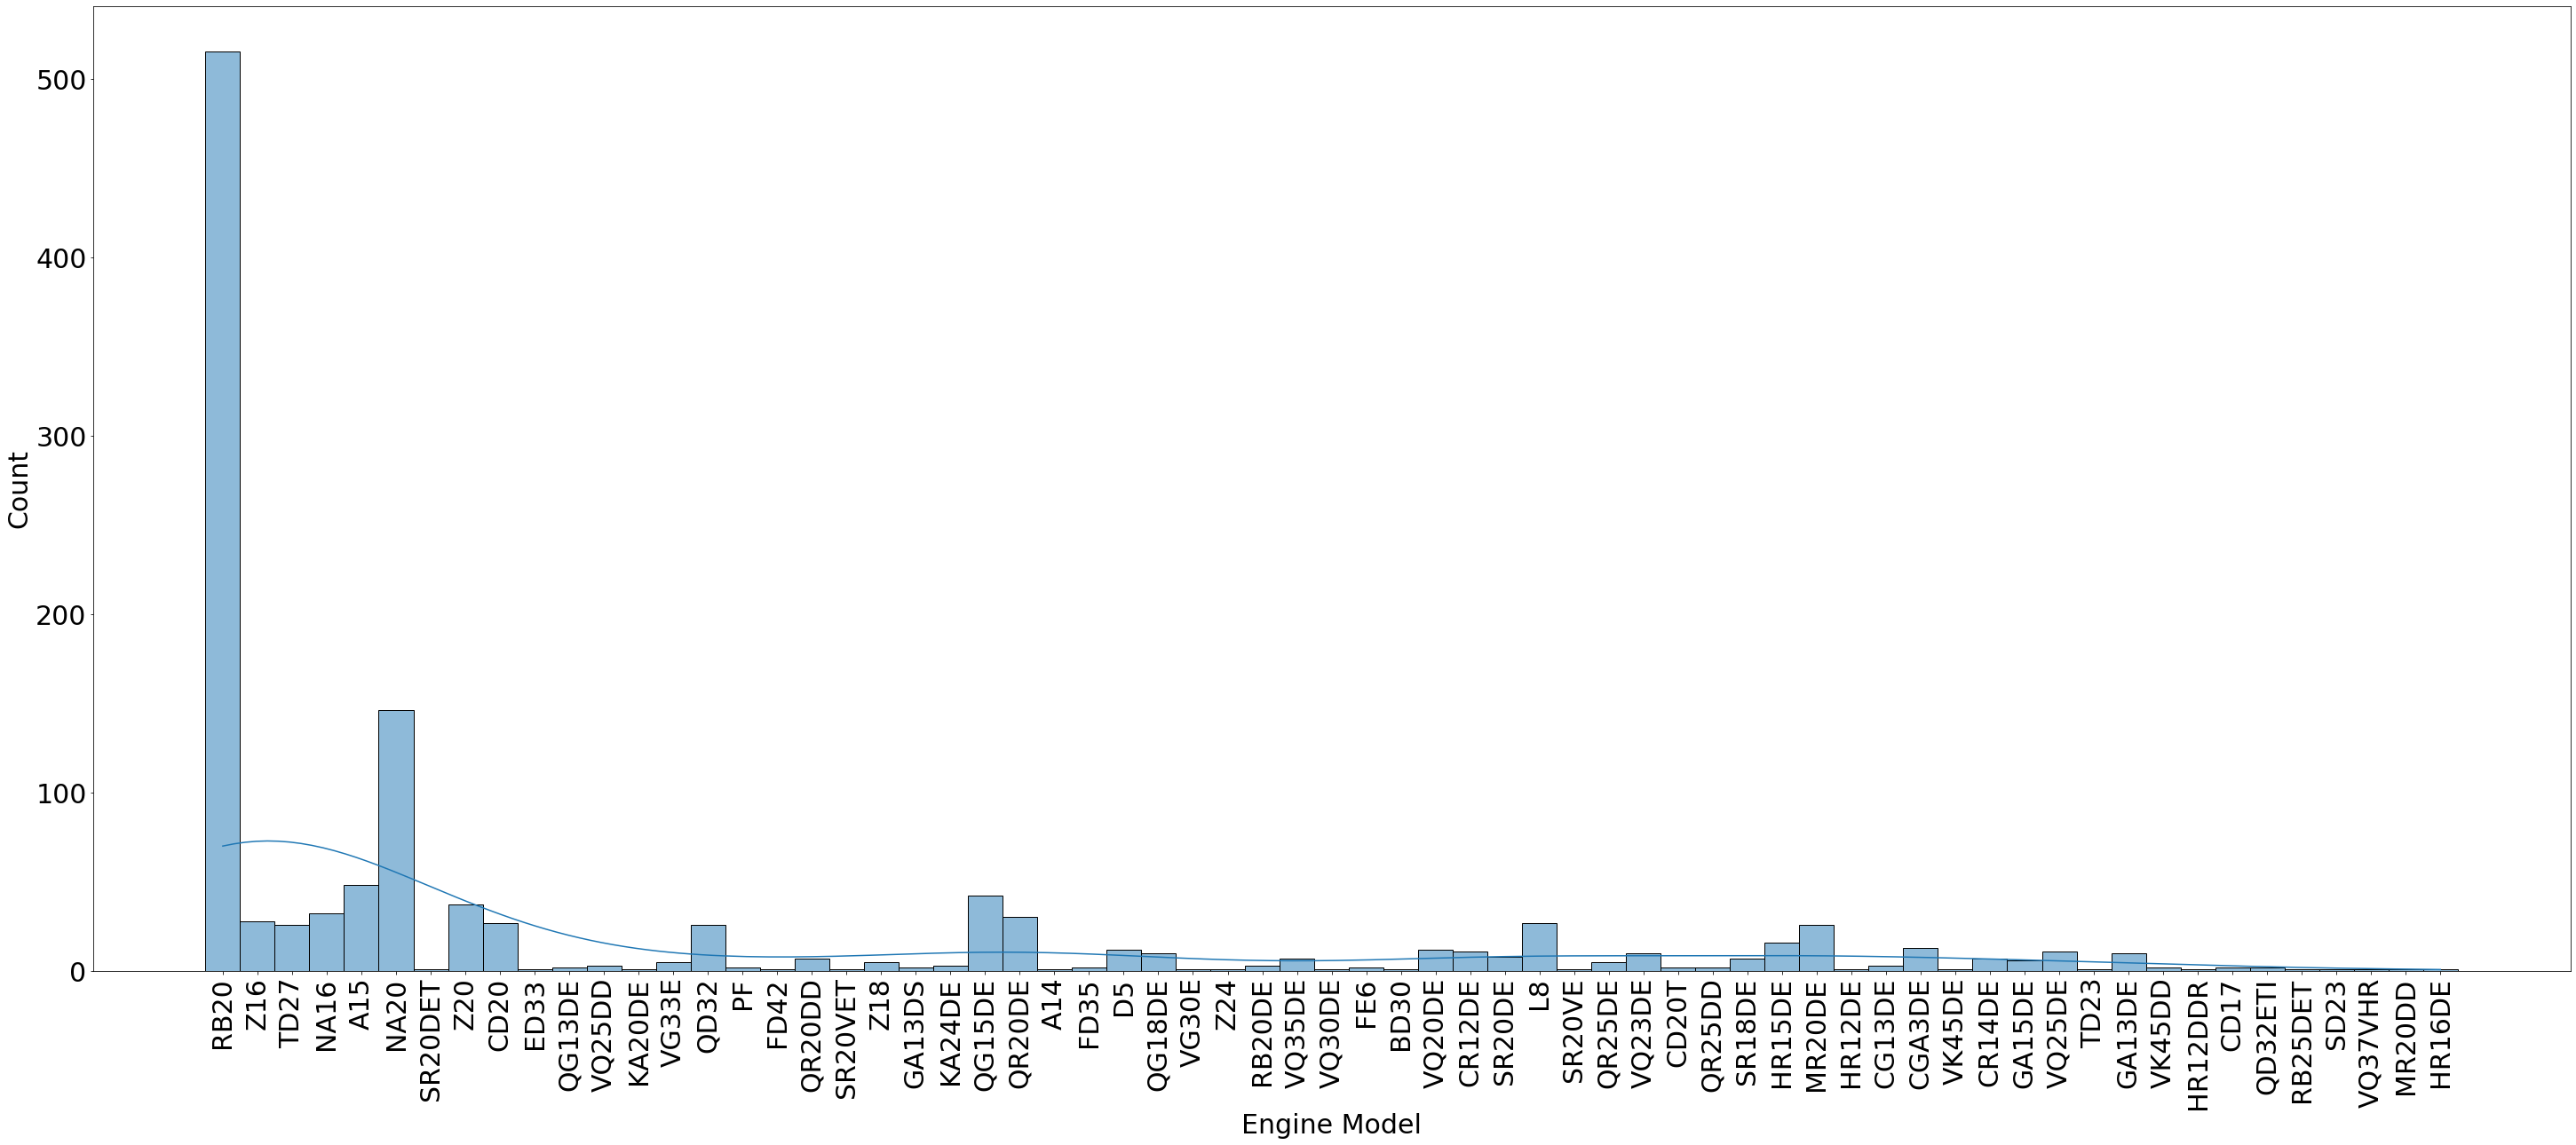

In [304]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_nissan_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

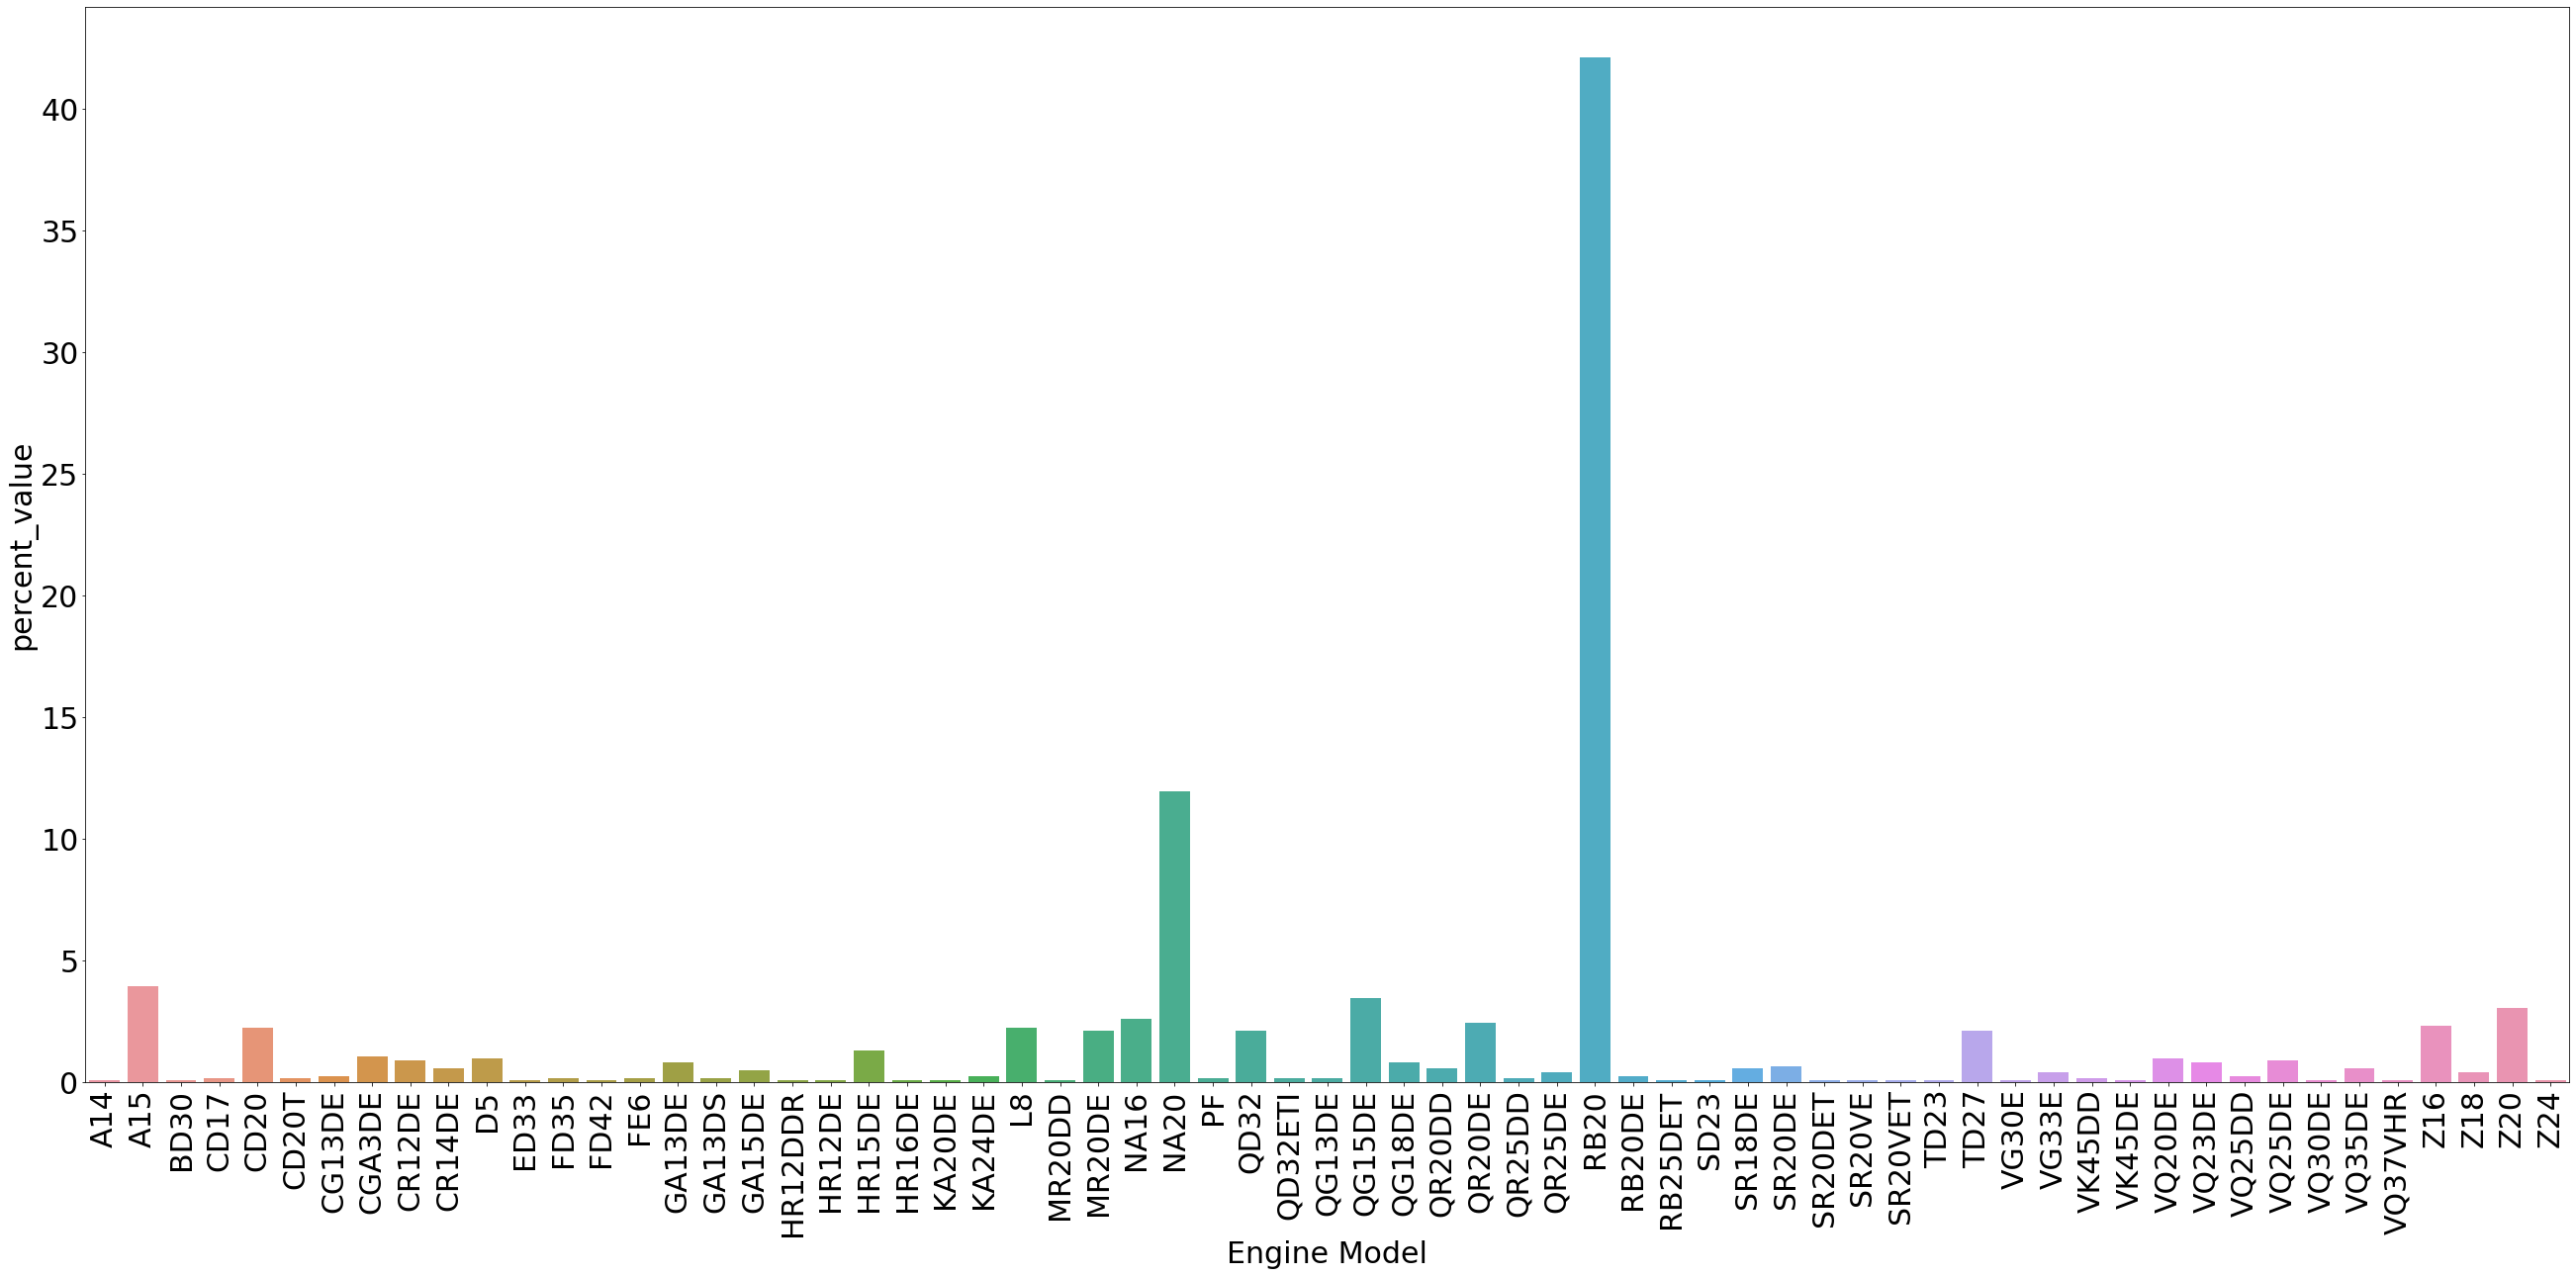

In [305]:
plt.figure(figsize=(45,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_nissan)

# Visualization Subaru

In [306]:
df_subaru = df_merged[df_merged.Producer.str.contains('SUBARU')]
df_subaru

Register Date     HS Code  \
5         2011-01-20  8407343009   
12        2011-01-18  8407343009   
16        2011-01-21  8407343009   
17        2011-01-24  8407343009   
20        2011-01-25  8407343009   
...              ...         ...   
259059    2019-12-01  8407343009   
259124    2019-12-01  8407343009   
259125    2019-12-01  8407343009   
259126    2019-12-01  8407343009   
259159    2019-12-01  8407343009   

                                      Product Description  \
5       ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ИСКРОВЫМ ЗАЖИГАНИЕМ И В...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
16      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
17      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
...                                                   ...   
259059  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259124  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259125  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259126  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259159  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   

                                                 Producer  \
5                                                  SUBARU   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
20                          SUBARU, NISSAN, TOYOTA, HONDA   
...                                                   ...   
259059                                    SUBARU DAIHATSU   
259124                                             SUBARU   
259125                                             SUBARU   
259126                                             SUBARU   
259159                                    SUBARU DAIHATSU   

                                                    Brand Place of Receipt  \
5                                                  SUBARU   ТОЯМА НЬЮ ПОРТ   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
...                                                   ...              ...   
259059                                    SUBARU DAIHATSU      ВЛАДИВОСТОК   
259124                                             SUBARU      ВЛАДИВОСТОК   
259125                                             SUBARU      ВЛАДИВОСТОК   
259126                                             SUBARU      ВЛАДИВОСТОК   
259159                                    SUBARU DAIHATSU      ВЛАДИВОСТОК   

       Country of Origin    Country of Sales                      Shipper   \
5         JP, JPN, Japan      JP, JPN, Japan  METAL AUTO HOKURIKU CO., LTD   
12        JP, JPN, Japan      JP, JPN, Japan              J-TRADE CO., LTD   
16        JP, JPN, Japan      JP, JPN, Japan           YAMAGIN CORPORATION   
17        JP, JPN, Japan      JP, JPN, Japan           YAMAGIN CORPORATION   
20        JP, JPN, Japan      JP, JPN, Japan         G.E. TRADING CO., LTD   
...                  ...                 ...                           ...   
259059    JP, JPN, Japan      JP, JPN, Japan                  UNICO CO LTD   
259124    JP, JPN, Japan  SG, SGP, Singapore        GLOBAL-EYE CORPORATION   
259125    JP, JPN, Japan  SG, SGP, Singapore        GLOBAL-EYE CORPORATION   
259126    JP, JPN, Japan  SG, SGP, Singapore        GLOBAL-EYE CORPORATION   
259159    JP, JPN, Japan      JP, JPN, Japan                  UNICO CO LTD   

                                          Shipper Address  \
5            ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62   
12            614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3   
16      141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI B

In [307]:
list_all_engine_model_subaru_GTO_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_subaru_GTO_filter.append(list_em)
    
list_all_engine_model_subaru_GTO_filter

[['EJ20-660933', 'EJ20-B490533'],
 ['EJ25-701920'],
 ['EJ20-A893668'],
 ['EJ20-974764'],
 ['EJ25-B03464'],
 ['EJ20-B13916', 'EJ20-A888010'],
 ['EJ20-A955836'],
 ['EJ20-687452'],
 ['EJ25-034578'],
 ['EL15-C961912'],
 ['EJ18-201500'],
 ['EJ20-B947799'],
 ['EJ20-B906541'],
 ['EJ20-561972', 'EJ20-724904', 'EJ20-B235179'],
 ['EJ20-209586'],
 ['EJ18-719996', 'EJ20-921387', 'EJ20-327893', 'EJ20-719960'],
 ['EJ20-B464790'],
 ['EJ20-B135886'],
 ['EJ20-B624055'],
 ['EJ20-B181420',
  'EJ20-B548102',
  'EJ20-B091827',
  'EJ20-B565136',
  'EJ20-C191787'],
 ['EJ20-B329901'],
 ['EJ25-D579128', 'EJ25-D998634'],
 ['EJ20-B264599', 'EJ20-A656603'],
 ['EJ20-630655'],
 ['EJ20-B551637'],
 ['EJ20-862172'],
 ['EJ15-C591109', 'EJ20-C167498', 'EJ25-620615'],
 ['EJ20-B057765', 'EJ20-B891486'],
 ['EJ20-829201', 'EJ25-B004074', 'EJ25-B207921'],
 ['EJ20-C394405', 'EJ20-C605887', 'EJ20-B962504'],
 ['EJ20-78'],
 ['EJ20-C684438', 'EJ20-A834056'],
 ['EJ20-C377492'],
 ['EJ20-B533086'],
 ['EJ20-221776'],
 ['EJ20-630109F8

In [308]:
len(list_all_engine_model_subaru_GTO_filter)

3746

In [309]:
chain_list_em_subaru = list(chain(*list_all_engine_model_subaru_GTO_filter))
len(chain_list_em_subaru)

7247

In [310]:
list_subaru_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_subaru))
list_subaru_remove_tail = list(map(lambda x :split_str(x) ,list_subaru_remove_tail))
df_list_subaru_remove_tail = pd.DataFrame({'Engine Model':list_subaru_remove_tail})
df_list_subaru_remove_tail

Engine Model
0            EJ20
1            EJ20
2            EJ25
3            EJ20
4            EJ20
...           ...
7242         EJ20
7243         EJ20
7244         EJ15
7245         FB20
7246         FB20

[7247 rows x 1 columns]

In [311]:
df_freq_mitsubishi = df_list_subaru_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

Engine Model  count  percent_value
0          EJ15    545           7.52
1          EJ18    119           1.64
2          EJ20   5028          69.38
3          EJ22      5           0.07
4          EJ25    905          12.49
5          EL15    207           2.86
6          EN07      5           0.07
7          EZ30    321           4.43
8          FB16     16           0.22
9          FB20     81           1.12
10         FB25     15           0.21

In [312]:
df_freq_mitsubishi.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
2         EJ20   5028          69.38
4         EJ25    905          12.49
0         EJ15    545           7.52
7         EZ30    321           4.43
5         EL15    207           2.86

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

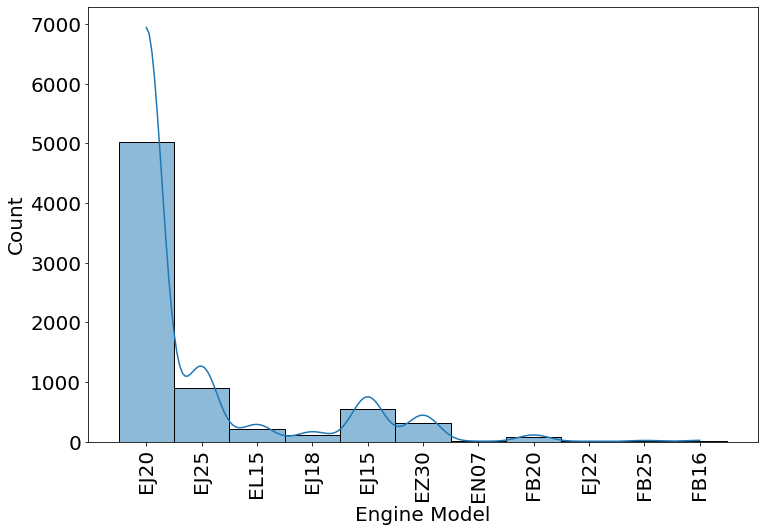

In [112]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.histplot(data=list_subaru_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

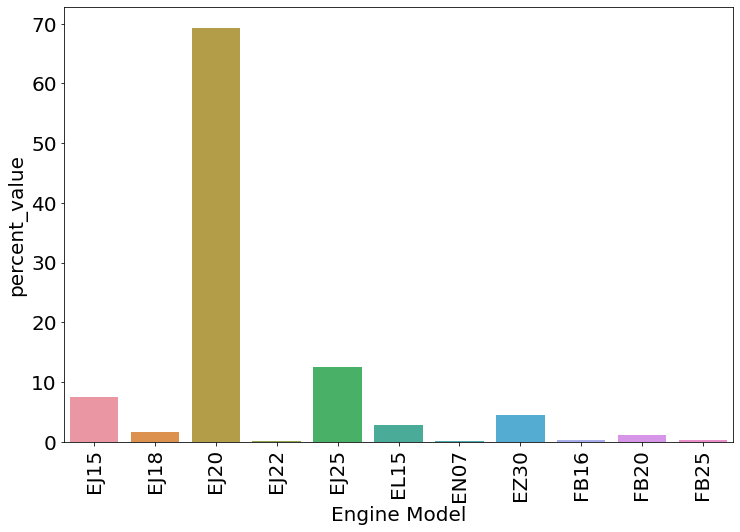

In [113]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Dữ liệu GTO từ Nhật Bản

In [2]:
df_GTO_Japan  = pd.read_csv('GTO_JAPAN_engine.csv')

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_GTO_Japan

Register Date     HS Code  \
0         2018-01-01  8407343009   
1         2018-01-01  8407349908   
2         2018-01-01  8407343009   
3         2018-01-01  8407343009   
4         2018-01-01  8407343009   
...              ...         ...   
100539    2016-12-01  8407343009   
100540    2016-12-01  8407343009   
100541    2016-12-01  8407343009   
100542    2016-12-01  8407343009   
100543    2016-12-01  8407343009   

                                      Product Description  \
0       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
2       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
3       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
4       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100539  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100540  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100541  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100542  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100543  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                Producer                   Brand  \
0                                 SUZUKI                  SUZUKI   
1                MAZDA MOTOR CORPORATION                   MAZDA   
2                 DAIHATSU,SUBARU,SUZUKI  DAIHATSU,SUBARU,SUZUKI   
3                    TOYOTA MOTOR CORP.                   TOYOTA   
4                                 TOYOTA                  TOYOTA   
...                                  ...                     ...   
100539               HONDA MOTOR CO. LTD                   HONDA   
100540           HONDA MOTOR CORPORATION                   HONDA   
100541  SUBARU-FUJI HEAVY INDUSTRIES LTD                  SUBARU   
100542                   HONDA MOTOR CO.                   HONDA   
100543          TOYOTA MOTOR CORPORATION                  TOYOTA   

       Place of Receipt Country of Origin Country of Sales  \
0           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
1                ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
2           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
3           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
4           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
...                 ...               ...              ...   
100539        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100540        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100541        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100542        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100543        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
0                                        EARLYBIRD CO.LTD   
1       PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
2                                         ASTRADE CO.,LTD   
3                                    YAMAGIN CORPORATION    
4                                           ARAI CO., LTD   
...                                                   ...   
100539                                      SHIJO TRADING   
100540  EAST-JAPAN RECYCLING RESOURCES CO.,LTD 21-1 SH...   
100541                                      SCP-TRANS LLC   
100542                               KAIHO SANGYO CO.,LTD   
100543                                  O.M.AUTO CO.,LTD.   

                                          Shipper Address  ...  \
0                  JAPAN, TOYAMA-SHI, IWASE, SUWAMACHI 52  ...   
1       , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
2                  , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
3       , JAPAN, TOKYO, DAIICHI SEIMEI BLDG,8F,2-19-3 ...  ...   
4       671-1132, HYOGO, HIMEJI CITY, KANBEI CHO OHTSU...  ...   
...                                                   ...  ...   
100539        SHIZUOKA 418-0022 2150-2 KOIZUMI FUJINOMIYA  ...   
100540            

In [4]:
for col in list(df_GTO_Japan.columns):
 (df_GTO_Japan[col].dtype ==  'object') and (df_GTO_Japan[col].fillna(value='unknown',inplace = True)) or (df_GTO_Japan[col].fillna(value=0, inplace = True))

# Toyota

In [96]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('TOYOTA')]
df_toyota

Register Date     HS Code  \
3         2018-01-01  8407343009   
4         2018-01-01  8407343009   
10        2018-01-01  8407343009   
16        2018-01-01  8407343009   
18        2018-01-01  8407343009   
...              ...         ...   
100526    2016-12-01  8407343009   
100528    2016-12-01  8407343009   
100534    2016-12-01  8407343009   
100535    2016-12-01  8407343009   
100543    2016-12-01  8407343009   

                                      Product Description  \
3       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
4       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
10      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
16      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
18      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100526  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100528  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100534  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100535  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100543  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                        Producer   Brand Place of Receipt Country of Origin  \
3            TOYOTA MOTOR CORP.   TOYOTA      ВЛАДИВОСТОК    JP, JPN, Japan   
4                         TOYOTA  TOYOTA      ВЛАДИВОСТОК    JP, JPN, Japan   
10      TOYOTA MOTOR CORPORATION  TOYOTA       ТОЯМАШИНКО    JP, JPN, Japan   
16      TOYOTA MOTOR CORPORATION  TOYOTA            НАГОЯ    JP, JPN, Japan   
18                        TOYOTA  TOYOTA      ВЛАДИВОСТОК    JP, JPN, Japan   
...                          ...     ...              ...               ...   
100526                   TOYOTA   TOYOTA      ВЛАДИВОСТОК    JP, JPN, Japan   
100528                    TOYOTA  TOYOTA      ВЛАДИВОСТОК    JP, JPN, Japan   
100534          TOYOTA MOTOR CO.  TOYOTA        ВОСТОЧНЫЙ    JP, JPN, Japan   
100535          TOYOTA MOTOR CO.  TOYOTA        ВОСТОЧНЫЙ    JP, JPN, Japan   
100543  TOYOTA MOTOR CORPORATION  TOYOTA        ВОСТОЧНЫЙ    JP, JPN, Japan   

       Country of Sales                        Shipper   \
3        JP, JPN, Japan            YAMAGIN CORPORATION    
4        JP, JPN, Japan                   ARAI CO., LTD   
10       JP, JPN, Japan           KAIHO SANGYO CO., LTD   
16       JP, JPN, Japan              FRIEND SHOJI, INC.   
18       JP, JPN, Japan                RAJA CORPORATION   
...                 ...                             ...   
100526   JP, JPN, Japan         ALLIANCE GROUP CO.,LTD    
100528   JP, JPN, Japan  KNOT GLOBAL HOLDINGS CO., LTD.   
100534   JP, JPN, Japan              SEAPARTS CO., LTD.   
100535   JP, JPN, Japan            KAIHO SANGYO CO.,LTD   
100543   JP, JPN, Japan               O.M.AUTO CO.,LTD.   

                                          Shipper Address  ...  \
3       , JAPAN, TOKYO, DAIICHI SEIMEI BLDG,8F,2-19-3 ...  ...   
4       671-1132, HYOGO, HIMEJI CITY, KANBEI CHO OHTSU...  ...   
10      920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...   
16      452-0814, NISHIKU, NAGOYA, TATSUMIDO BLDG 3F M...  ...   
18        444-3172, AICHI, OKAZAKI, 46-3 KUCHIDA, TAGUCNI  ...   
...                                                   ...  ...   
100526  TOYAMA-SHI 1554-20 NAKNOMYO, FUCHU-MACHI TOYAM...  ...   
100528  MARUYAMA-CHO,SHIBUYA-KU 150-0044 ICHIGOSHIBUYA...  ...   
100534  SHUTO-MACHI IWAKUNI-SHI ,YAMAGUCHI-KEN 1811-1 ...  ...   
100535  KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHI-KA...  ...   
100543             NAGOYA- SHI NISHIKI-MATI 5-1 MINATO-KU  ...   

       Unit of Measure Incoterms  Gross Weight in KG Net Weight in KG  \
3              unknown       CFR               399.0            399.0   
4              unknown       CFR              2540.0           2540.0   
10             unknown       FOB              6630.0           6630.0   
16             unknown       FOB              7520.0           7520.0   
18             unknown   

In [97]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['2C-3633170'],
 ['1AZ-FSE-4295017', '1AZ-FSE-4899029'],
 ['1ZZ-FE-1193440', '5A-FE-G626241'],
 ['1AZ-FSE-4741684', '1KR-FE-0648081'],
 ['2AZ-FE-1296941', '2AZ-FSE-2074864'],
 ['1AZ-FSE-4557868'],
 ['3Y-0818563'],
 ['2C-3721260'],
 ['2C-3468281'],
 ['2C-2558135'],
 ['2C-0914707'],
 ['2C-0559787'],
 ['2C-3317877'],
 ['7K-0782504'],
 ['7K-042600'],
 ['2C-3261979'],
 ['2C-3403112'],
 ['2C-Б'],
 ['2C-2458964'],
 ['2C-1202994'],
 ['2C-0890568'],
 ['2C-3059151'],
 ['7K-G908723'],
 ['2C-2604478'],
 ['2C-3687899'],
 ['7K-0314150'],
 ['3Y-1080311'],
 ['7K-0586878'],
 ['3L-3081649'],
 ['7K-O7'],
 ['5K-0485772'],
 ['13B-410820'],
 ['2Y-0824062'],
 ['7K-0853135'],
 ['3F-0315702'],
 ['5K-13265'],
 ['7K-0803497'],
 ['7K-0865976'],
 ['2Y-O861964'],
 ['3Y-1184787'],
 ['7K-0098754'],
 ['3Y-1256560', '3Y-1232260'],
 ['3Y-1147221'],
 ['3Y-1256560', '3Y-1232260'],
 ['7K-0864092'],
 ['7K-0389805'],
 ['3S-GE-9358224'],
 ['3Y-1302118'],
 ['1RZ-2754684'],
 ['7K-0853589', '7K-0819205', '7K-0853116'],
 ['T2-00

In [98]:
len(list_all_engine_model_toyota_GTO_JP_filter)

628

In [99]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [100]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0             2C
1        1AZ-FSE
2        1AZ-FSE
3         1ZZ-FE
4          5A-FE
..           ...
807       2TR-FE
808           7K
809           7K
810           2Y
811           2Y

[812 rows x 1 columns]

In [101]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0            13B      9           1.11
1         1AZ-FE      2           0.25
2        1AZ-FSE      7           0.86
3          1G-FE     30           3.69
4            1HZ      1           0.12
5        1JZ-FSE      3           0.37
6         1JZ-GE      7           0.86
7        1JZ-GTE      2           0.25
8         1KR-FE      1           0.12
9         1MZ-FE      5           0.62
10            1N     10           1.23
11        1NZ-FE     20           2.46
12       1NZ-FXE      1           0.12
13           1RZ     20           2.46
14       1UR-FSE      1           0.12
15        1ZZ-FE     19           2.34
16        2AZ-FE     11           1.35
17       2AZ-FSE      1           0.12
18       2AZ-FXE      1           0.12
19            2C     32           3.94
20            2H      1           0.12
21        2JZ-GE      3           0.37
22            2L      4           0.49
23        2NZ-FE      9           1.11
24        2SZ-FE      7           0.86
25        2TR-FE     12           1.48
26  2TR-FE-A343E      1           0.12
27       2TZ-FZE      1           0.12
28            2Y     93          11.45
29    2Y-0846450      1           0.12
30    2Y-0877472      1           0.12
31        2ZZ-GE      2           0.25
32            3F     24           2.96
33            3L      4           0.49
34         3S-FE     12           1.48
35         3S-GE      3           0.37
36        3S-GTE      2           0.25
37            3Y    143          17.61
38       3ZR-FAE      1           0.12
39         4A-FE      4           0.49
40         4A-GE      1           0.12
41            4B      1           0.12
42         4E-FE      3           0.37
43       4GR-FSE      3           0.37
44         4S-FE      4           0.49
45         5A-FE      6           0.74
46         5E-FE     10           1.23
47            5K     38           4.68
48    5K-1315032      1           0.12
49            5L      6           0.74
50         5S-FE      1           0.12
51        5VZ-FE      2           0.25
52         7A-FE     10           1.23
53            7K    183          22.54
54    7K-0393691      1           0.12
55    7K-0539464      1           0.12
56    7K-0795062      1           0.12
57    7K-0862699      1           0.12
58             B      4           0.49
59            T2     24           2.96

In [102]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
53           7K    183          22.54
37           3Y    143          17.61
28           2Y     93          11.45
47           5K     38           4.68
19           2C     32           3.94

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

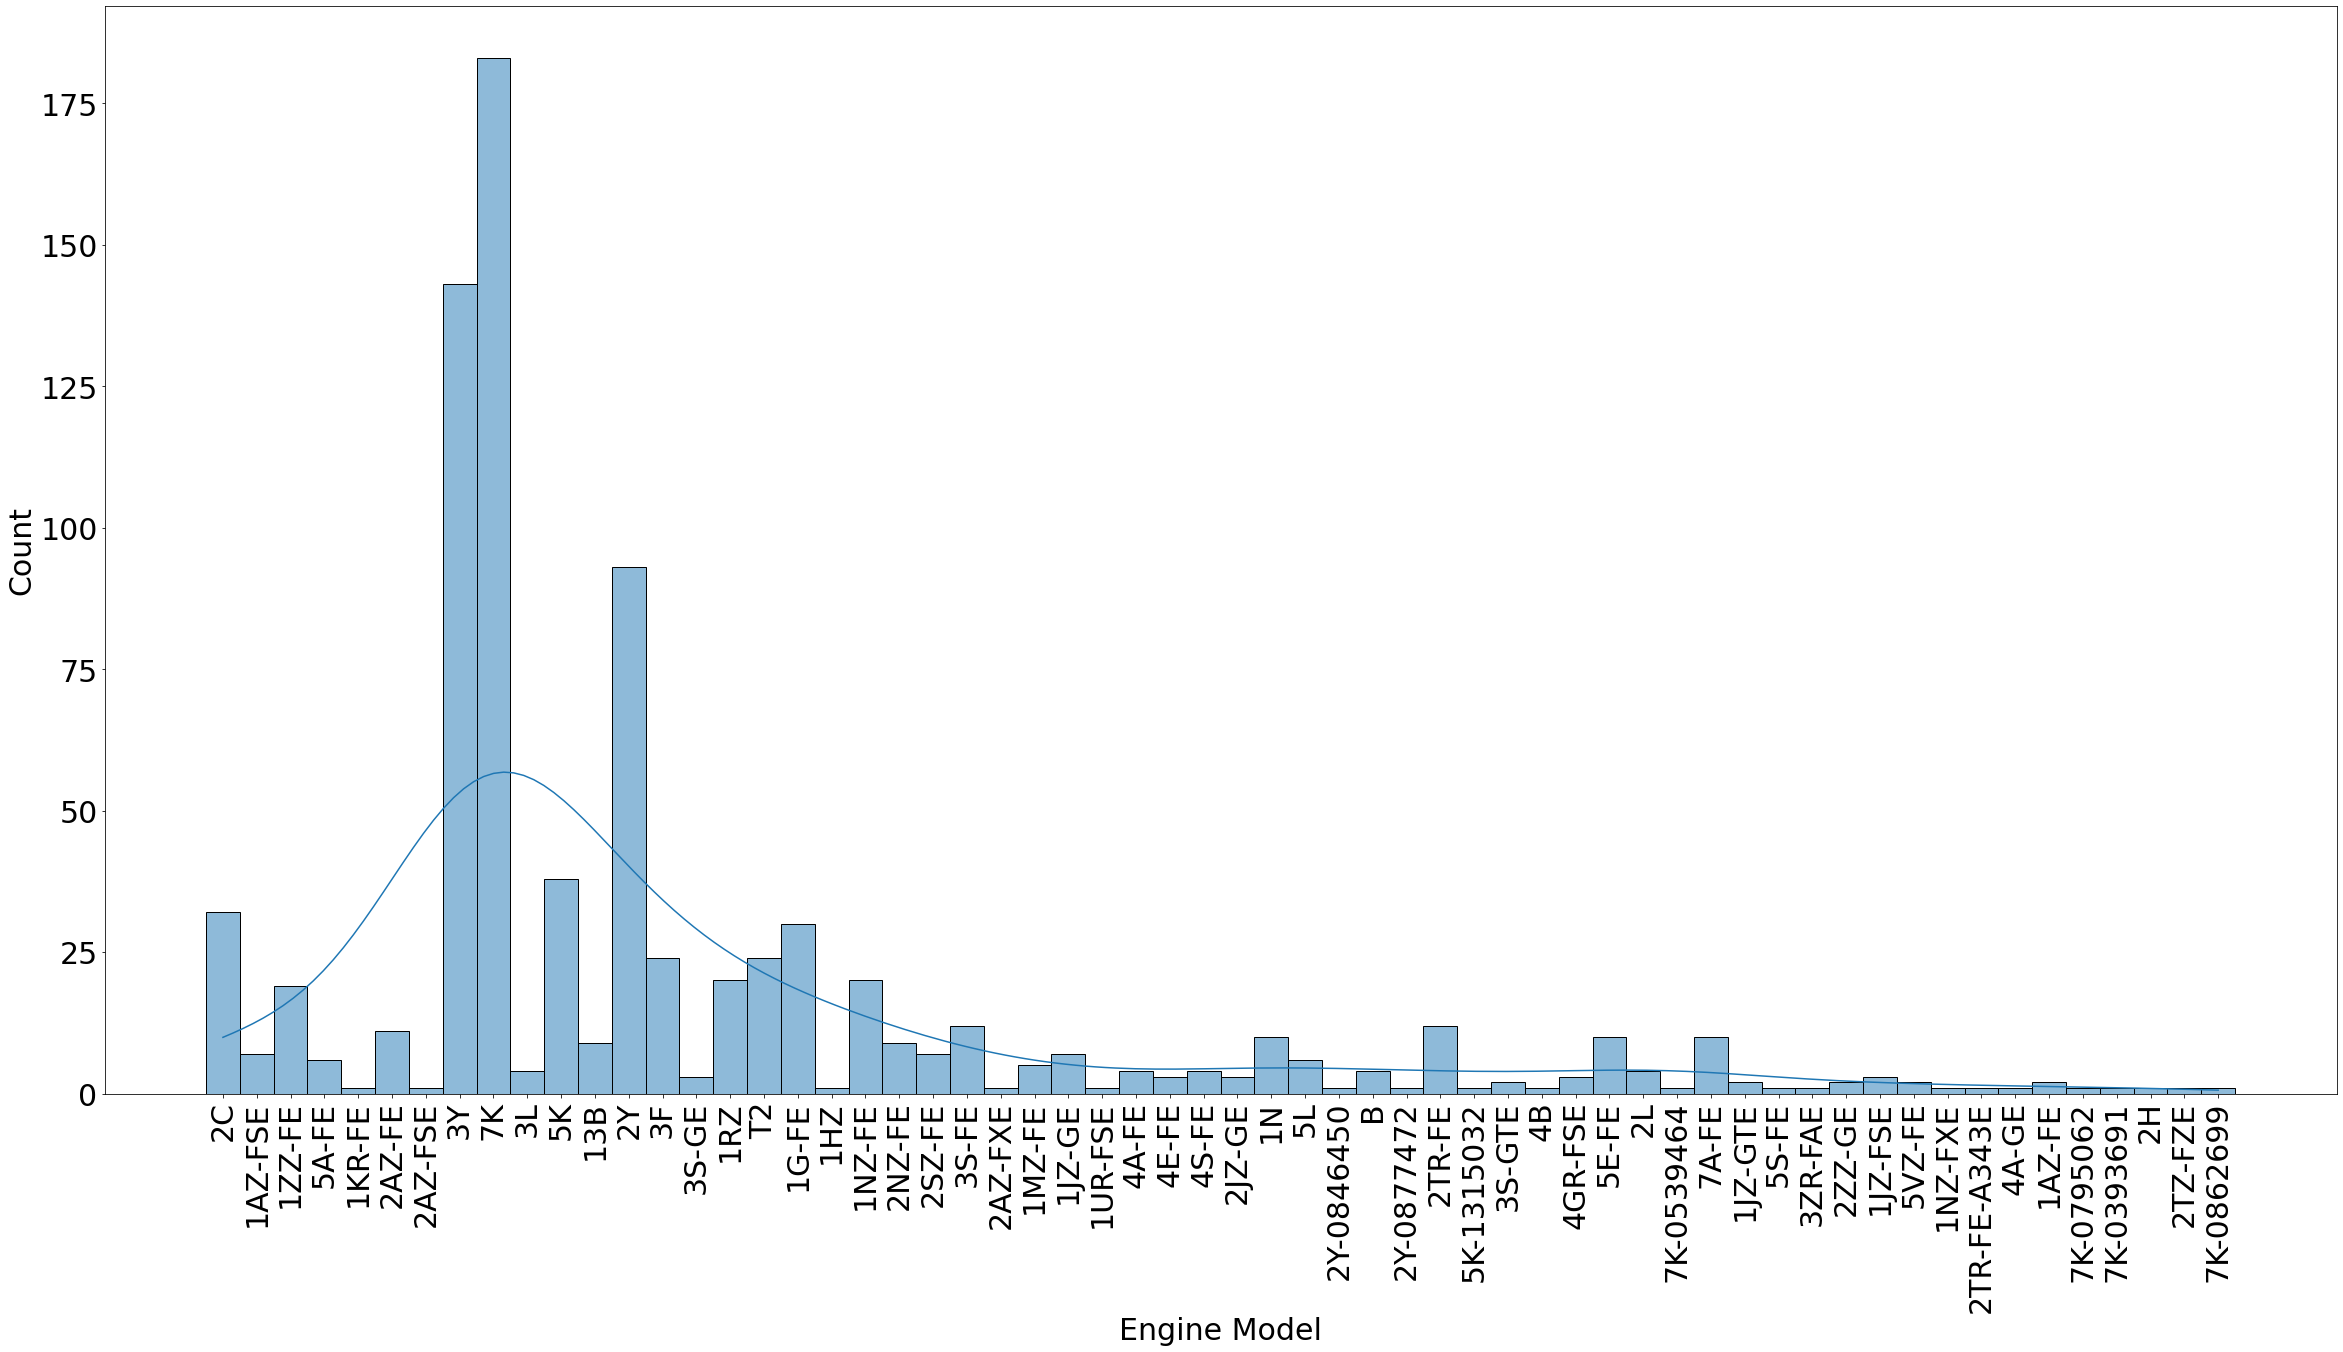

In [103]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

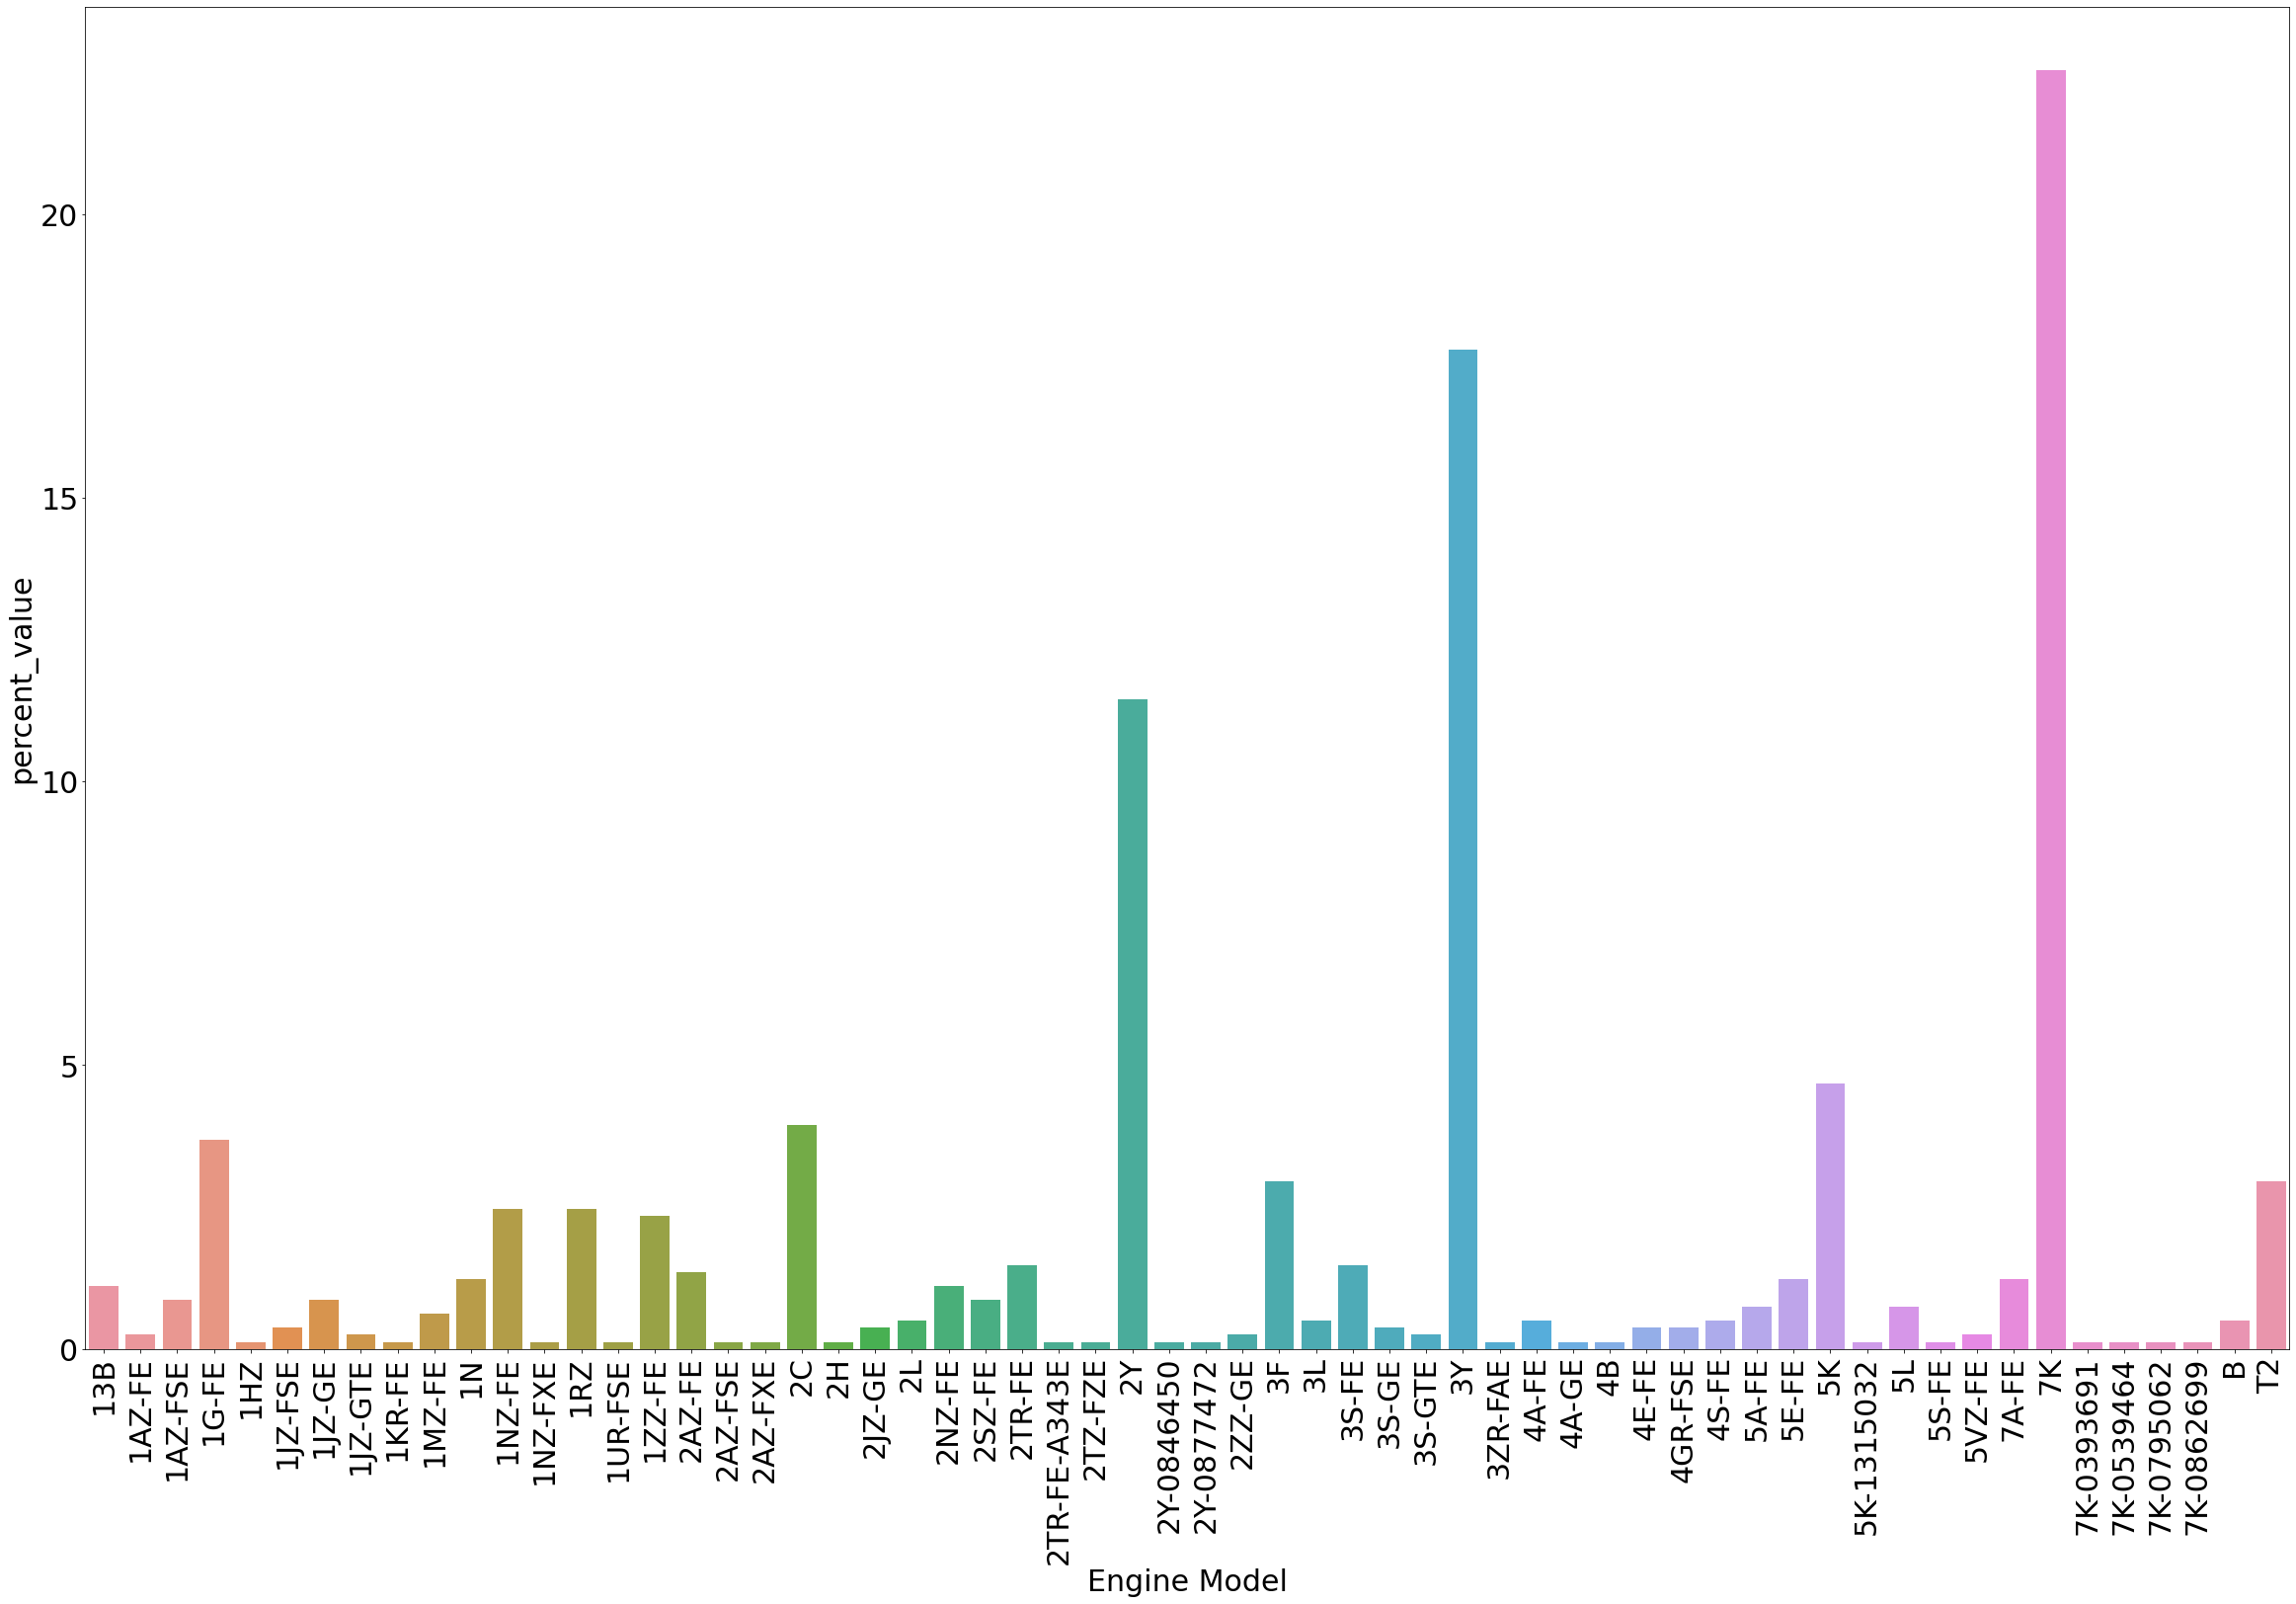

In [104]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Mazda

In [6]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('MAZDA')]
df_toyota

Register Date     HS Code  \
1         2018-01-01  8407349908   
11        2018-01-01  8407349908   
26        2018-01-01  8407349908   
229       2018-01-01  8407349908   
233       2018-01-01  8407349908   
...              ...         ...   
99129     2016-11-01  8407349908   
99134     2016-11-01  8407349908   
99582     2016-11-01  8407349908   
99690     2016-12-01  8407343009   
100192    2016-12-01  8407343009   

                                      Product Description  \
1       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
11      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
26      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
229     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
233     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
99129   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99134   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99582   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99690   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100192  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                       Producer                          Brand  \
1       MAZDA MOTOR CORPORATION                          MAZDA   
11      MAZDA MOTOR CORPORATION                          MAZDA   
26      MAZDA MOTOR CORPORATION                          MAZDA   
229     MAZDA MOTOR CORPORATION                          MAZDA   
233     MAZDA MOTOR CORPORATION                          MAZDA   
...                         ...                            ...   
99129   MAZDA MOTOR CORPORATION                          MAZDA   
99134   MAZDA MOTOR CORPORATION                          MAZDA   
99582   MAZDA MOTOR CORPORATION                          MAZDA   
99690         MAZDA MOTOR CORP;  ТОВАРНЫМ ЗНАКОМ НЕ ОБОЗНАЧЕНО   
100192       MAZDA MOTOR CO LTD                          MAZDA   

       Place of Receipt Country of Origin Country of Sales  \
1                ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
11               ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
26               ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
229              ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
233              ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
...                 ...               ...              ...   
99129            ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
99134            ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
99582            ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
99690         ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100192        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
1       PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
11      PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
26      PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
229     PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
233     PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
...                                                   ...   
99129   PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
99134   PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
99582   PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
99690         ECO-R CO.LTD,838-1 KUBOTA,ASHIKAGA,TOCHIGI,   
100192                          KOYA AUTO FACTORY CO, LTD   

                                          Shipper Address  ...  \
1       , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
11      , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
26      , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
229     , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
233     , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
...                                                   ...  ...   
99129   SEONGDONG-GU 902 ACE HIGHEND SEONGSU TOWER14, ...  ...   
99134   SEONGDONG-GU 902 ACE HIGHEND SEONG

In [358]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['F8-268271'],
 ['R2-562008'],
 ['R2-668222'],
 ['R2-B02380K'],
 ['R2-B02971K'],
 ['R2-224227'],
 ['R2-569596'],
 ['R2-S2884655L'],
 ['R2-665565'],
 ['R2-S21303584K'],
 ['FE-426962'],
 ['GY-305819'],
 ['F8-379521'],
 ['B5-520993'],
 ['B5-510139', 'GY-6083AA'],
 ['F8-359817'],
 ['J5-158015'],
 ['RF-5109503'],
 ['B5-216650'],
 ['B6-935490'],
 ['F8-267847'],
 ['FE-447260'],
 ['FE-507131'],
 ['WL-260634'],
 ['GY-338543'],
 ['F8-318685'],
 ['FE-955088'],
 ['F8-39847'],
 ['F8-225200'],
 ['F8-36423'],
 ['F8-348644'],
 ['B5-191292', 'GY-258987'],
 ['GY-398138'],
 ['F8-994207', 'GY-3841'],
 ['YF-216262'],
 ['F8-316528'],
 ['B5-178573', 'B5-130675', 'GY-384196'],
 ['F8-406002', 'FE-131503'],
 ['13B-410820', 'FE-БЕЗ'],
 ['F8-269155'],
 ['F8-324726'],
 ['B5-643540'],
 ['B5-518672', 'G5-207673'],
 ['B5-643540'],
 ['F8-704672'],
 ['FE-162242', 'FE-454078'],
 ['F8-219252'],
 ['F8-348678'],
 ['F8-704672'],
 ['GY-309510', 'GY-255869'],
 ['F8-953236'],
 ['FE-472982'],
 ['F8-408320'],
 ['F8-449696'],
 [

In [359]:
len(list_all_engine_model_toyota_GTO_JP_filter)

997

In [360]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [361]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0              F8
1              R2
2              R2
3              R2
4              R2
...           ...
1331           B5
1332           G5
1333           GY
1334           GY
1335           YF

[1336 rows x 1 columns]

In [362]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0           13B     43           3.22
1           B3E      2           0.15
2            B5    193          14.45
3            B6     44           3.29
4            BP     14           1.05
5            E5      4           0.30
6            F8    411          30.76
7            FE    163          12.20
8            FP      1           0.07
9            FS      1           0.07
10           G5     25           1.87
11           G6     36           2.69
12           GY    237          17.74
13           HA      4           0.30
14           J5     36           2.69
15           L8     15           1.12
16           R2     15           1.12
17           RF      8           0.60
18           SL      4           0.30
19           VS      4           0.30
20           WL      8           0.60
21           XA      1           0.07
22           YF     65           4.87
23           ZJ      1           0.07
24           ZL      1           0.07

In [363]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
6            F8    411          30.76
12           GY    237          17.74
2            B5    193          14.45
7            FE    163          12.20
22           YF     65           4.87

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

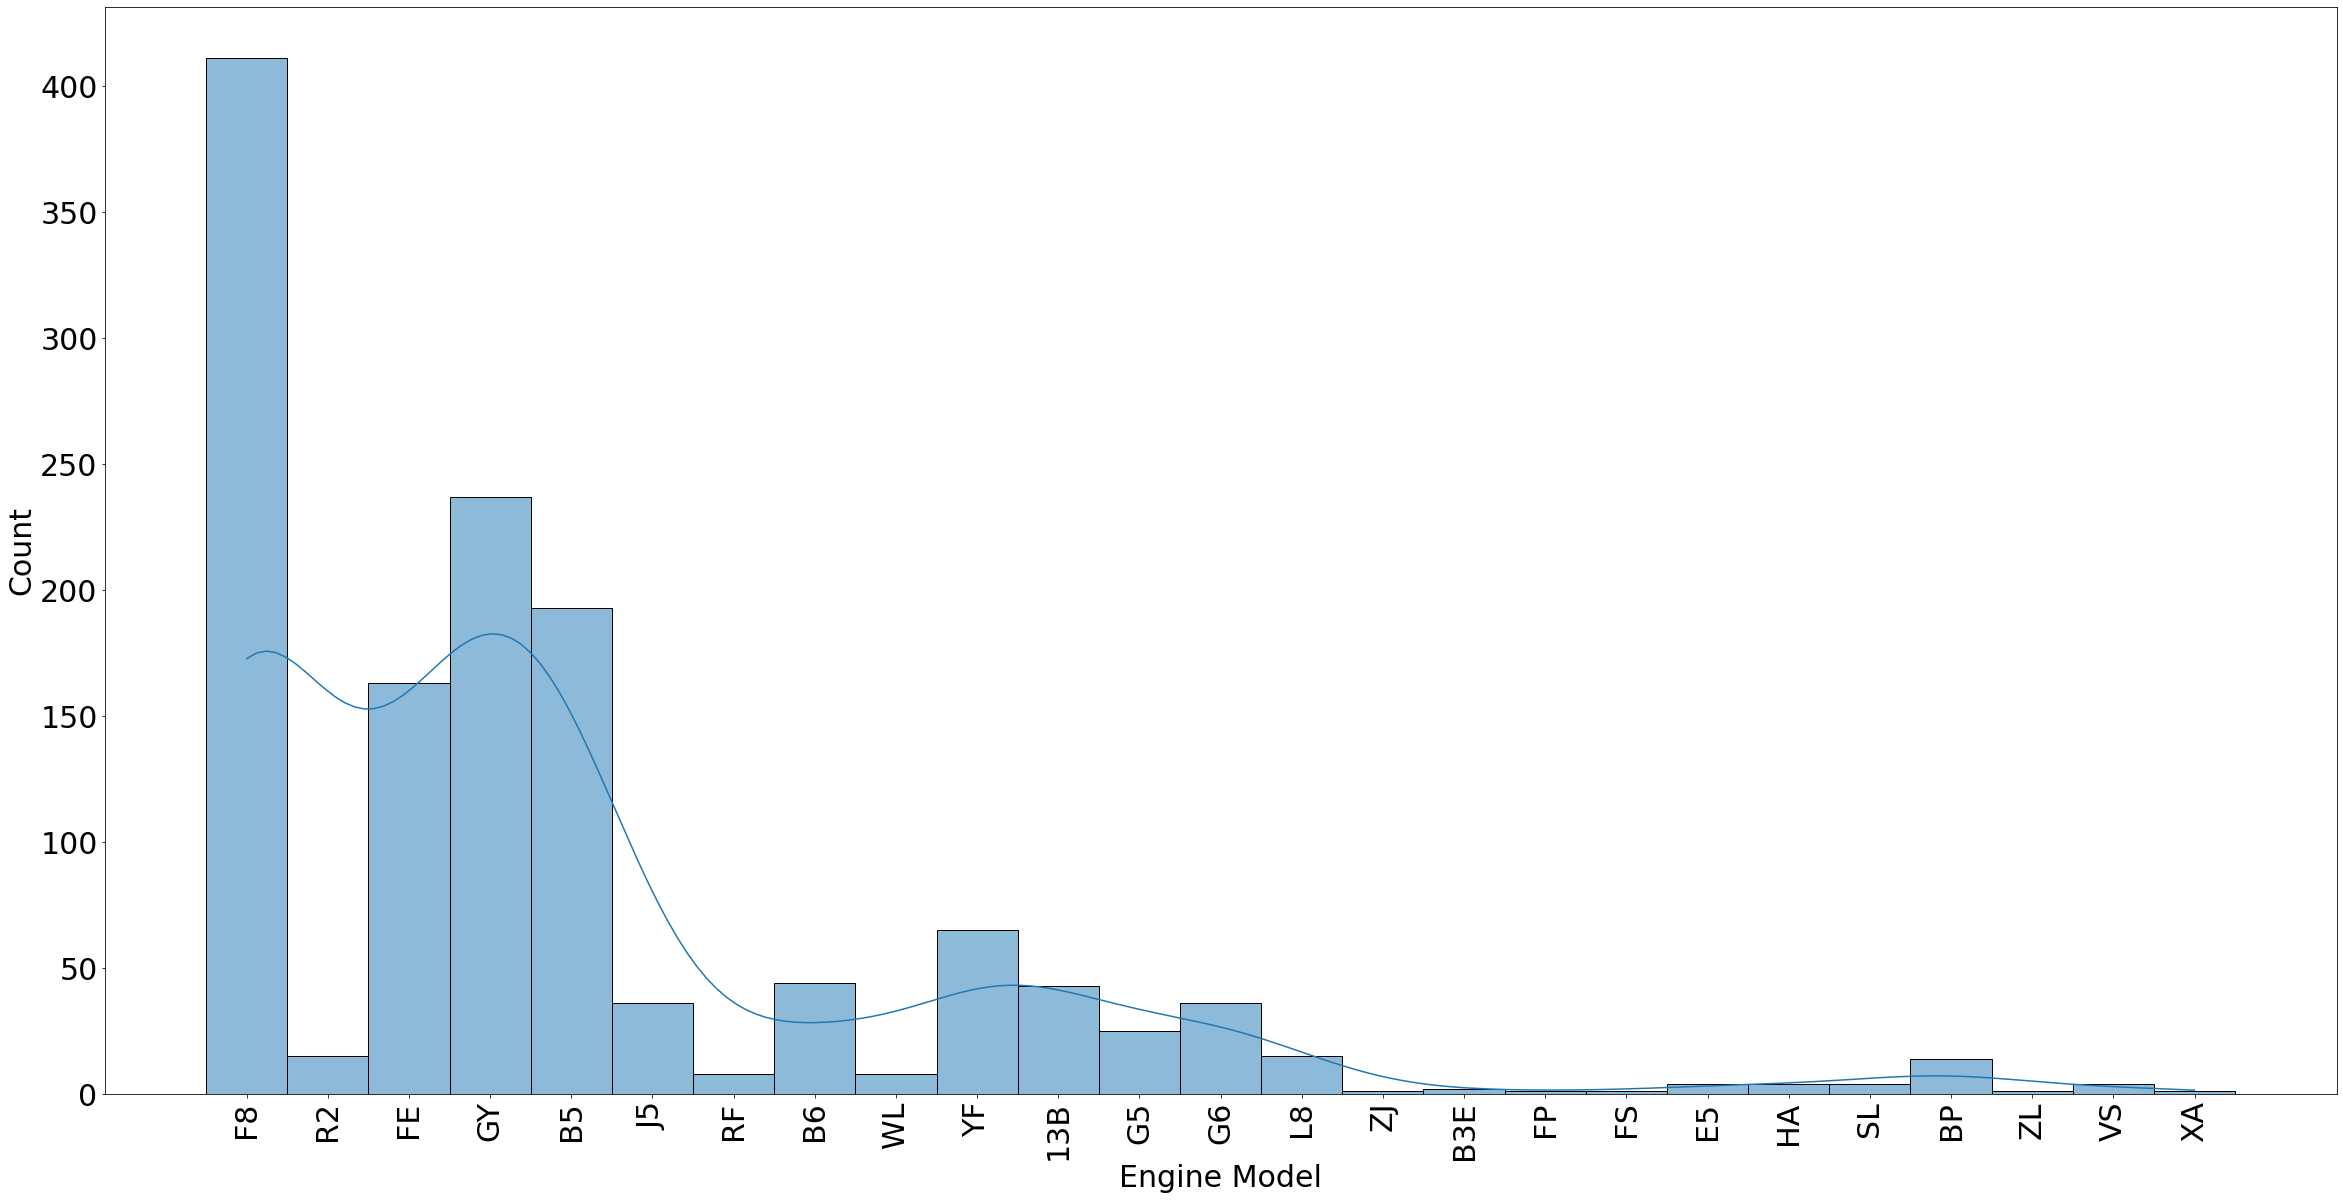

In [364]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

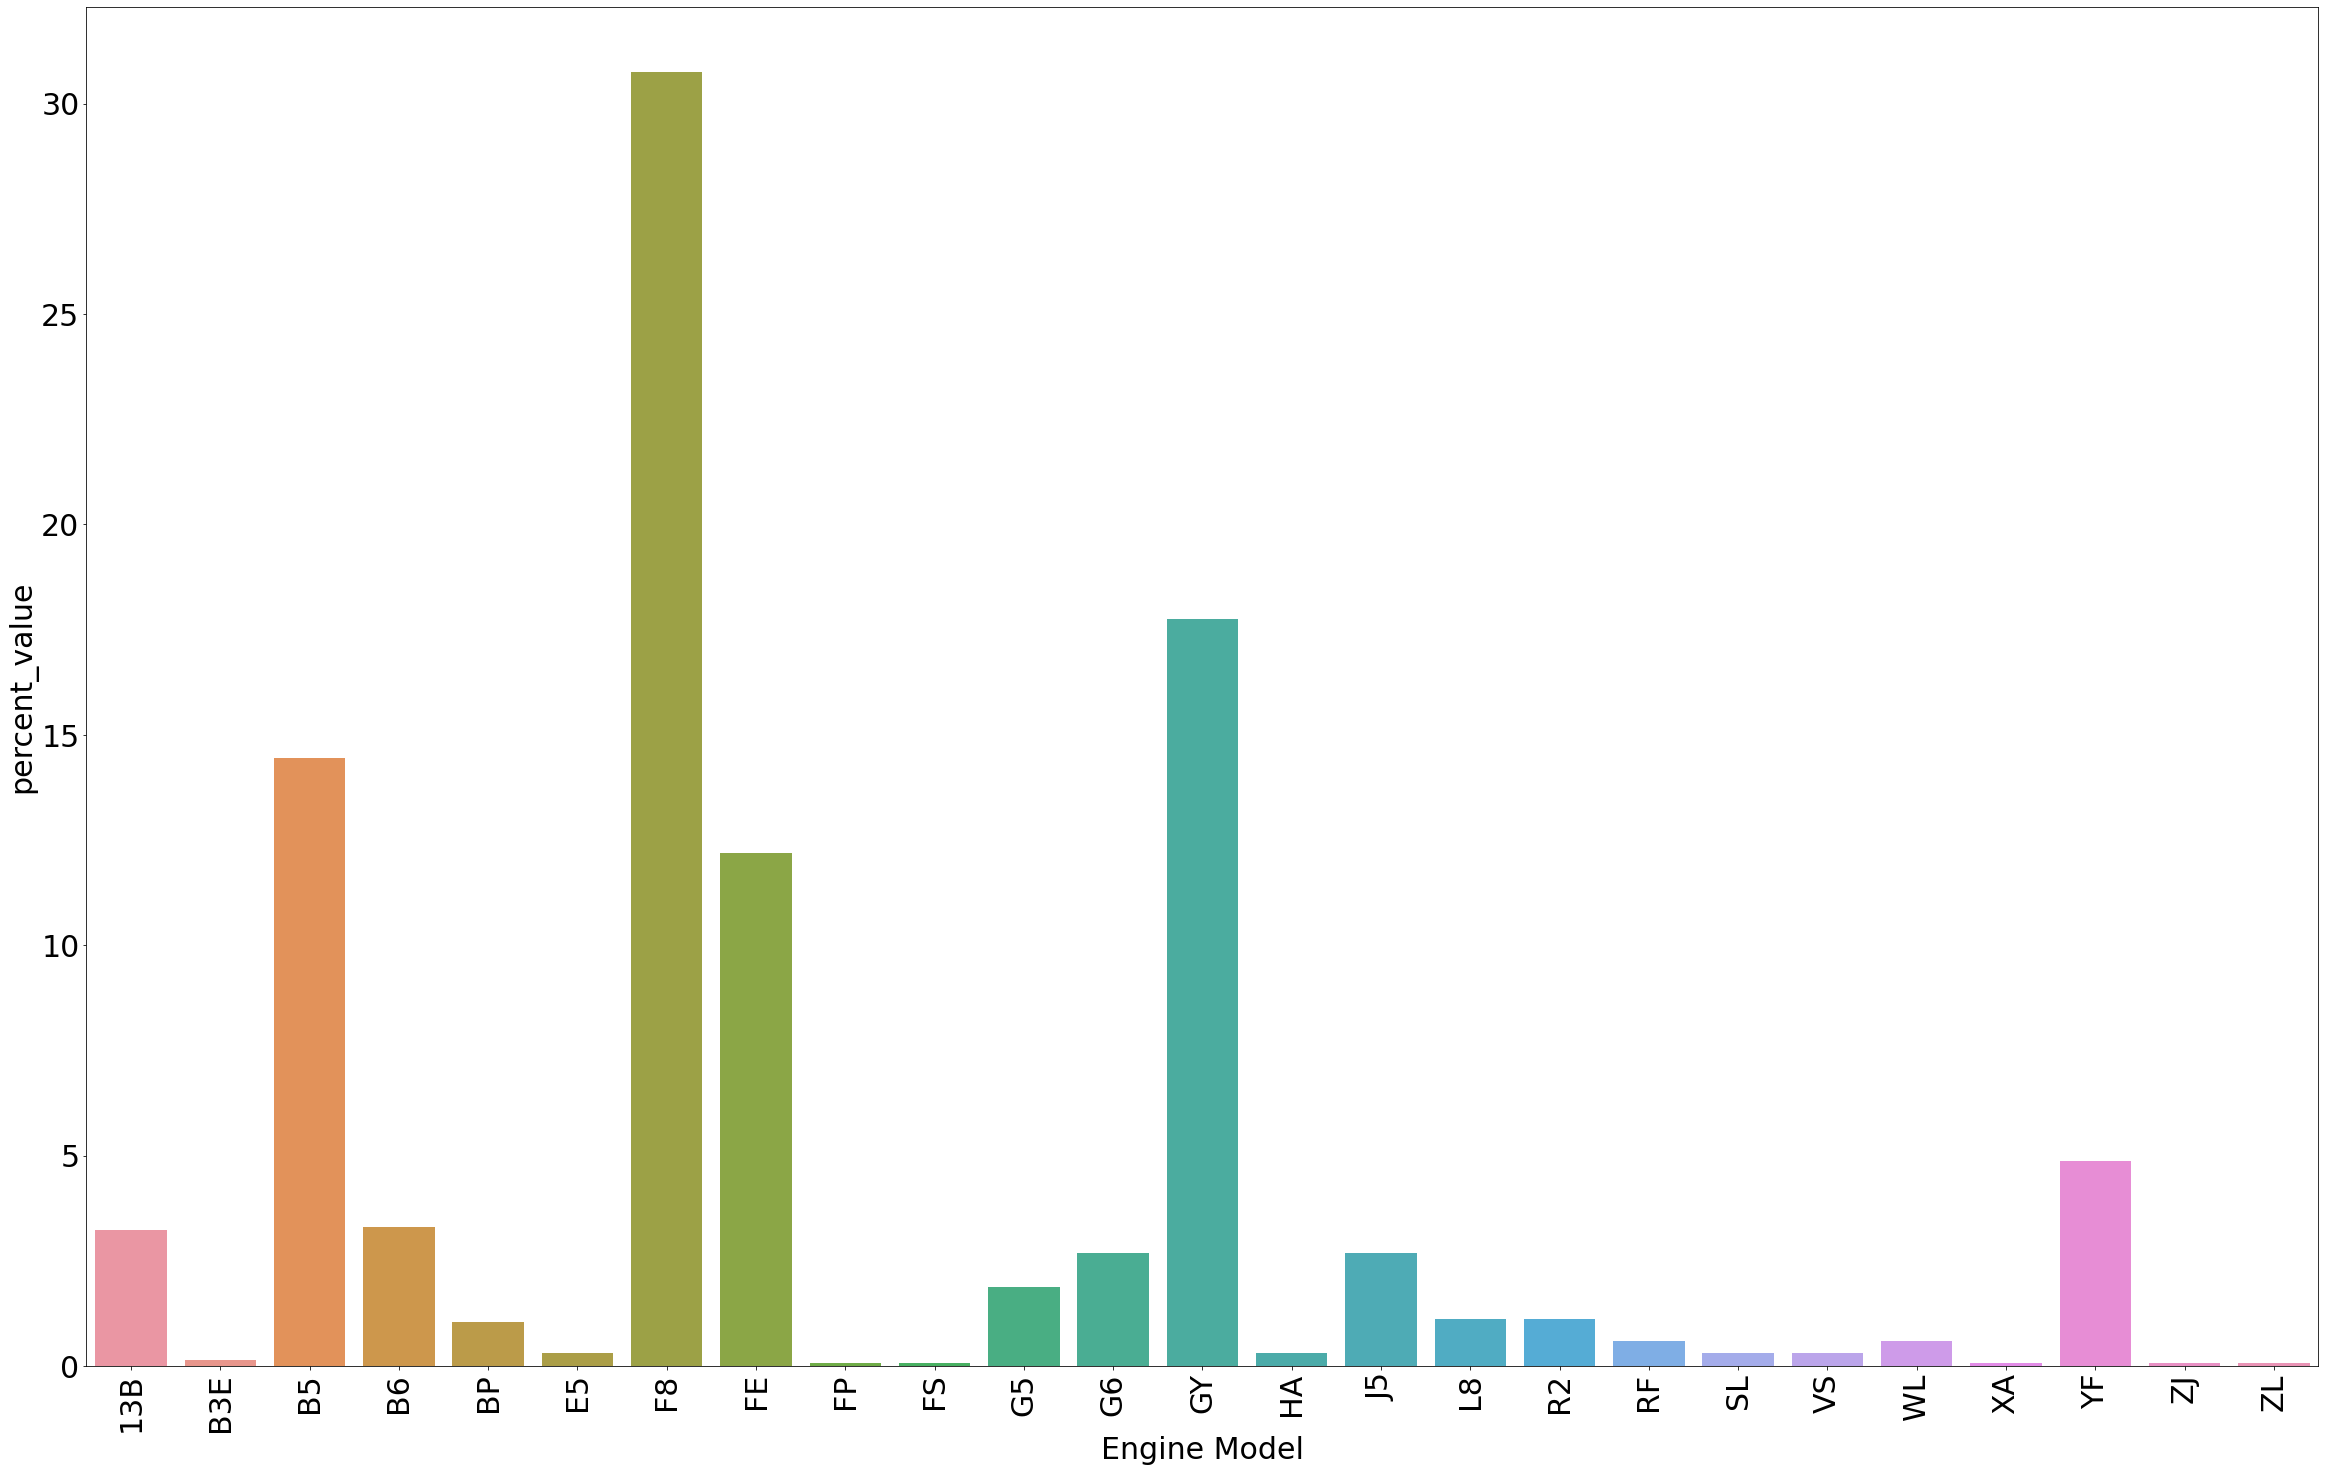

In [365]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Mitsubishi

In [8]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('MITSUBISHI')]
df_toyota

Register Date     HS Code  \
8         2018-01-01  8407343009   
12        2018-01-01  8407343009   
13        2018-01-01  8407343009   
22        2018-01-01  8407343009   
28        2018-01-01  8407343009   
...              ...         ...   
100519    2016-12-01  8407343009   
100522    2016-12-01  8407343009   
100524    2016-12-01  8407343009   
100525    2016-12-01  8407343009   
100527    2016-12-01  8407343009   

                                      Product Description  \
8       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
12      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
13      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
22      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
28      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100519  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100522  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100524  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100525  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100527  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                         Producer  \
8                               SUBARU,MITSUBISHI   
12                         MITSUBISHI CORPORATION   
13                                     MITSUBISHI   
22                                     MITSUBISHI   
28                                     MITSUBISHI   
...                                           ...   
100519                          SUBARU,MITSUBISHI   
100522  TOYOTA, NISSAN, SUBARU, MITSUBISHI, HONDA   
100524              MITSUBISHI MOTORS CORPORATION   
100525              MITSUBISHI MOTORS CORPORATION   
100527                                MITSUBISHI    

                                            Brand Place of Receipt  \
8                               SUBARU,MITSUBISHI      ВЛАДИВОСТОК   
12                                     MITSUBISHI       ТОЯМАШИНКО   
13                                     MITSUBISHI            НАГОЯ   
22                                     MITSUBISHI      ВЛАДИВОСТОК   
28                                     MITSUBISHI      ВЛАДИВОСТОК   
...                                           ...              ...   
100519                          SUBARU,MITSUBISHI      ВЛАДИВОСТОК   
100522  TOYOTA, NISSAN, SUBARU, MITSUBISHI, HONDA      ВЛАДИВОСТОК   
100524                                 MITSUBISHI      ВЛАДИВОСТОК   
100525                                 MITSUBISHI      ВЛАДИВОСТОК   
100527                                 MITSUBISHI      ВЛАДИВОСТОК   

       Country of Origin Country of Sales                      Shipper   \
8         JP, JPN, Japan   JP, JPN, Japan          WAKE CORPORATION LTD   
12        JP, JPN, Japan   JP, JPN, Japan         KAIHO SANGYO CO., LTD   
13        JP, JPN, Japan   JP, JPN, Japan            FRIEND SHOJI, INC.   
22        JP, JPN, Japan   JP, JPN, Japan                JAPROS CO.,LTD   
28        JP, JPN, Japan   JP, JPN, Japan                 SAKODA SHOTEN   
...                  ...              ...                           ...   
100519    JP, JPN, Japan   JP, JPN, Japan       ALLIANCE GROUP CO.,LTD    
100522    JP, JPN, Japan   JP, JPN, Japan  CAR EXPORT SERVICE CO., LTD.   
100524    JP, JPN, Japan   JP, JPN, Japan        KAIHO SANGYO CO., LTD.   
100525    JP, JPN, Japan   JP, JPN, Japan        KAIHO SANGYO CO., LTD.   
100527    JP, JPN, Japan   JP, JPN, Japan            INNEX CORPORATION    

                                          Shipper Address  ...  \
8                     , , ОКАЙЯМА, ЙОНЕГУРА, МИНАМИКУ, 86  ...   
12      920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...   
13      452-0814, NISHIKU, NAGOYA, TATSUMIDO BLDG 3F M...  ...   
22      957-0127, JAPAN, OOAZA, KITAKANBARA-GUN, SEIRO...  ...   
28      , KANAGAWA-PREF, YOKOGAMA-SHI, TOKAICHIBA -CHO...  ...   
...                                                   ...  ...   


In [367]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['4G15-BQ1218'],
 ['6G72-OY2254', '6G72-RX1617'],
 ['4A90-00'],
 ['4G69-GJ'],
 ['4A90-00'],
 ['4G15-BK4045'],
 ['4G94-QR9809'],
 ['6G74-QA0269'],
 ['4B12-AK9786'],
 ['4G93-HR5434'],
 ['4G13-YS5798', '4G15-AJ9292'],
 ['4G64-DQ6363'],
 ['6G72-CM9684'],
 ['4D56-FP1896'],
 ['4D56-FC4075'],
 ['4M41-HA7409'],
 ['4B12-AY0719'],
 ['4G64-RU1236', '4G94-RD3027'],
 ['4G63-SA6739'],
 ['4G63-BM5614'],
 ['4G64-XY9454'],
 ['4G64-DQ6683'],
 ['4G64-BL7917'],
 ['4G64-DX6423'],
 ['4G69-KL0127'],
 ['4G93-KJ1748'],
 ['4G93-PA3514'],
 ['4G93-NS4542'],
 ['4A30-852427', '4G64-DC4045'],
 ['4B12-AB7052', '4B12-AB8736'],
 ['4G63-HR5035', '4G63-AB2350'],
 ['4G63-LK0016', '4G94-RA1468'],
 ['6G72-OX0413'],
 ['4D56-CFK8885'],
 ['4D56-FB9191'],
 ['4D56-KX2995'],
 ['4D56-FK1442'],
 ['4D56-EM8814'],
 ['4G93-LG5483'],
 ['4G15-HJ5627'],
 ['4B12-AB7839', '4B12-AA1215', '4B12-AD2944', '4G63-BQ6301', '6G74-KK9491'],
 ['4A31-559912', '4B12-A01982'],
 ['4B11-BC0874'],
 ['4A90-0041920', '4A91-0158672'],
 ['4G15-DX'],
 ['4B11-

In [368]:
len(list_all_engine_model_toyota_GTO_JP_filter)

4826

In [369]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [370]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0            4G15
1            6G72
2            6G72
3            4A90
4            4G69
...           ...
8931         4G15
8932         4G63
8933         6G74
8934         4G15
8935         4G93

[8936 rows x 1 columns]

In [371]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          3G83     30           0.34
1          4A30     56           0.63
2          4A31    144           1.61
3          4A90    110           1.23
4          4A91    239           2.67
5          4B10     45           0.50
6          4B11    158           1.77
7          4B12    244           2.73
8          4D32      2           0.02
9          4D36      1           0.01
10         4D56     21           0.24
11         4D68      7           0.08
12         4DR5      1           0.01
13         4G13    221           2.47
14         4G15   1147          12.84
15         4G63   1140          12.76
16         4G64    986          11.03
17         4G67      7           0.08
18         4G69    183           2.05
19         4G91     35           0.39
20         4G92     17           0.19
21         4G93   1618          18.11
22         4G94    387           4.33
23         4J10      3           0.03
24         4J11      1           0.01
25         4M40     15           0.17
26         4M41      3           0.03
27         6A10      1           0.01
28         6A11     14           0.16
29         6A12     67           0.75
30         6A13    211           2.36
31         6B31     12           0.13
32         6G72    834           9.33
33         6G73    217           2.43
34         6G74    757           8.47
35           L8      2           0.02

In [372]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
21         4G93   1618          18.11
14         4G15   1147          12.84
15         4G63   1140          12.76
16         4G64    986          11.03
32         6G72    834           9.33

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

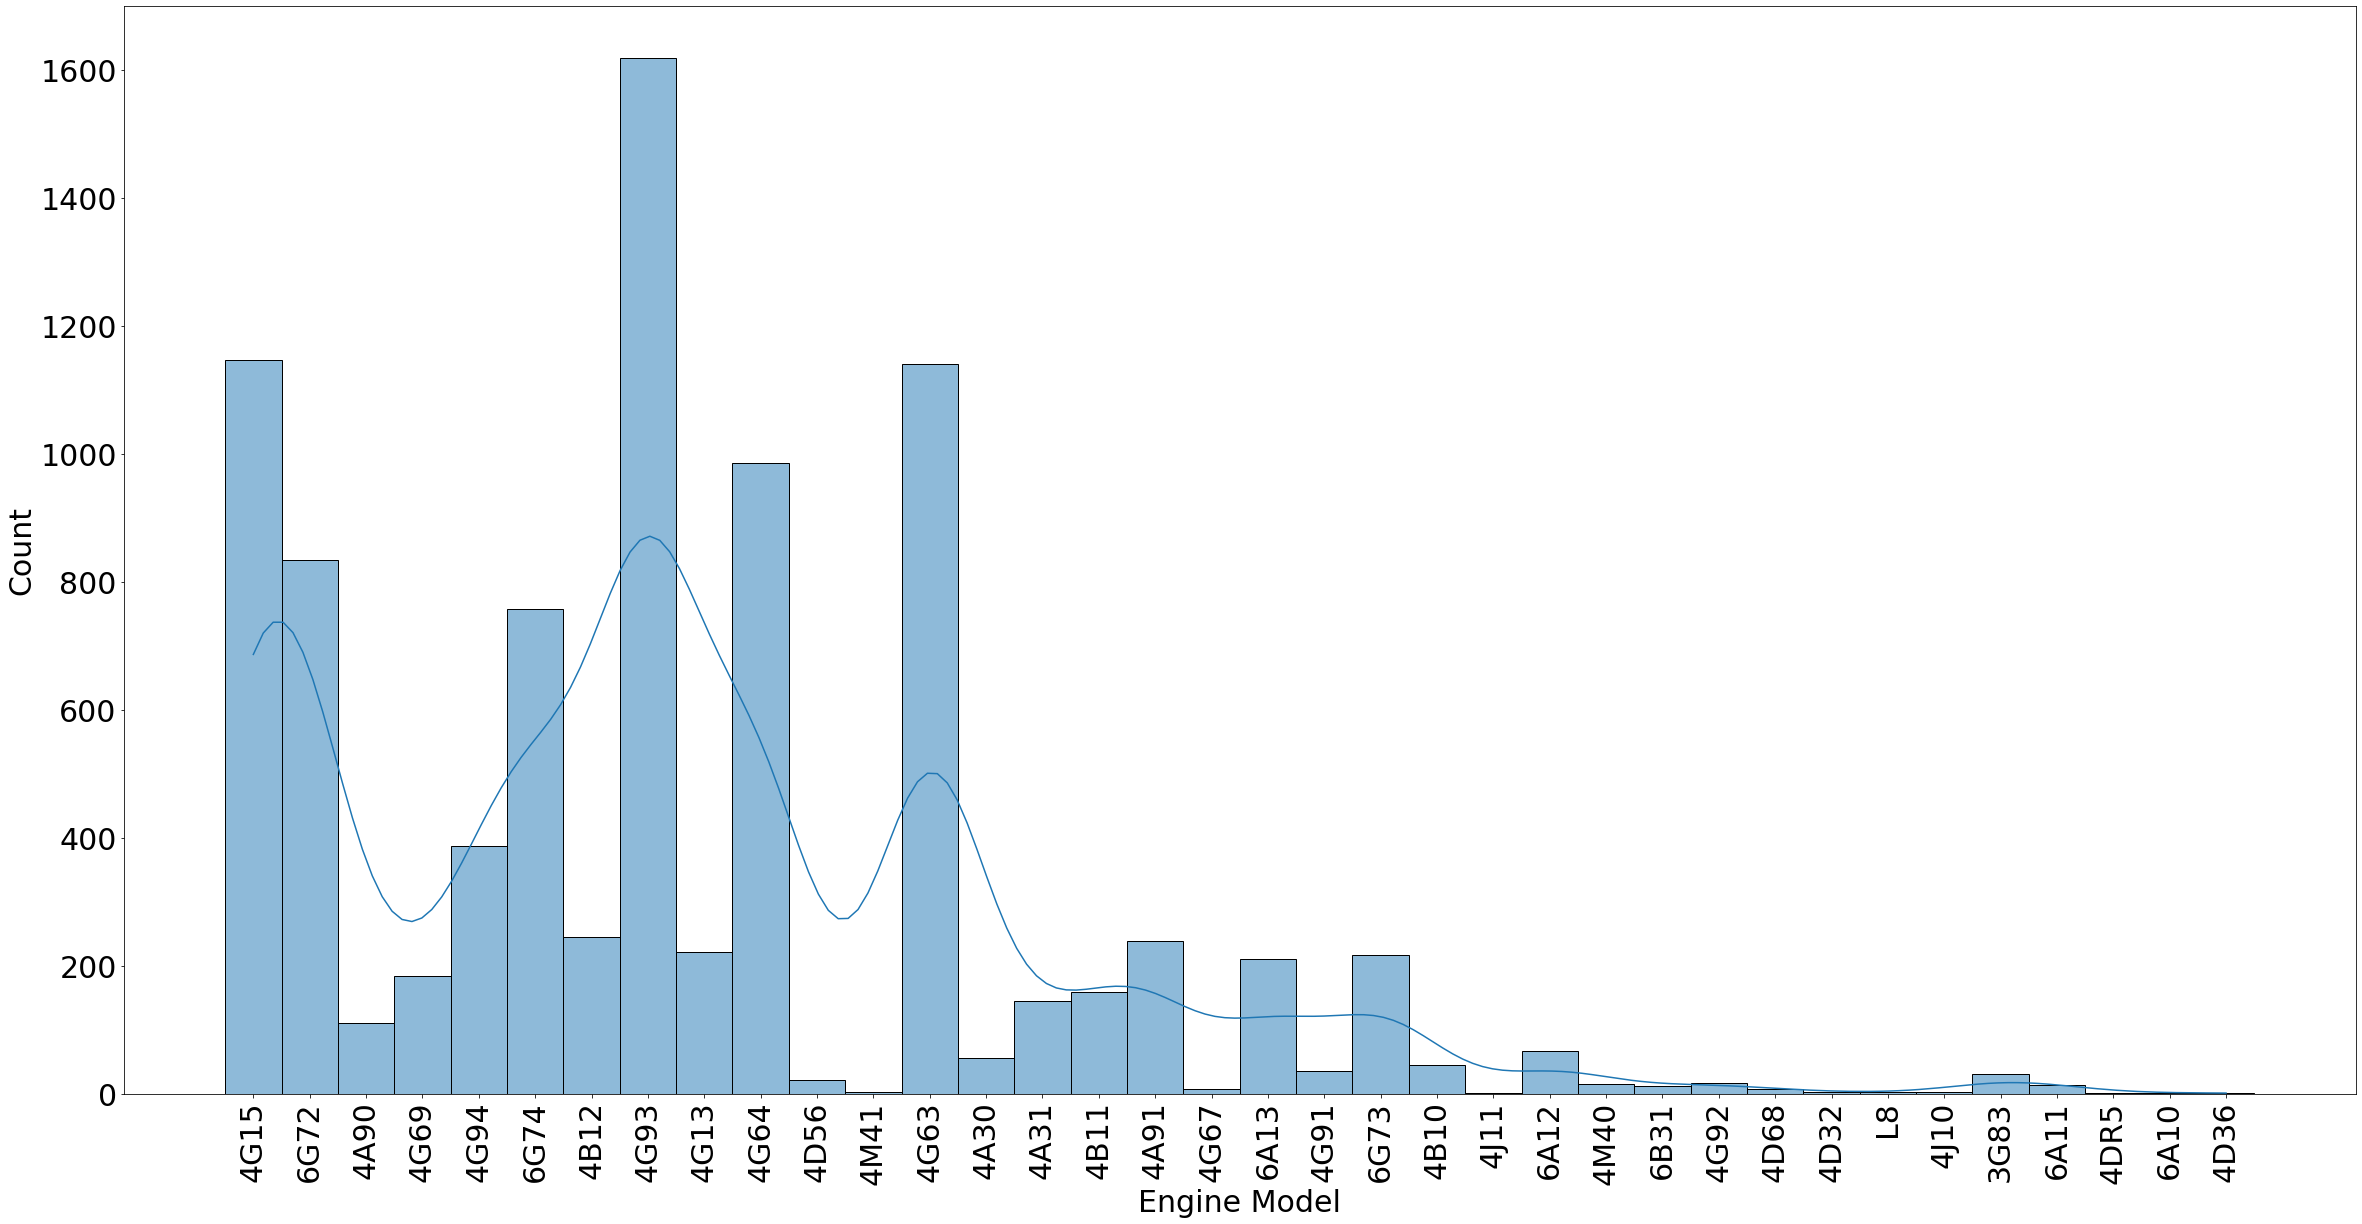

In [373]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

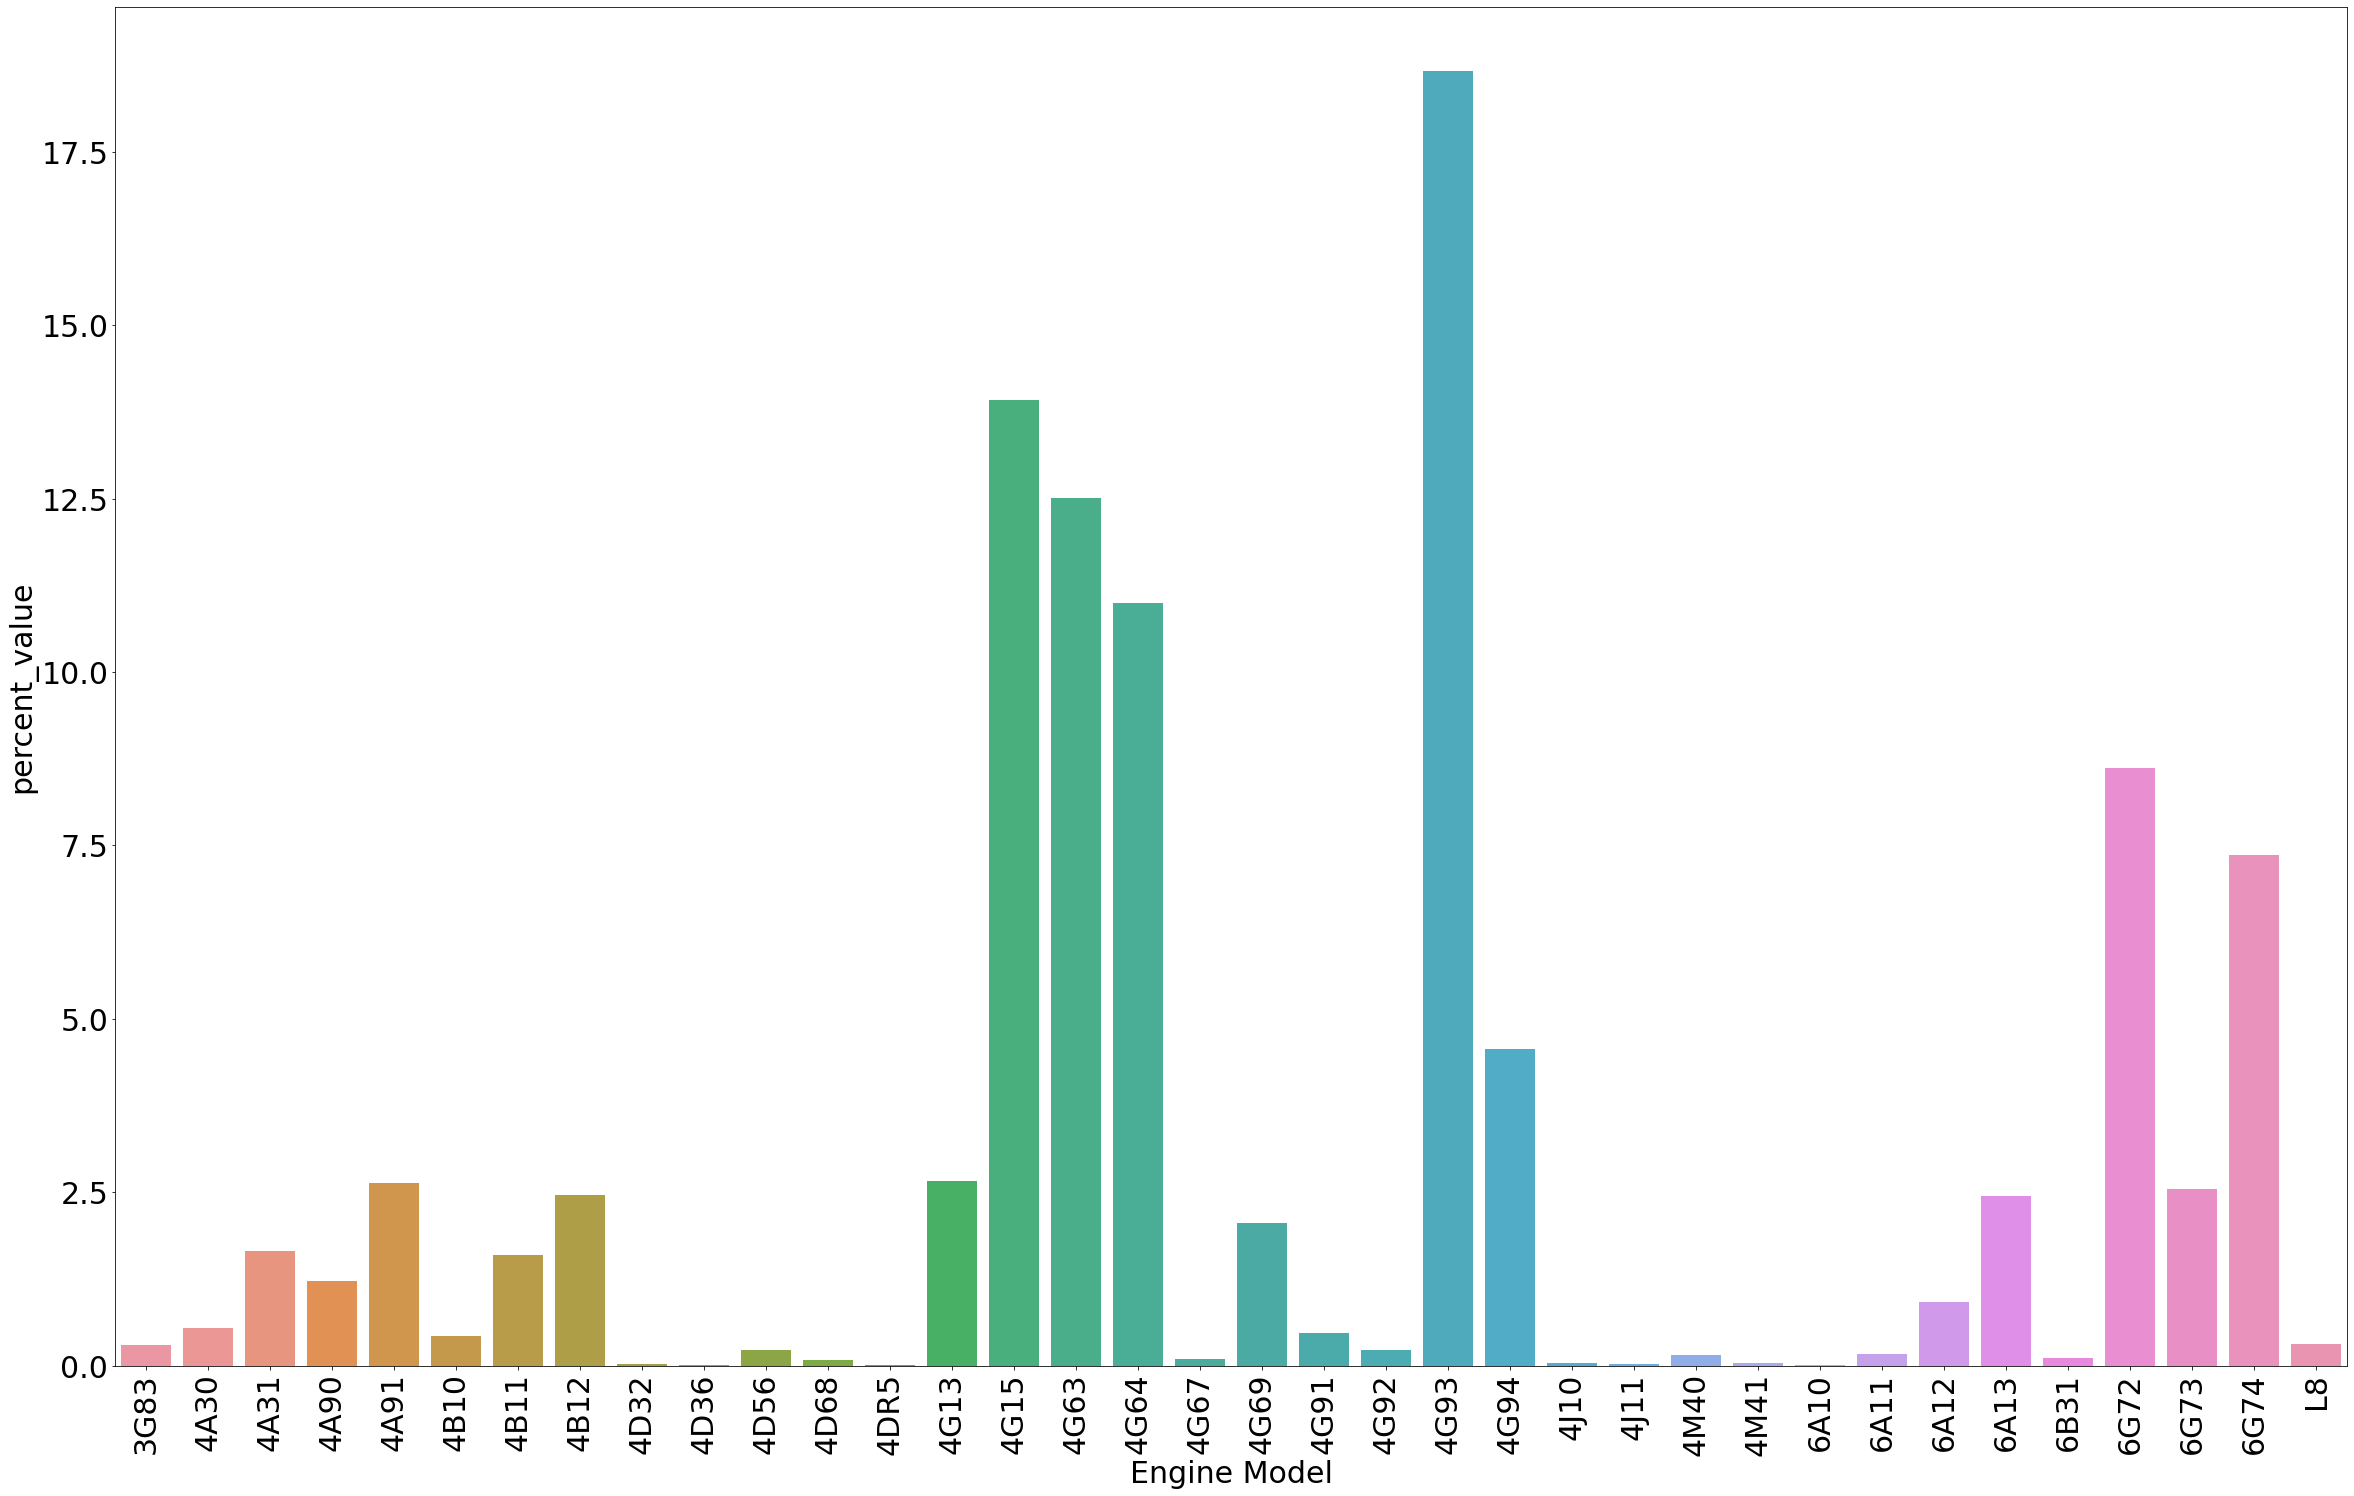

In [66]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Honda

In [9]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('HONDA')]
df_toyota

Register Date     HS Code  \
9         2018-01-01  8407343009   
23        2018-01-01  8407343009   
32        2018-01-01  8407343009   
38        2018-01-01  8407343009   
39        2018-01-01  8407343009   
...              ...         ...   
100536    2016-12-01  8407343009   
100537    2016-12-01  8407343009   
100539    2016-12-01  8407343009   
100540    2016-12-01  8407343009   
100542    2016-12-01  8407343009   

                                      Product Description  \
9       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
23      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
32      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
38      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
39      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100536  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100537  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100539  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100540  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100542  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                            Producer   Brand Place of Receipt  \
9                                              HONDA   HONDA      ВЛАДИВОСТОК   
23                                             HONDA   HONDA      ВЛАДИВОСТОК   
32                                             HONDA   HONDA      ВЛАДИВОСТОК   
38                                             HONDA   HONDA      ВЛАДИВОСТОК   
39      TOYOTA,NISSAN,MITSUBISHI,HONDA,SUBARU,SUZUKI  TOYOTA      ВЛАДИВОСТОК   
...                                              ...     ...              ...   
100536                               HONDA MOTOR CO.   HONDA        ВОСТОЧНЫЙ   
100537                               HONDA MOTOR CO.   HONDA        ВОСТОЧНЫЙ   
100539                           HONDA MOTOR CO. LTD   HONDA        ВОСТОЧНЫЙ   
100540                       HONDA MOTOR CORPORATION   HONDA        ВОСТОЧНЫЙ   
100542                               HONDA MOTOR CO.   HONDA        ВОСТОЧНЫЙ   

       Country of Origin Country of Sales  \
9         JP, JPN, Japan   JP, JPN, Japan   
23        JP, JPN, Japan   JP, JPN, Japan   
32        JP, JPN, Japan   JP, JPN, Japan   
38        JP, JPN, Japan   JP, JPN, Japan   
39        JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
100536    JP, JPN, Japan   JP, JPN, Japan   
100537    JP, JPN, Japan   JP, JPN, Japan   
100539    JP, JPN, Japan   JP, JPN, Japan   
100540    JP, JPN, Japan   JP, JPN, Japan   
100542    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
9                                  LEATEX CORPORATION LTD   
23                                MITAMURA KOGYO CO., LTD   
32                                        ASTRADE CO.,LTD   
38                                 HANATO SHOKAI CO., LTD   
39                              ITAMI AUTOMOBILE CO., LTD   
...                                                   ...   
100536                                   TRIDENT CO., LTD   
100537                            SHINSHIN TOKYO CO., LTD   
100539                                      SHIJO TRADING   
100540  EAST-JAPAN RECYCLING RESOURCES CO.,LTD 21-1 SH...   
100542                               KAIHO SANGYO CO.,LTD   

                                          Shipper Address  ...  \
9       , AKITA, AKITA-CITY, HAMADA SHIMOHAMAKATSURANE...  ...   
23                 , FUKUI PREF, SHIMOARAI, 1-5 SHIMOARAI  ...   
32                 , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
38              668-0875, HYOGO, TOYOOKA CITY, 777 YURUJI  ...   
39              , KITAHIROSHIMA, HOKKAIDO, NO. 630 WATTSU  ...   
...                                                   ...  ...   
100536  OSAKA CITY 702-30-20 YOSHINO,OSAKA-FU FUKUSHIM...  ...   
100537                       TOKYO 1-32-12 OUGI ADACHI-KU  ...   


In [375]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['F20B-2703685'],
 ['B20B-7102378', 'J35A-7010456'],
 ['K20A-2466554'],
 ['K20A-2255933'],
 ['L15A-5510857'],
 ['D17A-2279233', 'F22B-3217727', 'K24A-5526', 'L13A-1290310'],
 ['F23A-3012516', 'K20A-2489187', 'K24A-6009617', 'L15A-2059372'],
 ['F23A-2231864'],
 ['F23A-2257262'],
 ['B20B-5258173', 'R18A-1777997'],
 ['K24A-3311764'],
 ['L13A-2355073'],
 ['D16A-1705993', 'D16A-9202779', 'D17A-2062848'],
 ['D17A-2056246',
  'F20B-2001992',
  'F23A-2202721',
  'K20A-2107279',
  'L13A-1801007'],
 ['L13A-4068842'],
 ['K20A-2315960',
  'K20A-2314026',
  'K20A-2756425',
  'L13A-2152201',
  'L13A-2284566',
  'L15A-2161939'],
 ['LEA-MF6'],
 ['L13A-1590280', 'L13A-2362035'],
 ['D15B-9017709'],
 ['F23A-3006316'],
 ['B20B-7156212'],
 ['B20B-3545215'],
 ['B20B-3226138'],
 ['D13B-6237851'],
 ['L13A-2372523'],
 ['F18B-2031193', 'K24A-7206195'],
 ['F22B-2042181'],
 ['F23A-1086266',
  'J30A-4502703',
  'K20A-2071977',
  'K20A-2839722',
  'L15A-5046178'],
 ['F23A-3007440'],
 ['G20A-2011280'],
 ['B20B-3080

In [376]:
len(list_all_engine_model_toyota_GTO_JP_filter)

7001

In [377]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [378]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0             F20B
1             B20B
2             J35A
3             K20A
4             K20A
...            ...
22118         B20B
22119         D16A
22120         G20A
22121         L15A
22122         B20B

[22123 rows x 1 columns]

In [379]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          A18A      2           0.01
1          A20A      1           0.00
2          B16A     23           0.10
3          B16B      6           0.03
4          B18B     56           0.25
5          B18C     15           0.07
6          B20B   3566          16.12
7          C32A     20           0.09
8          C35A     36           0.16
9          D13B    598           2.70
10         D15B   2135           9.65
11         D16A   1728           7.81
12         D17A   1529           6.91
13         E07A      1           0.00
14         E07Z      2           0.01
15         F18A     19           0.09
16         F18B    534           2.41
17         F20A     34           0.15
18         F20B   1138           5.14
19         F22A      7           0.03
20         F22B    507           2.29
21         F23A   2214          10.01
22         G20A    299           1.35
23         G25A    306           1.38
24         H22A    117           0.53
25         H23A    316           1.43
26         J25A    267           1.21
27         J30A    322           1.46
28         J32A    106           0.48
29         J35A    111           0.50
30         K20A   1370           6.19
31         K20B     21           0.09
32         K24A    756           3.42
33         L13A   2053           9.28
34         L15A   1090           4.93
35          LDA    109           0.49
36          LEA     17           0.08
37          LEB     15           0.07
38          LFA      1           0.00
39         R18A    132           0.60
40         R20A     90           0.41
41         S07A      1           0.00
42           ZC    453           2.05

In [380]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
6          B20B   3566          16.12
21         F23A   2214          10.01
10         D15B   2135           9.65
33         L13A   2053           9.28
11         D16A   1728           7.81

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

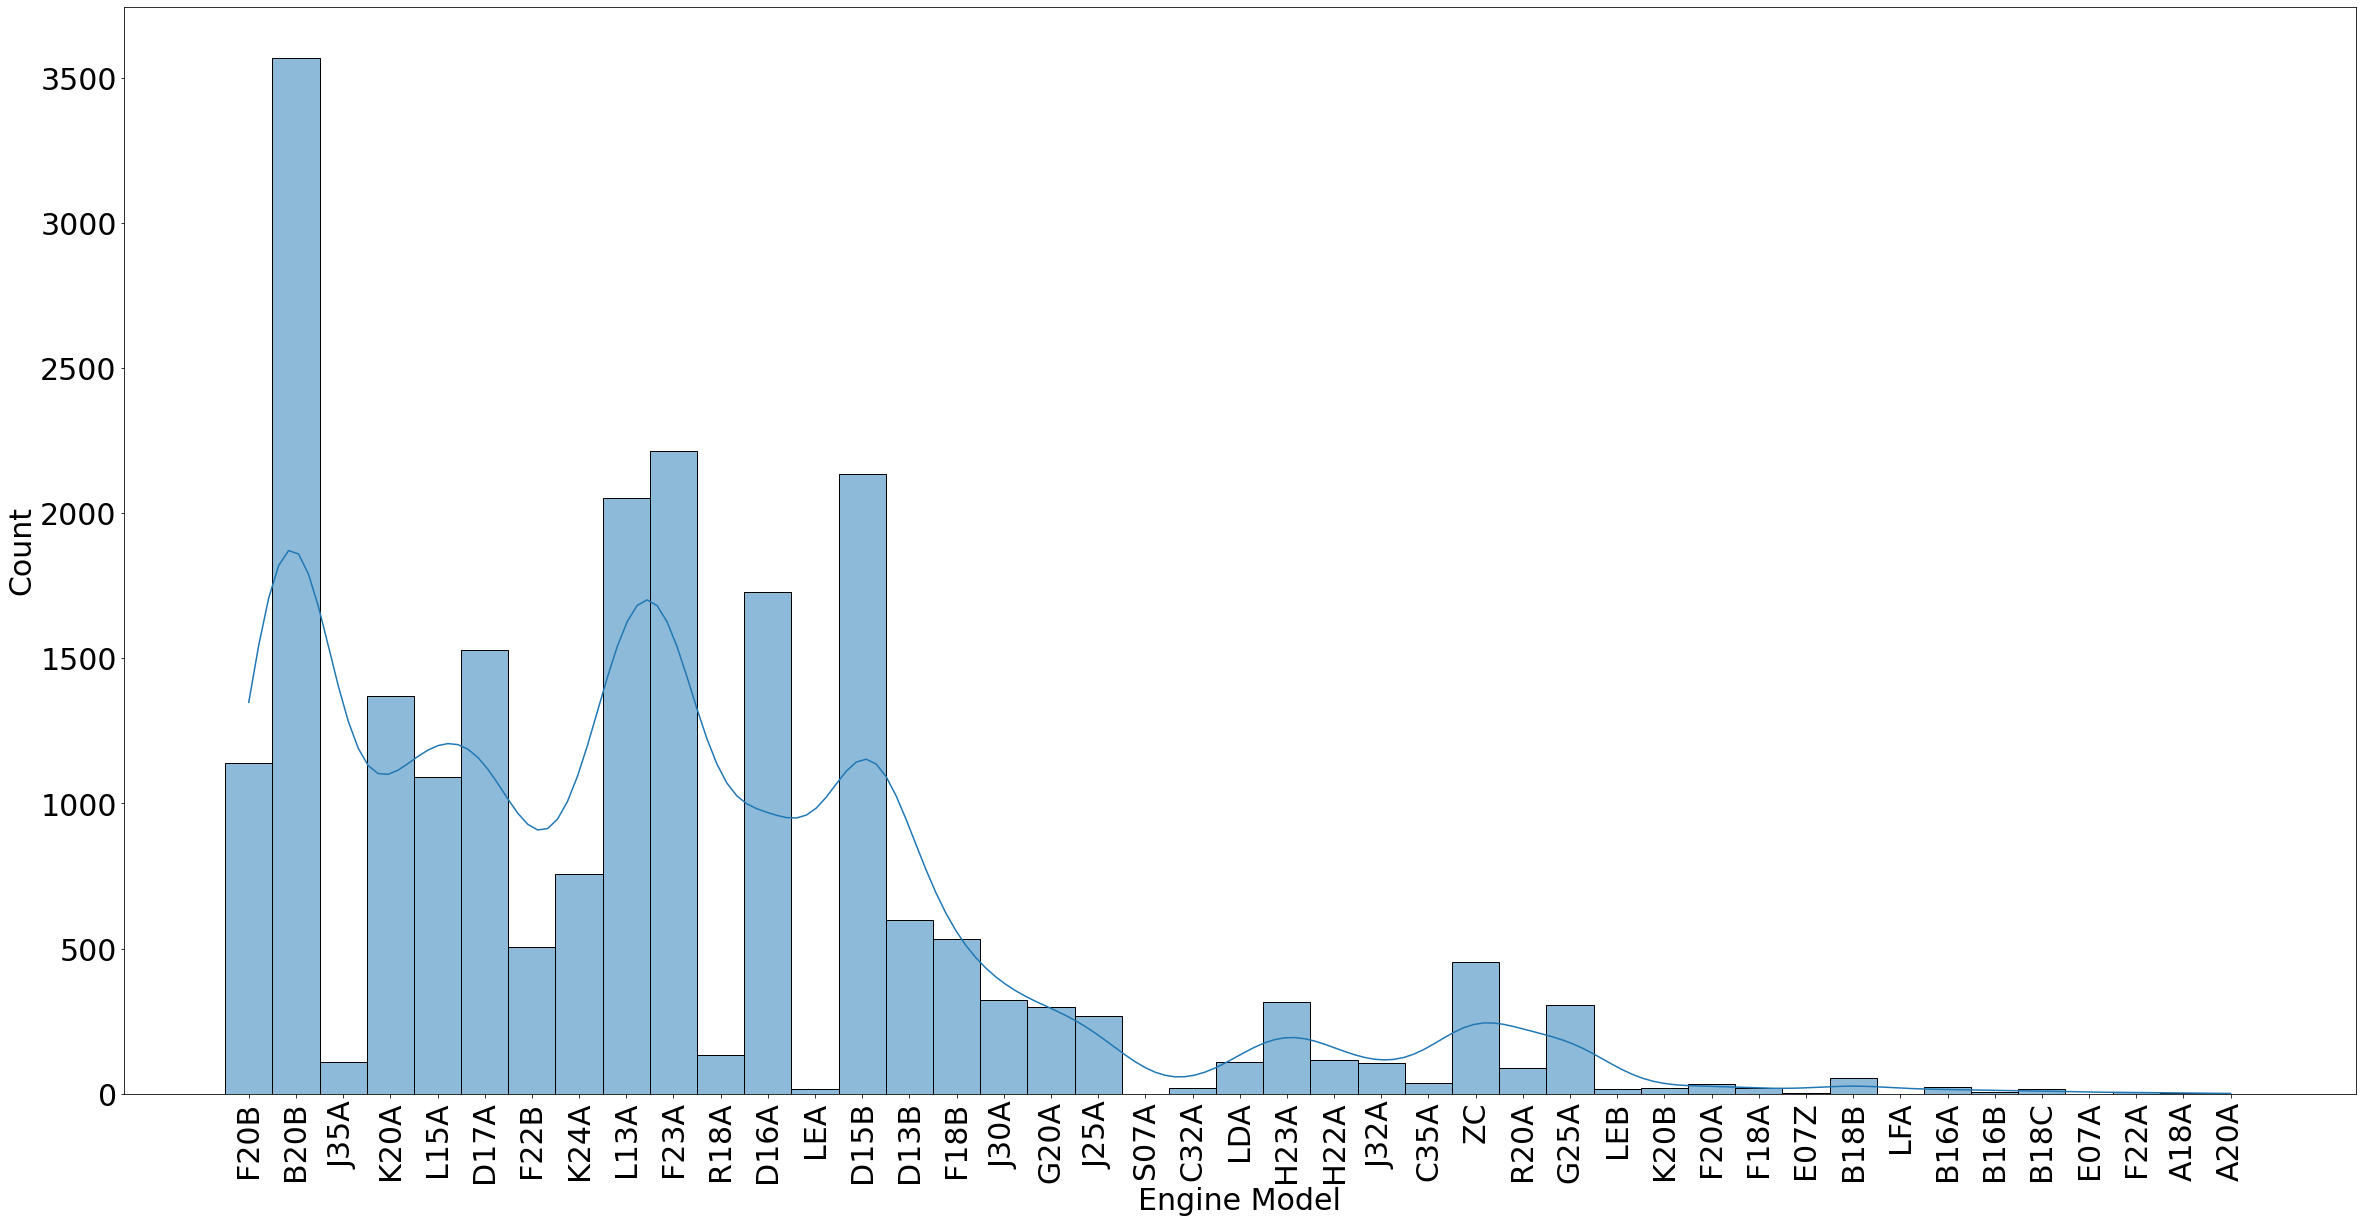

In [381]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

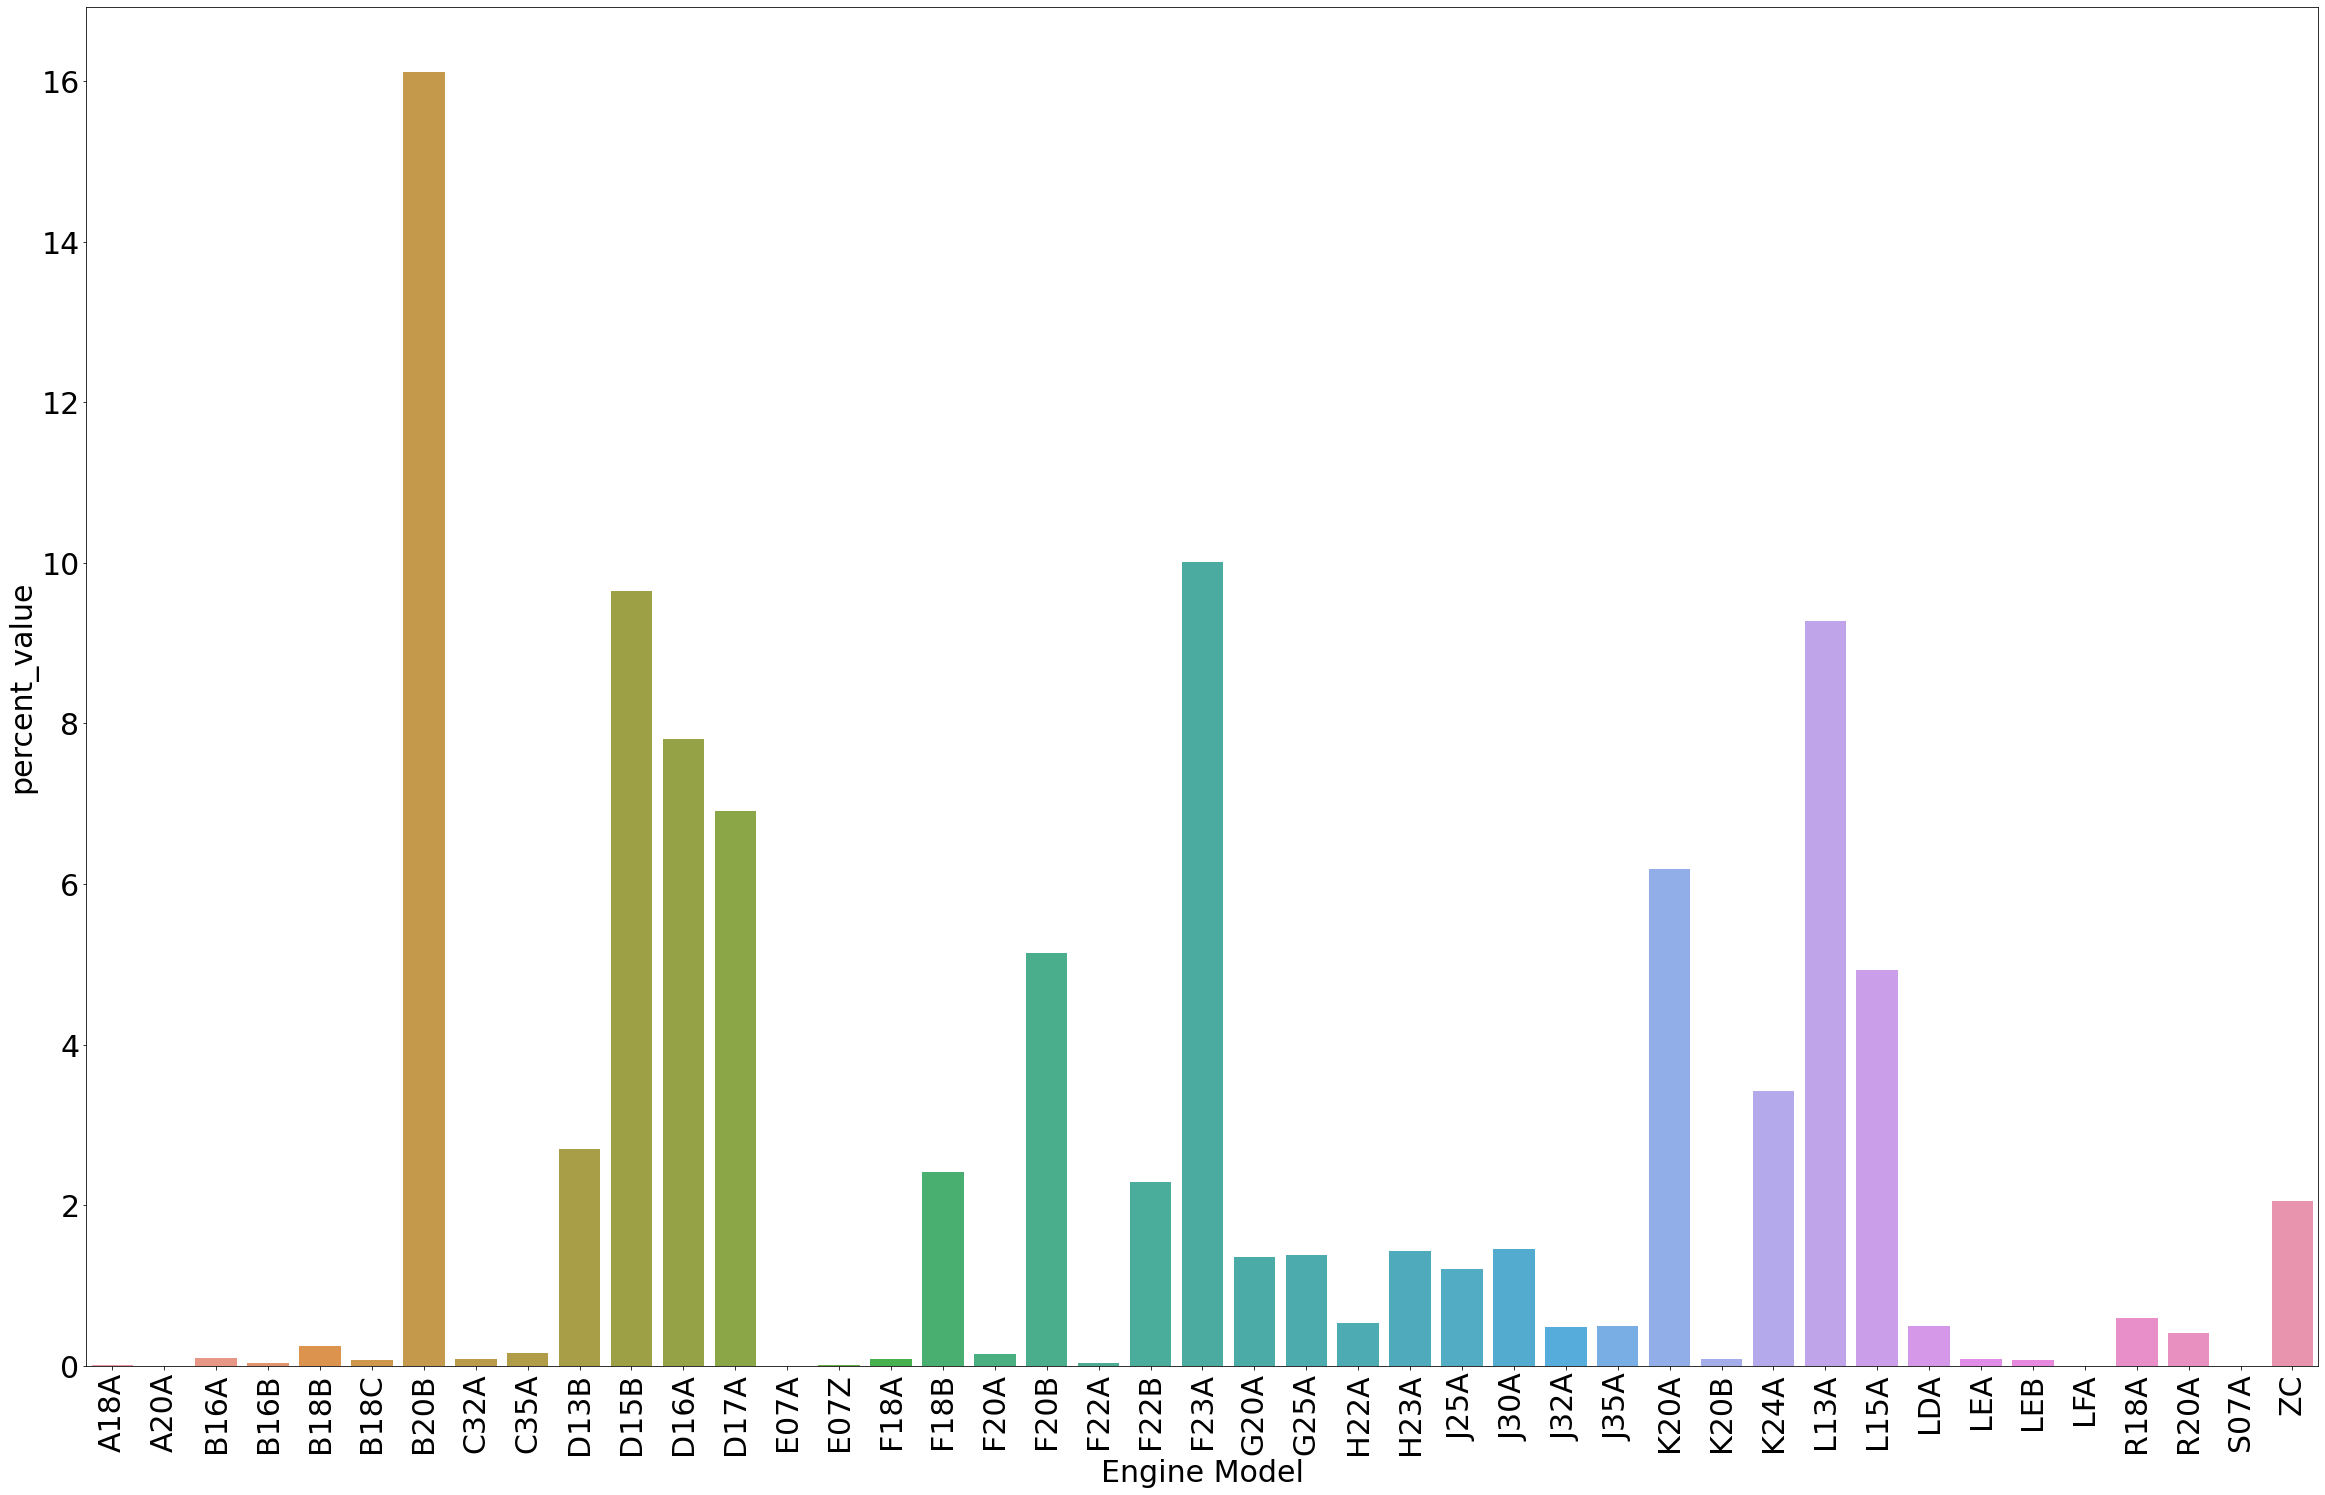

In [382]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Nissan

In [10]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('NISSAN')]
df_toyota

Register Date     HS Code  \
5         2018-01-01  8407343009   
14        2018-01-01  8407343009   
36        2018-01-01  8407343009   
39        2018-01-01  8407343009   
42        2018-01-01  8407343009   
...              ...         ...   
100411    2016-12-01  8407343009   
100479    2016-12-01  8407343009   
100520    2016-12-01  8407343009   
100522    2016-12-01  8407343009   
100531    2016-12-01  8407343009   

                                      Product Description  \
5       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
14      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
36      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
39      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
42      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100411  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100479  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100520  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100522  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100531  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                            Producer  \
5                           NISSAN MOTOR CORPORATION   
14                            NISSAN MOTOR CO., LTD.   
36                                            NISSAN   
39      TOYOTA,NISSAN,MITSUBISHI,HONDA,SUBARU,SUZUKI   
42                                            NISSAN   
...                                              ...   
100411                                        NISSAN   
100479                                        NISSAN   
100520                           NISSAN MOTOR CORP.    
100522     TOYOTA, NISSAN, SUBARU, MITSUBISHI, HONDA   
100531                                        NISSAN   

                                            Brand Place of Receipt  \
5                                          NISSAN      ВЛАДИВОСТОК   
14                                         NISSAN      ВЛАДИВОСТОК   
36                                         NISSAN      ВЛАДИВОСТОК   
39                                         TOYOTA      ВЛАДИВОСТОК   
42                                         NISSAN      ВЛАДИВОСТОК   
...                                           ...              ...   
100411                                     NISSAN      ВЛАДИВОСТОК   
100479                                     NISSAN           МОСКВА   
100520                                     NISSAN      ВЛАДИВОСТОК   
100522  TOYOTA, NISSAN, SUBARU, MITSUBISHI, HONDA      ВЛАДИВОСТОК   
100531                                     NISSAN      ВЛАДИВОСТОК   

       Country of Origin Country of Sales                        Shipper   \
5         JP, JPN, Japan   JP, JPN, Japan              TOP MOTORS COMPANY   
14        JP, JPN, Japan   JP, JPN, Japan            WAKE CORPORATION LTD   
36        JP, JPN, Japan   JP, JPN, Japan                 ASTRADE CO.,LTD   
39        JP, JPN, Japan   JP, JPN, Japan       ITAMI AUTOMOBILE CO., LTD   
42        JP, JPN, Japan   JP, JPN, Japan                 ASTRADE CO.,LTD   
...                  ...              ...                             ...   
100411    JP, JPN, Japan   JP, JPN, Japan  KNOT GLOBAL HOLDINGS CO., LTD.   
100479    JP, JPN, Japan   JP, JPN, Japan                 D-JAPAN CO.,LTD   
100520    JP, JPN, Japan   JP, JPN, Japan                 HIRANUMASHOKAI    
100522    JP, JPN, Japan   JP, JPN, Japan    CAR EXPORT SERVICE CO., LTD.   
100531    JP, JPN, Japan   JP, JPN, Japan     SANKYO INTERNATIONAL CORP.    

                                          Shipper Address  ...  \
5       , TOYAMA-SHI, TOYAMA-KEN, 4-2-76 MUKAISHINJOU ...  ...   
14                    , , ОКАЙЯМА, ЙОНЕГУРА, МИНАМИКУ, 86  ...   
36                 , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
39              , KITAHIROSHIMA, HOKKAIDO, NO. 630 WATTSU  ...   
42                 , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
...   

In [384]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['Z16-083719'],
 ['QR20DE-514888A'],
 ['QG18DE-232084A'],
 ['CD20-620184X'],
 ['MR20DE-765653A', 'VQ25DE-361458A'],
 ['MR20DE-040602A', 'QR20DE-325617A'],
 ['QG15DE-437112A', 'QG18DE-204079B'],
 ['CR12DE-349695', 'SR20DE-289838B'],
 ['TD27-233915'],
 ['RB20-27'],
 ['RB20-072883B'],
 ['QD32-004403T'],
 ['QD32-085246T'],
 ['Z16-726388X'],
 ['Z20-789977X'],
 ['KA24DE-1077550'],
 ['A15-S44963'],
 ['VQ20DE-186630A', 'VQ20DE-091864A'],
 ['RB20-191329B'],
 ['NA20-815642X'],
 ['Z20-Б'],
 ['NA20-828421X'],
 ['RB20-111333B'],
 ['RB20-712611X'],
 ['Z20-Б'],
 ['NA20-809845'],
 ['TD27-383808'],
 ['RB20-214019B'],
 ['RB20-219005B'],
 ['RB20-076053B'],
 ['RB20-176543B'],
 ['RB20-126956B'],
 ['RB20-211227B'],
 ['NA20-881013X'],
 ['NA16-013845'],
 ['RB20-209404B'],
 ['RB20-712945X'],
 ['RB20-165207B'],
 ['GA15DE-351931B',
  'QG15DE-495358A',
  'QG15DE-360040',
  'QG15DE-481815A',
  'QG15DE-231623B',
  'QG18DE-397556',
  'VQ20DE-224021A'],
 ['RB20-229334B'],
 ['NA16-008282'],
 ['RB20-214019B'],
 ['NA20

In [385]:
len(list_all_engine_model_toyota_GTO_JP_filter)

764

In [386]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [387]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0            Z16
1         QR20DE
2         QG18DE
3           CD20
4         MR20DE
..           ...
965       QG15DE
966       VQ20DE
967       VQ23DE
968       VK45DE
969         RB20

[970 rows x 1 columns]

In [388]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0           A14      1           0.10
1           A15     39           4.02
2          CD17      1           0.10
3          CD20     17           1.75
4        CG13DE      3           0.31
5        CGA3DE     12           1.24
6        CR12DE      9           0.93
7        CR14DE      4           0.41
8            D5     10           1.03
9          ED33      1           0.10
10         FD35      1           0.10
11          FE6      2           0.21
12       GA13DE      2           0.21
13       GA13DS      2           0.21
14       GA15DE      6           0.62
15      HR12DDR      1           0.10
16       HR15DE      6           0.62
17       HR16DE      1           0.10
18       KA20DE      1           0.10
19       KA24DE      2           0.21
20           L8     15           1.55
21       MR20DE     12           1.24
22         NA16     24           2.47
23         NA20    128          13.20
24           PF      1           0.10
25         QD32     15           1.55
26       QG13DE      2           0.21
27       QG15DE     31           3.20
28       QG18DE     10           1.03
29       QR20DD      7           0.72
30       QR20DE     18           1.86
31       QR25DD      2           0.21
32       QR25DE      1           0.10
33         RB20    453          46.70
34       RB20DE      3           0.31
35       SR18DE      4           0.41
36       SR20DE      6           0.62
37      SR20DET      1           0.10
38       SR20VE      1           0.10
39      SR20VET      1           0.10
40         TD27     22           2.27
41        VG30E      1           0.10
42        VG33E      2           0.21
43       VK45DD      2           0.21
44       VK45DE      1           0.10
45       VQ20DE     11           1.13
46       VQ23DE      8           0.82
47       VQ25DD      3           0.31
48       VQ25DE      2           0.21
49       VQ30DE      1           0.10
50       VQ35DE      5           0.52
51          Z16     23           2.37
52          Z18      4           0.41
53          Z20     28           2.89
54          Z24      1           0.10

In [389]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
33         RB20    453          46.70
23         NA20    128          13.20
1           A15     39           4.02
27       QG15DE     31           3.20
53          Z20     28           2.89

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

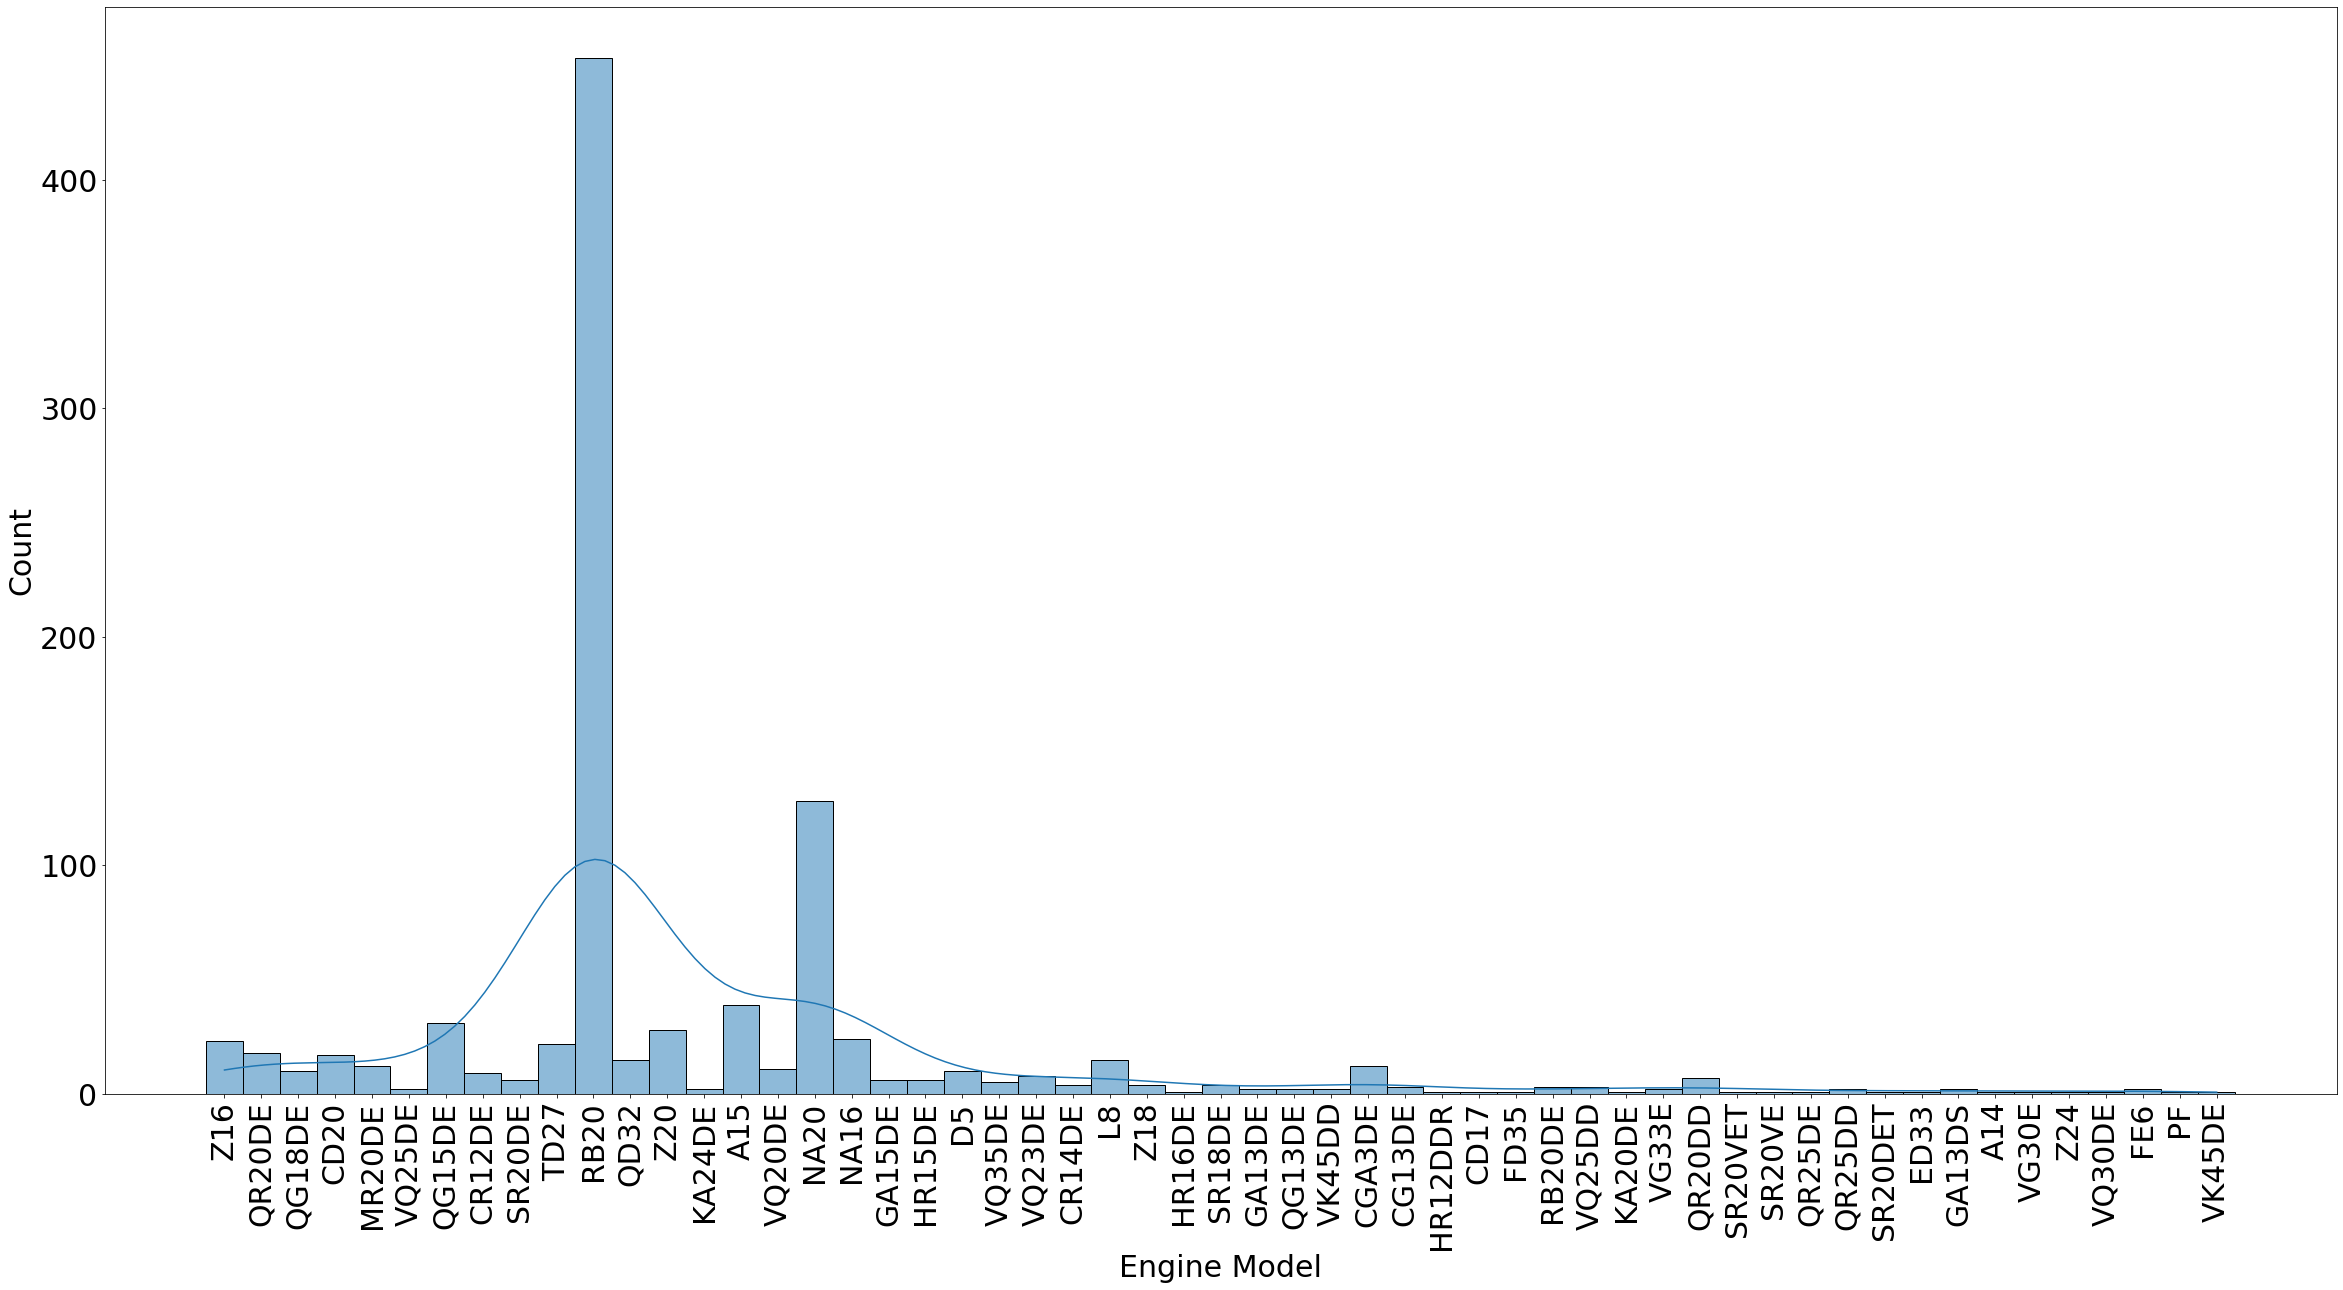

In [390]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

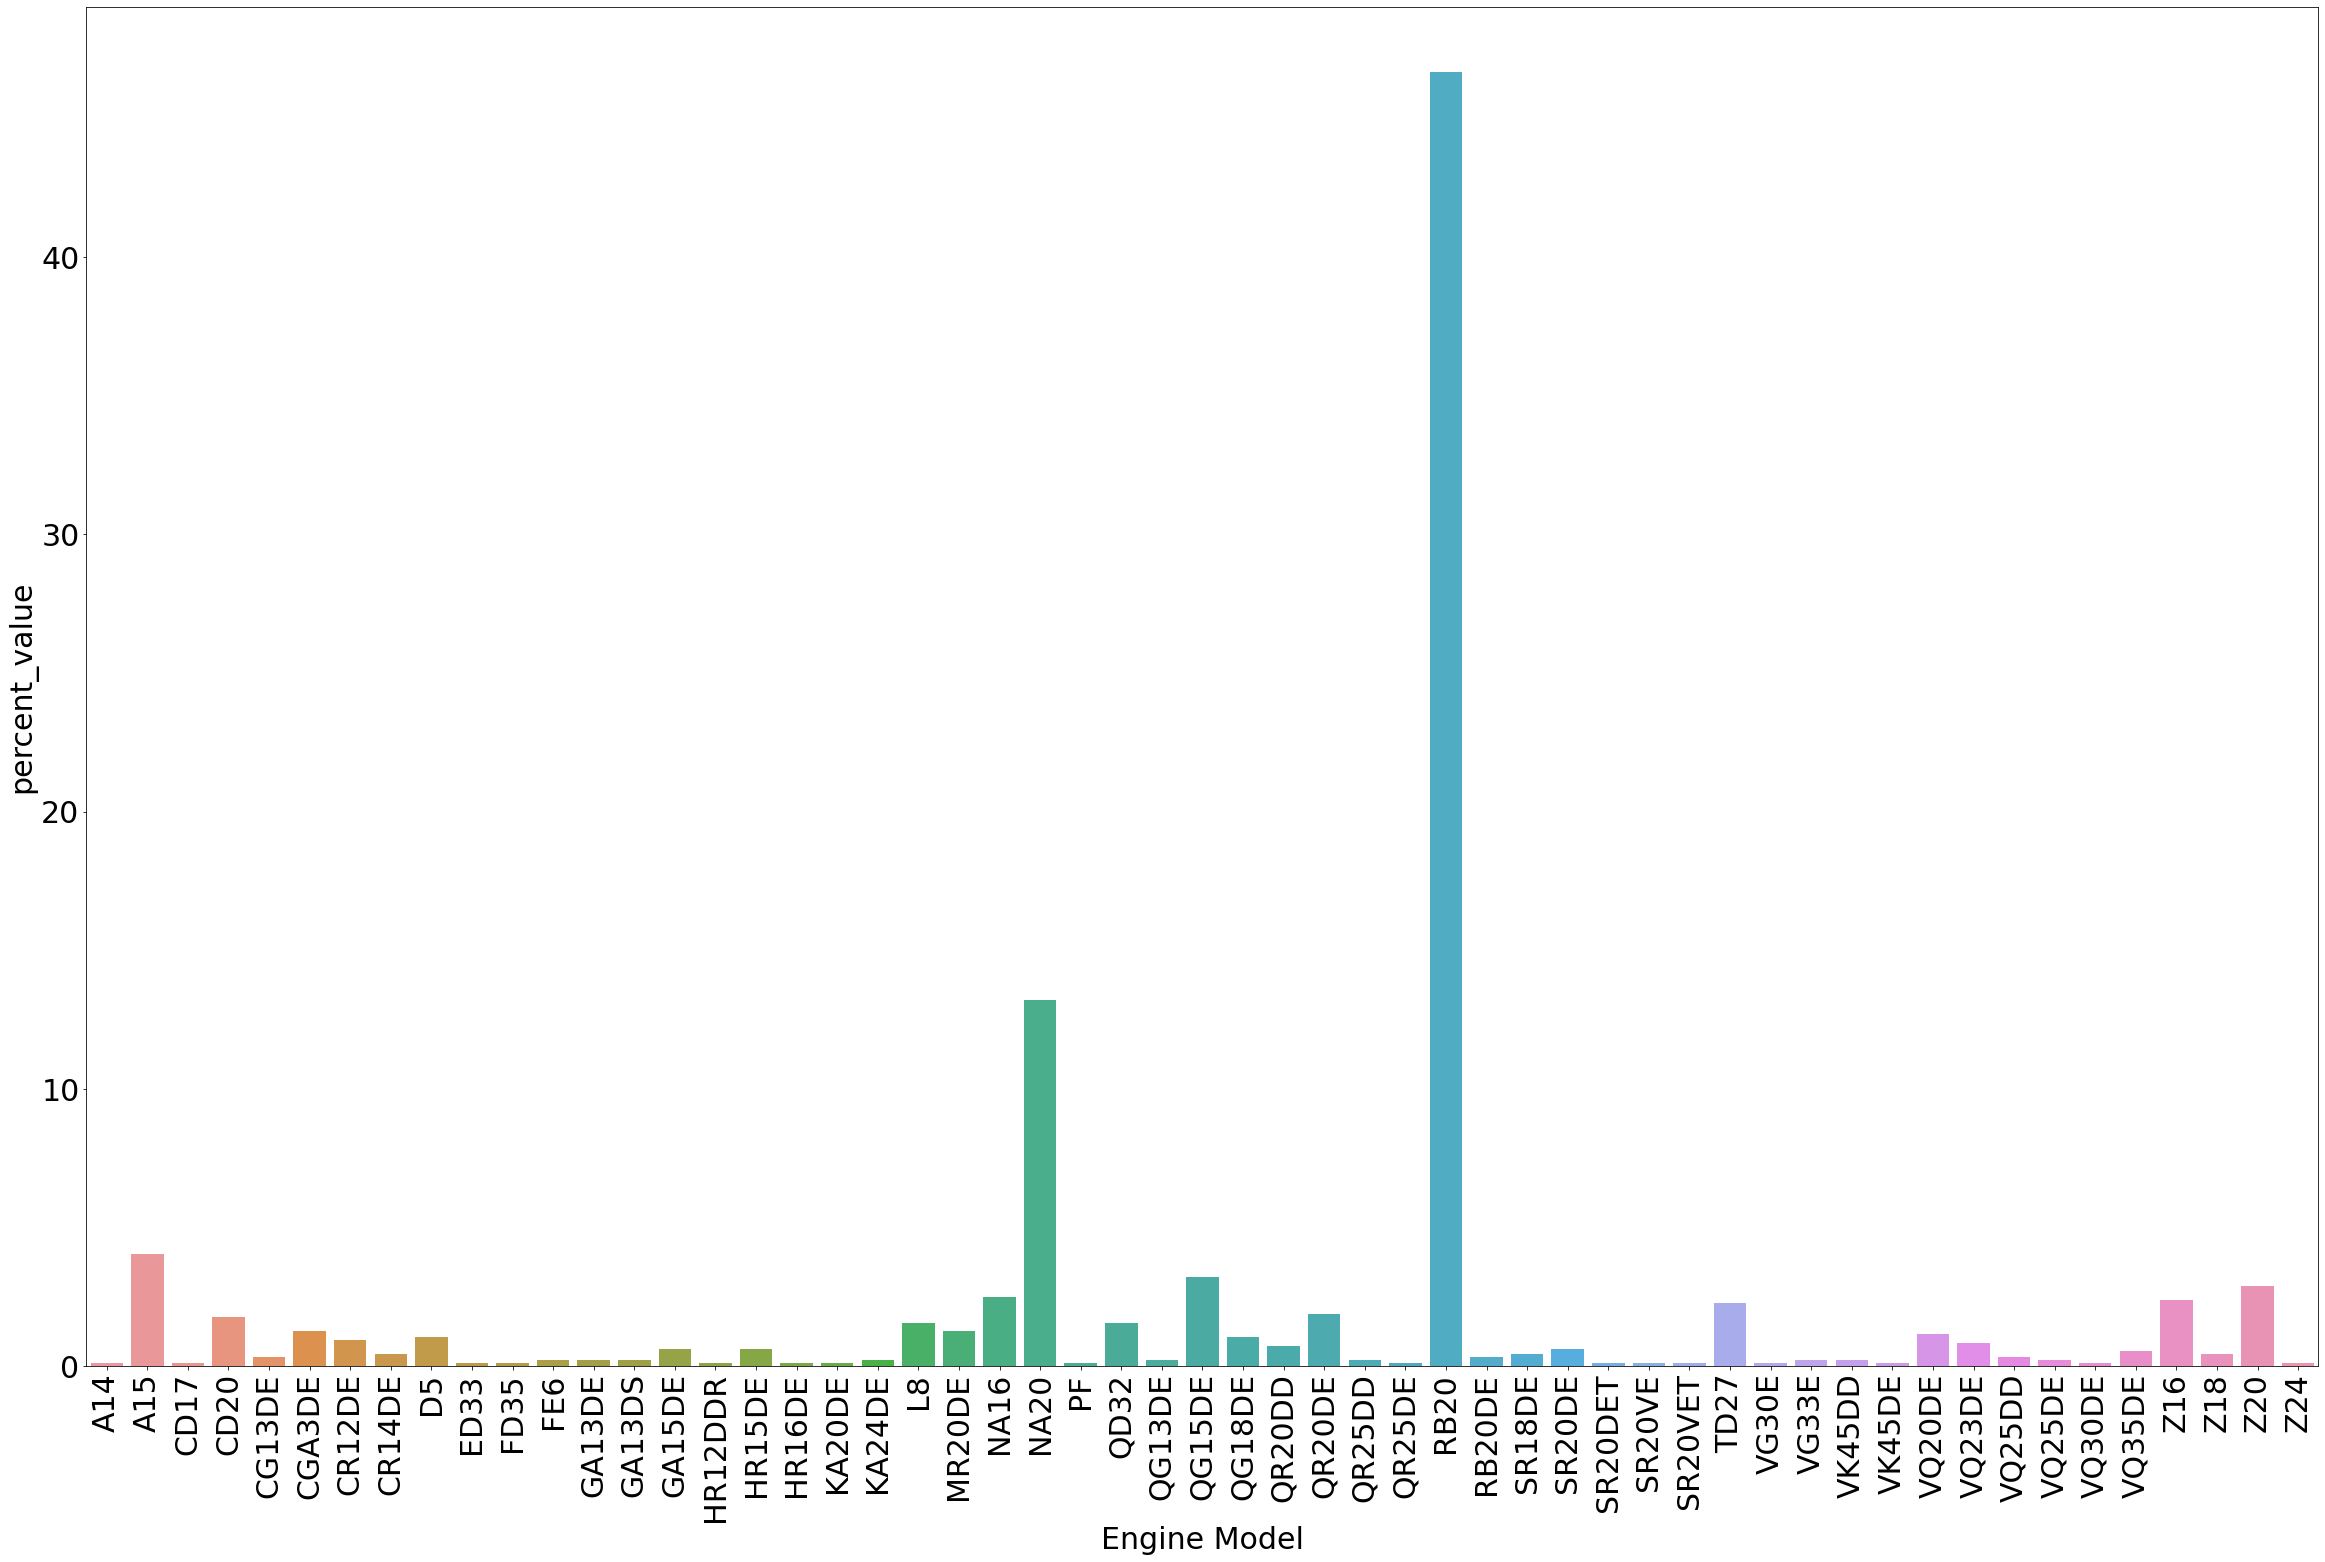

In [391]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Subaru

In [106]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('SUBARU')]
df_toyota

Register Date     HS Code  \
2         2018-01-01  8407343009   
8         2018-01-01  8407343009   
30        2018-01-01  8407343009   
33        2018-01-01  8407343009   
39        2018-01-01  8407343009   
...              ...         ...   
100381    2016-12-01  8407343009   
100428    2016-12-01  8407343009   
100519    2016-12-01  8407343009   
100522    2016-12-01  8407343009   
100541    2016-12-01  8407343009   

                                      Product Description  \
2       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
8       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
30      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
33      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
39      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100381  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100428  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100519  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100522  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100541  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                            Producer  \
2                             DAIHATSU,SUBARU,SUZUKI   
8                                  SUBARU,MITSUBISHI   
30                                        MMC,SUBARU   
33                                            SUBARU   
39      TOYOTA,NISSAN,MITSUBISHI,HONDA,SUBARU,SUZUKI   
...                                              ...   
100381                                        SUBARU   
100428                DAIHATSU MOTOR CO., LTD,SUBARU   
100519                             SUBARU,MITSUBISHI   
100522     TOYOTA, NISSAN, SUBARU, MITSUBISHI, HONDA   
100541              SUBARU-FUJI HEAVY INDUSTRIES LTD   

                                            Brand Place of Receipt  \
2                          DAIHATSU,SUBARU,SUZUKI      ВЛАДИВОСТОК   
8                               SUBARU,MITSUBISHI      ВЛАДИВОСТОК   
30                                     MMC,SUBARU      ВЛАДИВОСТОК   
33                                         SUBARU      ВЛАДИВОСТОК   
39                                         TOYOTA      ВЛАДИВОСТОК   
...                                           ...              ...   
100381                                     SUBARU         ИОКОГАМА   
100428                            DAIHATSU,SUBARU        ВОСТОЧНЫЙ   
100519                          SUBARU,MITSUBISHI      ВЛАДИВОСТОК   
100522  TOYOTA, NISSAN, SUBARU, MITSUBISHI, HONDA      ВЛАДИВОСТОК   
100541                                     SUBARU        ВОСТОЧНЫЙ   

       Country of Origin Country of Sales                         Shipper   \
2         JP, JPN, Japan   JP, JPN, Japan                  ASTRADE CO.,LTD   
8         JP, JPN, Japan   JP, JPN, Japan             WAKE CORPORATION LTD   
30        JP, JPN, Japan   JP, JPN, Japan                GLORY CORPORATION   
33        JP, JPN, Japan   JP, JPN, Japan               EARLY BIRD CO. LTD   
39        JP, JPN, Japan   JP, JPN, Japan        ITAMI AUTOMOBILE CO., LTD   
...                  ...              ...                              ...   
100381    JP, JPN, Japan   JP, JPN, Japan               CAREPO CORPORATION   
100428    JP, JPN, Japan   JP, JPN, Japan  KOREA MARINE TRANSPORT CO.,LTD.   
100519    JP, JPN, Japan   JP, JPN, Japan          ALLIANCE GROUP CO.,LTD    
100522    JP, JPN, Japan   JP, JPN, Japan     CAR EXPORT SERVICE CO., LTD.   
100541    JP, JPN, Japan   JP, JPN, Japan                    SCP-TRANS LLC   

                                          Shipper Address  ...  \
2                  , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
8                     , , ОКАЙЯМА, ЙОНЕГУРА, МИНАМИКУ, 86  ...   
30                     , , YOKOHAMA, 414-78 OOWADASHINDEN  ...   
33                , JAPAN, TOYAMA-SHI, IWASE SUWAMACHI 52  ...   
39              , KITAHIROSHIMA, HOKKAIDO, NO. 630 WATTSU  .

In [107]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['EJ20-A903642'],
 ['EJ20-B320174'],
 ['EJ20-B352752', 'EJ25-C197447'],
 ['EJ20-684510'],
 ['EJ20-C626165', 'EJ20-792941', 'EJ25-C588933'],
 ['EJ20-C416070',
  'EJ20-B880423',
  'EJ20-C043398',
  'EJ20-C783103',
  'EJ20-C556626'],
 ['EJ20-B011527'],
 ['EJ25-B129770'],
 ['EL15-D147771', 'EL15-D204853'],
 ['EJ20-773467'],
 ['EJ20-C013425'],
 ['EJ20-869227', 'EJ20-A981192', 'EJ20-571758', 'EJ25-C644607'],
 ['EJ20-B97337', 'EJ20-B626910', 'EJ20-795060'],
 ['EJ15-C647516',
  'EJ15-B331334',
  'EJ20-C788447',
  'EJ20-D934508',
  'EJ20-B304523',
  'EJ20-535886',
  'EJ20-C626073',
  'EJ25-C058097',
  'EJ25-C543489'],
 ['EJ20-D185639', 'EJ20-C093418'],
 ['EJ15-C647516',
  'EJ15-B331334',
  'EJ20-C788447',
  'EJ20-D934508',
  'EJ20-B304523',
  'EJ20-535886',
  'EJ20-C626073',
  'EJ25-C058097',
  'EJ25-C543489'],
 ['EJ15-C996682', 'EJ20-B565166'],
 ['EJ20-A816655', 'EZ30-U139036'],
 ['EL15-D310538'],
 ['EZ30-U246758'],
 ['EL15-0294956'],
 ['EJ20-D180979'],
 ['EJ15-D021184', 'EJ20-B959681'],
 ['E

In [108]:
len(list_all_engine_model_toyota_GTO_JP_filter)

3028

In [109]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [110]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0            EJ20
1            EJ20
2            EJ20
3            EJ25
4            EJ20
...           ...
6135         EJ20
6136         EJ25
6137         EJ20
6138         EJ20
6139         EJ20

[6140 rows x 1 columns]

In [111]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          EJ15    486           7.92
1          EJ18    107           1.74
2          EJ20   4298          70.00
3          EJ22      4           0.07
4          EJ25    737          12.00
5          EL15    159           2.59
6          EN07      4           0.07
7          EZ30    256           4.17
8          FB16     11           0.18
9          FB20     70           1.14
10         FB25      8           0.13

In [112]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
2         EJ20   4298          70.00
4         EJ25    737          12.00
0         EJ15    486           7.92
7         EZ30    256           4.17
5         EL15    159           2.59

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

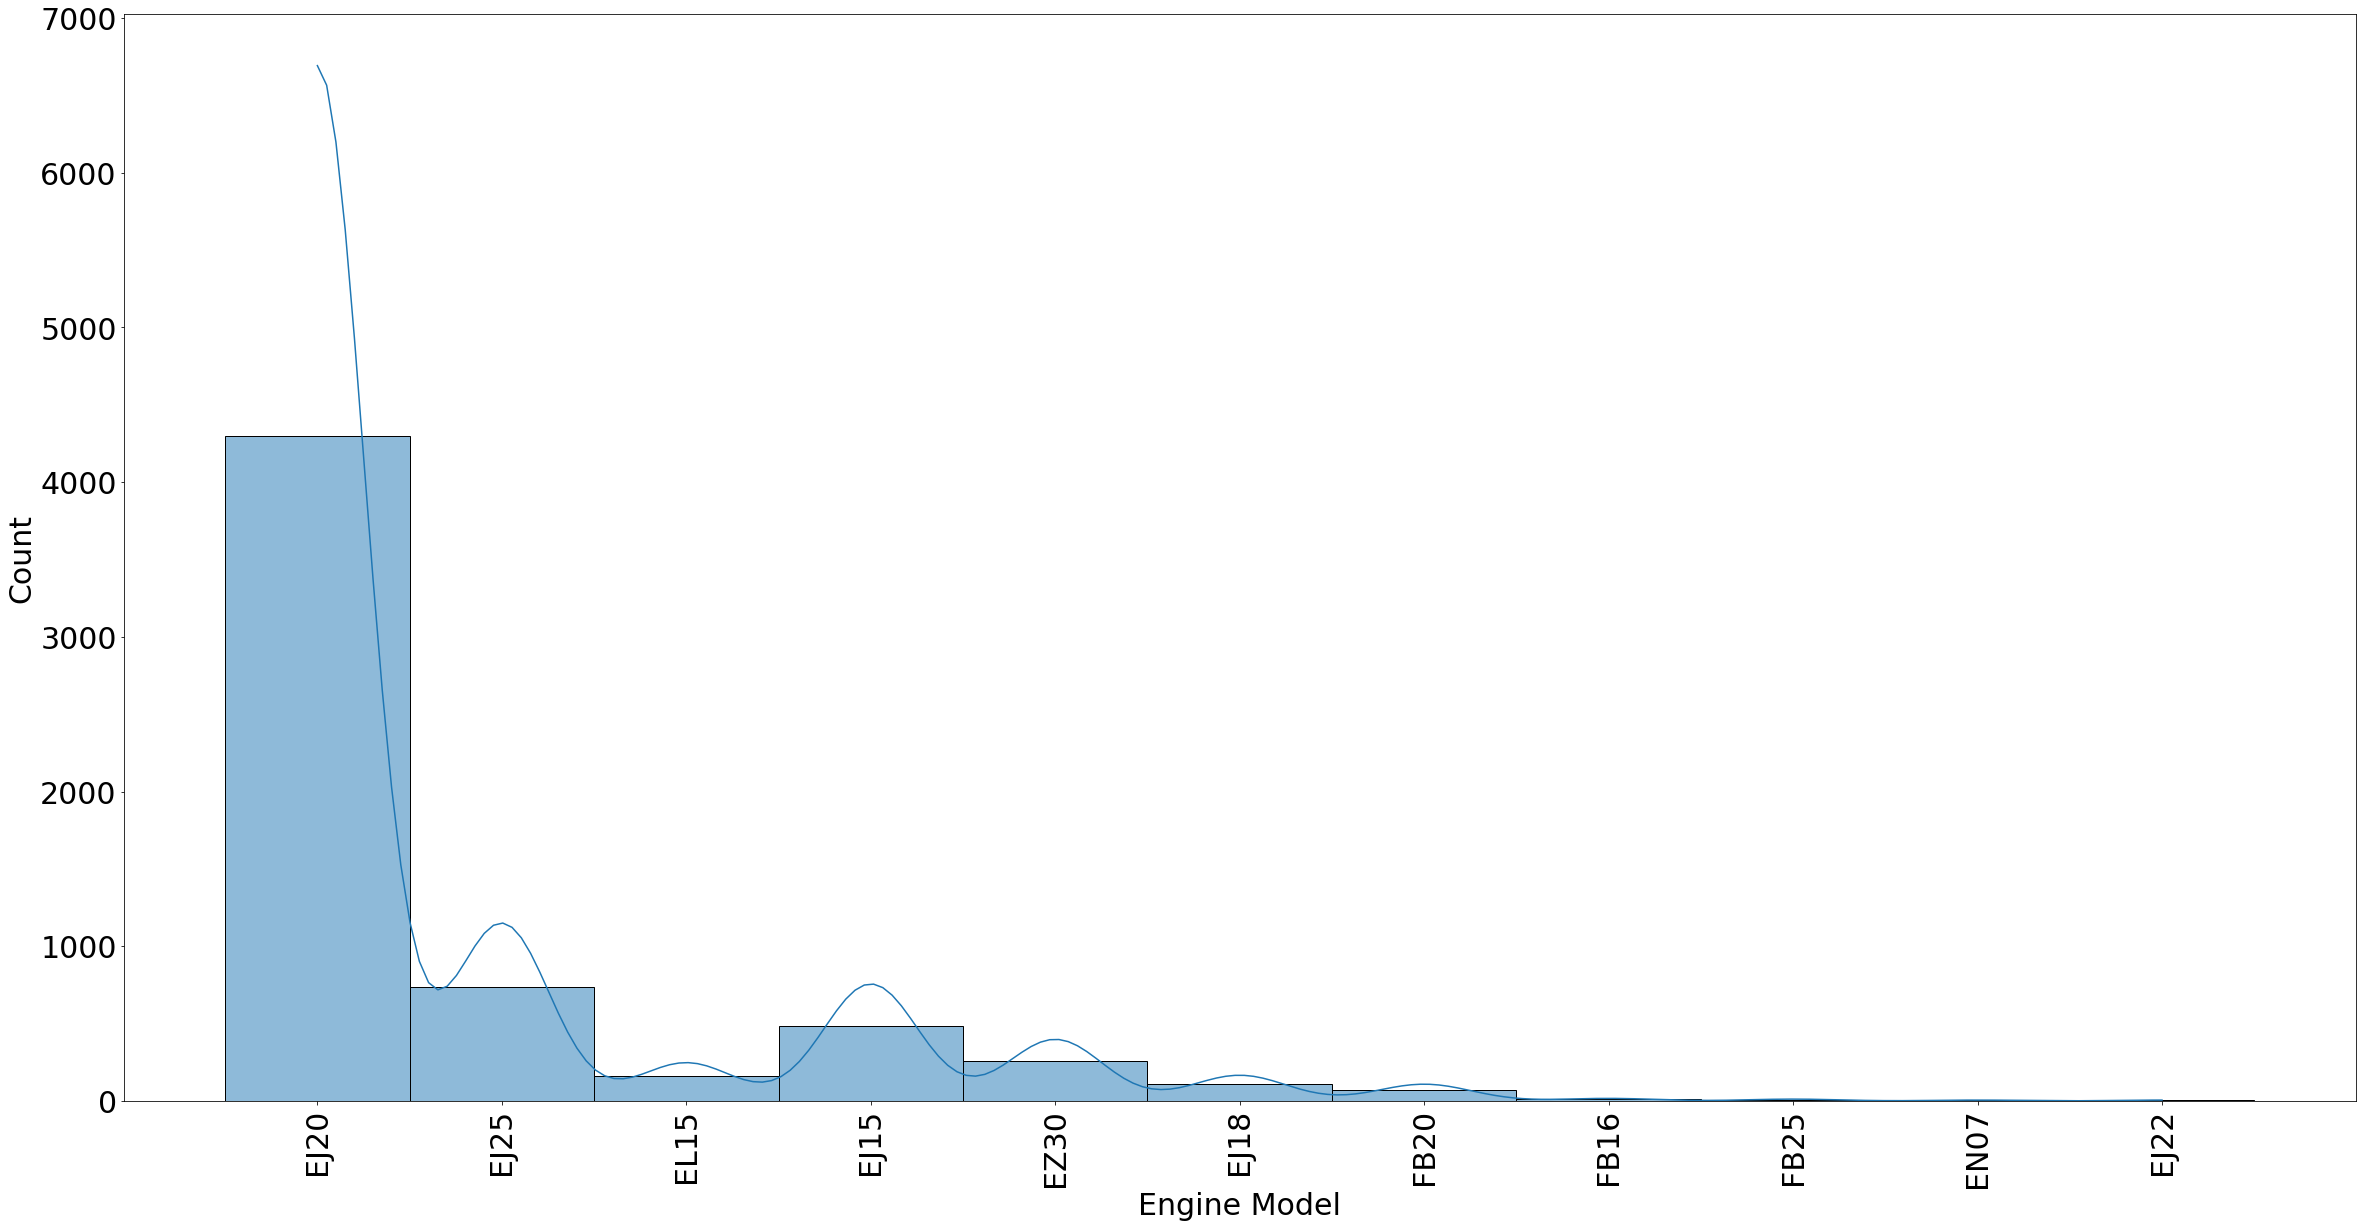

In [113]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

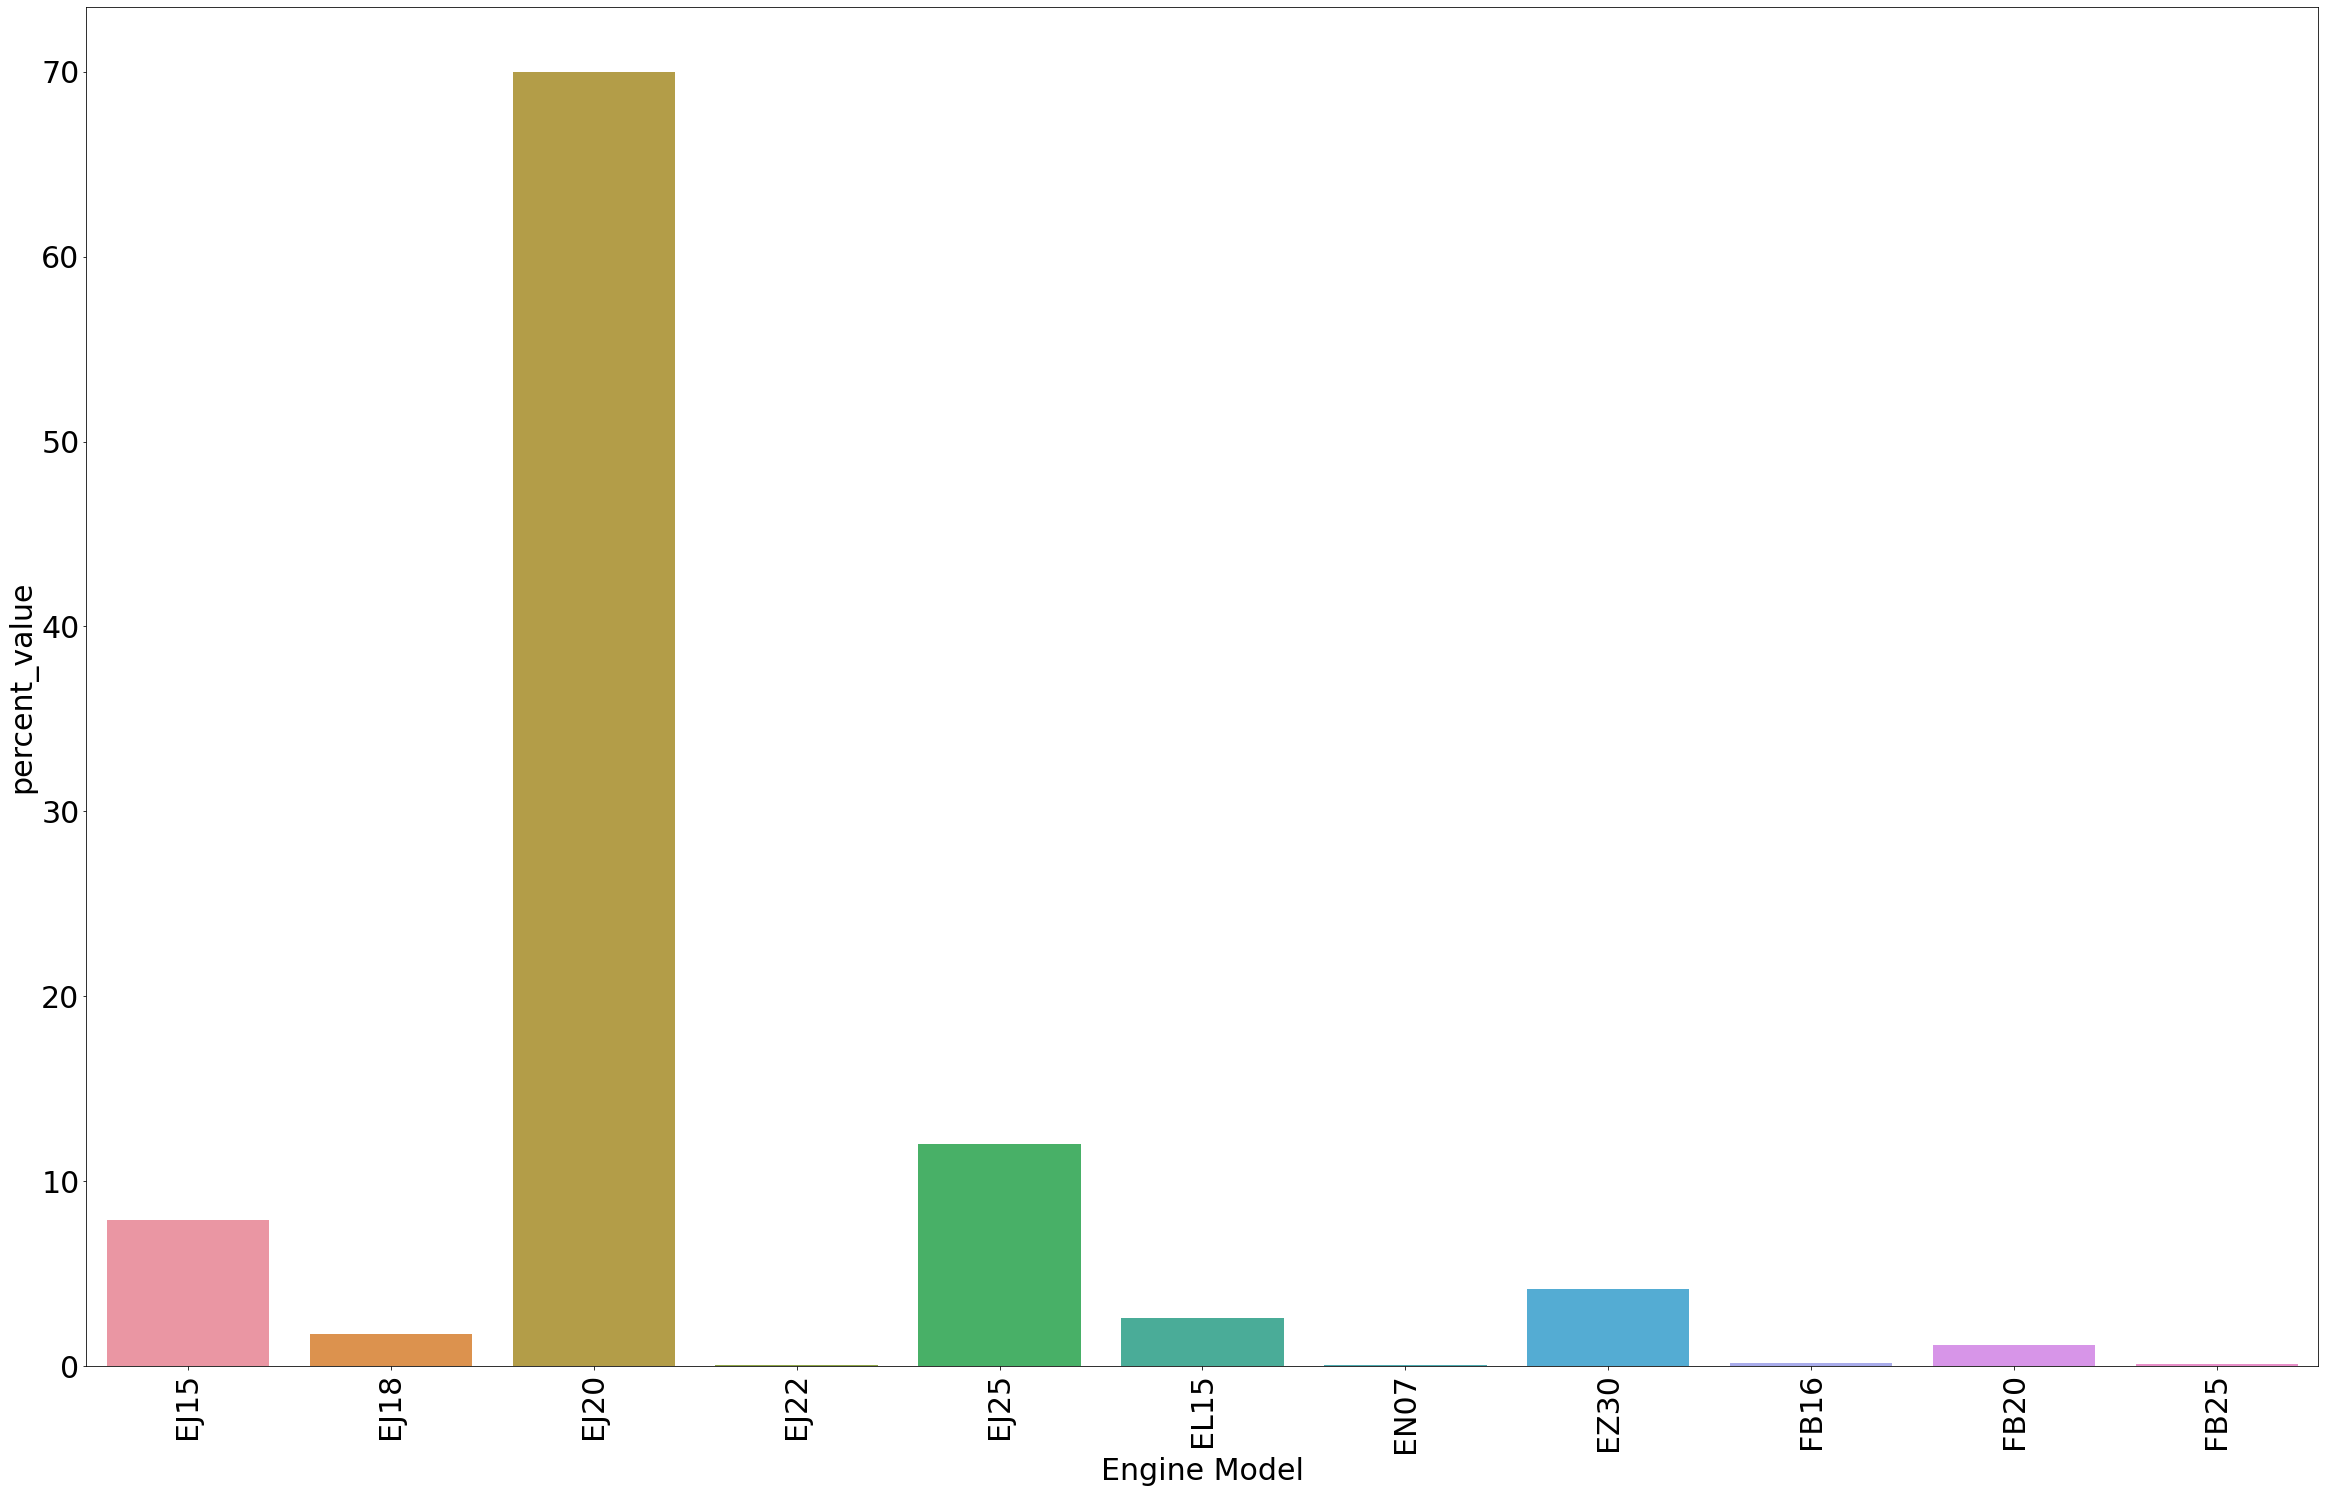

In [95]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Dữ liệu của Kaiho lọc từ GTO

In [20]:
df_merged['shipper_extract']  = df_merged['Shipper '].map(lambda x : 'KAIHO' if 'KAIHO' in x else ('Others' if x  else 'None'))
df_merged['country_extract']  = df_merged['Country of Sales'].map(lambda x : 'Japan' if ('japan' in x.lower() or 'jp' in x.lower() or 'jpn' in x.lower()) else ('Others' if x  else 'None'))
df_kaiho = df_merged[(df_merged['shipper_extract'] == 'KAIHO') & (df_merged['country_extract'] == 'Japan')]

# TOYOTA

In [135]:
df_subaru = df_kaiho[df_kaiho.Producer.str.contains('TOYOTA')]
df_subaru

Register Date     HS Code  \
27        2011-01-12  8407343009   
37        2011-01-12  8407343009   
68        2011-01-17  8407343009   
69        2011-01-17  8407343009   
903       2011-01-26  8407343009   
...              ...         ...   
258981    2019-12-01  8407343009   
258982    2019-12-01  8407343009   
258983    2019-12-01  8407343009   
258984    2019-12-01  8407343009   
258989    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
37      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
68      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
69      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
903     БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
...                                                   ...   
258981  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258982  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258983  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258984  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258989  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
37                                         TOYOTA, NISSAN   
68                                                 TOYOTA   
69                                                 TOYOTA   
903     TOYOTA, MAZDA, SUBARU, HONDA, NISSAN, SUZUKI, ...   
...                                                   ...   
258981                                             TOYOTA   
258982                                             TOYOTA   
258983                                             TOYOTA   
258984                                             TOYOTA   
258989                                             TOYOTA   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
37                                         TOYOTA, NISSAN      ВЛАДИВОСТОК   
68                                                 TOYOTA      ВЛАДИВОСТОК   
69                                                 TOYOTA      ВЛАДИВОСТОК   
903                          TOYOTA, MAZDA, SUBARU, HONDA      ВЛАДИВОСТОК   
...                                                   ...              ...   
258981                                             TOYOTA      ВЛАДИВОСТОК   
258982                                             TOYOTA      ВЛАДИВОСТОК   
258983                                             TOYOTA      ВЛАДИВОСТОК   
258984                                             TOYOTA      ВЛАДИВОСТОК   
258989                                             TOYOTA     TOYAMASHINKO   

       Country of Origin Country of Sales  \
27        JP, JPN, Japan   JP, JPN, Japan   
37        JP, JPN, Japan   JP, JPN, Japan   
68        JP, JPN, Japan   JP, JPN, Japan   
69        JP, JPN, Japan   JP, JPN, Japan   
903       JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258981    JP, JPN, Japan   JP, JPN, Japan   
258982    JP, JPN, Japan   JP, JPN, Japan   
258983    JP, JPN, Japan   JP, JPN, Japan   
258984    JP, JPN, Japan   JP, JPN, Japan   
258989    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
27                                  KAIHO SANGYO CO., LTD   
37                                  KAIHO SANGYO CO., LTD   
68                                  KAIHO SANGYO CO.,LTD.   
69                                  KAIHO SANGYO CO.,LTD.   
903                                 KAIHO SANGYO CO., LTD   
...                                                   ...   
258981                              KAIHO INDUSTY CO. LTD   
258982                              KAIHO INDUSTY CO. LTD   
258983                              KAIHO INDUSTY CO. LTD   
258984              

In [136]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['3Y-1175464'],
 ['T2-004508'],
 ['2C-3459918'],
 ['3Y-0964705'],
 ['5K-0471896'],
 ['7K-0403558'],
 ['5K-1102098'],
 ['3Y-1109734'],
 ['7K-0584123'],
 ['7K-0772384'],
 ['3Y-0773764'],
 ['B-1'],
 ['B-80'],
 ['3Y-1150139'],
 ['2Y-0841062'],
 ['7K-0205174'],
 ['5K-1061157'],
 ['1N-0844508', '1N-3902023'],
 ['2Y-0398434'],
 ['2Y-0824062'],
 ['5K-5042290'],
 ['2Y-0764155'],
 ['5A-FE-C120224'],
 ['1NZ-FE-B429227',
  '1NZ-FE-A726278',
  '2AZ-FE-4878584',
  '2AZ-FXE-1761741',
  '2NZ-FE-4340338',
  '2SZ-FE-2251928',
  '2SZ-FE-1685445'],
 ['2NZ-FE-4340338', '2SZ-FE-2251928', '2SZ-FE-1685445']]

In [137]:
len(list_all_engine_model_toyota_GTO_JP_filter)

25

In [138]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [139]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0            3Y
1            T2
2            2C
3            3Y
4            5K
5            7K
6            5K
7            3Y
8            7K
9            7K
10           3Y
11            B
12            B
13           3Y
14           2Y
15           7K
16           5K
17           1N
18           1N
19           2Y
20           2Y
21           5K
22           2Y
23        5A-FE
24       1NZ-FE
25       1NZ-FE
26       2AZ-FE
27      2AZ-FXE
28       2NZ-FE
29       2SZ-FE
30       2SZ-FE
31       2NZ-FE
32       2SZ-FE
33       2SZ-FE

In [45]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0            1N      2           5.88
1        1NZ-FE      2           5.88
2        2AZ-FE      1           2.94
3       2AZ-FXE      1           2.94
4            2C      1           2.94
5        2NZ-FE      2           5.88
6        2SZ-FE      4          11.76
7            2Y      4          11.76
8            3Y      5          14.71
9         5A-FE      1           2.94
10           5K      4          11.76
11           7K      4          11.76
12            B      2           5.88
13           T2      1           2.94

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

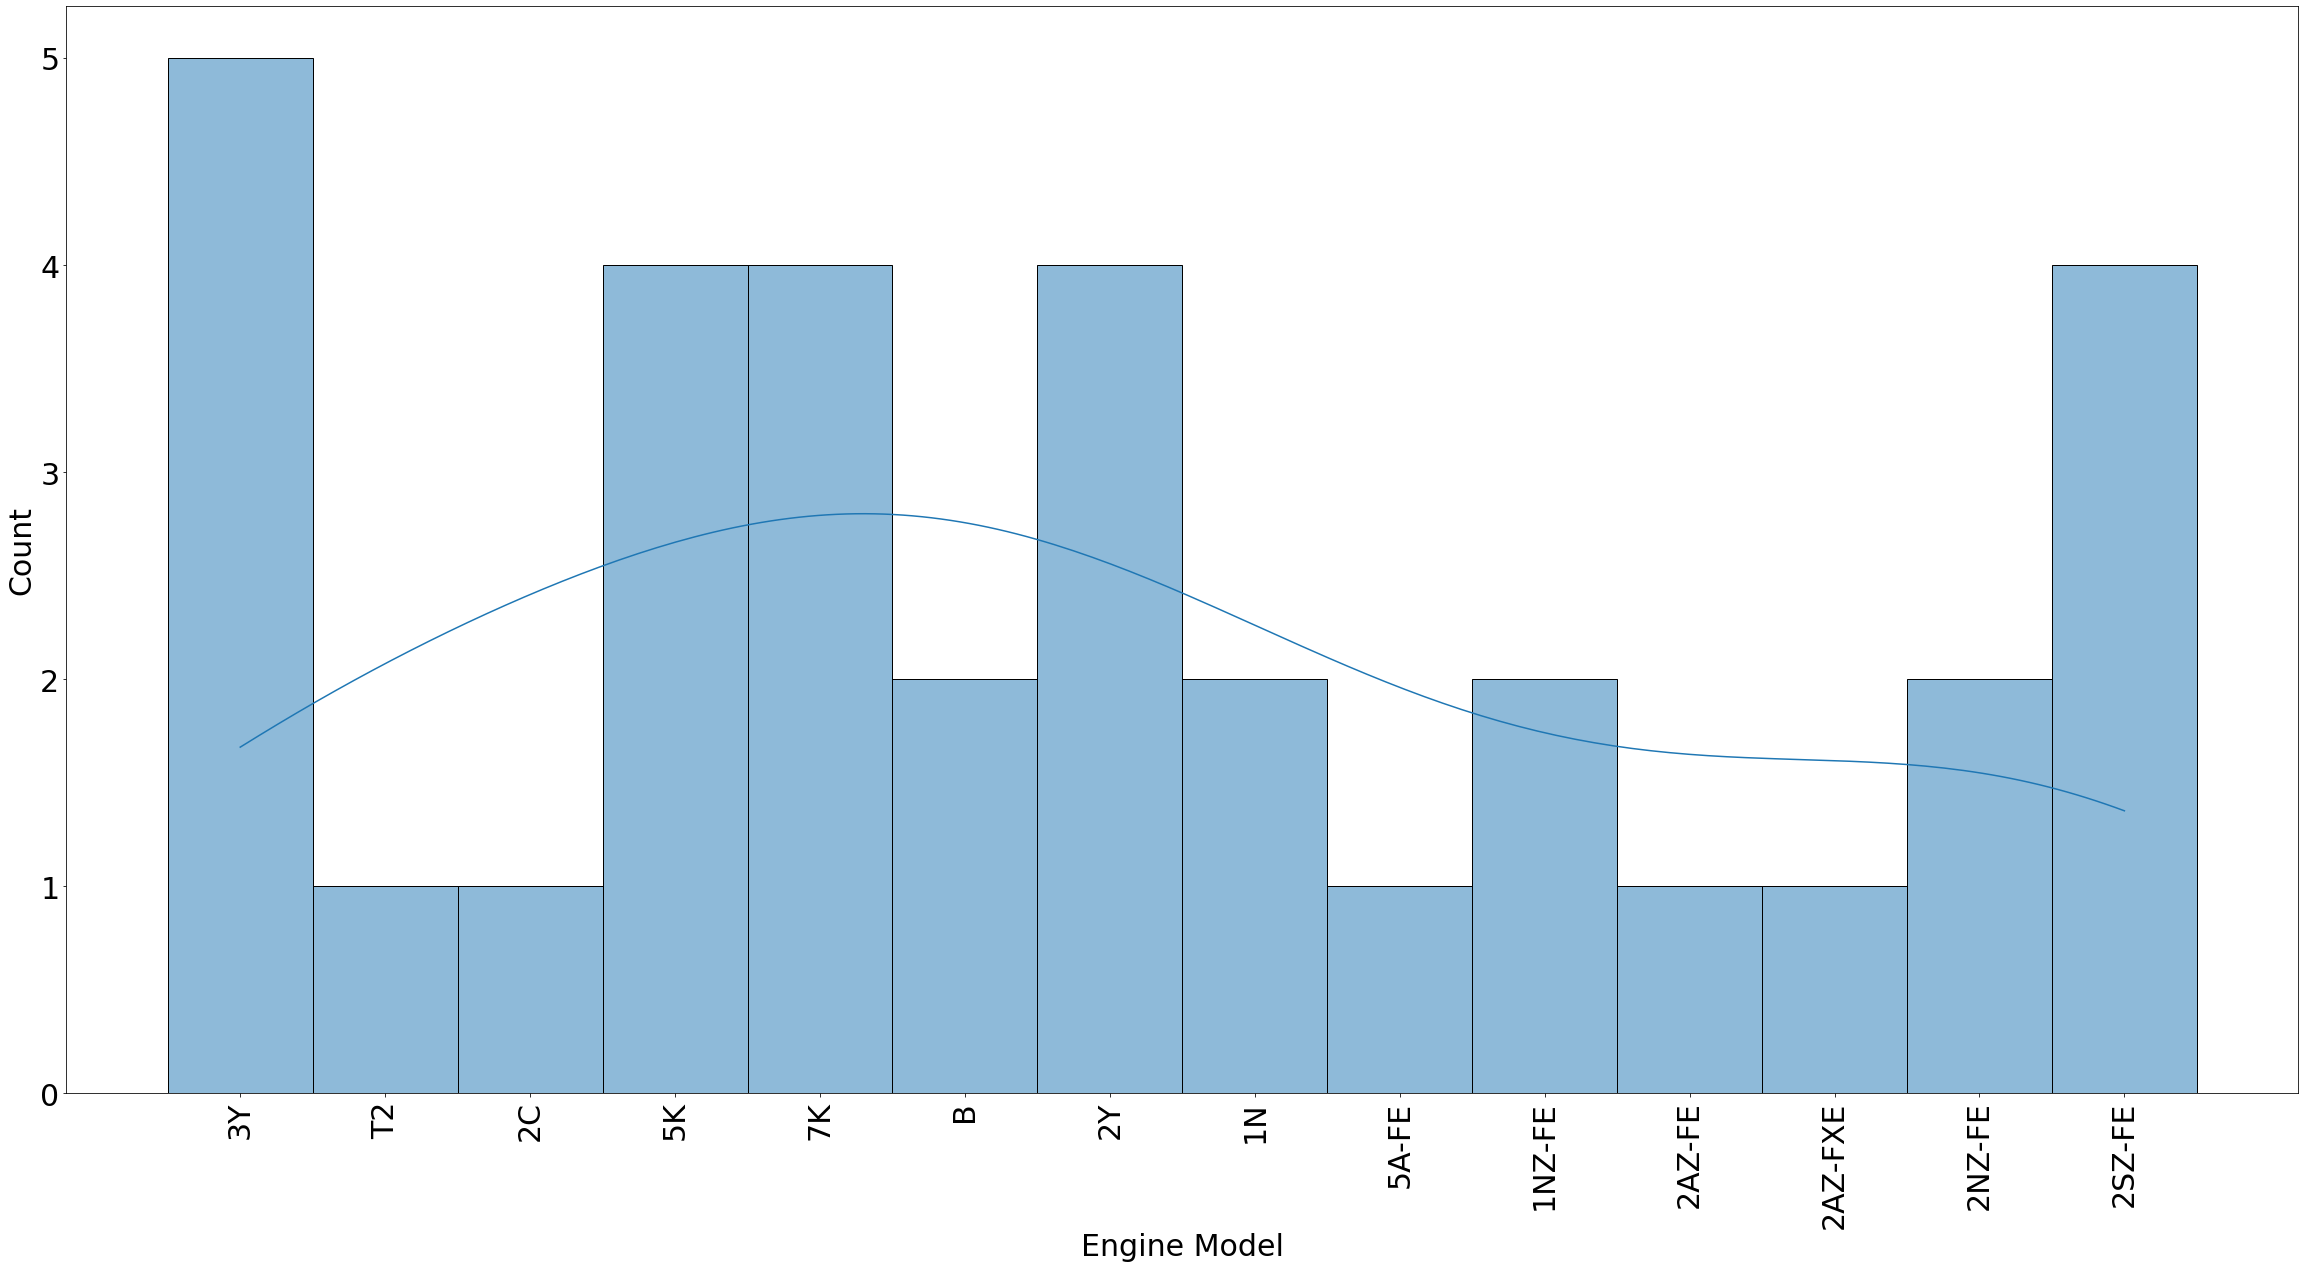

In [46]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

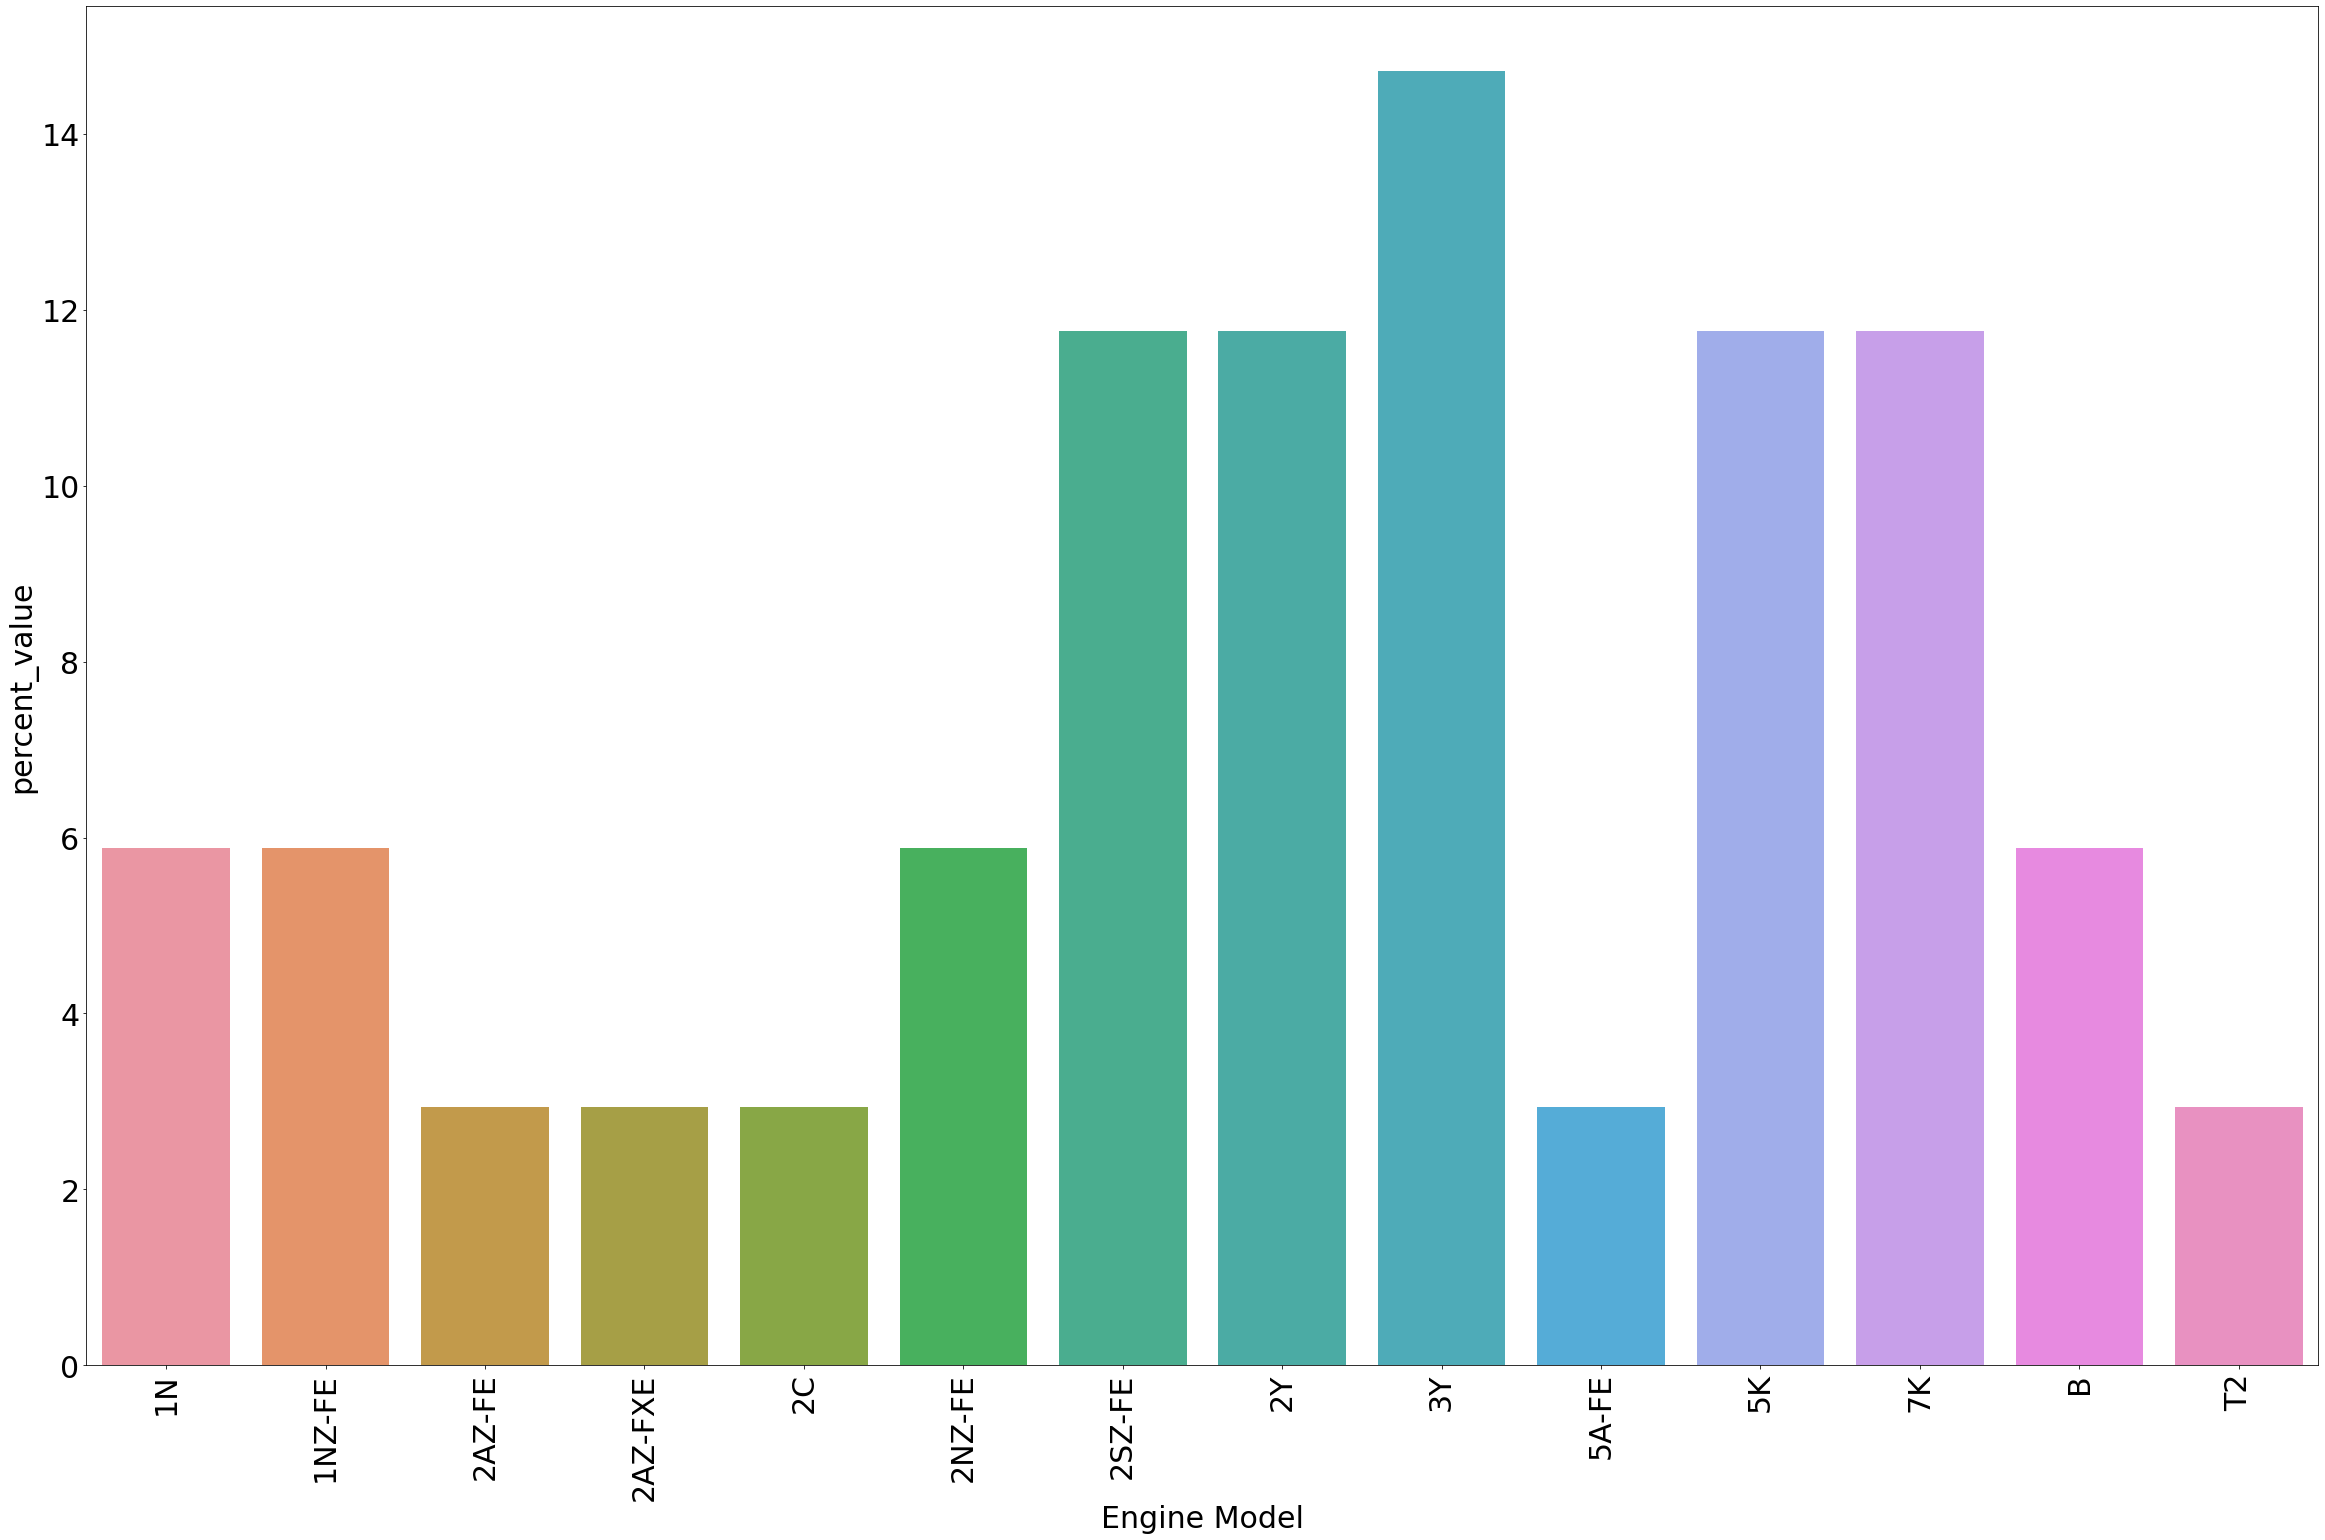

In [47]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# MAZDA

In [49]:
df_subaru = df_kaiho[df_kaiho.Producer.str.contains('MAZDA')]
df_subaru

Register Date     HS Code  \
27        2011-01-12  8407343009   
903       2011-01-26  8407343009   
2830      2011-03-29  8407343009   
5244      2011-04-22  8407343009   
8783      2011-06-03  8407343009   
...              ...         ...   
243349    2019-09-01  8407343009   
247272    2019-10-01  8407343009   
248636    2019-10-01  8407343009   
250477    2019-11-01  8407343009   
255221    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
903     БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
2830    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
5244    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
8783    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
...                                                   ...   
243349  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
247272  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М СТЕПЕНЬ ИЗНОСА БЫ...   
248636  ДВИГАТЕЛИ БЕНЗИНОВЫЕ БЫВШИЕ В УПОТРЕБЛЕНИИ, В ...   
250477  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М .СТЕПЕНЬ ИЗНОСА Д...   
255221  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М ,СТЕПЕНЬ ИЗНОСА Д...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
903     TOYOTA, MAZDA, SUBARU, HONDA, NISSAN, SUZUKI, ...   
2830    TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI, ЯПО...   
5244    HONDA, ISUZU, TOYOTA, MAZDA, SUBARU, NISSAN, M...   
8783    TOYOTA, HONDA, ISUZU, MAZDA, MITSUBISHI, NISSA...   
...                                                   ...   
243349                                              MAZDA   
247272                                              MAZDA   
248636                            MAZDA MOTOR CORPORATION   
250477                                              MAZDA   
255221                                              MAZDA   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
903                          TOYOTA, MAZDA, SUBARU, HONDA      ВЛАДИВОСТОК   
2830            TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI      ВЛАДИВОСТОК   
5244    HONDA, ISUZU, TOYOTA, MAZDA, SUBARU, NISSAN, M...      ВЛАДИВОСТОК   
8783      TOYOTA, HONDA, ISUZU, MAZDA, MITSUBISHI, NISSAN      ВЛАДИВОСТОК   
...                                                   ...              ...   
243349                                              MAZDA      ВЛАДИВОСТОК   
247272                                              MAZDA      ВЛАДИВОСТОК   
248636                                              MAZDA        ВОСТОЧНЫЙ   
250477                                              MAZDA      ВЛАДИВОСТОК   
255221                                              MAZDA      ВЛАДИВОСТОК   

       Country of Origin Country of Sales                 Shipper   \
27        JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
903       JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
2830      JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
5244      JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
8783      JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
...                  ...              ...                      ...   
243349             JAPAN            JAPAN  KAIHO INDUSTRY CO., LTD   
247272    JP, JPN, Japan            JAPAN    KAIHO SANGYO CO. LTD.   
248636    JP, JPN, Japan            JAPAN   KAIHO INDUSTRY CO.LTD.   
250477             JAPAN            JAPAN   KAIHO INDUSTRY CO. LTD   
255221    JP, JPN, Japan   JP, JPN, Japan   KAIHO INDUSTRY CO. LTD   

                                          Shipper Address  \
27      920-0209 ISHIKAWA-KEN KANAZAWA-SHI HIGASHI-KAG...   
903     920-0209 KANAZAWA-SHI ISHIKAWA 1-25 HIGASHIKAG...   
2830    920-0209 KANAZAWA-SHI ISHIKAWA 1-25 HIGASHIKAG...   
5244    920-0209, KANAZAWA-SHI, ISHIKAWA, 1-25 HIGASHI...   
8783    920-0209 KANAZAWA

In [50]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['GY-2682212'],
 ['B5-493647'],
 ['F8-361418'],
 ['B6-727522', 'BP-892098'],
 ['F8-371011'],
 ['F8-494061'],
 ['GY-280568'],
 ['B6-573915', 'FE-4'],
 ['B5-510149', 'G5-206556'],
 ['BP-824469',
  'BP-820814',
  'F8-400531',
  'F8-593951',
  'F8-580877',
  'F8-543658',
  'F8-580754'],
 ['F8-331040', 'F8-2110'],
 ['GY-284608'],
 ['F8-226663', 'F8-302877'],
 ['F8-603583'],
 ['F8-202382'],
 ['GY-252892'],
 ['F8-603583'],
 ['13B-370134'],
 ['F8-972311', 'F8-599994'],
 ['RF-95253'],
 ['13B-384108', 'F8-303939', 'YF-201079'],
 ['GY-1500057'],
 ['B5-439285'],
 ['F8-317336'],
 ['F8-2410'],
 ['FE-507131'],
 ['GY-398138'],
 ['B5-463205'],
 ['YF-221520'],
 ['F8-311964'],
 ['B3E-824428'],
 ['GY-309510', 'GY-255869'],
 ['J5-164309'],
 ['GY-358089'],
 ['FE-501679'],
 ['13B-309623'],
 ['GY-405058'],
 ['FE-501679']]

In [51]:
len(list_all_engine_model_toyota_GTO_JP_filter)

38

In [52]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [53]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0            GY
1            B5
2            F8
3            B6
4            BP
5            F8
6            F8
7            GY
8            B6
9            FE
10           B5
11           G5
12           BP
13           BP
14           F8
15           F8
16           F8
17           F8
18           F8
19           F8
20           F8
21           GY
22           F8
23           F8
24           F8
25           F8
26           GY
27           F8
28          13B
29           F8
30           F8
31           RF
32          13B
33           F8
34           YF
35           GY
36           B5
37           F8
38           F8
39           FE
40           GY
41           B5
42           YF
43           F8
44          B3E
45           GY
46           GY
47           J5
48           GY
49           FE
50          13B
51           GY
52           FE

In [54]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0           13B      3           5.66
1           B3E      1           1.89
2            B5      4           7.55
3            B6      2           3.77
4            BP      3           5.66
5            F8     21          39.62
6            FE      4           7.55
7            G5      1           1.89
8            GY     10          18.87
9            J5      1           1.89
10           RF      1           1.89
11           YF      2           3.77

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

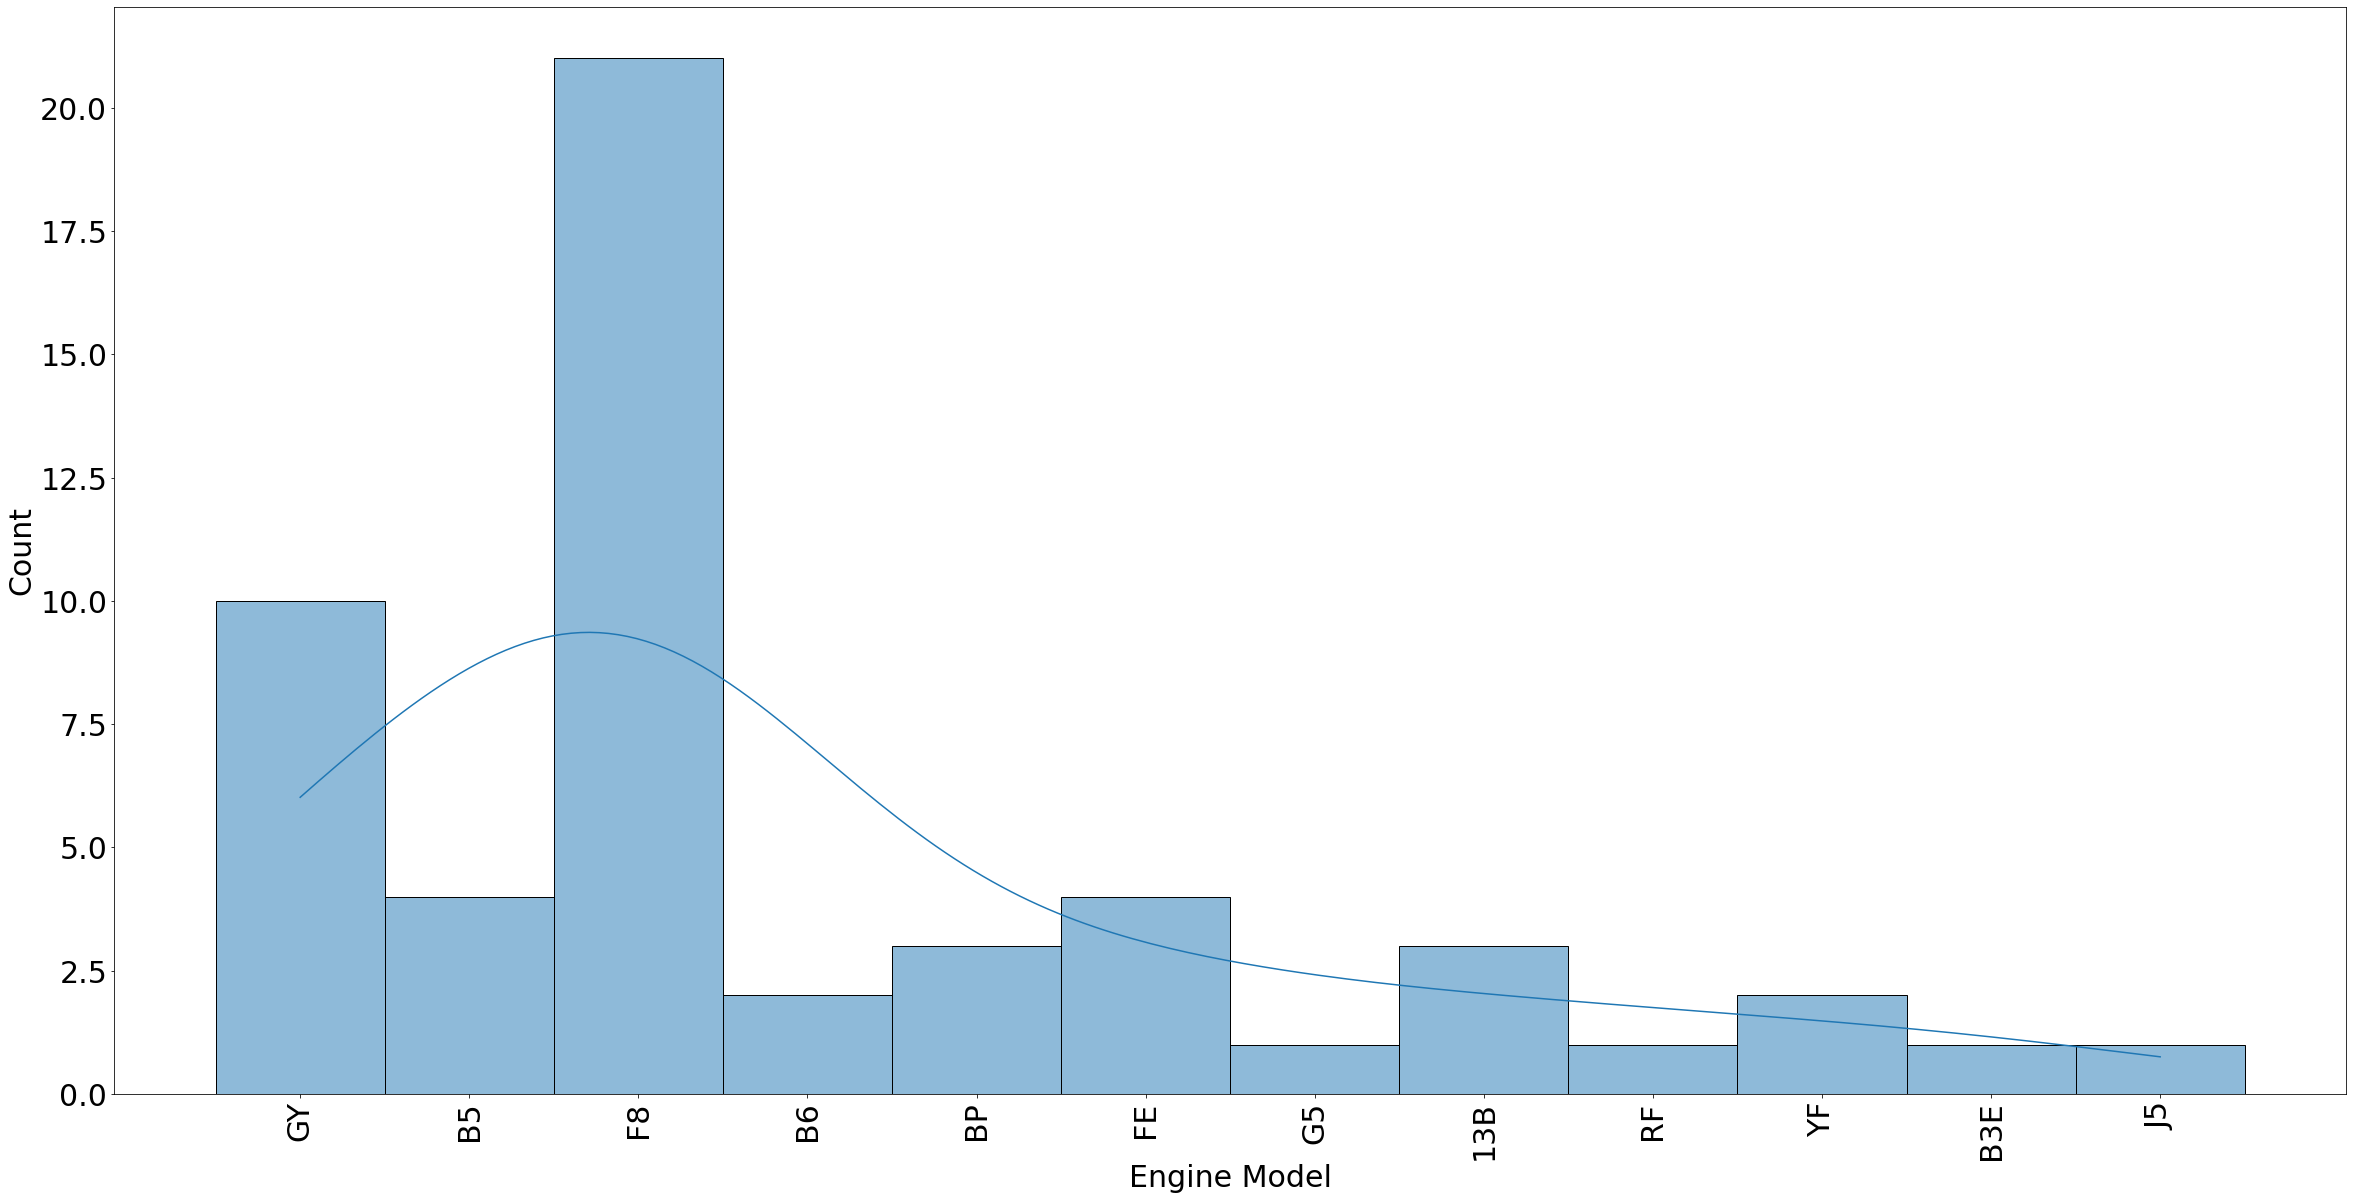

In [55]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

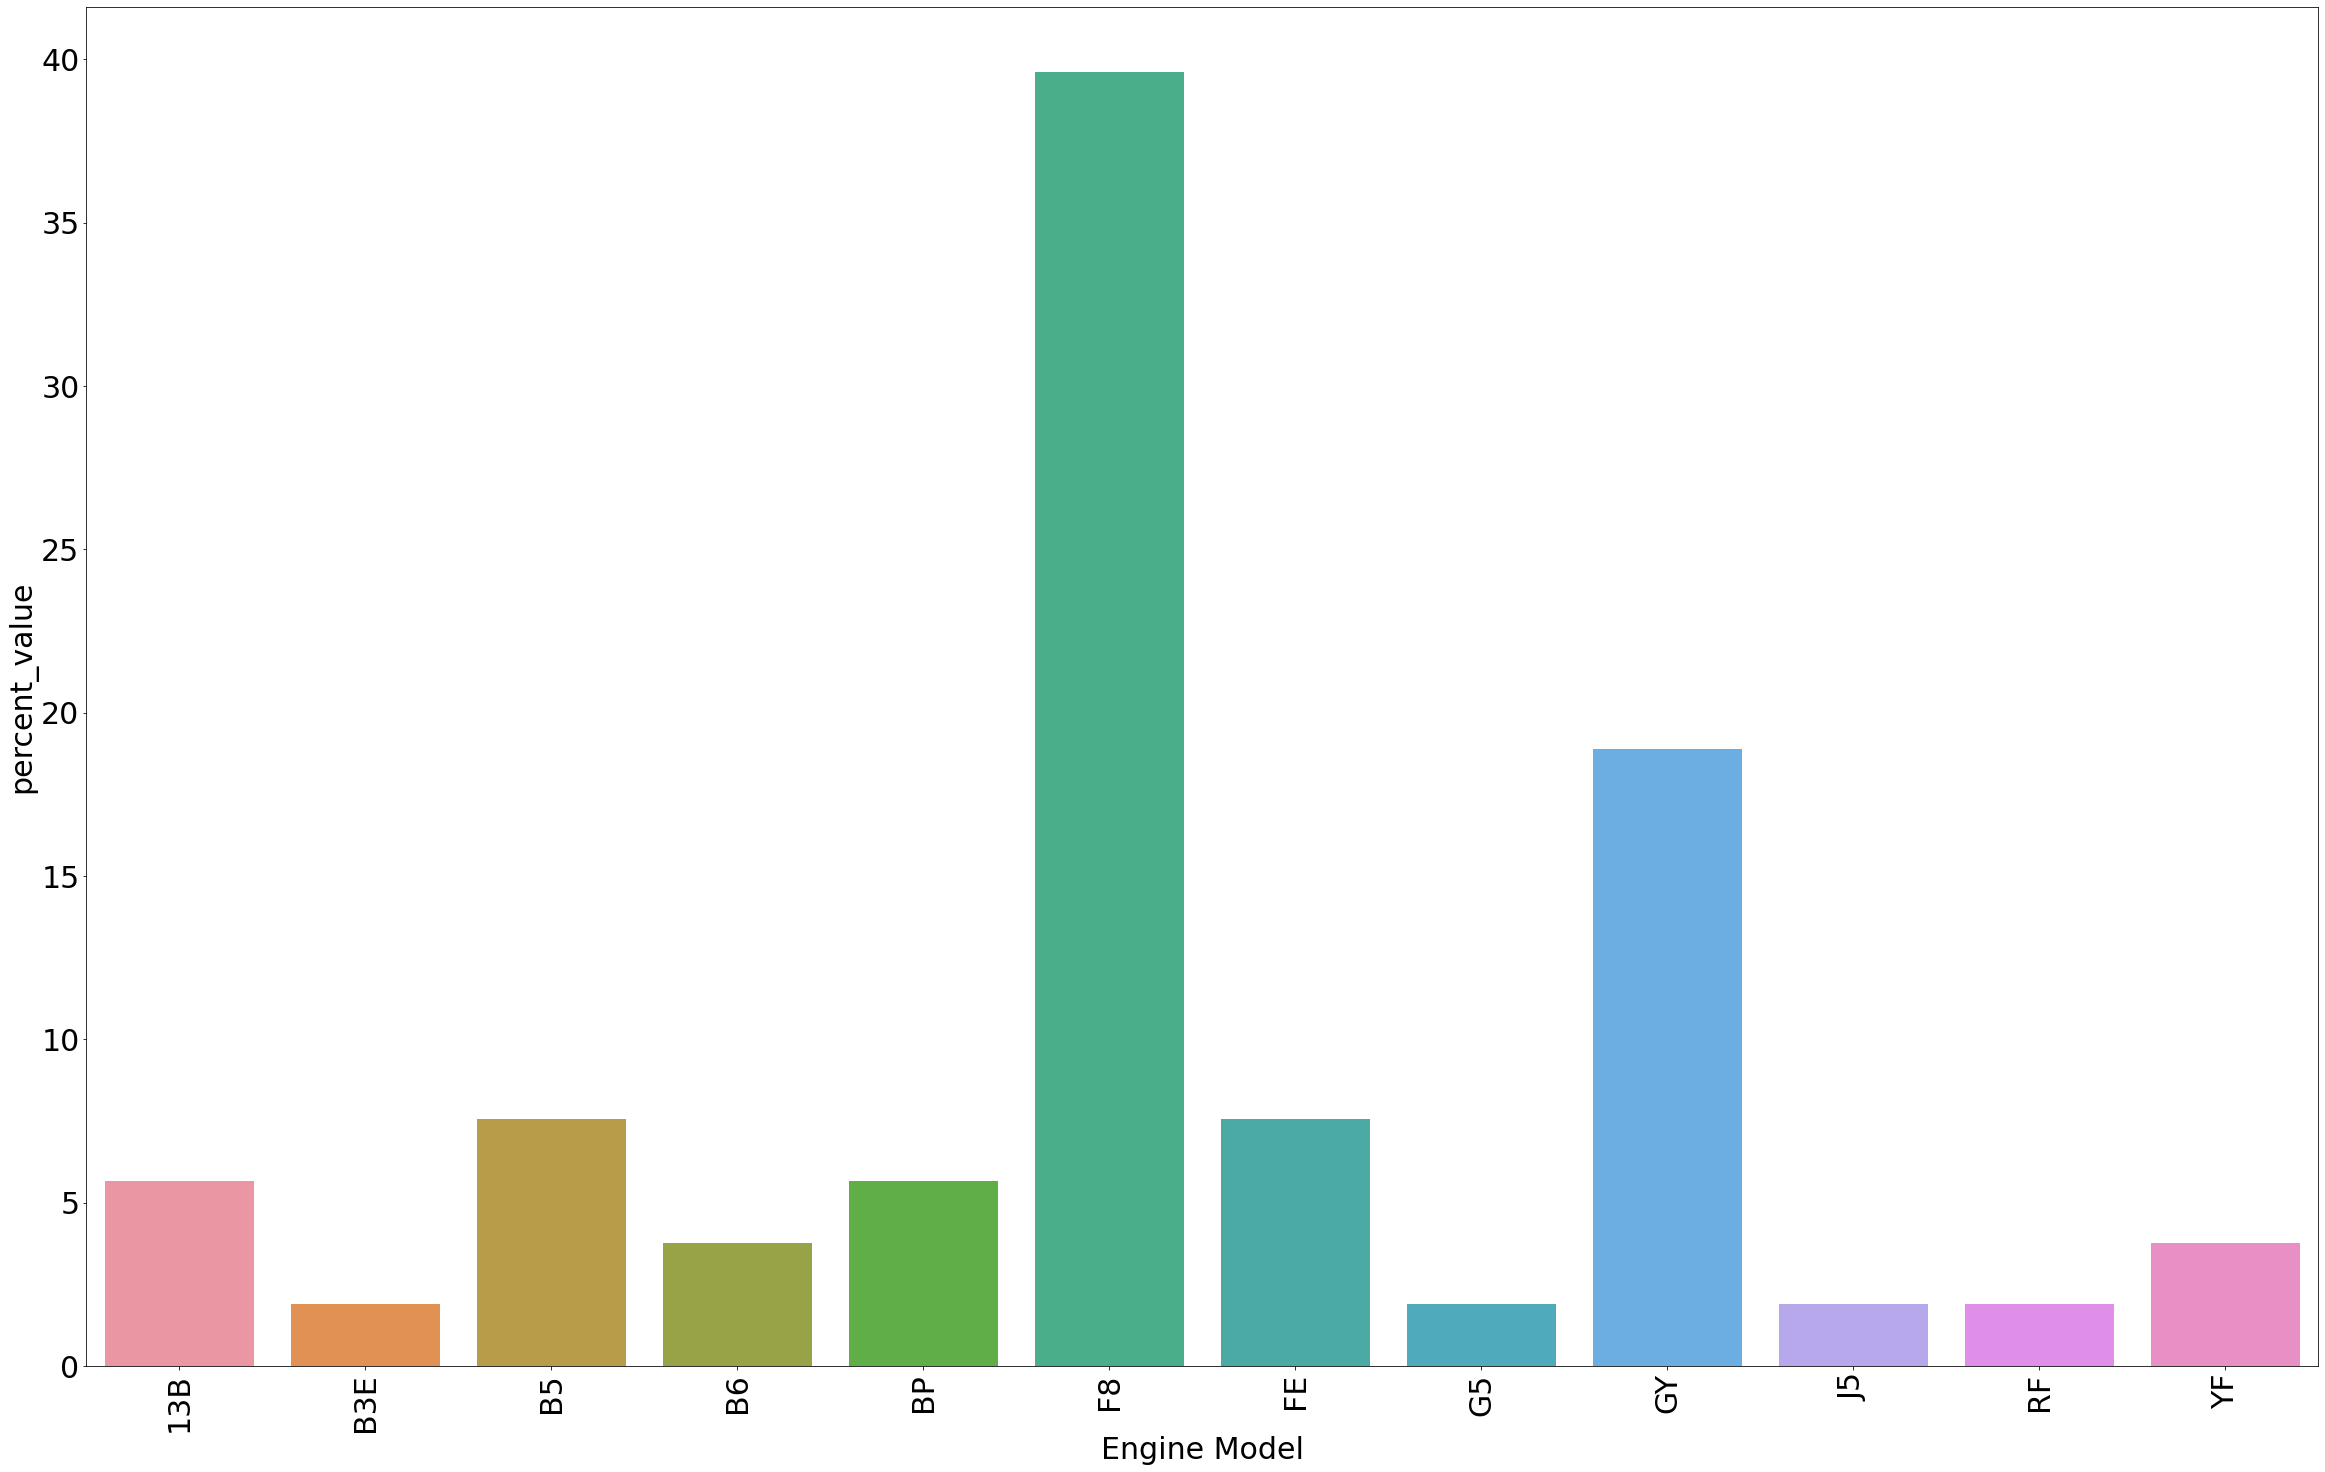

In [56]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Mitsubishi

In [57]:
df_subaru = df_kaiho[df_kaiho.Producer.str.contains('MITSUBISHI')]
df_subaru

Register Date     HS Code  \
27        2011-01-12  8407343009   
47        2011-01-13  8407343009   
2830      2011-03-29  8407343009   
2831      2011-03-29  8407343009   
5244      2011-04-22  8407343009   
...              ...         ...   
258190    2019-12-01  8407343009   
258312    2019-12-01  8407343009   
258974    2019-12-01  8407343009   
258975    2019-12-01  8407343009   
258988    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
47      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
2830    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
2831    ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
5244    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
...                                                   ...   
258190  ДВИГАТЕЛИ БЕНЗИНОВЫЕ БЫВШИЕ В УПОТРЕБЛЕНИИ, В ...   
258312  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258974  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258975  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258988  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
47                                             MITSUBISHI   
2830    TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI, ЯПО...   
2831                           MITSUBISHI, TOYOTA, NISSAN   
5244    HONDA, ISUZU, TOYOTA, MAZDA, SUBARU, NISSAN, M...   
...                                                   ...   
258190                      MITSUBISHI MOTORS CORPORATION   
258312                                         MITSUBISHI   
258974                                         MITSUBISHI   
258975                                         MITSUBISHI   
258988                           MITSUBISHI SUBARU SUZUKI   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
47                                             MITSUBISHI      ВЛАДИВОСТОК   
2830            TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI      ВЛАДИВОСТОК   
2831                           MITSUBISHI, TOYOTA, NISSAN      ВЛАДИВОСТОК   
5244    HONDA, ISUZU, TOYOTA, MAZDA, SUBARU, NISSAN, M...      ВЛАДИВОСТОК   
...                                                   ...              ...   
258190                                         MITSUBISHI        ВОСТОЧНЫЙ   
258312                                         MITSUBISHI      ВЛАДИВОСТОК   
258974                                         MITSUBISHI      ВЛАДИВОСТОК   
258975                                         MITSUBISHI      ВЛАДИВОСТОК   
258988                           MITSUBISHI SUBARU SUZUKI     TOYAMASHINKO   

       Country of Origin Country of Sales  \
27        JP, JPN, Japan   JP, JPN, Japan   
47        JP, JPN, Japan   JP, JPN, Japan   
2830      JP, JPN, Japan   JP, JPN, Japan   
2831      JP, JPN, Japan   JP, JPN, Japan   
5244      JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258190    JP, JPN, Japan   JP, JPN, Japan   
258312    JP, JPN, Japan   JP, JPN, Japan   
258974    JP, JPN, Japan   JP, JPN, Japan   
258975    JP, JPN, Japan   JP, JPN, Japan   
258988    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
27                                  KAIHO SANGYO CO., LTD   
47                                  KAIHO SANGYO CO., LTD   
2830                                KAIHO SANGYO CO., LTD   
2831                                KAIHO SANGYO CO., LTD   
5244                                KAIHO SANGYO CO., LTD   
...                                                   ...   
258190                             KAIHO INDUSTRY CO.LTD.   
258312                              KAIHO INDUSTY CO. LTD   
258974                              KAIHO INDUSTY CO. LTD   
258975              

In [58]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['6G72-LJ3454'],
 ['6A13-BB0453'],
 ['6A13-BB0453'],
 ['4G15-AA4381'],
 ['4A91-0002120', '4G93-LT8635', '4G93-GY0120', '4G93-NQ0157', '6G73-M57313'],
 ['4G63-LR4572', '4G63-PD5853'],
 ['4G63-SS6237', '6A13-BA4120'],
 ['4G93-PG7625', '6G73-027745'],
 ['4G93-LS0586'],
 ['4G63-QL1087', '4G64-YJ1363', '4G93-KJ8138', '4G94-MX8022', '6A12-AS7832'],
 ['4G63-DY7618', '6A12-BD8877'],
 ['4G15-AB7'],
 ['6A12-AS513'],
 ['6A13-BK7231'],
 ['4A31-505917', '4G15-YX7993'],
 ['4G93-CL2972', '6G74-CK4337'],
 ['4G93-KL6702'],
 ['4G15-XJ8006', '4G63-SA5060', '4G92-JJ7003'],
 ['4G64-UJ4903'],
 ['4B12-CX7923', '4G13-TQ2271', '4G13-XA0077', '6A13-BD3258'],
 ['4G15-XC2549'],
 ['4A30-918295'],
 ['4G13-YM8636', '4G63-MS6315', '4G63-QU6934'],
 ['3G83-276963', '4A31-980556', '4G15-AJ4650'],
 ['4G94-ОТСУТСТВУЕТ', '6G72-HA9906'],
 ['4G94-LY6288'],
 ['4A31-849722', '4G93-KJ5093'],
 ['6A13-BK2447'],
 ['3G83-276963', '4A31-980556', '4G15-AJ4650'],
 ['4G93-PG0865'],
 ['4G15-CJ4207'],
 ['6A13-BB5941'],
 ['4G13-YH7917'],

In [59]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [60]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0           6G72
1           6A13
2           6A13
3           4G15
4           4A91
..           ...
217         6G72
218         4G94
219         4G93
220         4G93
221         4G94

[222 rows x 1 columns]

In [61]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          3G83      3           1.35
1          4A30      9           4.05
2          4A31      6           2.70
3          4A90      1           0.45
4          4A91      3           1.35
5          4B12      4           1.80
6          4G13     15           6.76
7          4G15     40          18.02
8          4G63     29          13.06
9          4G64     17           7.66
10  4G64-XY6588      1           0.45
11         4G69      5           2.25
12         4G92      1           0.45
13         4G93     40          18.02
14         4G94     13           5.86
15         6A12      3           1.35
16         6A13     10           4.50
17         6G72     10           4.50
18         6G73      8           3.60
19         6G74      4           1.80

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

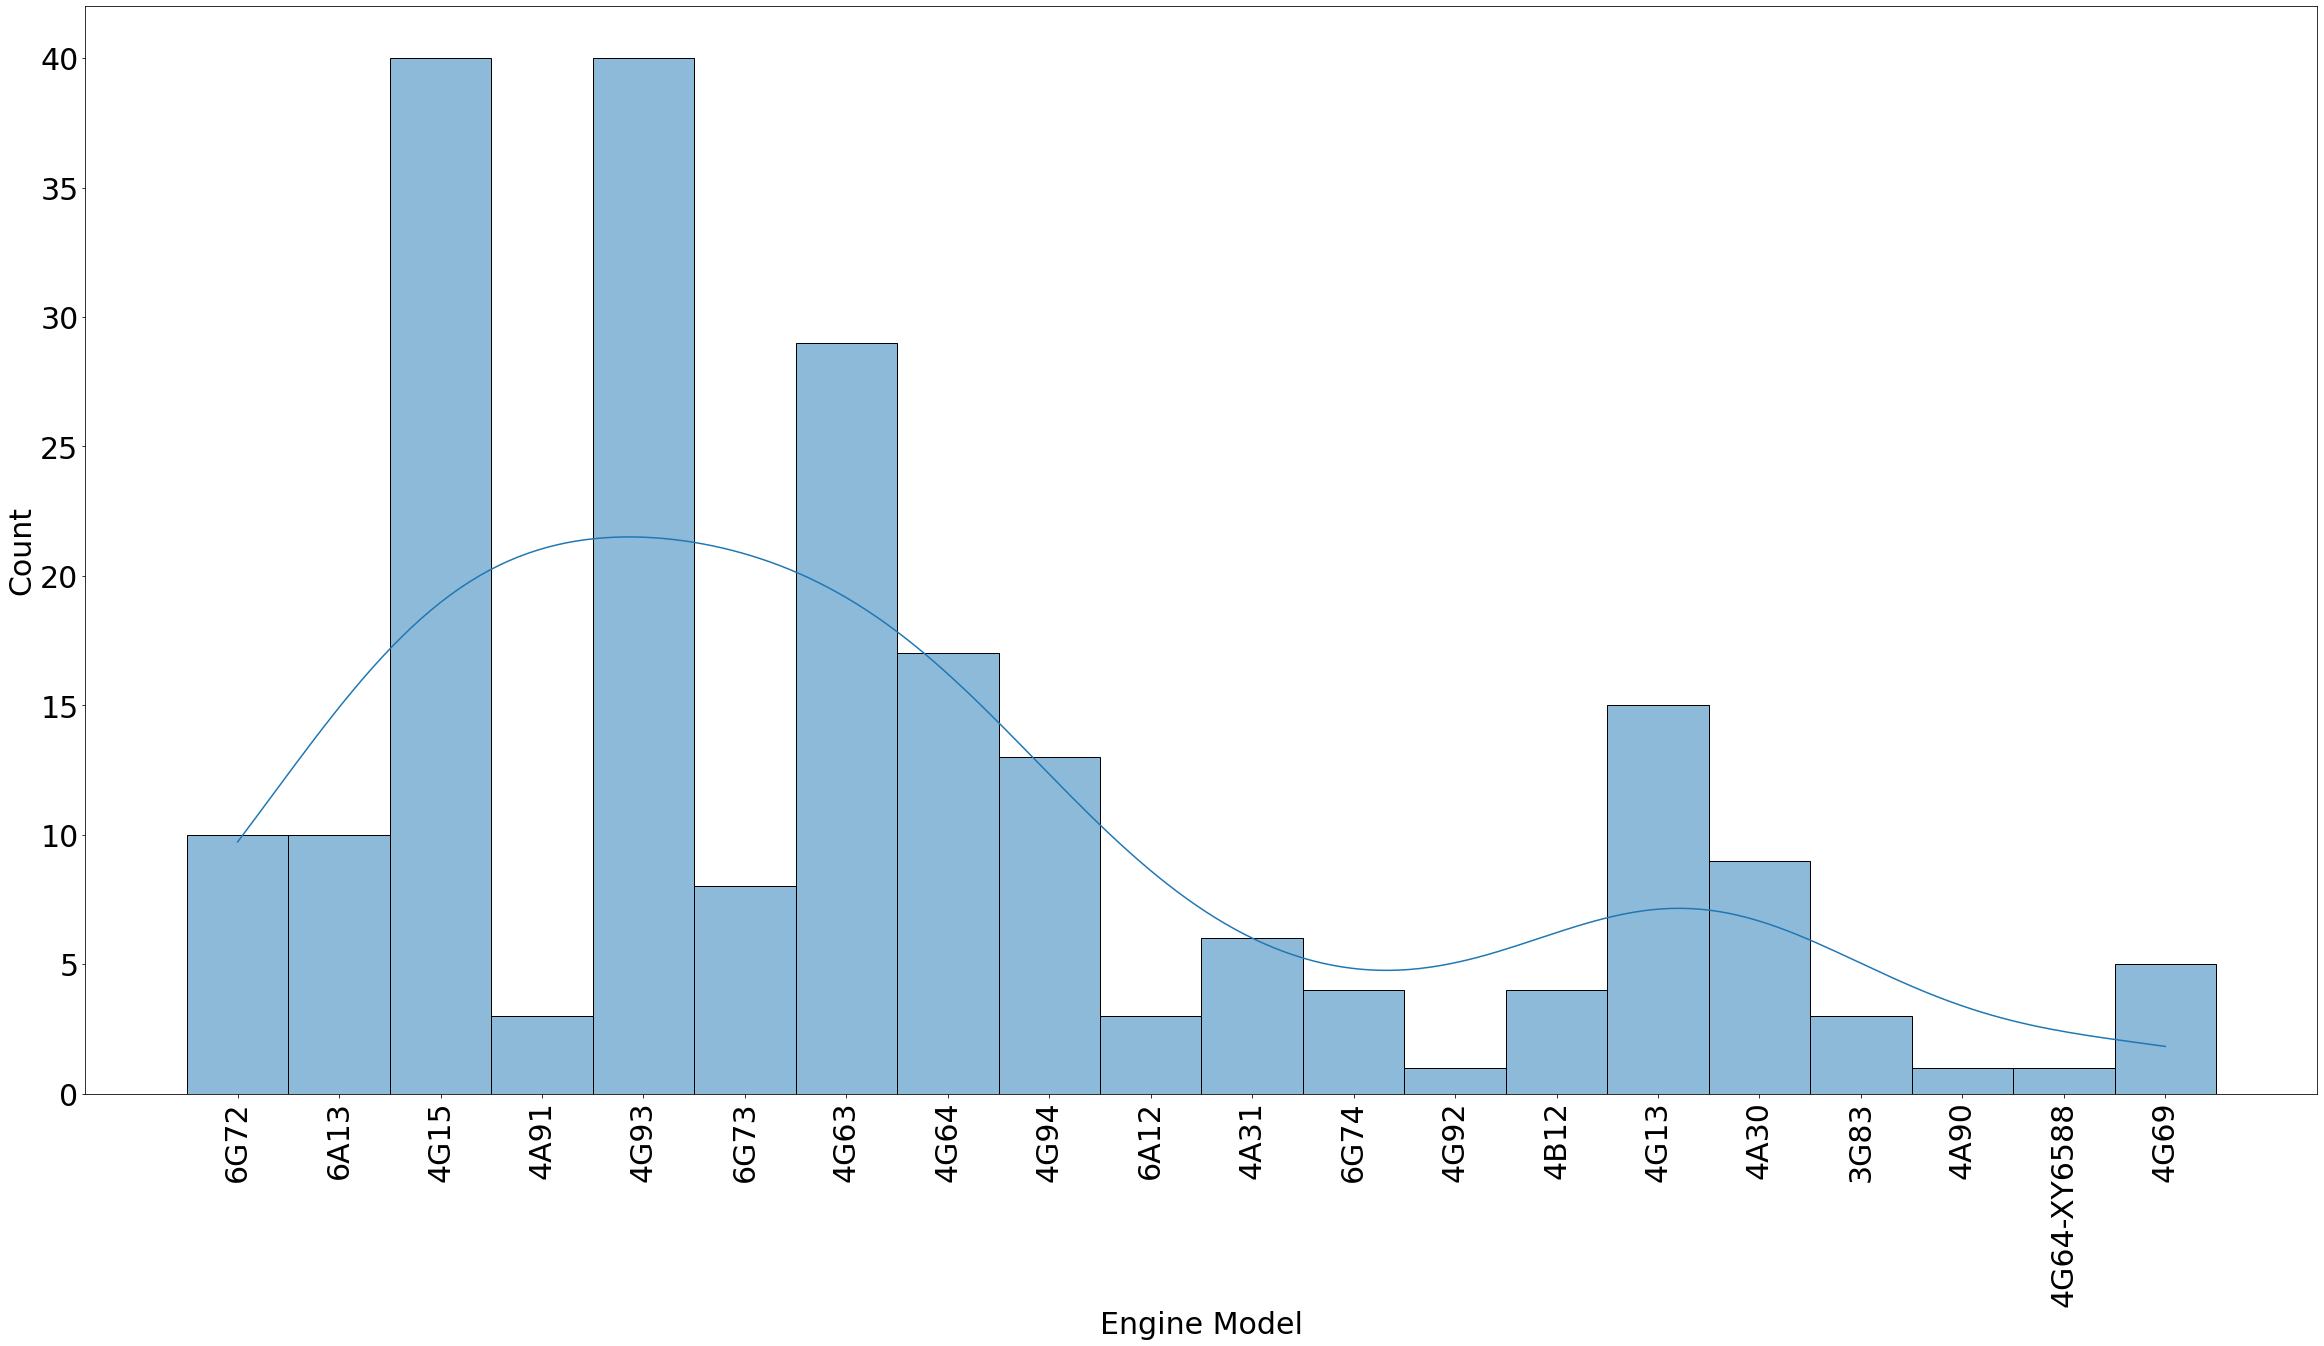

In [62]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

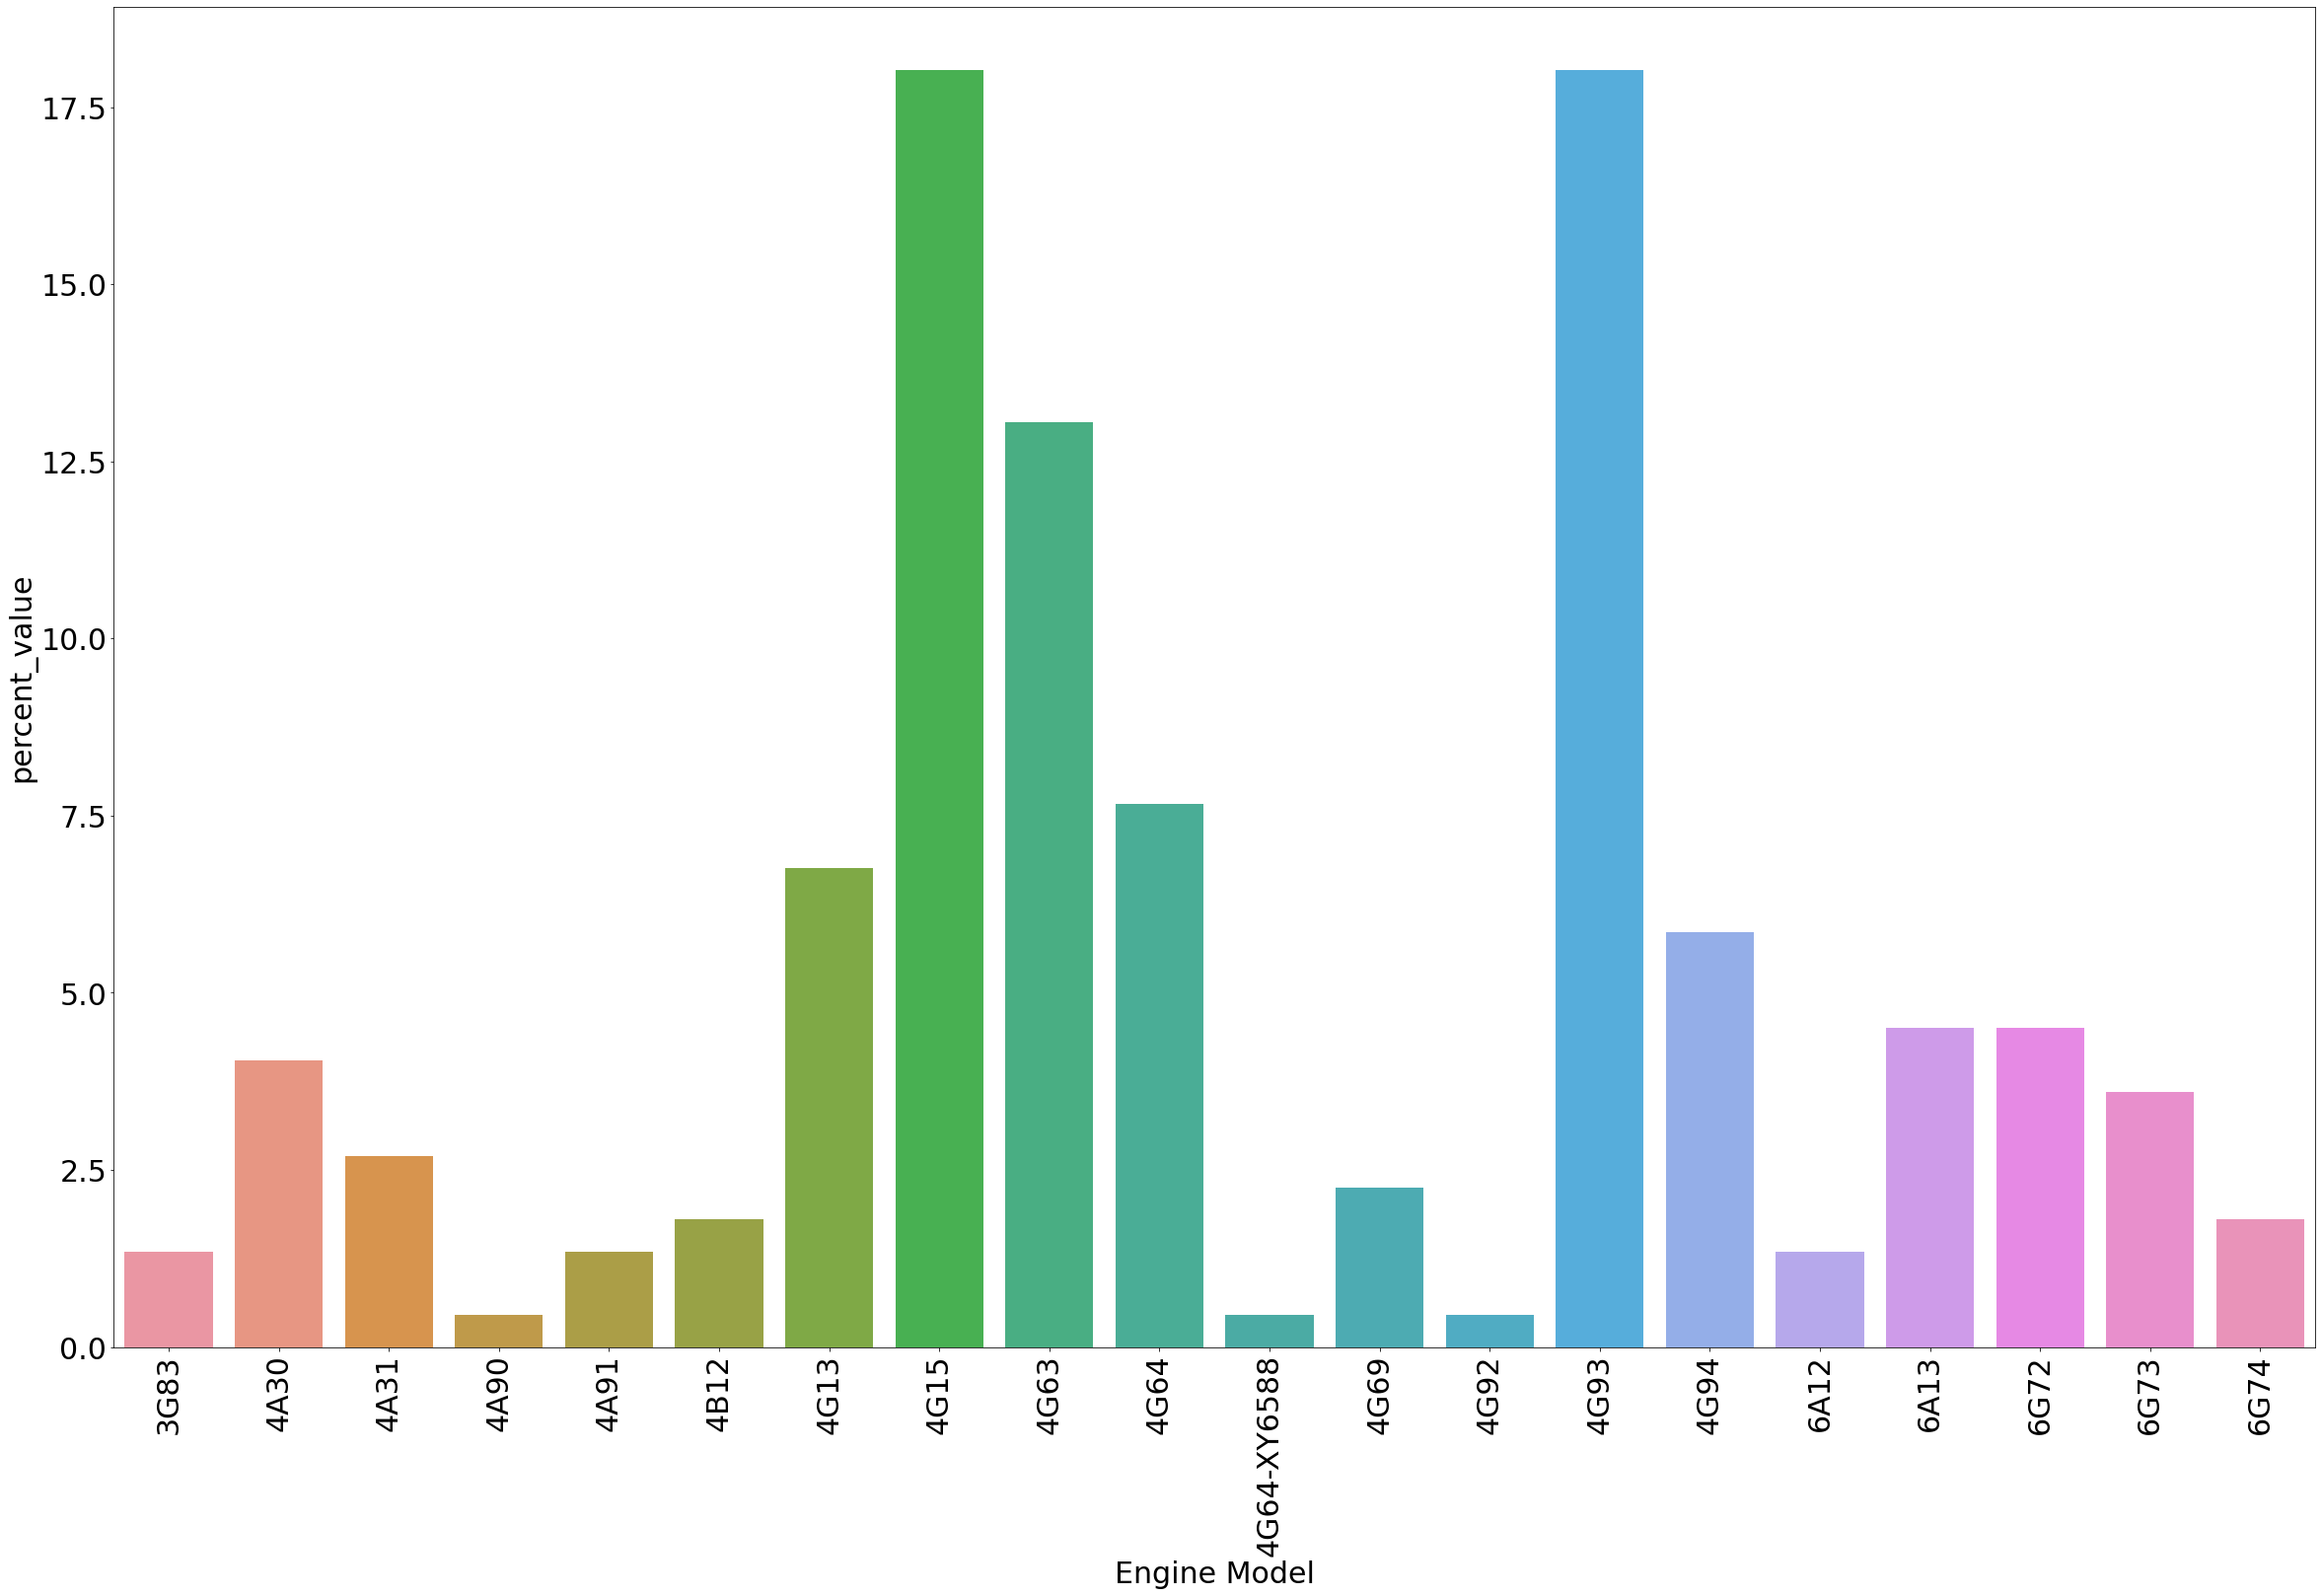

In [63]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Honda

In [64]:
df_subaru = df_kaiho[df_kaiho.Producer.str.contains('HONDA')]
df_subaru

Register Date     HS Code  \
27        2011-01-12  8407343009   
903       2011-01-26  8407343009   
1010      2011-01-25  8407343009   
2874      2011-03-14  8407343009   
5244      2011-04-22  8407343009   
...              ...         ...   
258966    2019-12-01  8407343009   
258967    2019-12-01  8407343009   
258968    2019-12-01  8407343009   
258969    2019-12-01  8407343009   
258985    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
903     БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
1010    ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
2874    ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
5244    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
...                                                   ...   
258966  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258967  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258968  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258969  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258985  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
903     TOYOTA, MAZDA, SUBARU, HONDA, NISSAN, SUZUKI, ...   
1010    TOYOTA MOTOR CORPORATION,SUZUKI MOTOR CORPORAT...   
2874    TOYOTA MOTOR CORPORATION,NISSAN MOTOR CO.,HOND...   
5244    HONDA, ISUZU, TOYOTA, MAZDA, SUBARU, NISSAN, M...   
...                                                   ...   
258966                                              HONDA   
258967                                              HONDA   
258968                                              HONDA   
258969                                              HONDA   
258985                                              HONDA   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
903                          TOYOTA, MAZDA, SUBARU, HONDA      ВЛАДИВОСТОК   
1010                           TOYOTA,HONDA,SUBARU,SUZUKI        ВОСТОЧНЫЙ   
2874                    TOYOTA,HONDA,SUBARU,NISSAN,SUZUKI        ВОСТОЧНЫЙ   
5244    HONDA, ISUZU, TOYOTA, MAZDA, SUBARU, NISSAN, M...      ВЛАДИВОСТОК   
...                                                   ...              ...   
258966                                              HONDA      ВЛАДИВОСТОК   
258967                                              HONDA      ВЛАДИВОСТОК   
258968                                              HONDA      ВЛАДИВОСТОК   
258969                                              HONDA      ВЛАДИВОСТОК   
258985                                              HONDA     TOYAMASHINKO   

       Country of Origin Country of Sales  \
27        JP, JPN, Japan   JP, JPN, Japan   
903       JP, JPN, Japan   JP, JPN, Japan   
1010      JP, JPN, Japan   JP, JPN, Japan   
2874      JP, JPN, Japan   JP, JPN, Japan   
5244      JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258966    JP, JPN, Japan   JP, JPN, Japan   
258967    JP, JPN, Japan   JP, JPN, Japan   
258968    JP, JPN, Japan   JP, JPN, Japan   
258969    JP, JPN, Japan   JP, JPN, Japan   
258985    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
27                                  KAIHO SANGYO CO., LTD   
903                                 KAIHO SANGYO CO., LTD   
1010    KAIHO SANGYO CO.,LTD 1-25 HIGASHI-KAGATSUME KA...   
2874    KAIHO SANGYO CO.,LTD 1-25 HIGASHI-KAGATSUME KA...   
5244                                KAIHO SANGYO CO., LTD   
...                                                   ...   
258966                              KAIHO INDUSTY CO. LTD   
258967                              KAIHO INDUSTY CO. LTD   
258968                              KAIHO INDUSTY CO. LTD   
258969              

In [65]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['B20B-1161655', 'ZC-6212744'],
 ['D16A-8005811', 'D16A-8007326'],
 ['H23A-2010178'],
 ['K20A-1600293'],
 ['B20B-7016277',
  'D15B-3600135',
  'D17A-2000627',
  'F22B-4133510',
  'L15A-1129492',
  'L15A-3012635'],
 ['D16A-1604956'],
 ['D16A-1604956'],
 ['D15B-3239893',
  'D16A-1706918',
  'D16A-8006428',
  'F22B-4263115',
  'F23A-1107555',
  'K20A-1030647',
  'L13A-1522910',
  'L15A-1423022'],
 ['D16A-1604907', 'L13A-4468249'],
 ['D15B-9107919',
  'D15B-3412225',
  'D15B-8013694',
  'F20B-2054097',
  'F22B-4025724',
  'L15A-3038461',
  'L15A-4200908'],
 ['B20B-3261789', 'F18B-2110569', 'J30A-3017481', 'J30A-2000463'],
 ['D13B-6036629', 'D17A-2015160', 'L13A-2044035'],
 ['B20B-5040209',
  'B20B-7023338',
  'B20B-3128681',
  'B20B-7089367',
  'B20B-5410098',
  'D13B-6325864',
  'D15B-3500603',
  'D15B-3638124',
  'F23A-2259698',
  'G25A-2006928',
  'K20A-4003297',
  'L15A-1307869'],
 ['B20B-3303833', 'B20B-3295380', 'B20B-3329624', 'B20B-1155364'],
 ['H23A-2008797'],
 ['B20B-1028539',
 

In [66]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [67]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0           B20B
1             ZC
2           D16A
3           D16A
4           H23A
..           ...
716         H23A
717         B20B
718         F22B
719         F23A
720         F23A

[721 rows x 1 columns]

In [68]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          B16A      1           0.14
1          B18B      3           0.42
2          B20B    139          19.28
3          C35A      3           0.42
4          D13B     29           4.02
5          D15B     69           9.57
6          D16A     62           8.60
7          D17A     48           6.66
8          F18A      1           0.14
9          F18B     13           1.80
10         F20A      2           0.28
11         F20B     45           6.24
12         F22B     18           2.50
13         F23A     47           6.52
14         G20A     17           2.36
15         G25A     14           1.94
16         H22A      1           0.14
17         H23A     28           3.88
18         J25A      7           0.97
19         J30A     14           1.94
20         J32A      7           0.97
21         J35A      2           0.28
22         K20A     37           5.13
23         K20B      2           0.28
24         K24A      6           0.83
25         L13A     58           8.04
26         L15A     20           2.77
27          LDA      5           0.69
28          LEB      2           0.28
29         R18A      7           0.97
30         R20A      2           0.28
31           ZC     12           1.66

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

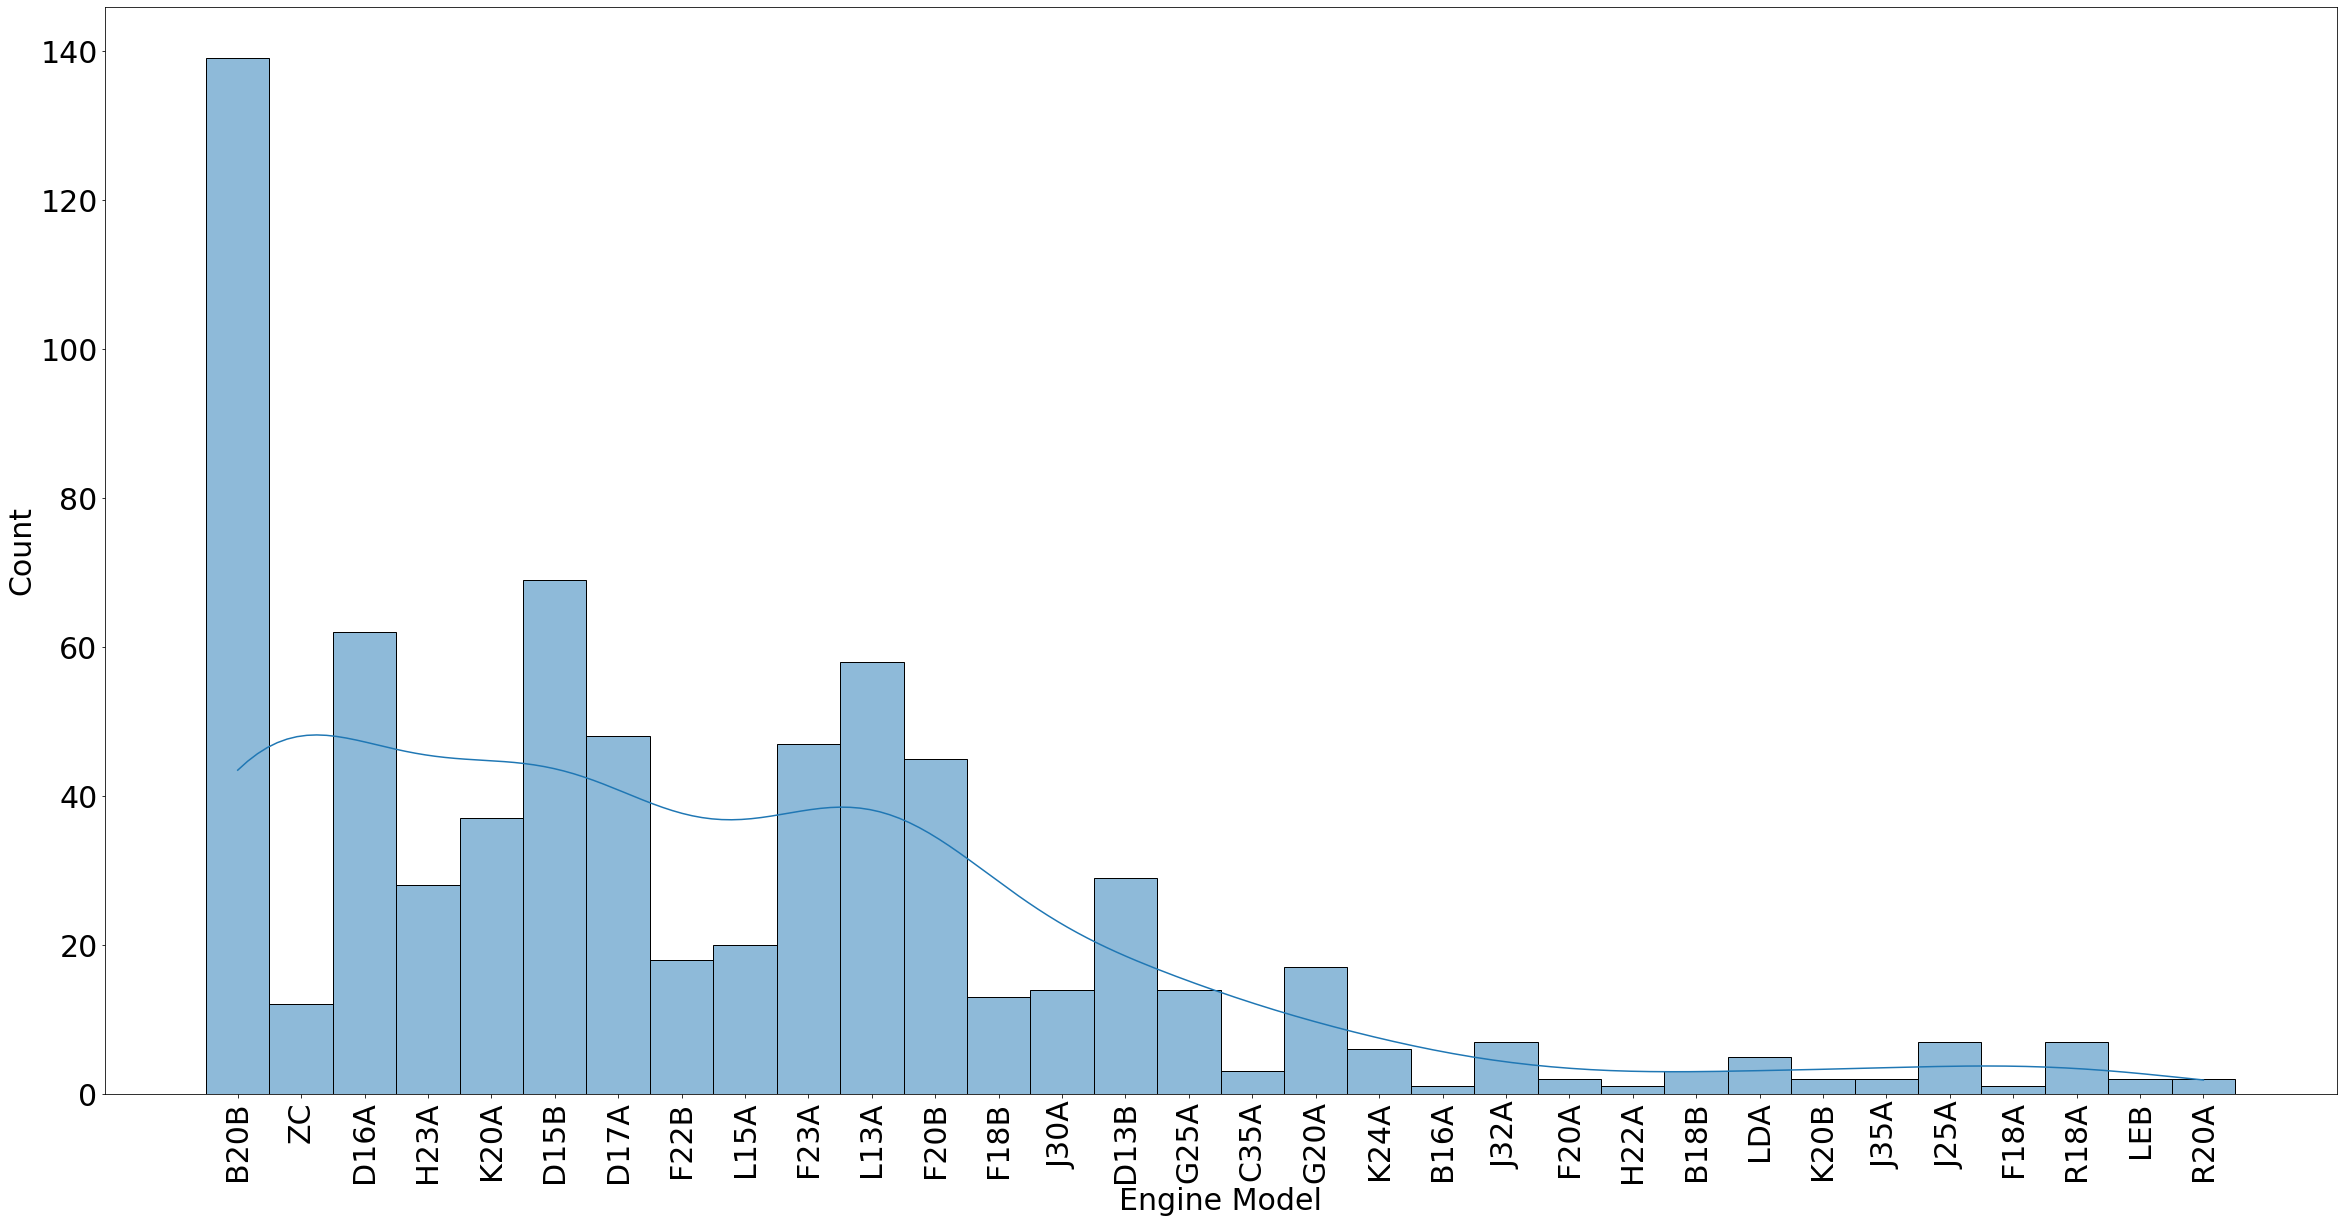

In [69]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

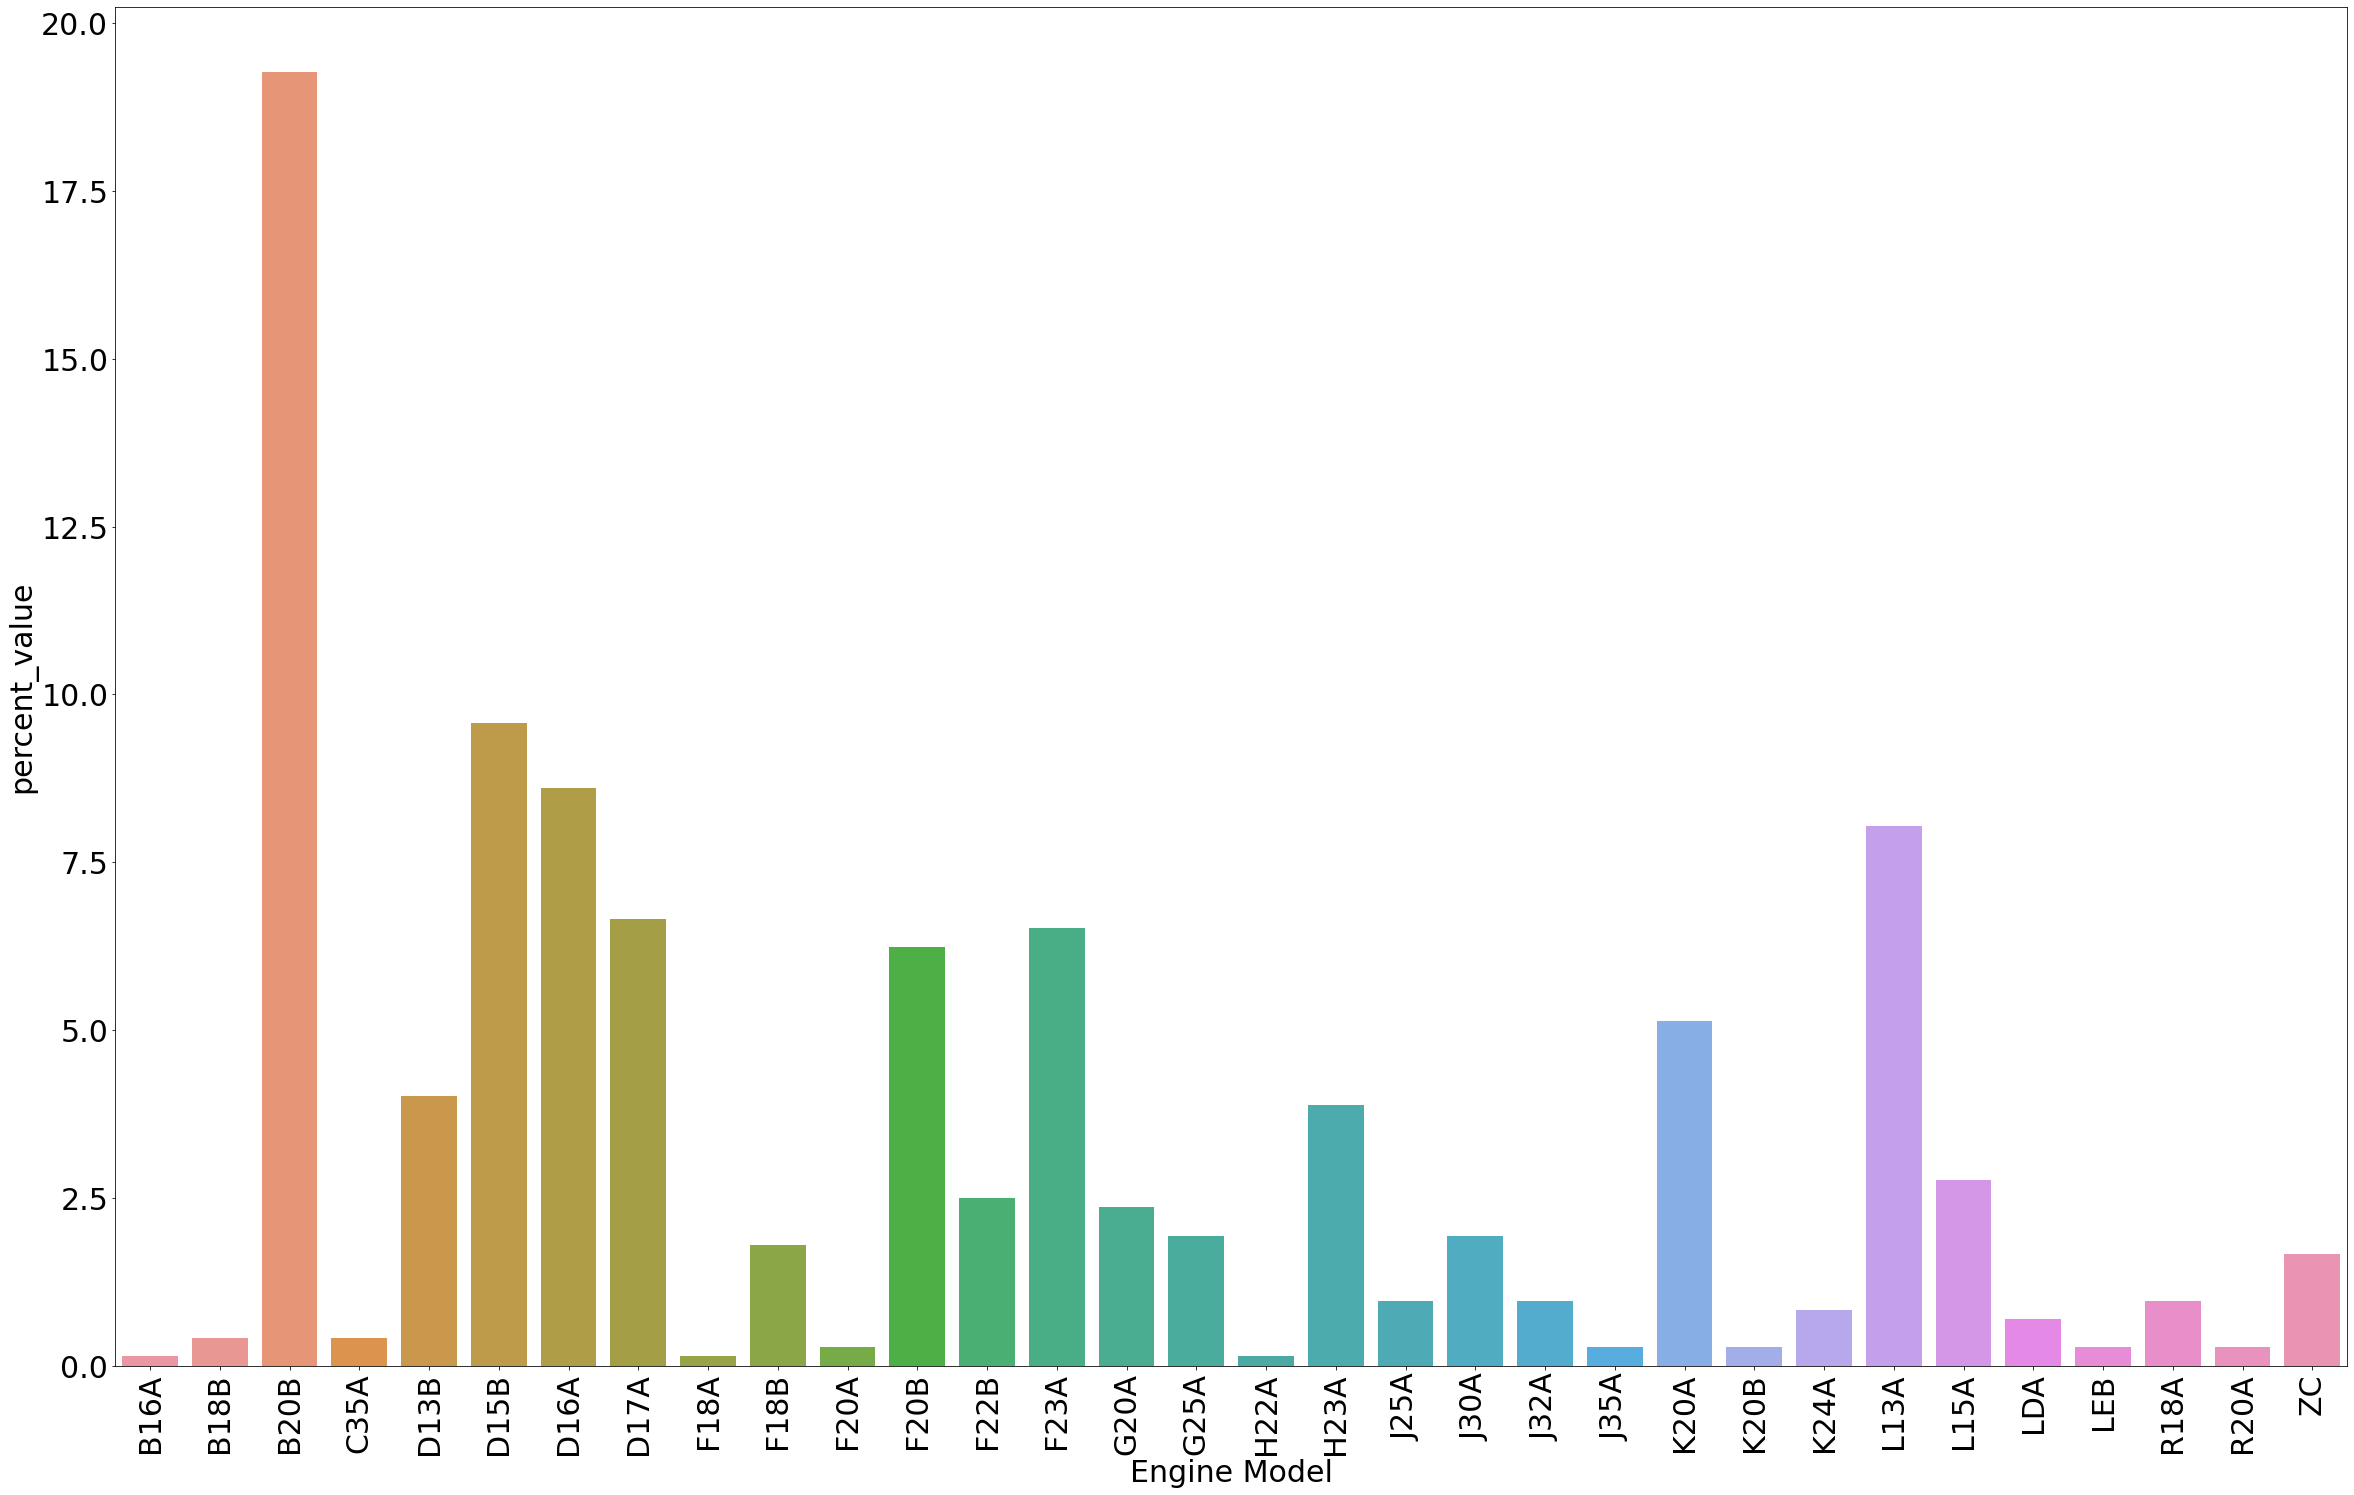

In [70]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Nissan

In [116]:
df_subaru = df_kaiho[df_kaiho.Producer.str.contains('NISSAN')]
df_subaru

Register Date     HS Code  \
27        2011-01-12  8407343009   
37        2011-01-12  8407343009   
903       2011-01-26  8407343009   
923       2011-01-31  8407343009   
2830      2011-03-29  8407343009   
...              ...         ...   
258971    2019-12-01  8407343009   
258972    2019-12-01  8407343009   
258973    2019-12-01  8407343009   
258976    2019-12-01  8407343009   
258987    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
37      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
903     БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
923     ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
2830    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
...                                                   ...   
258971  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258972  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258973  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258976  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258987  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
37                                         TOYOTA, NISSAN   
903     TOYOTA, MAZDA, SUBARU, HONDA, NISSAN, SUZUKI, ...   
923                                        NISSAN, TOYOTA   
2830    TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI, ЯПО...   
...                                                   ...   
258971                                             NISSAN   
258972                                             NISSAN   
258973                                             NISSAN   
258976                                             NISSAN   
258987                                             NISSAN   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
37                                         TOYOTA, NISSAN      ВЛАДИВОСТОК   
903                          TOYOTA, MAZDA, SUBARU, HONDA      ВЛАДИВОСТОК   
923                                        NISSAN, TOYOTA      ВЛАДИВОСТОК   
2830            TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI      ВЛАДИВОСТОК   
...                                                   ...              ...   
258971                                             NISSAN      ВЛАДИВОСТОК   
258972                                             NISSAN      ВЛАДИВОСТОК   
258973                                             NISSAN      ВЛАДИВОСТОК   
258976                                             NISSAN      ВЛАДИВОСТОК   
258987                                             NISSAN     TOYAMASHINKO   

       Country of Origin Country of Sales  \
27        JP, JPN, Japan   JP, JPN, Japan   
37        JP, JPN, Japan   JP, JPN, Japan   
903       JP, JPN, Japan   JP, JPN, Japan   
923       JP, JPN, Japan   JP, JPN, Japan   
2830      JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258971    JP, JPN, Japan   JP, JPN, Japan   
258972    JP, JPN, Japan   JP, JPN, Japan   
258973    JP, JPN, Japan   JP, JPN, Japan   
258976    JP, JPN, Japan   JP, JPN, Japan   
258987    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
27                                  KAIHO SANGYO CO., LTD   
37                                  KAIHO SANGYO CO., LTD   
903                                 KAIHO SANGYO CO., LTD   
923                                 KAIHO SANGYO CO., LTD   
2830                                KAIHO SANGYO CO., LTD   
...                                                   ...   
258971                              KAIHO INDUSTY CO. LTD   
258972                              KAIHO INDUSTY CO. LTD   
258973                              KAIHO INDUSTY CO. LTD   
258976              

In [117]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['VG33E-330064'],
 ['RB20-670340A'],
 ['TD27-033042A', 'TD27-097368A'],
 ['RB20-199458B'],
 ['RB20-115420B'],
 ['RB20-163407B', 'RB20-159326B'],
 ['RB20-937506A'],
 ['RB20-159825A'],
 ['RB20-259872B', 'RB20-226952B', 'RB20-148469B'],
 ['RB20-967844A'],
 ['NA20-002635W', 'NA20-002637W', 'NA20-701029X'],
 ['NA16-704307'],
 ['RB20-198247A'],
 ['RB20-896956A'],
 ['RB20-194786A'],
 ['NA16-013079'],
 ['VK45DE-077647'],
 ['RB20-164473B'],
 ['RB20-714557A'],
 ['RB20-205440B'],
 ['QR20DE-122421A'],
 ['RB20-27'],
 ['Z20-831743X'],
 ['D5-090867'],
 ['D5-090867'],
 ['RB20-911577A'],
 ['QD32-053804A'],
 ['RB20-176543B'],
 ['MR20DE-398403A'],
 ['VQ35DE-968752B'],
 ['VQ23DE-031369A'],
 ['SR20DE-190904B'],
 ['QR20DE-144379A'],
 ['MR20DE-217681A'],
 ['QG15DE-430163A'],
 ['QG15DE-245452A'],
 ['QG15DE-242800B'],
 ['QG15DE-268954'],
 ['CR14DE-351658'],
 ['RB20-710043X'],
 ['HR16DE-372927C', 'QR20DE-462578A', 'QR20DE-253025A', 'SR18DE-012854W']]

In [118]:
len(list_all_engine_model_toyota_GTO_JP_filter)

41

In [74]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [75]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0         VG33E
1          RB20
2          TD27
3          TD27
4          RB20
5          RB20
6          RB20
7          RB20
8          RB20
9          RB20
10         RB20
11         RB20
12         RB20
13         RB20
14         NA20
15         NA20
16         NA20
17         NA16
18         RB20
19         RB20
20         RB20
21         NA16
22       VK45DE
23         RB20
24         RB20
25         RB20
26       QR20DE
27         RB20
28          Z20
29           D5
30           D5
31         RB20
32         QD32
33         RB20
34       MR20DE
35       VQ35DE
36       VQ23DE
37       SR20DE
38       QR20DE
39       MR20DE
40       QG15DE
41       QG15DE
42       QG15DE
43       QG15DE
44       CR14DE
45         RB20
46       HR16DE
47       QR20DE
48       QR20DE
49       SR18DE

In [76]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0        CR14DE      1            2.0
1            D5      2            4.0
2        HR16DE      1            2.0
3        MR20DE      2            4.0
4          NA16      2            4.0
5          NA20      3            6.0
6          QD32      1            2.0
7        QG15DE      4            8.0
8        QR20DE      4            8.0
9          RB20     21           42.0
10       SR18DE      1            2.0
11       SR20DE      1            2.0
12         TD27      2            4.0
13        VG33E      1            2.0
14       VK45DE      1            2.0
15       VQ23DE      1            2.0
16       VQ35DE      1            2.0
17          Z20      1            2.0

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

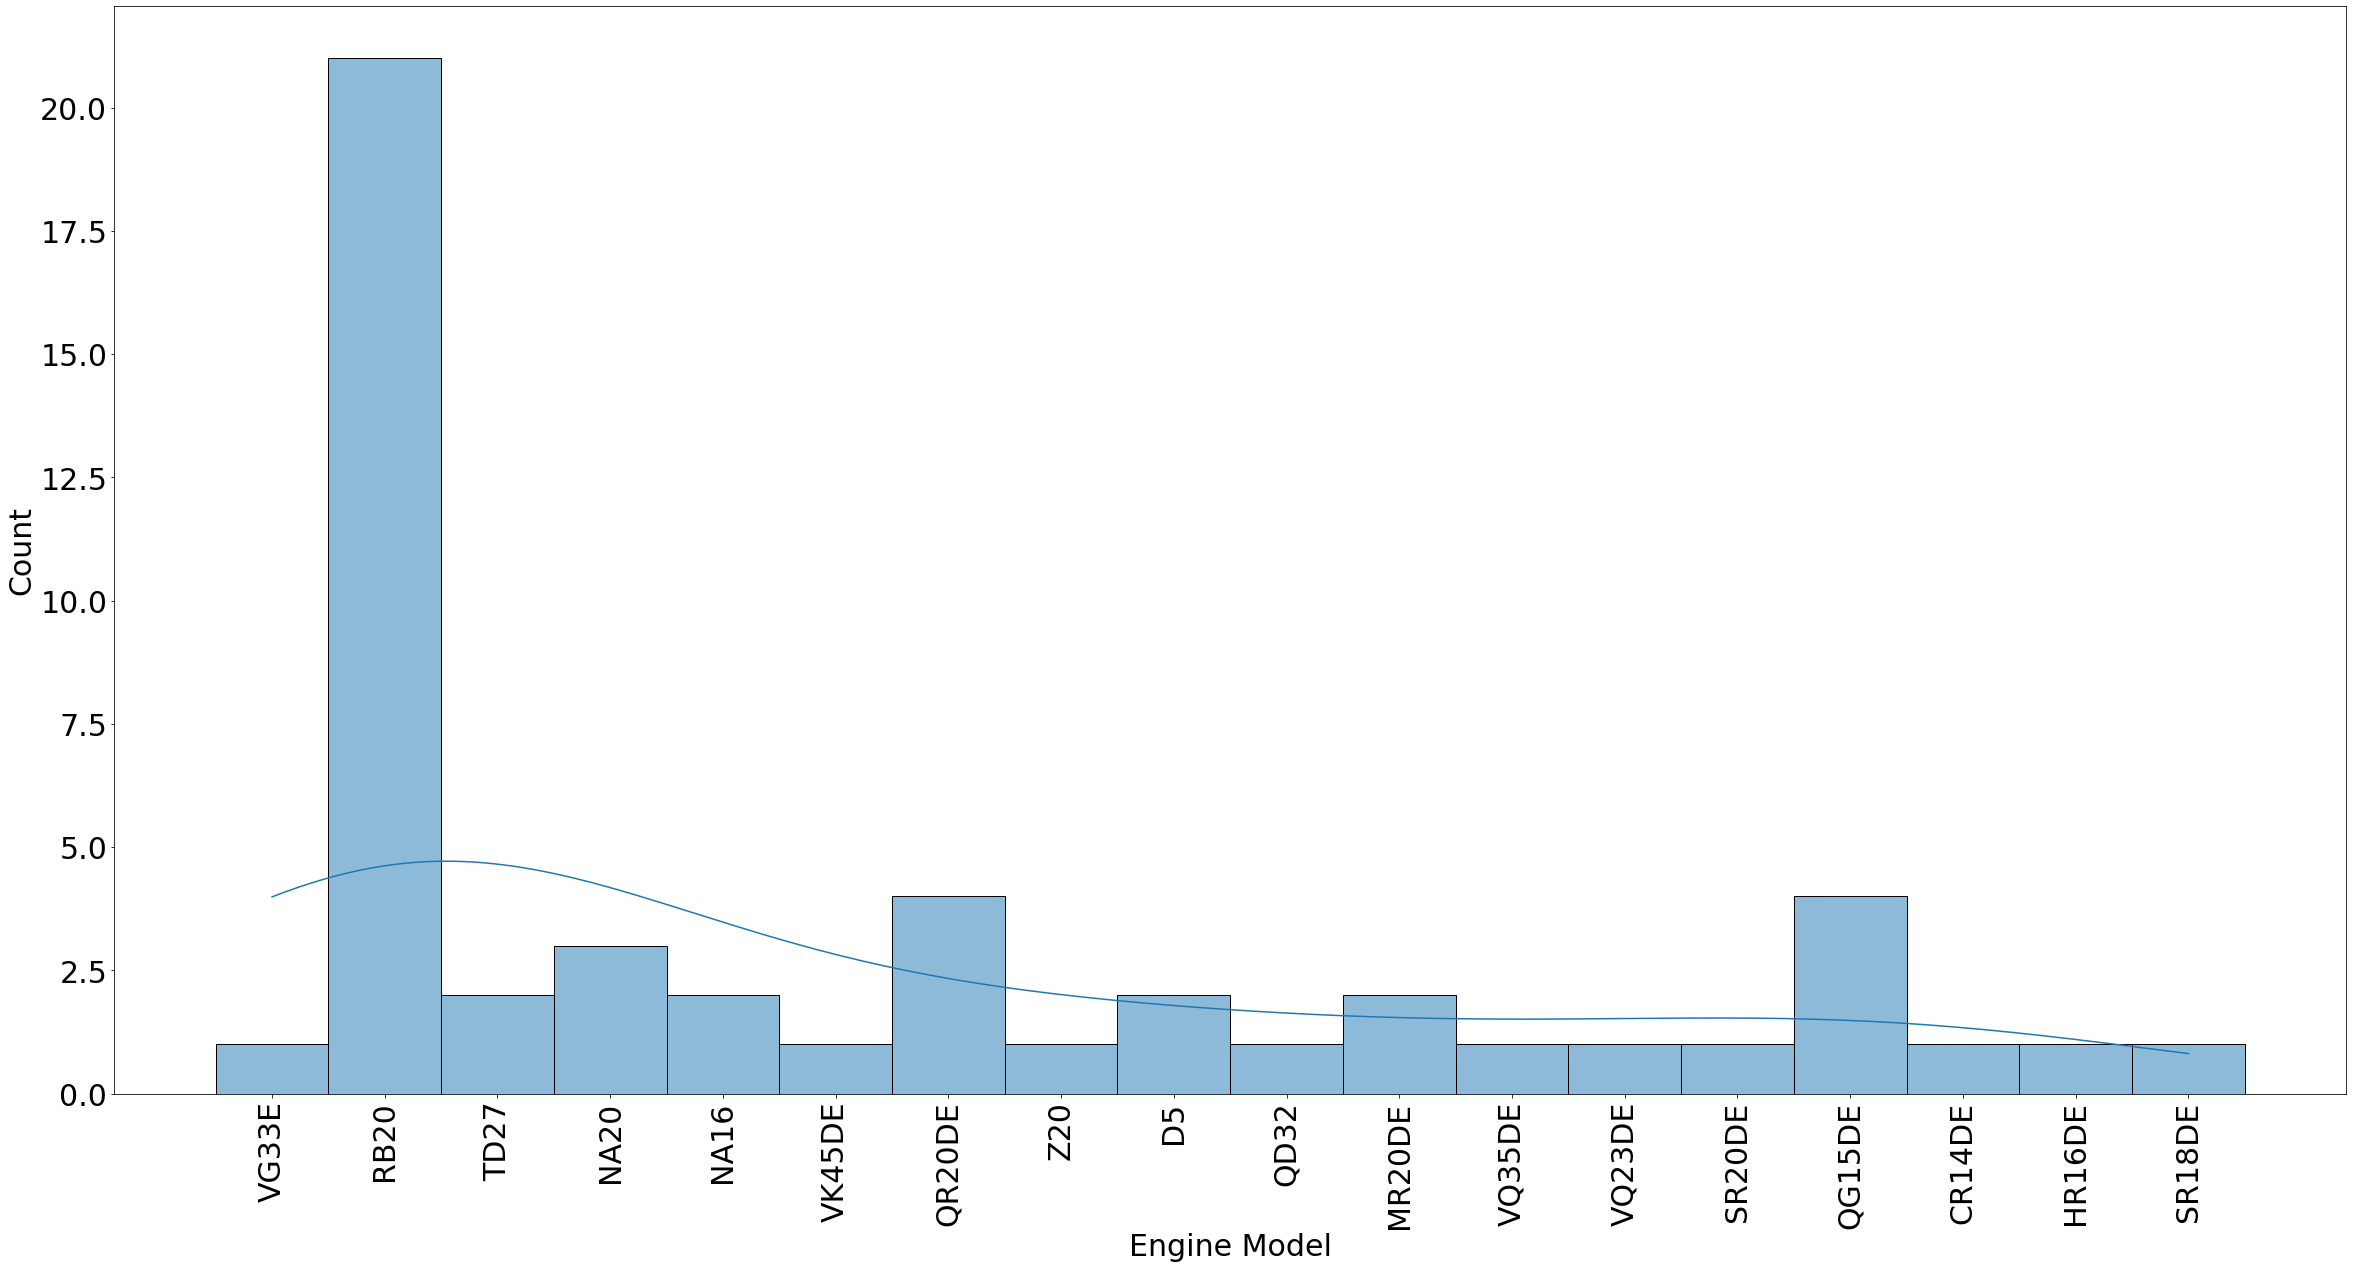

In [77]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

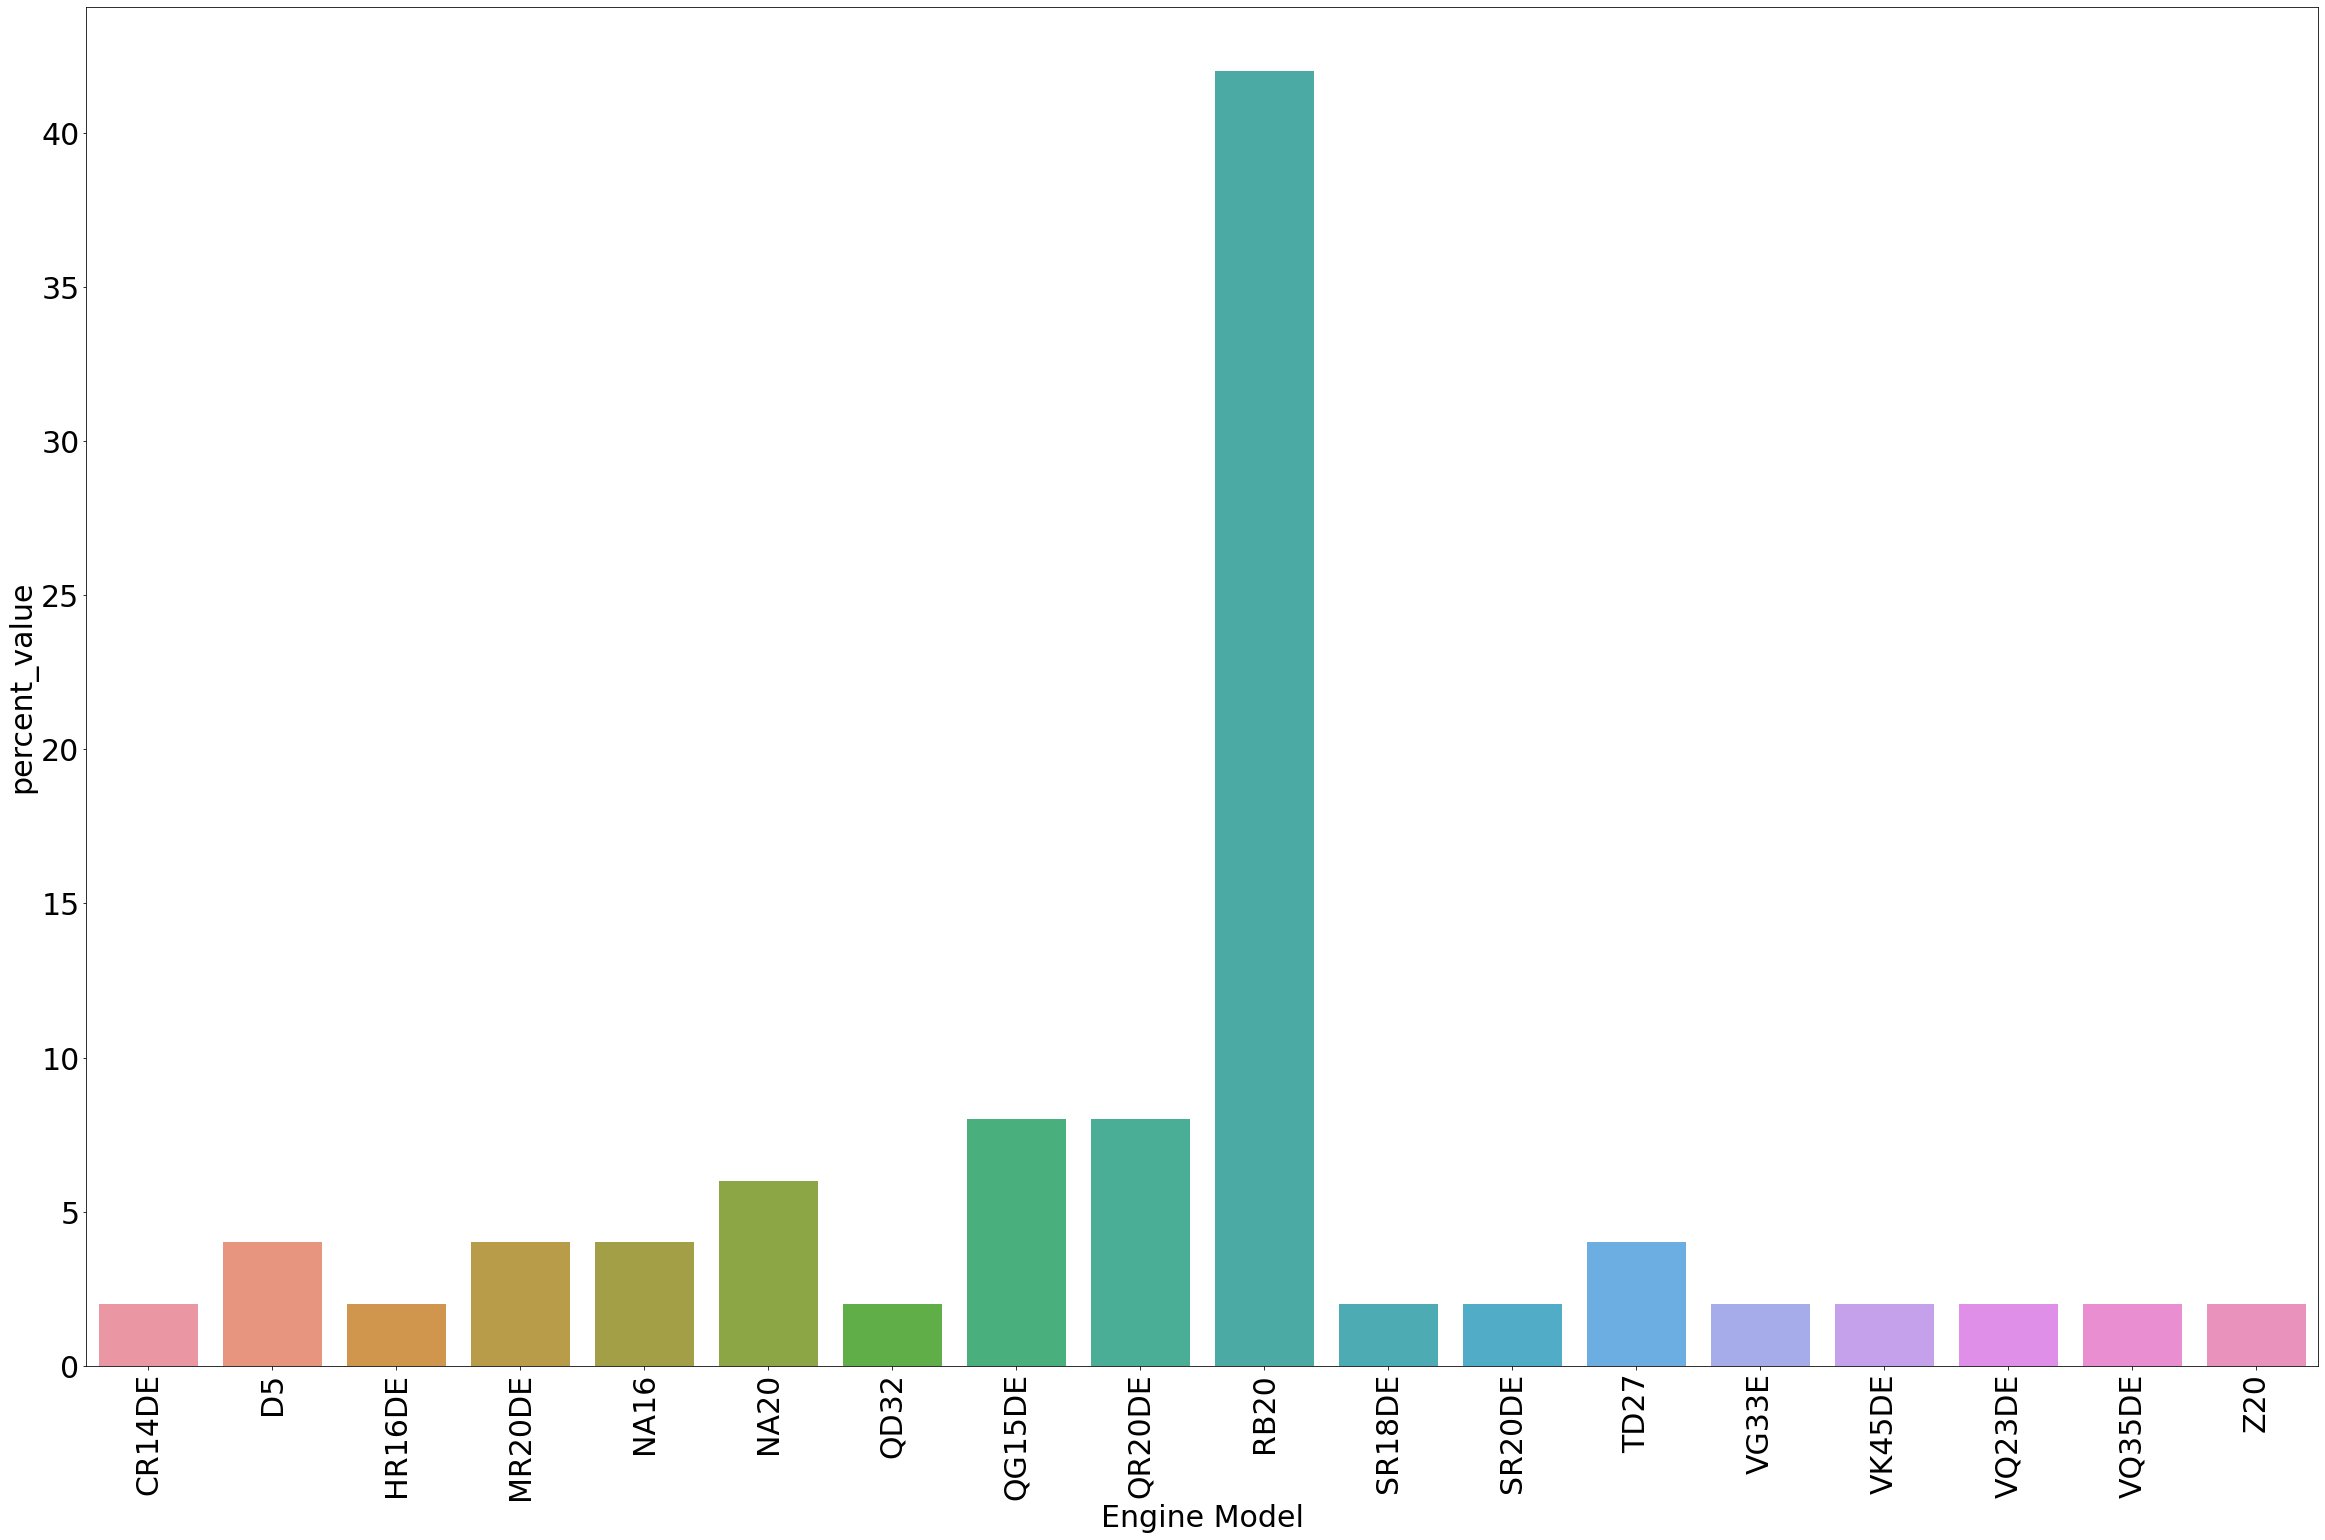

In [78]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# SUBARU

In [126]:
df_subaru = df_kaiho[df_kaiho.Producer.str.contains('SUBARU')]
df_subaru


Register Date     HS Code  \
27        2011-01-12  8407343009   
903       2011-01-26  8407343009   
2830      2011-03-29  8407343009   
2874      2011-03-14  8407343009   
2905      2011-03-18  8407343009   
...              ...         ...   
253300    2019-11-01  8407343009   
253301    2019-11-01  8407343009   
253302    2019-11-01  8407343009   
258977    2019-12-01  8407343009   
258988    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
903     БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
2830    БЕНЗИНОВЫЕ ДВИГАТЕЛИ РАБ. ОБЪЕМОМ СВЫШЕ 1000 К...   
2874    ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
2905    ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
...                                                   ...   
253300  ЗАП,ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
253301  ЗАП,ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
253302  ЗАП,ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258977  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
258988  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
903     TOYOTA, MAZDA, SUBARU, HONDA, NISSAN, SUZUKI, ...   
2830    TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI, ЯПО...   
2874    TOYOTA MOTOR CORPORATION,NISSAN MOTOR CO.,HOND...   
2905    TOYOTA MOTOR CORPORATION,FUJI HEAVY INDUSTRIES...   
...                                                   ...   
253300                                             SUBARU   
253301                                             SUBARU   
253302                                             SUBARU   
258977                                             SUBARU   
258988                           MITSUBISHI SUBARU SUZUKI   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
903                          TOYOTA, MAZDA, SUBARU, HONDA      ВЛАДИВОСТОК   
2830            TOYOTA, MAZDA, SUBARU, NISSAN, MITSUBISHI      ВЛАДИВОСТОК   
2874                    TOYOTA,HONDA,SUBARU,NISSAN,SUZUKI        ВОСТОЧНЫЙ   
2905                                       TOYOTA,SUBARUI        ВОСТОЧНЫЙ   
...                                                   ...              ...   
253300                                             SUBARU      ВЛАДИВОСТОК   
253301                                             SUBARU      ВЛАДИВОСТОК   
253302                                             SUBARU      ВЛАДИВОСТОК   
258977                                             SUBARU      ВЛАДИВОСТОК   
258988                           MITSUBISHI SUBARU SUZUKI     TOYAMASHINKO   

       Country of Origin Country of Sales  \
27        JP, JPN, Japan   JP, JPN, Japan   
903       JP, JPN, Japan   JP, JPN, Japan   
2830      JP, JPN, Japan   JP, JPN, Japan   
2874      JP, JPN, Japan   JP, JPN, Japan   
2905      JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
253300             JAPAN            JAPAN   
253301             JAPAN            JAPAN   
253302             JAPAN            JAPAN   
258977    JP, JPN, Japan   JP, JPN, Japan   
258988    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
27                                  KAIHO SANGYO CO., LTD   
903                                 KAIHO SANGYO CO., LTD   
2830                                KAIHO SANGYO CO., LTD   
2874    KAIHO SANGYO CO.,LTD 1-25 HIGASHI-KAGATSUME KA...   
2905    KAIHO SANGYO CO.,LTD 1-25 HIGASHI-KAGATSUME KA...   
...                                                   ...   
253300                             KAIHO INDUSTRY CO.LTD.   
253301                             KAIHO INDUSTRY CO.LTD.   
253302                             KAIHO INDUSTRY CO.LTD.   
258977              

In [127]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['EJ25-701920'],
 ['EJ20-B057765', 'EJ20-B891486'],
 ['EJ20-78'],
 ['EJ20-A8818'],
 ['EJ20-071738', 'EJ20-564390'],
 ['EJ15-D305273', 'EJ20-A900585', 'EJ20-A927013', 'EJ20-B100932'],
 ['EJ25-302761'],
 ['EJ20-B554558', 'EJ20-A977974'],
 ['EJ20-B847452', 'EJ20-A838072'],
 ['EJ20-B358933'],
 ['EJ20-423'],
 ['EJ20-B354304'],
 ['EJ25-657633'],
 ['EJ20-757687'],
 ['EJ20-306374'],
 ['EJ20-743501'],
 ['EJ20-198435'],
 ['EJ20-A871662'],
 ['EJ25-376354'],
 ['EJ20-B656586'],
 ['EJ20-B538554'],
 ['EJ20-B093448'],
 ['EJ20-947974', 'EJ25-439931', 'EJ25-125633'],
 ['EJ20-B625439'],
 ['EJ20-B847691'],
 ['EJ20-B034614', 'EZ30-U004521'],
 ['EJ20-729120', 'EJ20-917093HONDA', 'EJ20-B054149'],
 ['EJ20-A902671'],
 ['EJ25-795782'],
 ['EJ20-A840687', 'EJ20-B139837'],
 ['EJ15-C318554', 'EJ20-B280748', 'EZ30-U006073'],
 ['EJ20-C228285'],
 ['EJ15-B608800', 'EJ20-B589026'],
 ['EJ20-B231005'],
 ['EJ20-U099701', 'EJ20-CN533111'],
 ['EJ20-B613509', 'EJ20-C151248', 'EJ25-356025'],
 ['EJ20-B826669'],
 ['EJ20-B929087

In [128]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [129]:
len(list_all_engine_model_toyota_GTO_JP_filter)

57

In [130]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0           EJ25
1           EJ20
2           EJ20
3           EJ20
4           EJ20
..           ...
102         EJ20
103         EJ25
104         FB20
105         EJ20
106         EJ15

[107 rows x 1 columns]

In [131]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0         EJ15      8           7.48
1         EJ20     73          68.22
2         EJ25     15          14.02
3         EL15      2           1.87
4         EN07      2           1.87
5         EZ30      5           4.67
6         FB20      2           1.87

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

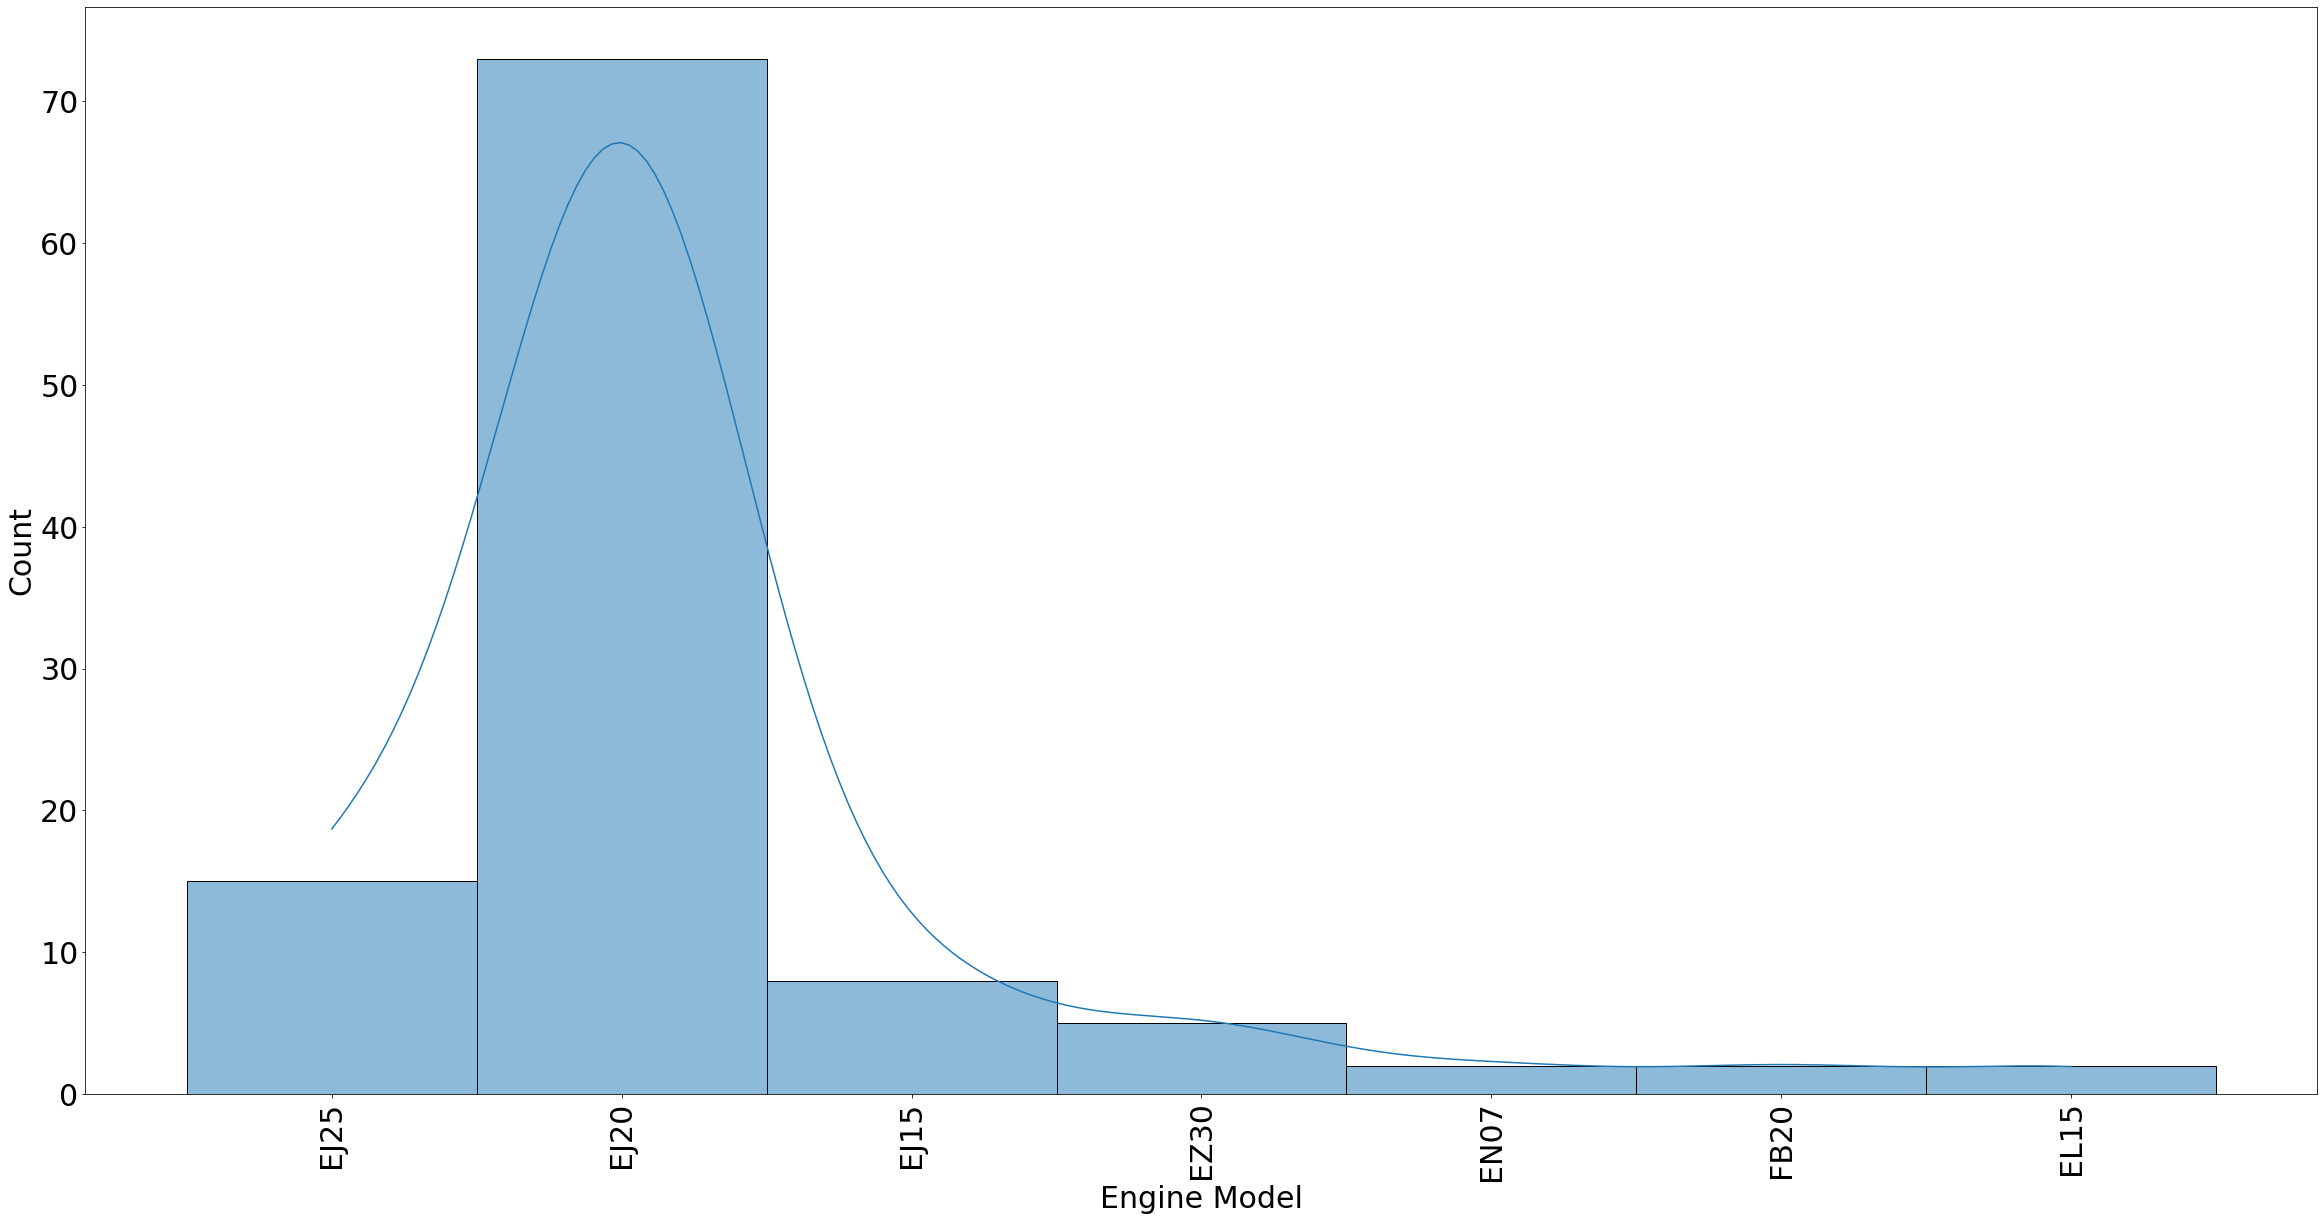

In [132]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

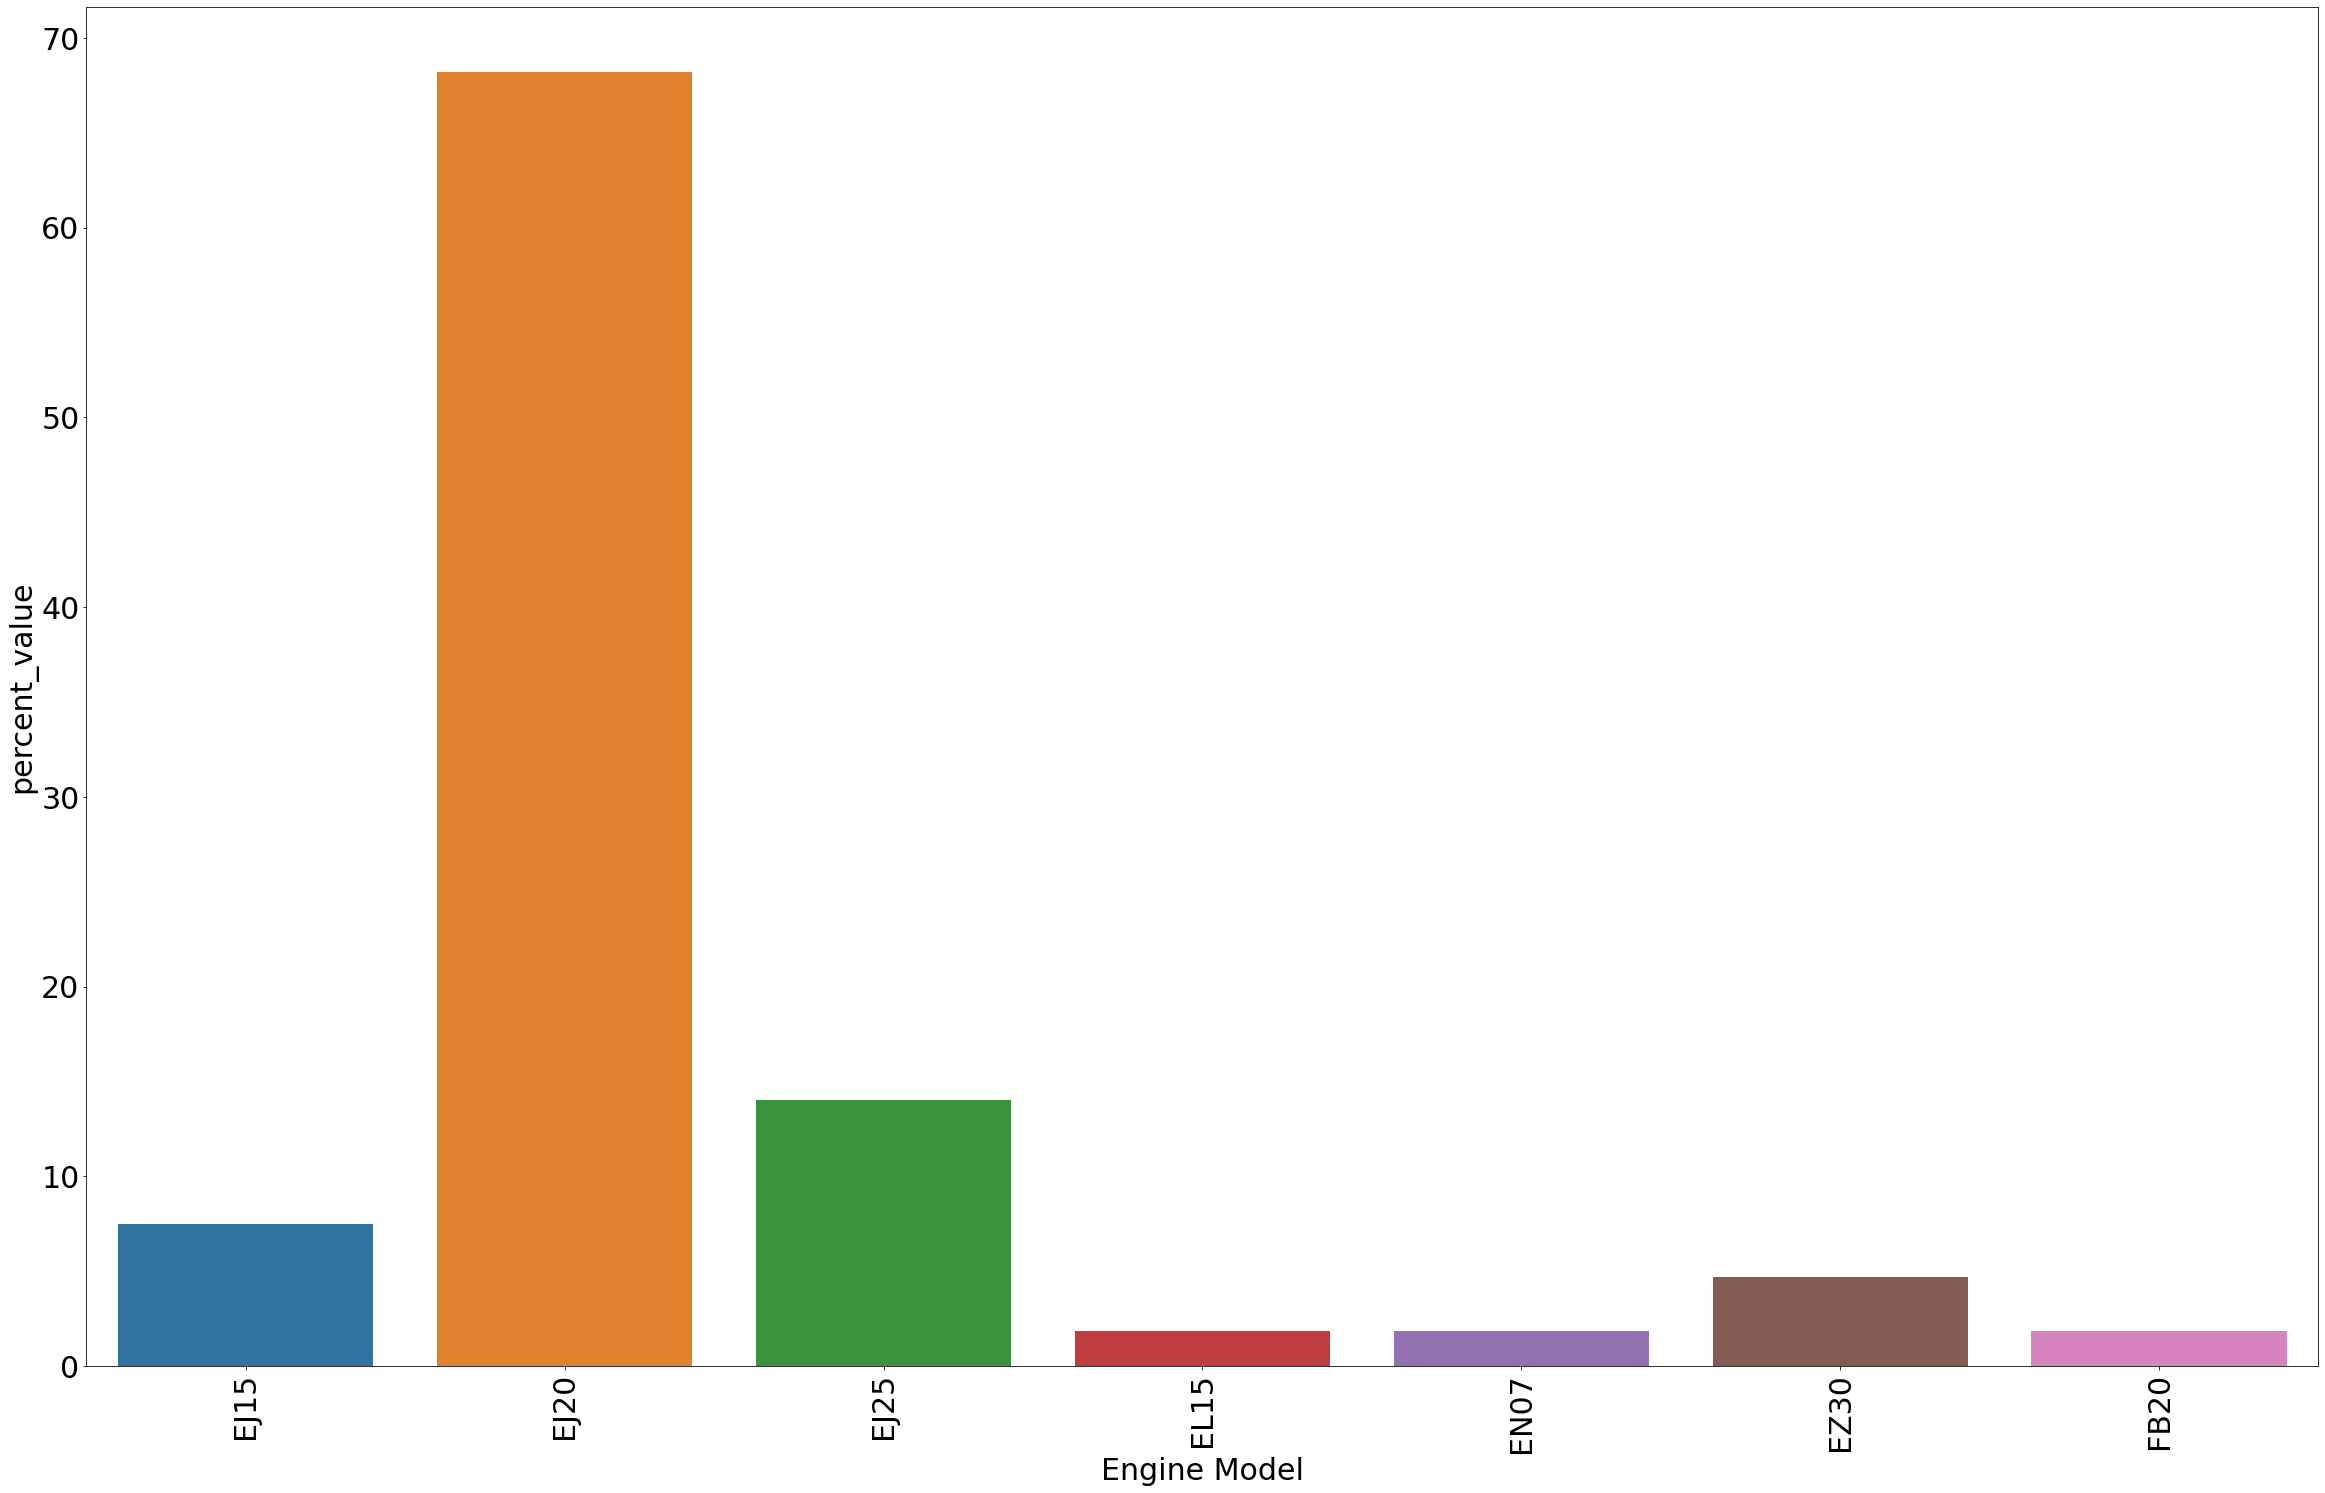

In [133]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# The end

In [157]:
df_GTO_miss = pd.DataFrame(columns=["Brand","Extracted", "Non-Extracted"], data=[['TOYOTA', 1.53,98.47], ['MAZDA',11.54,88.46], ['MITSUBISHI',31.37,68.63], ['HONDA',38.11,61.89], ['NISSAN', 2.54, 98.46], ['SUBARU', 34.61, 68.39]])
df_JP_miss = pd.DataFrame(columns=["Brand","Extracted", "Non-Extracted"], data=[['TOYOTA', 1.6,98.4], ['MAZDA',13.11,86.89], ['MITSUBISHI',35.47,64.53], ['HONDA',41.17,58.83], ['NISSAN', 3.79, 96.21], ['SUBARU', 38.9, 61.1]])
df_Kaiho_miss = pd.DataFrame(columns=["Brand","Extracted", "Non-Extracted"], data=[['TOYOTA', 2.93,97.07], ['MAZDA',2.23,97.77], ['MITSUBISHI',3.64,96.36], ['HONDA',8.33,91.67], ['NISSAN', 4.37, 95.63], ['SUBARU', 20.8, 79.2]])


In [158]:
df_GTO_miss

Brand  Extracted  Non-Extracted
0      TOYOTA       1.53          98.47
1       MAZDA      11.54          88.46
2  MITSUBISHI      31.37          68.63
3       HONDA      38.11          61.89
4      NISSAN       2.54          98.46
5      SUBARU      34.61          68.39

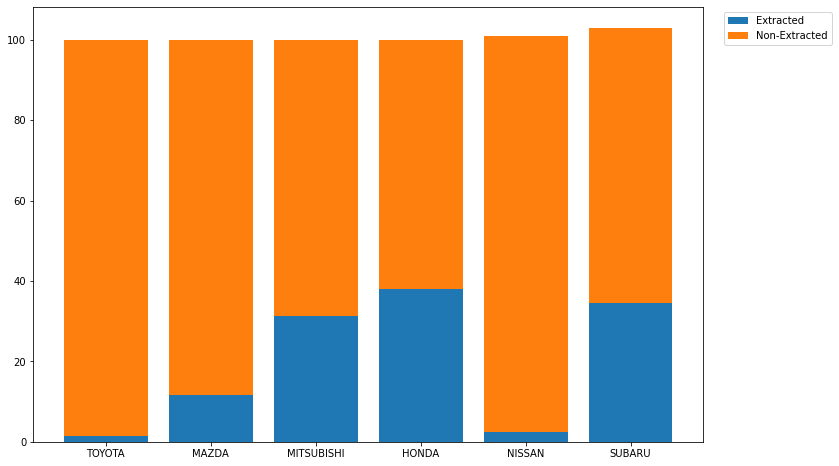

In [170]:
# df_GTO_miss.set_index('Brand').plot(kind='bar', stacked=True)
fig, ax = plt.subplots(figsize=(12, 8))
# First plot the 'Male' bars for every day.
ax.bar(df_GTO_miss.Brand, df_GTO_miss['Extracted'], label='Extracted')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(df_GTO_miss.Brand, df_GTO_miss['Non-Extracted'], bottom=df_GTO_miss['Extracted'],
       label='Non-Extracted')
# ax.set_title('Tips by Day and Gender')
ax.legend(loc = "upper right",bbox_to_anchor=(1.2, 1))

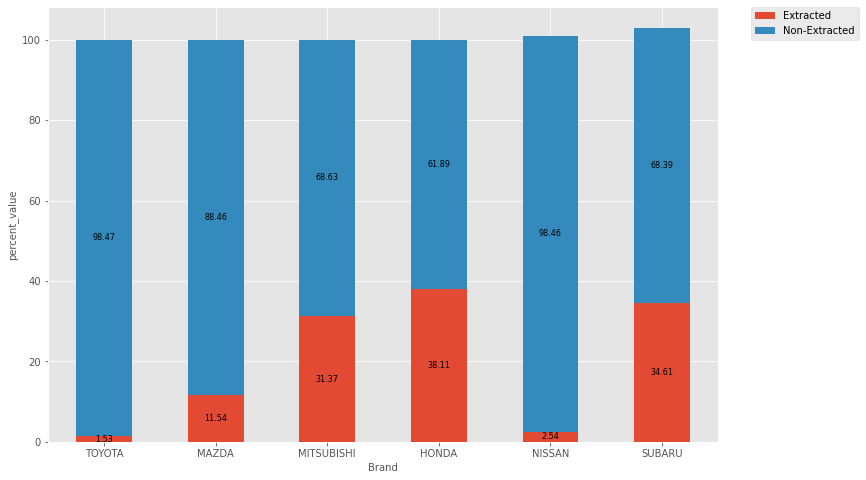

In [174]:
plt.style.use('ggplot')

ax = df_GTO_miss.set_index('Brand').plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("percent_value", fontsize=10)
ax.set_xlabel("Brand", fontsize=10)
plt.show()

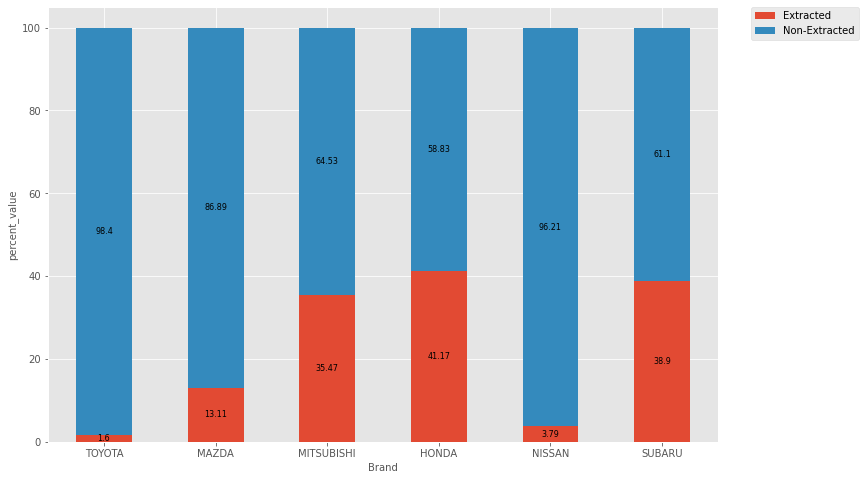

In [175]:
plt.style.use('ggplot')

ax = df_JP_miss.set_index('Brand').plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("percent_value", fontsize=10)
ax.set_xlabel("Brand", fontsize=10)
plt.show()

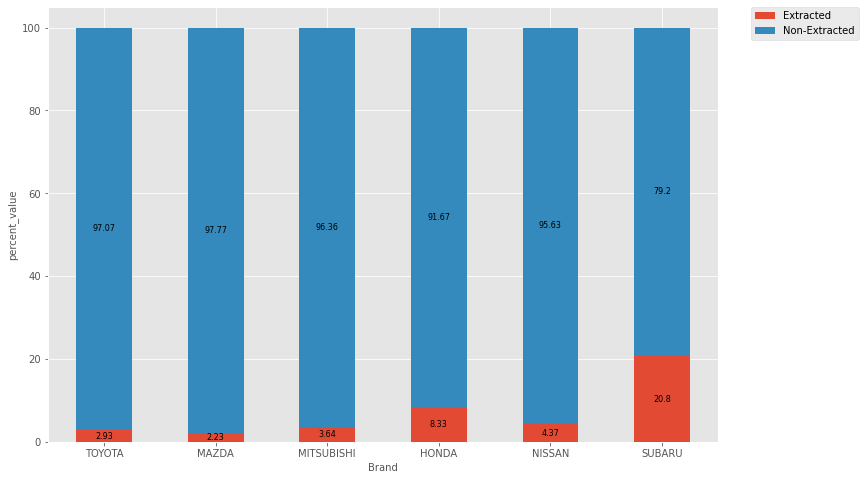

In [176]:
plt.style.use('ggplot')

ax = df_Kaiho_miss.set_index('Brand').plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("percent_value", fontsize=10)
ax.set_xlabel("Brand", fontsize=10)
plt.show()

In [186]:
def extract_engine_data (description, list_em):
    engine_model = []
    for e in list_em:
        em_reg1 = re.findall(r'\b{}-\w+-?\w*\b'.format(e), description)
        if len(em_reg1) != 0 :
          em_reg1 = list(set(em_reg1)) 
          engine_model.append(em_reg1)
    if len(engine_model) != 0:
      return list(chain(*engine_model))
    else: 
      return 0
    

In [187]:
df_toyota_GTO = df_merged[df_merged.Producer.str.contains('TOYOTA')]
df_toyota_GTO

Register Date     HS Code  \
0         2011-01-29  8407349908   
1         2011-01-29  8407349908   
6         2011-01-06  8407343009   
8         2011-01-13  8407343009   
9         2011-01-13  8407343009   
...              ...         ...   
259166    2019-12-01  8407343009   
259167    2019-12-01  8407343009   
259176    2019-12-01  8407343009   
259180    2019-12-01  8407343009   
259183    2019-12-01  8407343009   

                                      Product Description  \
0       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...   
1       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...   
6       ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,1JZ-0...   
8       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...   
9       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...   
...                                                   ...   
259166  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259167  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259176  ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...   
259180  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259183  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                         Producer                     Brand Place of Receipt  \
0       TOYOTA TSUSHO CORPORATION               ОТСУТСТВУЕТ            КОТКА   
1       TOYOTA TSUSHO CORPORATION               ОТСУТСТВУЕТ            КОТКА   
6                          TOYOTA                    TOYOTA      ВЛАДИВОСТОК   
8        TOYOTA,MITSUBISHI,NISSAN  TOYOTA,MITSUBISHI,NISSAN      ВЛАДИВОСТОК   
9        TOYOTA,MITSUBISHI,SUZUKI  TOYOTA,MITSUBISHI,SUZUKI      ВЛАДИВОСТОК   
...                           ...                       ...              ...   
259166           TOYOTA MOTOR CO.                    TOYOTA      ВЛАДИВОСТОК   
259167           TOYOTA MOTOR CO.                    TOYOTA      ВЛАДИВОСТОК   
259176      TOYOTA MOTOR CO. LTD.                    TOYOTA      ВЛАДИВОСТОК   
259180          TOYOTA MOTOR CORP                    TOYOTA        ВОСТОЧНЫЙ   
259183        TOYOTA MOTOR CORP..                   TOYOTA.             КОБЭ   

       Country of Origin Country of Sales                           Shipper   \
0         JP, JPN, Japan   JP, JPN, Japan          TOYOTA TSUSHO CORPORATION   
1         JP, JPN, Japan   JP, JPN, Japan          TOYOTA TSUSHO CORPORATION   
6         JP, JPN, Japan   JP, JPN, Japan             МИХАИЛ КАМПАНИ КО.,ЛТД   
8         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
9         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
...                  ...              ...                                ...   
259166    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259167    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259176    JP, JPN, Japan   JP, JPN, Japan                       UNICO CO LTD   
259180    JP, JPN, Japan   JP, JPN, Japan                        EK3 CO. LTD   
259183    JP, JPN, Japan   JP, JPN, Japan  SUZUKI CHUGOKU HANBAI CORPORATION   

                                          Shipper Address  \
0          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
1          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
6          910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3   
8       950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...   
9       950-3102 ДЖАПАН ТОЯМА НИИГАТА КЕН,НИГАШИКОУ,СЕ...   
...                                                   ...   
259166                  OSAKA, HIGASHI-OSAKA-CITY, 5-1-20   
259167                  OSAKA, HIGASHI-OSAKA-CITY, 5-1-20   
259176               ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3   
259180   933-0209, TOYAMA PREF, IMIZU SHI, SURIDEIJI 82-1   
259183  HIROSHIMA-PREF., ONOMICHI-CITY, TAK ASU-CHO, 8...   

                              Consignee  \
0                  ООО ТЕХНОСЕРВИСПРОМ    
1                  ООО ТЕХНОСЕРВИСПРОМ    
6                          НИКА ВЭД ООО   
8            И

In [188]:
df_toyota_GTO['extracted_engine']  = df_toyota_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))

<ipython-input-188-2d4f9bda1b2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toyota_GTO['extracted_engine']  = df_toyota_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))


In [190]:
df_toyota_GTO_extracted_em = df_toyota_GTO[df_toyota_GTO['extracted_engine'] !=0]
df_toyota_GTO_extracted_em

Register Date     HS Code  \
0         2011-01-29  8407349908   
1         2011-01-29  8407349908   
10        2011-01-13  8407343009   
11        2011-01-17  8407343009   
30        2011-01-12  8407343009   
...              ...         ...   
257521    2019-12-01  8407343009   
257568    2019-12-01  8407343009   
257785    2019-12-01  8407343009   
257981    2019-12-01  8407343009   
258924    2019-12-01  8407343009   

                                      Product Description  \
0       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...   
1       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...   
10      ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,5K-12...   
11      ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,5K-12...   
30      ДВИГАТЕЛЬ БЕНЗИНОВЫЙ Б/У ОТ А/М В СБОРЕ С КПП:...   
...                                                   ...   
257521  ДВИГАТЕЛИ БЕНЗИНОВЫЕ БЫВШИЕ В ПОТРЕБЛЕНИИ В СБ...   
257568  ДВИГАТЕЛЬ АВТОМОБИЛЬНЫЙ БЫВШИЙ В УПОТРЕБЛЕНИИ ...   
257785  ДВИГАТЕЛЬ БЕНЗ.БЫВ.В УП.В СБОРЕ С НАВЕСНЫМ ОБО...   
257981  ЗАПАСНЫЕ ЧАСТИ ОТ АВТОМОБИЛЯ БЫВШЕГО В УПОТРЕБ...   
258924  ДВИГАТЕЛЬ, ИСПОЛЬЗУЕМЫЙ ДЛЯ ПРИВЕДЕНИЯ В ДВИЖЕ...   

                         Producer        Brand Place of Receipt  \
0       TOYOTA TSUSHO CORPORATION  ОТСУТСТВУЕТ            КОТКА   
1       TOYOTA TSUSHO CORPORATION  ОТСУТСТВУЕТ            КОТКА   
10                         TOYOTA       TOYOTA      ВЛАДИВОСТОК   
11                         TOYOTA       TOYOTA      ВЛАДИВОСТОК   
30                         TOYOTA       TOYOTA      ВЛАДИВОСТОК   
...                           ...          ...              ...   
257521   TOYOTA MOTOR CORPORATION       TOYOTA        TOMAKOMAI   
257568   TOYOTA MOTOR CORPORATION       TOYOTA      ВЛАДИВОСТОК   
257785   TOYOTA MOTOR CORPORATION       TOYOTA        ВОСТОЧНЫЙ   
257981                     TOYOTA       TOYOTA      ВЛАДИВОСТОК   
258924         TOYOTA MOTOR CORP.       TOYOTA      ВЛАДИВОСТОК   

       Country of Origin Country of Sales  \
0         JP, JPN, Japan   JP, JPN, Japan   
1         JP, JPN, Japan   JP, JPN, Japan   
10        JP, JPN, Japan   JP, JPN, Japan   
11        JP, JPN, Japan   JP, JPN, Japan   
30        JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
257521    JP, JPN, Japan   JP, JPN, Japan   
257568    JP, JPN, Japan   JP, JPN, Japan   
257785    JP, JPN, Japan   JP, JPN, Japan   
257981    JP, JPN, Japan   JP, JPN, Japan   
258924    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
0                               TOYOTA TSUSHO CORPORATION   
1                               TOYOTA TSUSHO CORPORATION   
10                                 МИХАИЛ КАМПАНИ КО.,ЛТД   
11                                 МИХАИЛ КАМПАНИ КО.,ЛТД   
30                           FUSHIKI KAIRIKU UNSO CO.,LTD   
...                                                   ...   
257521  MAT INCORPORATED O/B ORIEX LIMITED O/B ALIANCE...   
257568                             KAIHO INDUSTRY CO. LTD   
257785                                     3R CORPORATION   
257981                                PIONEER COMPANY LTD   
258924                                    AKEBONO CO. LTD   

                                          Shipper Address  ...  \
0          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME  ...   
1          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME  ...   
10         910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3  ...   
11         910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3  ...   
30                   ФУШИКИ МИНАТА-МАЧИ ТАКАОКА-СИТИ, 5-1  ...   
...                                                   ...  ...   
257521  249 DANGAWARA-CHO, TAKEDA, FUSHIMI-KU, KYOTO, ...  ...   
257568  920-0209, ISHIKAWA, KANAZAWA-SHI, 1-25 HIGASHI...  ...   
257785       346-0028, KUKI-CITY, SAITAMA, 17 KAWARAI-CHO  ...   
257981            OSAKA, HIGASHI, 5-1-20, TAKAIDA-HONDORI  ...   
258924            TOYAMA-PREF., TOYA

In [191]:
df_mazda_GTO = df_merged[df_merged.Producer.str.contains('MAZDA')]
df_mazda_GTO['extracted_engine']  = df_mazda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))
df_mazda_GTO_extracted_em = df_mazda_GTO[df_mazda_GTO['extracted_engine'] !=0]
df_mazda_GTO_extracted_em

<ipython-input-191-f350f9712ad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mazda_GTO['extracted_engine']  = df_mazda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))


Register Date     HS Code  \
22        2011-01-27  8407343009   
45        2011-01-13  8407343009   
971       2011-01-17  8407343009   
974       2011-01-18  8407343009   
1333      2011-02-03  8407343009   
...              ...         ...   
248445    2019-10-01  8407343009   
248465    2019-10-01  8407343009   
248657    2019-10-01  8407343009   
248681    2019-10-01  8407343009   
251154    2019-11-01  8407343009   

                                      Product Description  \
22      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
45      ДВИГАТЕЛЬ БЕНЗИН.ДЛЯ ЛЕГ.А/М,Б/У,ЯП.ПР-ВА В СБ...   
971     ДВИГАТЕЛИ-17ШТ,БЫВШ.В УПОТР.КАРБЮРАТ.ДЛЯ ЛЕГК ...   
974     ДВИГАТЕЛИ БЕНЗИН.-21ШТ.,БЫВ.В УПОТРЕБЛ.ДЛЯ ЛЕК...   
1333    ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ БЫВШ...   
...                                                   ...   
248445  ЧАСТИ И ПРИНАДЛЕЖНОСТИ А/М Б/У:ДВИГАТЕЛЬ БЕНЗИ...   
248465  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М Б/У,ДВИГАТЕЛЬ БЕНЗИНОВЫ...   
248657  ЗАП,ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
248681  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
251154  ЧАСТИ И ПРИНАДЛЕЖНОСТИ А/М Б/У:ДВИГАТЕЛЬ БЕНЗИ...   

                                                 Producer  \
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA   
45      NISSAN, MITSUBISHI,TOYOTA,MAZDA,HONDA,SUBARU,D...   
971     TOYOTA MOTOR CO.,NISSAN MOTOR CO.,MAZDA MOTOR ...   
974     HONDA MOTOR COMPANY,TOYOTA MOTOR CORPORATION,S...   
1333                     TOYOTA, MAZDA, MITSUBISHI, HONDA   
...                                                   ...   
248445                                MAZDA MOTOR CO. LTD   
248465                                   MAZDA MOTOR CORP   
248657                                              MAZDA   
248681                                              MAZDA   
251154                                MAZDA MOTOR CO. LTD   

                                                    Brand Place of Receipt  \
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA             КОБЕ   
45      NISSAN, MITSUBISHI, TOYOTA,MAZDA,SUBARU,HONDA,...      ВЛАДИВОСТОК   
971                            TOYOTA,NISSAN,MAZDA,HONDA.        ВОСТОЧНЫЙ   
974           HONDA,TOYOTA,SUBARU,MITSUBISHI,NISSAN,MAZDA        ВОСТОЧНЫЙ   
1333                                               TOYOTA      ВЛАДИВОСТОК   
...                                                   ...              ...   
248445                                       MAZDA ЯПОНИЯ      ВЛАДИВОСТОК   
248465                                              MAZDA      ВЛАДИВОСТОК   
248657                                              MAZDA      ВЛАДИВОСТОК   
248681                                              MAZDA      ВЛАДИВОСТОК   
251154                                       MAZDA ЯПОНИЯ      ВЛАДИВОСТОК   

       Country of Origin Country of Sales  \
22        JP, JPN, Japan   JP, JPN, Japan   
45        JP, JPN, Japan   JP, JPN, Japan   
971       JP, JPN, Japan   JP, JPN, Japan   
974       JP, JPN, Japan   JP, JPN, Japan   
1333      JP, JPN, Japan     CT, , Taiwan   
...                  ...              ...   
248445    JP, JPN, Japan            JAPAN   
248465    JP, JPN, Japan            CHINA   
248657    JP, JPN, Japan            JAPAN   
248681    JP, JPN, Japan            JAPAN   
251154             JAPAN            JAPAN   

                                                 Shipper   \
22                                       J-TRADE CO., LTD   
45                                       LEEA CORPORATION   
971                                      SUNTEC CO., LTD.   
974     YAMADA MOTOR CO.,LTD.16-6,SHIMIZU-KU NISHITAKA...   
1333                              SUNRISE SERVICE CO.,LTD   
...                                                   ...   
248445                        HASEGAWA MOTOR COMPANY LTD.   
248465                                       AKSYS CO.LTD   
248657                                   SEAPARTS CO. LTD   
248681              

In [192]:
df_mitsubishi_GTO = df_merged[df_merged.Producer.str.contains('MITSUBISHI')]
df_mitsubishi_GTO['extracted_engine']  = df_mitsubishi_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))
df_mitsubishi_GTO_extracted_em = df_mitsubishi_GTO[df_mitsubishi_GTO['extracted_engine'] !=0]
df_mitsubishi_GTO_extracted_em

<ipython-input-192-f5e14de1d047>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mitsubishi_GTO['extracted_engine']  = df_mitsubishi_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))


Register Date     HS Code  \
12        2011-01-18  8407343009   
22        2011-01-27  8407343009   
45        2011-01-13  8407343009   
55        2011-01-14  8407343009   
91        2011-01-21  8407343009   
...              ...         ...   
258988    2019-12-01  8407343009   
259055    2019-12-01  8407343009   
259068    2019-12-01  8407343009   
259138    2019-12-01  8407343009   
259177    2019-12-01  8407343009   

                                      Product Description  \
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
22      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
45      ДВИГАТЕЛЬ БЕНЗИН.ДЛЯ ЛЕГ.А/М,Б/У,ЯП.ПР-ВА В СБ...   
55      ДВИГАТЕЛЬ БЕНЗИНОВЫЙ, БЫВШИЙ В УПОТРЕБЛЕНИИ, Д...   
91      ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...   
...                                                   ...   
258988  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
259055  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259068  ДВИГАТЕЛИ-2ШТ.БЫВШ.В УПОТР.КАРБЮРАТ.ОБЪЕМ 1834...   
259138  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
259177  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   

                                                 Producer  \
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA   
45      NISSAN, MITSUBISHI,TOYOTA,MAZDA,HONDA,SUBARU,D...   
55               TOYOTA, HONDA, MAZDA, NISSAN, MITSUBISHI   
91                               TOYOTA,MITSUBISHI,SUBARU   
...                                                   ...   
258988                           MITSUBISHI SUBARU SUZUKI   
259055                                         MITSUBISHI   
259068                               MITSUBISHI MOTOR CO.   
259138  FUJI HEAVY INDUSTRIES CO.LTDMITSUBISHI MOTORS ...   
259177                                         MITSUBISHI   

                                                    Brand Place of Receipt  \
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA             КОБЕ   
45      NISSAN, MITSUBISHI, TOYOTA,MAZDA,SUBARU,HONDA,...      ВЛАДИВОСТОК   
55               TOYOTA, HONDA, MAZDA, NISSAN, MITSUBISHI      ВЛАДИВОСТОК   
91                               TOYOTA,MITSUBISHI,SUBARU      ВЛАДИВОСТОК   
...                                                   ...              ...   
258988                           MITSUBISHI SUBARU SUZUKI     TOYAMASHINKO   
259055                                         MITSUBISHI      ВЛАДИВОСТОК   
259068                                         MITSUBISHI        ВОСТОЧНЫЙ   
259138                                   SUBARUMITSUBISHI        ВОСТОЧНЫЙ   
259177                                         MITSUBISHI      ВЛАДИВОСТОК   

       Country of Origin Country of Sales  \
12        JP, JPN, Japan   JP, JPN, Japan   
22        JP, JPN, Japan   JP, JPN, Japan   
45        JP, JPN, Japan   JP, JPN, Japan   
55        JP, JPN, Japan   JP, JPN, Japan   
91        JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258988    JP, JPN, Japan   JP, JPN, Japan   
259055    JP, JPN, Japan   JP, JPN, Japan   
259068    JP, JPN, Japan   JP, JPN, Japan   
259138    JP, JPN, Japan   JP, JPN, Japan   
259177    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
12                                       J-TRADE CO., LTD   
22                                       J-TRADE CO., LTD   
45                                       LEEA CORPORATION   
55                                  HIKARI SYOJI CO.,LTD    
91                                 АВТОЛОМ ДЖАПАН КО.,ЛТД   
...                                                   ...   
258988  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
259055                                       UNICO CO LTD   
259068                                    SUNTEC CO. LTD.   
259138              

In [193]:
df_honda_GTO = df_merged[df_merged.Producer.str.contains('HONDA')]
df_honda_GTO['extracted_engine']  = df_honda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_honda))
df_honda_GTO_extracted_em = df_honda_GTO[df_honda_GTO['extracted_engine'] !=0]
df_honda_GTO_extracted_em

<ipython-input-193-64d8ac74f15c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honda_GTO['extracted_engine']  = df_honda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_honda))


Register Date     HS Code  \
7         2011-01-12  8407343009   
20        2011-01-25  8407343009   
22        2011-01-27  8407343009   
27        2011-01-12  8407343009   
54        2011-01-14  8407343009   
...              ...         ...   
259170    2019-12-01  8407343009   
259171    2019-12-01  8407343009   
259172    2019-12-01  8407343009   
259173    2019-12-01  8407343009   
259179    2019-12-01  8407343009   

                                      Product Description  \
7       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЬ С АКП ЯПОНСКО...   
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
22      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
54      ДВИГАТЕЛЬ БЕНЗИНОВЫЙ, БЫВШИЙ В УПОТРЕБЛЕНИИ, Д...   
...                                                   ...   
259170  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259171  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259172  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259173  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259179  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   

                                                 Producer  \
7                                                   HONDA   
20                          SUBARU, NISSAN, TOYOTA, HONDA   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
54                   TOYOTA, SUZUKI, HONDA, NISSAN, MAZDA   
...                                                   ...   
259170                                    HONDA MOTOR CO.   
259171                                    HONDA MOTOR CO.   
259172                                    HONDA MOTOR CO.   
259173                                    HONDA MOTOR CO.   
259179                               HONDA MOTOR CO. LTD.   

                                                    Brand Place of Receipt  \
7                                                   HONDA      ВЛАДИВОСТОК   
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA             КОБЕ   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
54                   TOYOTA, SUZUKI, HONDA, NISSAN, MAZDA      ВЛАДИВОСТОК   
...                                                   ...              ...   
259170                                              HONDA      ВЛАДИВОСТОК   
259171                                              HONDA      ВЛАДИВОСТОК   
259172                                              HONDA      ВЛАДИВОСТОК   
259173                                              HONDA      ВЛАДИВОСТОК   
259179                                              HONDA      ВЛАДИВОСТОК   

       Country of Origin Country of Sales               Shipper   \
7         JP, JPN, Japan   JP, JPN, Japan          JAPROS CO.LTD   
20        JP, JPN, Japan   JP, JPN, Japan  G.E. TRADING CO., LTD   
22        JP, JPN, Japan   JP, JPN, Japan       J-TRADE CO., LTD   
27        JP, JPN, Japan   JP, JPN, Japan  KAIHO SANGYO CO., LTD   
54        JP, JPN, Japan   JP, JPN, Japan      HIRAYASU CO.,LTD    
...                  ...              ...                    ...   
259170    JP, JPN, Japan   JP, JPN, Japan   PIONEER COMPANY LTD.   
259171    JP, JPN, Japan   JP, JPN, Japan   PIONEER COMPANY LTD.   
259172    JP, JPN, Japan   JP, JPN, Japan   PIONEER COMPANY LTD.   
259173    JP, JPN, Japan   JP, JPN, Japan   PIONEER COMPANY LTD.   
259179    JP, JPN, Japan   JP, JPN, Japan           UNICO CO LTD   

                                          Shipper Address  ...  \
7       950-3102 JAPAN TOYAMA NIIGATA KEN,HIGASHIKOU,S...  ...   
20      476-0003 АИЧИ ТОАКАИ-ШИ АКАО-МАЧИ, ШИМОКИРИНОК...  ...   
22            614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3  ...   
27      920-0209 ISHIKAWA-KEN KANAZAWA-SHI HIGASHI-KAG...  ...   
54                SHIKAT

In [196]:
df_nissan_GTO = df_merged[df_merged.Producer.str.contains('NISSAN')]
df_nissan_GTO['extracted_engine']  = df_nissan_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))
df_nissan_GTO_extracted_em = df_nissan_GTO[df_nissan_GTO['extracted_engine'] !=0]
df_nissan_GTO_extracted_em

<ipython-input-196-83fc697dc3cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nissan_GTO['extracted_engine']  = df_nissan_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))


Register Date     HS Code  \
996       2011-01-21  8407343009   
1648      2011-02-10  8407343009   
1650      2011-02-09  8407343009   
1928      2011-02-15  8407343009   
2647      2011-02-27  8407343009   
...              ...         ...   
257454    2019-12-01  8407343009   
257755    2019-12-01  8407343009   
258987    2019-12-01  8407343009   
259057    2019-12-01  8407343009   
259178    2019-12-01  8407343009   

                                      Product Description  \
996     ДВИГАТЕЛИ БЕНЗ.С НАВЕСНЫМ ОБОРУД.БЫВШ.В УПОТР....   
1648    ДВИГАТЕЛИ КАРБ./ГАЗ. БЫВШ.В УП.ДЛЯ Л/А ОБ.1587...   
1650    ДВИГАТЕЛЬ ДЛЯ А/М NISSAN TERRANO, БЕНЗИНОВЫЙ, ...   
1928    ДВИГAТEЛИ C ВOЗВPAТНO-ПOCТУПAТEЛЬНЫМ ДВИЖEНИEМ...   
2647    ДВИГАТЕЛЬ А/М Б/У, В СБОРЕ С КПП: NISSAN, Z16-...   
...                                                   ...   
257454  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ Б/У ОТ А/М БЕЗ АКП T.M.NI...   
257755  ДВС БЕНЗИН-7ШТ. С КОРОБКАМИ ПЕРЕДАЧ, С НАВЕСНЫ...   
258987  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
259057  ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...   
259178  ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...   

                                                 Producer  \
996     TOYOTA MOTOR CORP., NISSAN MOTOR COMP., HONDA ...   
1648    MAZDA MOTOR CORPORATION,TOYOTA MOTOR CORPORATI...   
1650                        NISSAN MOTOR CO., LTD, NISSAN   
1928                    NISSAN, TOYOTA, MITSUBISHI, HONDA   
2647                                               NISSAN   
...                                                   ...   
257454                                             NISSAN   
257755                                NISSAN MOTOR CO.LTD   
258987                                             NISSAN   
259057                           NISSAN MOTOR CORPORATION   
259178                           NISSAN MOTOR CORPORATION   

                                    Brand Place of Receipt Country of Origin  \
996                 TOYOTA, NISSAN, HONDA        ВОСТОЧНЫЙ    JP, JPN, Japan   
1648                  MAZDA,TOYOTA,NISSAN        ВОСТОЧНЫЙ    JP, JPN, Japan   
1650                               NISSAN      ВЛАДИВОСТОК    JP, JPN, Japan   
1928    NISSAN, TOYOTA, MITSUBISHI, HONDA      ВЛАДИВОСТОК    JP, JPN, Japan   
2647                               NISSAN      ВЛАДИВОСТОК    JP, JPN, Japan   
...                                   ...              ...               ...   
257454                             NISSAN      ВЛАДИВОСТОК    JP, JPN, Japan   
257755                             NISSAN        ВОСТОЧНЫЙ    JP, JPN, Japan   
258987                             NISSAN     TOYAMASHINKO    JP, JPN, Japan   
259057                             NISSAN      ВЛАДИВОСТОК    JP, JPN, Japan   
259178                             NISSAN      ВЛАДИВОСТОК    JP, JPN, Japan   

          Country of Sales                                           Shipper   \
996         JP, JPN, Japan                        HASEGAWA MOTOR COMPANY LTD.   
1648          CT, , Taiwan            GPRSERVICE INCORPORATED (CODE NO.1J511)   
1650          CT, , Taiwan                          AUTOPARTS MOGAMI CO., LTD   
1928          CT, , Taiwan                             NIHONSHA LAND CO., LTD   
2647          CT, , Taiwan                                        SIV CO.,LTD   
...                    ...                                                ...   
257454      JP, JPN, Japan                AL KAMEEL AUTO USED SPARE PARTS TR.   
257755  AU, AUS, Australia                                  TRADE WISE CO.LTD   
258987      JP, JPN, Japan  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
259057      JP, JPN, Japan                                       UNICO CO LTD   
259178      JP, JPN, Japan                                       UNICO CO LTD   

                                          Shipper Address  ...  \
996                 1380 OKAKYOUDEN OUZU-SHI, TOYAMA PREF  ...   
1648                     NAKA-KU,YOKOHAMA 

In [198]:
df_subaru_GTO = df_merged[df_merged.Producer.str.contains('SUBARU')]
df_subaru_GTO['extracted_engine']  = df_subaru_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))
df_subaru_GTO_extracted_em = df_subaru_GTO[df_subaru_GTO['extracted_engine'] != 0]
df_subaru_GTO_extracted_em

<ipython-input-198-040209f5460d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subaru_GTO['extracted_engine']  = df_subaru_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))


Register Date     HS Code  \
20        2011-01-25  8407343009   
27        2011-01-12  8407343009   
35        2011-01-12  8407343009   
91        2011-01-21  8407343009   
974       2011-01-18  8407343009   
...              ...         ...   
258910    2019-12-01  8407343009   
258942    2019-12-01  8407343009   
258988    2019-12-01  8407343009   
259059    2019-12-01  8407343009   
259159    2019-12-01  8407343009   

                                      Product Description  \
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
35      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
91      ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...   
974     ДВИГАТЕЛИ БЕНЗИН.-21ШТ.,БЫВ.В УПОТРЕБЛ.ДЛЯ ЛЕК...   
...                                                   ...   
258910  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...   
258942  ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...   
258988  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
259059  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259159  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   

                                                 Producer  \
20                          SUBARU, NISSAN, TOYOTA, HONDA   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
35              TOYOTA, NISSAN, HONDA, MITSUBISHI, SUBARU   
91                               TOYOTA,MITSUBISHI,SUBARU   
974     HONDA MOTOR COMPANY,TOYOTA MOTOR CORPORATION,S...   
...                                                   ...   
258910                                             SUBARU   
258942                                 SUBARU CORPORATION   
258988                           MITSUBISHI SUBARU SUZUKI   
259059                                    SUBARU DAIHATSU   
259159                                    SUBARU DAIHATSU   

                                                    Brand Place of Receipt  \
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
35              TOYOTA, NISSAN, HONDA, MITSUBISHI, SUBARU      ВЛАДИВОСТОК   
91                               TOYOTA,MITSUBISHI,SUBARU      ВЛАДИВОСТОК   
974           HONDA,TOYOTA,SUBARU,MITSUBISHI,NISSAN,MAZDA        ВОСТОЧНЫЙ   
...                                                   ...              ...   
258910                                             SUBARU      ВЛАДИВОСТОК   
258942                                             SUBARU      ВЛАДИВОСТОК   
258988                           MITSUBISHI SUBARU SUZUKI     TOYAMASHINKO   
259059                                    SUBARU DAIHATSU      ВЛАДИВОСТОК   
259159                                    SUBARU DAIHATSU      ВЛАДИВОСТОК   

       Country of Origin Country of Sales  \
20        JP, JPN, Japan   JP, JPN, Japan   
27        JP, JPN, Japan   JP, JPN, Japan   
35        JP, JPN, Japan   JP, JPN, Japan   
91        JP, JPN, Japan   JP, JPN, Japan   
974       JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258910    JP, JPN, Japan   JP, JPN, Japan   
258942    JP, JPN, Japan   JP, JPN, Japan   
258988    JP, JPN, Japan   JP, JPN, Japan   
259059    JP, JPN, Japan   JP, JPN, Japan   
259159    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
20                                  G.E. TRADING CO., LTD   
27                                  KAIHO SANGYO CO., LTD   
35                     J & A TRADING CORPORATION PVT, LTD   
91                                 АВТОЛОМ ДЖАПАН КО.,ЛТД   
974     YAMADA MOTOR CO.,LTD.16-6,SHIMIZU-KU NISHITAKA...   
...                                                   ...   
258910                                    D-JAPAN CO. LTD   
258942                                          AL EXPORT   
258988  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
259059              

In [216]:
dfs = [df_toyota_GTO_extracted_em, df_mazda_GTO_extracted_em, df_mitsubishi_GTO_extracted_em, df_honda_GTO_extracted_em, df_nissan_GTO_extracted_em, df_subaru_GTO_extracted_em]
merge_dfs_GTO = pd.concat(dfs).reset_index()

In [218]:
merge_dfs_GTO.to_csv('Engine_Model_GTO.csv')

In [219]:
df_toyota_GTO_Japan = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('TOYOTA')]
df_toyota_GTO_Japan['extracted_engine']  = df_toyota_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))

<ipython-input-219-592233b5d0fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toyota_GTO_Japan['extracted_engine']  = df_toyota_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))


In [220]:
df_mazda_GTO_Japan = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('MAZDA')]
df_mazda_GTO['extracted_engine']  = df_mazda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))

<ipython-input-220-534cabeb9730>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mazda_GTO['extracted_engine']  = df_mazda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))


In [221]:
df_mitsubishi_GTO_Japan = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('MITSUBISHI')]
df_mitsubishi_GTO_Japan['extracted_engine']  = df_mitsubishi_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))

<ipython-input-221-ff070db9e42f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mitsubishi_GTO_Japan['extracted_engine']  = df_mitsubishi_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))


In [222]:
df_honda_GTO_Japan = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('HONDA')]
df_honda_GTO_Japan['extracted_engine']  = df_honda_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_honda))

<ipython-input-222-6f72d85beae7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honda_GTO_Japan['extracted_engine']  = df_honda_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_honda))


In [223]:
df_nissan_GTO_Japan = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('NISSAN')]
df_nissan_GTO_Japan['extracted_engine']  = df_nissan_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))

<ipython-input-223-bed37482d817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nissan_GTO_Japan['extracted_engine']  = df_nissan_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))


In [224]:
df_subaru_GTO_Japan = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('SUBARU')]
df_subaru_GTO_Japan['extracted_engine']  = df_subaru_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))

<ipython-input-224-f8254d785f4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subaru_GTO_Japan['extracted_engine']  = df_subaru_GTO_Japan['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))


In [225]:
dfs_GTO_JP = [df_toyota_GTO_Japan, df_mazda_GTO_Japan, df_mitsubishi_GTO_Japan, df_honda_GTO_Japan, df_nissan_GTO_Japan, df_subaru_GTO_Japan]
merge_dfs_GTO_JP = pd.concat(dfs_GTO_JP).reset_index()
merge_dfs_GTO_JP_filter = merge_dfs_GTO_JP[merge_dfs_GTO_JP['extracted_engine'] !=0]
merge_dfs_GTO_JP_filter

index Register Date     HS Code  \
4016    11708    2018-12-01  8407343009   
4033    11752    2018-12-01  8407343009   
4034    11753    2018-12-01  8407343009   
4035    11754    2018-12-01  8407343009   
4073    11834    2018-12-01  8407343009   
...       ...           ...         ...   
105085  98375    2016-10-31  8407343009   
105099  98552    2016-10-05  8407343009   
105100  98555    2016-10-05  8407343009   
105102  98585    2016-10-06  8407343009   
105103  98604    2016-10-23  8407343009   

                                      Product Description  \
4016    ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...   
4033    ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...   
4034    ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...   
4035    ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...   
4073    ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...   
...                                                   ...   
105085  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ БЫВ.УПОТР.ДЛЯ Л/А,ОБЪЕМ Б...   
105099  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ Б/У ОТ А/М В СБОРЕ С АКП:...   
105100  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ БЫВ.В УПОТР. В СБОРЕ С КО...   
105102  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ БЫВ.В УПОТР.ОТДЕЛЬНО И В ...   
105103  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ Б/У ОТ А/М В СБОРЕ С НАВЕ...   

                                                 Producer  \
4016                                               TOYOTA   
4033                                               TOYOTA   
4034                                               TOYOTA   
4035                                               TOYOTA   
4073                                               TOYOTA   
...                                                   ...   
105085  SUBARU MOTOR CO.LTD;MMC MOTORS;SUZUKI MOTOR CO...   
105099                                             SUBARU   
105100                    SUBARU MOTOR CO.LTD;MMC MOTORS;   
105102  MMC MOTORS;DAIHATSU MOTOR CO.LTD;SUBARU MOTOR ...   
105103                                             SUBARU   

                      Brand Place of Receipt     Country of Origin  \
4016                 TOYOTA      ВЛАДИВОСТОК  UNITED ARAB EMIRATES   
4033                 TOYOTA      ВЛАДИВОСТОК                 JAPAN   
4034                 TOYOTA      ВЛАДИВОСТОК                 JAPAN   
4035                 TOYOTA      ВЛАДИВОСТОК                 JAPAN   
4073                 TOYOTA      ВЛАДИВОСТОК                 JAPAN   
...                     ...              ...                   ...   
105085    SUBARU,MMC,SUZUKI        ВОСТОЧНЫЙ        JP, JPN, Japan   
105099               SUBARU      ВЛАДИВОСТОК        JP, JPN, Japan   
105100           SUBARU,MMC        ВОСТОЧНЫЙ        JP, JPN, Japan   
105102  MMC,DAIHATSU,SUBARU        ВОСТОЧНЫЙ        JP, JPN, Japan   
105103               SUBARU      ВЛАДИВОСТОК        JP, JPN, Japan   

       Country of Sales                                           Shipper   \
4016              JAPAN     SHINE MOTOR USED AUTO SPARE PARTS TRD CO., LTD   
4033              JAPAN                             ISLAND PARTS CO., LTD.   
4034              JAPAN                             ISLAND PARTS CO., LTD.   
4035              JAPAN                             ISLAND PARTS CO., LTD.   
4073              JAPAN                             ISLAND PARTS CO., LTD.   
...                 ...                                                ...   
105085   JP, JPN, Japan              DAICLE CO.LTD, 1-216-2 ASARIGAWAONSEN   
105099   JP, JPN, Japan                                   KADOTA CO., LTD.   
105100   JP, JPN, Japan        ECO-R CO.LTD,838-1 KUBOTA,ASHIKAGA,TOCHIGI,   
105102   JP, JPN, Japan  UNICO LOGISTICS JAPAN CO.LTD AS AGENT OF TRANS...   
105103   JP, JPN, Japan                               WAKE CORPORATION LTD   

        ... Incoterms Gross Weight in KG Net Weight in KG  Cargo Value USD  \
4016    ...       CFR              300.0            300.0           453.00   
4033    ...       CFR              420.0            420.0           634.20   
4034    ...  

In [226]:
merge_dfs_GTO_JP_filter.to_csv('Engine_Model_GTO_JP.csv')

In [228]:
df_toyota_GTO_Japan_Kaiho = df_kaiho[df_kaiho.Producer.str.contains('TOYOTA')]
df_toyota_GTO_Japan_Kaiho['extracted_engine']  = df_toyota_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))

<ipython-input-228-49c442d40d9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toyota_GTO_Japan_Kaiho['extracted_engine']  = df_toyota_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))


In [229]:
df_mazda_GTO_Japan_Kaiho = df_kaiho[df_kaiho.Producer.str.contains('MAZDA')]
df_mazda_GTO_Japan_Kaiho['extracted_engine']  = df_mazda_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))

<ipython-input-229-2160c932cdde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mazda_GTO_Japan_Kaiho['extracted_engine']  = df_mazda_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))


In [230]:
df_mitsubishi_GTO_Japan_Kaiho = df_kaiho[df_kaiho.Producer.str.contains('MITSUBISHI')]
df_mitsubishi_GTO_Japan_Kaiho['extracted_engine']  = df_mitsubishi_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))

<ipython-input-230-8cd072850a93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mitsubishi_GTO_Japan_Kaiho['extracted_engine']  = df_mitsubishi_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))


In [231]:
df_honda_GTO_Japan_Kaiho = df_kaiho[df_kaiho.Producer.str.contains('HONDA')]
df_honda_GTO_Japan_Kaiho['extracted_engine']  = df_honda_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_honda))

<ipython-input-231-04a9eb2ddeda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honda_GTO_Japan_Kaiho['extracted_engine']  = df_honda_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_honda))


In [232]:
df_nissan_GTO_Japan_Kaiho = df_kaiho[df_kaiho.Producer.str.contains('NISSAN')]
df_nissan_GTO_Japan_Kaiho['extracted_engine']  = df_nissan_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))

<ipython-input-232-1d770cc4b9c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nissan_GTO_Japan_Kaiho['extracted_engine']  = df_nissan_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))


In [233]:
df_subaru_GTO_Japan_Kaiho = df_kaiho[df_kaiho.Producer.str.contains('SUBARU')]
df_subaru_GTO_Japan_Kaiho['extracted_engine']  = df_subaru_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))

<ipython-input-233-bfdac03fcfad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subaru_GTO_Japan_Kaiho['extracted_engine']  = df_subaru_GTO_Japan_Kaiho['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))


In [234]:
dfs_GTO_JP_Kaiho = [df_toyota_GTO_Japan_Kaiho, df_mazda_GTO_Japan_Kaiho, df_mitsubishi_GTO_Japan_Kaiho, df_honda_GTO_Japan_Kaiho, df_nissan_GTO_Japan_Kaiho, df_subaru_GTO_Japan_Kaiho]
merge_dfs_GTO_JP_Kaiho = pd.concat(dfs_GTO_JP_Kaiho).reset_index()
merge_dfs_GTO_JP_Kaiho_filter = merge_dfs_GTO_JP_Kaiho[merge_dfs_GTO_JP_Kaiho['extracted_engine'] !=0]
merge_dfs_GTO_JP_Kaiho_filter

index Register Date     HS Code  \
49     17219    2011-11-24  8407343009   
84     24229    2012-02-28  8407343009   
154    37296    2012-07-30  8407343009   
180    44986    2012-10-29  8407343009   
184    45049    2012-10-24  8407343009   
...      ...           ...         ...   
4220  241747    2019-09-01  8407343009   
4221  246218    2019-10-01  8407343009   
4222  247786    2019-10-01  8407343009   
4223  247787    2019-10-01  8407343009   
4231  258988    2019-12-01  8407343009   

                                    Product Description  \
49    ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
84    ДВИГ. ВНУТР. СГОРАНИЯ С ИСКР. ЗАЖИГ. БЕНЗИНОВ....   
154   ДВИГАТЕЛИ БЕНЗИНОВЫЕ БЫВШИЕ В УПОТРЕБЛЕНИИ, ДЛ...   
180   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
184   ДВИГАТЕЛИ БЕНЗИНОВЫЕ БЫВШИЕ В УПОТРЕБЛЕНИИ ДЛЯ...   
...                                                 ...   
4220  ДВИГАТЕЛИ С АКПП ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВ...   
4221  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
4222  ЗАП,ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
4223  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ. Б/У: ДВИГАТЕЛИ БЫВШ...   
4231  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                              Producer                             Brand  \
49                              TOYOTA                            TOYOTA   
84    TOYOTA, MITSUBISHI, HONDA, MAZDA  TOYOTA, MITSUBISHI, HONDA, MAZDA   
154           TOYOTA MOTOR CORPORATION                            TOYOTA   
180                             TOYOTA                           unknown   
184           TOYOTA MOTOR CORPORATION                           unknown   
...                                ...                               ...   
4220                            SUBARU                            SUBARU   
4221                            SUBARU                            SUBARU   
4222                            SUBARU                            SUBARU   
4223                            SUBARU                            SUBARU   
4231          MITSUBISHI SUBARU SUZUKI          MITSUBISHI SUBARU SUZUKI   

     Place of Receipt Country of Origin Country of Sales  \
49        ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
84        ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
154         ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
180       ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
184         ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
...               ...               ...              ...   
4220      ВЛАДИВОСТОК             JAPAN            JAPAN   
4221         KANAZAWA    JP, JPN, Japan            JAPAN   
4222      ВЛАДИВОСТОК    JP, JPN, Japan            JAPAN   
4223      ВЛАДИВОСТОК    JP, JPN, Japan            JAPAN   
4231     TOYAMASHINKO    JP, JPN, Japan   JP, JPN, Japan   

                                               Shipper   ...  \
49                                KAIHO SANGYO CO.,LTD.  ...   
84                                KAIHO SANGYO CO., LTD  ...   
154   KAIHO SANGYO CO.,LTD 1-25 HIGASHIKAGATSUME-MAC...  ...   
180                               KAIHO SANGYO CO.,LTD.  ...   
184                                KAIHO SANGYO CO.,LTD  ...   
...                                                 ...  ...   
4220                            KAIHO INDUSTRY CO.,LTD.  ...   
4221                             KAIHO INDUSTRY CO. LTD  ...   
4222                              KAIHO INDUSTY CO. LTD  ...   
4223                              KAIHO INDUSTY CO. LTD  ...   
4231  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...  ...   

                                      Consignee Address Quantity  \
49    690105, ПРИМОРСКИЙ КРАЙ, ВЛАДИВОСТОК, РУССКАЯ ...       14   
84    690024, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, 4-Я УЛ...       12   
154   690080, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. С...       11   
180   690105 ПРИМОРСКИЙ КРАЙ ВЛАДИВОСТОК РУССКАЯ, 98-26       12   
184   690080, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, УЛ. 

In [235]:
merge_dfs_GTO_JP_Kaiho_filter.to_csv('Engine_Model_GTO_JP_Kaiho.csv')